## Section 1: Introduction

In this project, we focus on detecting credit card fraud using various machine learning classifiers. The goal is to build models that accurately classify transactions as fraudulent or legitimate while maximizing key metrics like precision and recall. We experimented with different classifiers such as `RandomForestClassifier` and `XGBClassifier`, aiming to optimize the F1-score for fraud detection.


## Section 2: Understanding the Data

The dataset used in this project contains anonymized credit card transaction data. It has `30` features, including `V1` through `V28` representing the result of a PCA transformation. Two additional features are `Amount` and `Time`. The target variable is `Class`, where `1` indicates fraud and `0` indicates non-fraud.

Due to the significant class imbalance, with fraud representing less than `0.2%` of the transactions, this presents challenges that require special handling, particularly in model evaluation.


#### Step 2.1: Import the necessary libraries

The following libraries are used for data analysis, visualization, and machine learning:
- `pandas` and `numpy` for data manipulation and numerical operations.
- `matplotlib` and `seaborn` for data visualization.
- `RandomForestClassifier` from `sklearn.ensemble` for machine learning classification.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

#### Step 2.2:  Load the dataset

The dataset used here is from the Kaggle Credit Card Fraud Detection challenge. The dataset contains anonymized features (`V1` to `V28`), `Time`, `Amount`, and a `Class` column. 
- `Class = 1` indicates a fraudulent transaction.
- `Class = 0` indicates a non-fraudulent transaction.

We load the data into a pandas DataFrame for analysis.


In [2]:
# The dataset is from Kaggle Credit Card Fraud Dataset. Please download it from: https://www.kaggle.com/mlg-ulb/creditcardfraud
df = pd.read_csv('.\data\creditcard.csv')

#### Step 2.3: Dataset dimensions

The `.shape` function will return the dimensions of the dataset in terms of rows and columns.
- Rows represent individual transactions.
- Columns represent the features, including `Class`, which indicates if the transaction is fraudulent.


In [3]:
# summary of the data set
df.shape

(284807, 31)

#### Step 2.4: Preview the dataset

We use `.head()` to display the first five rows of the dataset, which gives us an overview of the features and the structure of the data.


In [4]:
# peek the first a few data
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


#### Step 2.5: Count and percentage of fraudulent and non-fraudulent transactions

This step helps us understand the class distribution:
- We count the number of occurrences of `Class = 0` (non-fraudulent) and `Class = 1` (fraudulent) transactions.
- Additionally, we calculate the percentage of fraudulent transactions to understand the class imbalance.
Class imbalance can affect model performance, and it is crucial to account for it when developing machine learning models.


In [5]:
# Count the number of occurrences for each class (0 = non-fraud, 1 = fraud)
class_counts = df['Class'].value_counts()

# Print the counts for non-fraudulent (Class = 0) and fraudulent (Class = 1) transactions
print(class_counts)

# Separate the counts if needed
count_non_fraud = class_counts[0]  # Count of non-fraudulent transactions (Class = 0)
count_fraud = class_counts[1]      # Count of fraudulent transactions (Class = 1)

print(f"Non-Fraudulent Transactions (0): {count_non_fraud}")
print(f"Fraudulent Transactions (1): {count_fraud}")

# Calculate and print the percentage of fraudulent transactions
percentage_fraud = (count_fraud / len(df)) * 100
print(f"Percentage of Fraudulent Transactions: {percentage_fraud:.4f}%")

0    284315
1       492
Name: Class, dtype: int64
Non-Fraudulent Transactions (0): 284315
Fraudulent Transactions (1): 492
Percentage of Fraudulent Transactions: 0.1727%


#### Step 2.6 Check for missing values

In this step, we check whether the dataset contains any missing values. Missing values can impact the performance of machine learning models and may need to be handled by either removing or imputing them. 
- The `.isnull().sum()` function helps us identify the number of missing values in each column.


In [6]:
# Check for missing values
print(df.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


#### Step 2.7 Display the Min and Max values for each column

In this step, we loop through all the columns of the dataset to check the minimum and maximum values for each feature.
- Understanding the range of values for each column helps assess whether scaling is needed during preprocessing.
- This information is especially useful for models like logistic regression, neural networks, and support vector machines, where scaling can impact performance.

By checking the `min()` and `max()` values of each column, we can identify potential outliers or abnormalities in the data.


In [7]:
# Display the min and max values for each column
for column in df.columns:
    print(f"Column: {column}, Min: {df[column].min()}, Max: {df[column].max()}")

Column: Time, Min: 0.0, Max: 172792.0
Column: V1, Min: -56.407509631329, Max: 2.45492999121121
Column: V2, Min: -72.7157275629303, Max: 22.0577289904909
Column: V3, Min: -48.3255893623954, Max: 9.38255843282114
Column: V4, Min: -5.68317119816995, Max: 16.8753440335975
Column: V5, Min: -113.743306711146, Max: 34.8016658766686
Column: V6, Min: -26.1605059358433, Max: 73.3016255459646
Column: V7, Min: -43.5572415712451, Max: 120.589493945238
Column: V8, Min: -73.2167184552674, Max: 20.0072083651213
Column: V9, Min: -13.4340663182301, Max: 15.5949946071278
Column: V10, Min: -24.5882624372475, Max: 23.7451361206545
Column: V11, Min: -4.79747346479757, Max: 12.0189131816199
Column: V12, Min: -18.6837146333443, Max: 7.8483920756446
Column: V13, Min: -5.79188120632084, Max: 7.12688295859376
Column: V14, Min: -19.2143254902614, Max: 10.5267660517847
Column: V15, Min: -4.49894467676621, Max: 8.87774159774277
Column: V16, Min: -14.1298545174931, Max: 17.3151115176278
Column: V17, Min: -25.1627993

##### Summary of Min and Max Values for Each Feature

The results from the above cell provide a quick overview of the minimum and maximum values for each feature in the dataset. Here are the key points:

- **Time**: Ranges from 0 to 172,792, indicating that transactions span a significant time period. The 'Time' column represents the seconds elapsed between each transaction and the first transaction in the dataset.
  
- **V1 to V28**: These columns are the principal components derived from a PCA (Principal Component Analysis) transformation, and they have varying ranges:
  - Some columns like **V2**, **V5**, **V7**, **V20**, and **V28** have quite large negative and positive ranges, indicating strong variation in these principal components.
  - Others like **V24**, **V26**, and **V13** have smaller ranges, indicating less variability.
  
- **Amount**: Represents the transaction amounts, ranging from $0 to $25,691.16. This confirms the wide range of transaction amounts in the dataset.
  
- **Class**: This is the target variable, where `0` represents non-fraudulent transactions, and `1` represents fraudulent ones. The minimum value is 0, and the maximum is 1, confirming the binary classification nature of this problem.

##### Key Observations:
- The dataset appears to be preprocessed and transformed, especially with the PCA-derived components (**V1-V28**).
- There is significant variation in the range of values across the different columns.
- Some of the principal components (e.g., **V5**, **V7**, **V20**) have wide ranges, which could be indicative of their importance in distinguishing between fraudulent and non-fraudulent transactions.


#### Step 2.8 Exploratory Data Analysis: Statistical Summary

We will begin our exploratory data analysis by generating a statistical summary of the dataset. This includes details such as the count, mean, standard deviation, and percentiles for each feature in the dataset.

The `df.describe()` method helps us get a sense of the central tendency, spread, and shape of the dataset's distribution, which will guide us in identifying potential areas for further analysis, including outliers.


In [8]:
# Exploratory Data Analysis
# This will give a statistical summary of the dataset, including count, mean, standard deviation, min, max, and quantiles for numerical columns.
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


#### Step 2.9 Visualizing Data Distributions: Histograms

Next, we visualize the distributions of the dataset's features using histograms. This allows us to explore the frequency of values for each feature and identify any patterns, skewness, or potential outliers.

Each feature is plotted on an individual histogram, and we can visually inspect how the data is distributed across different ranges.



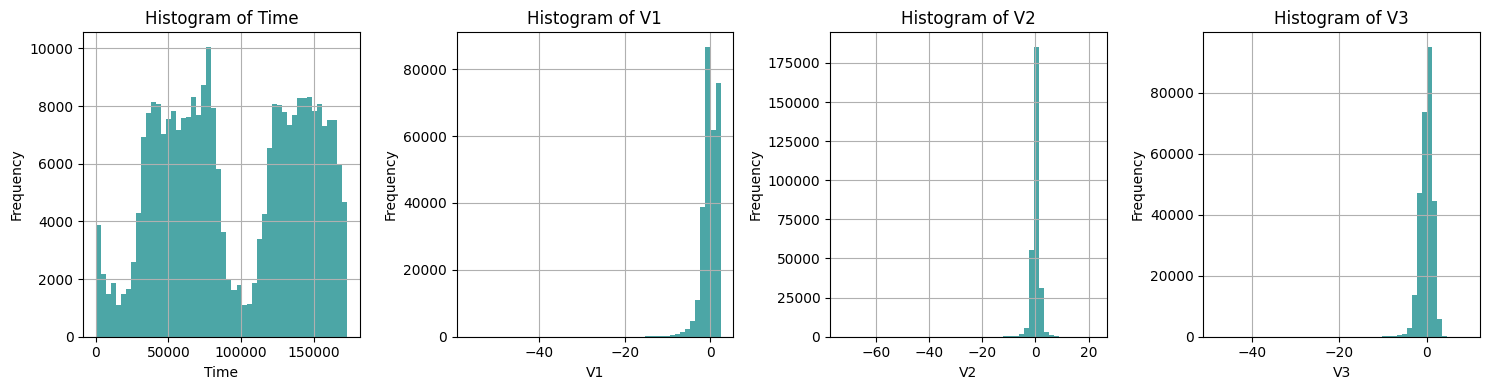

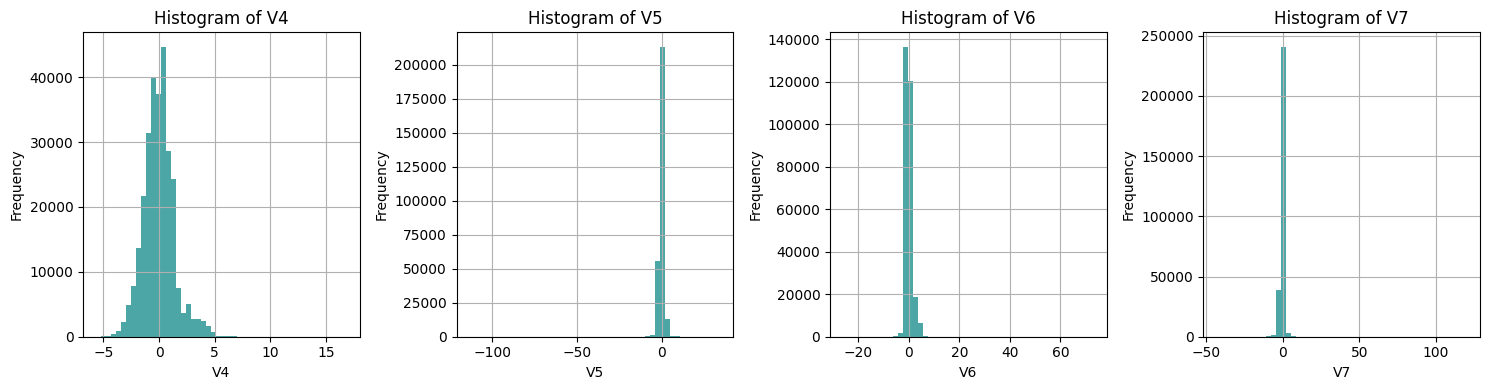

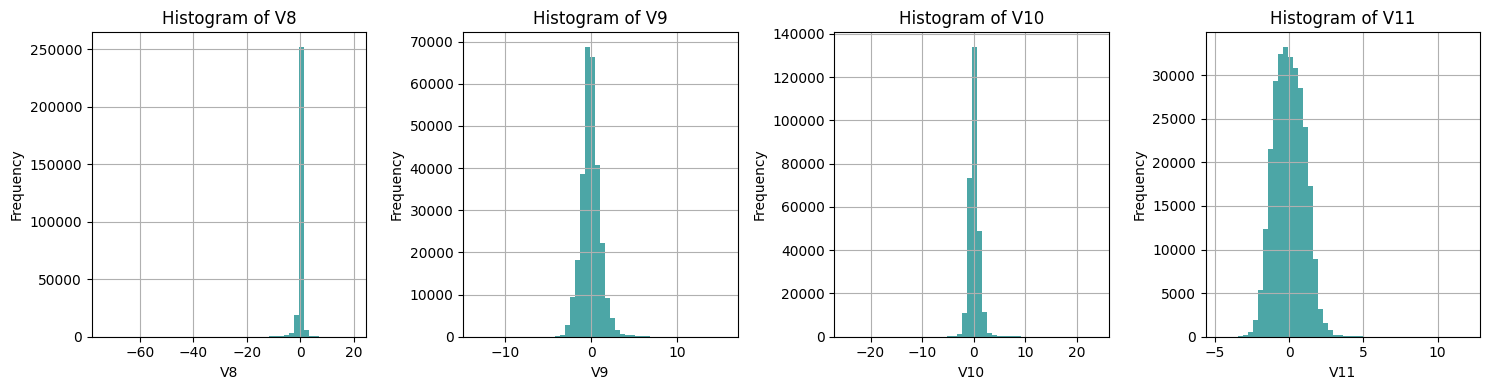

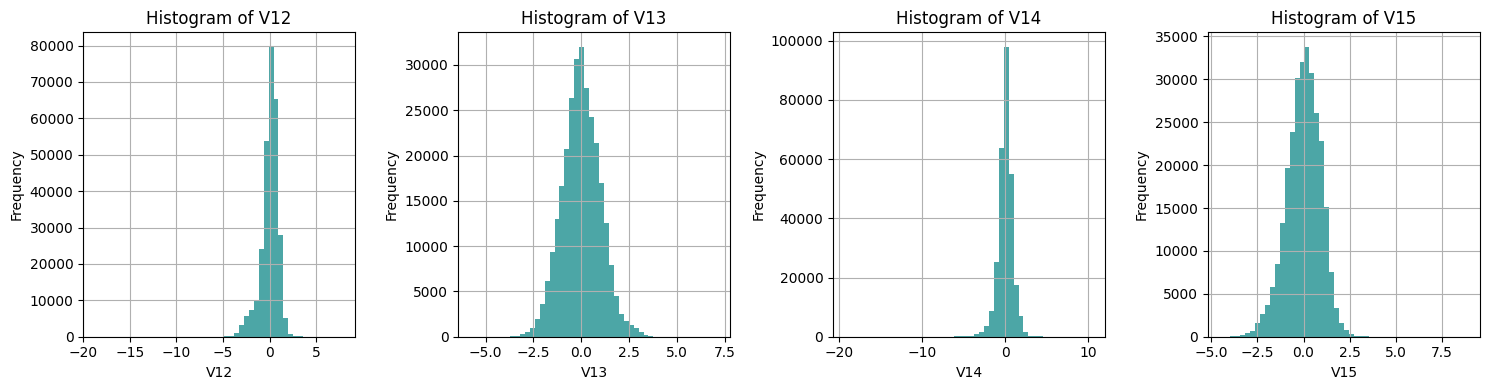

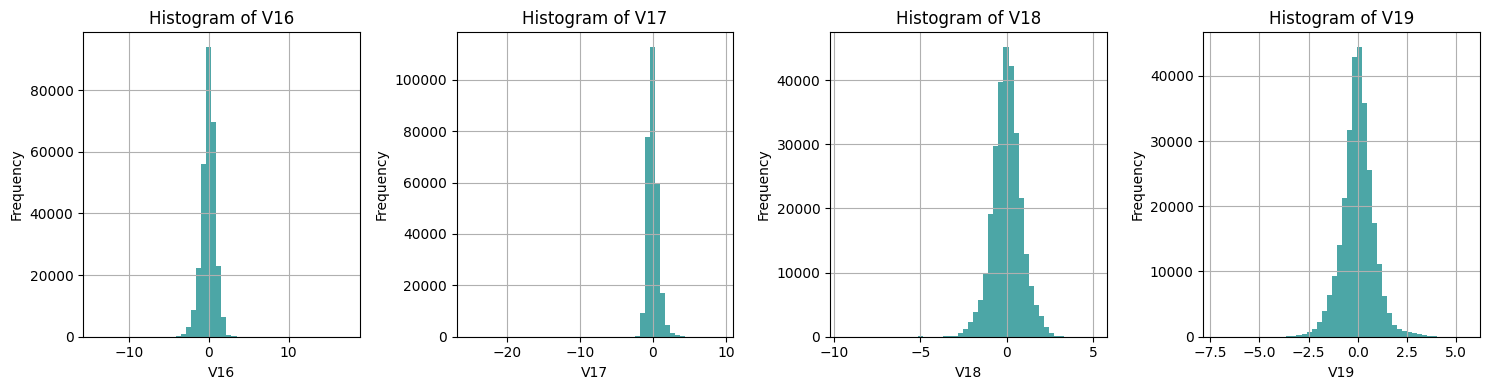

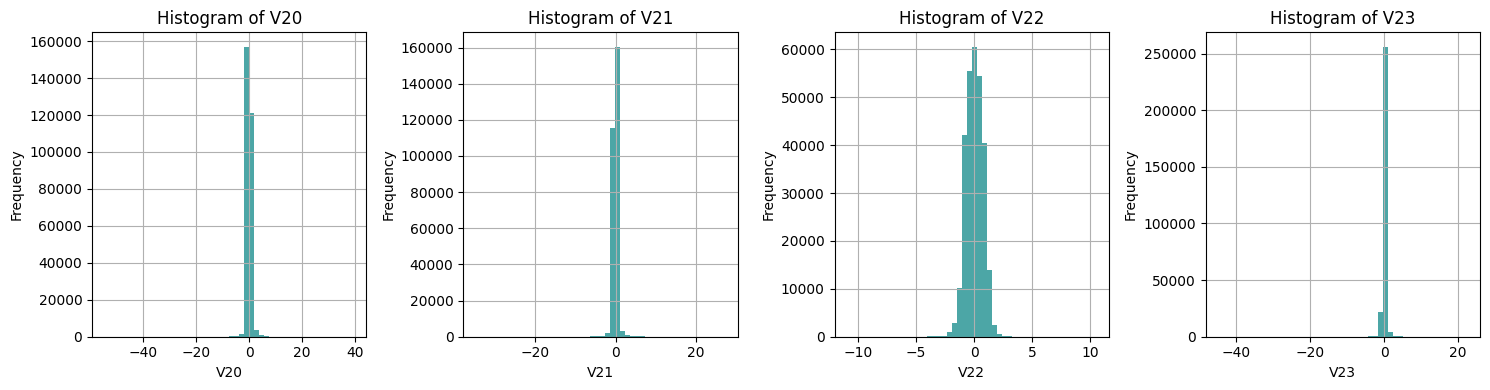

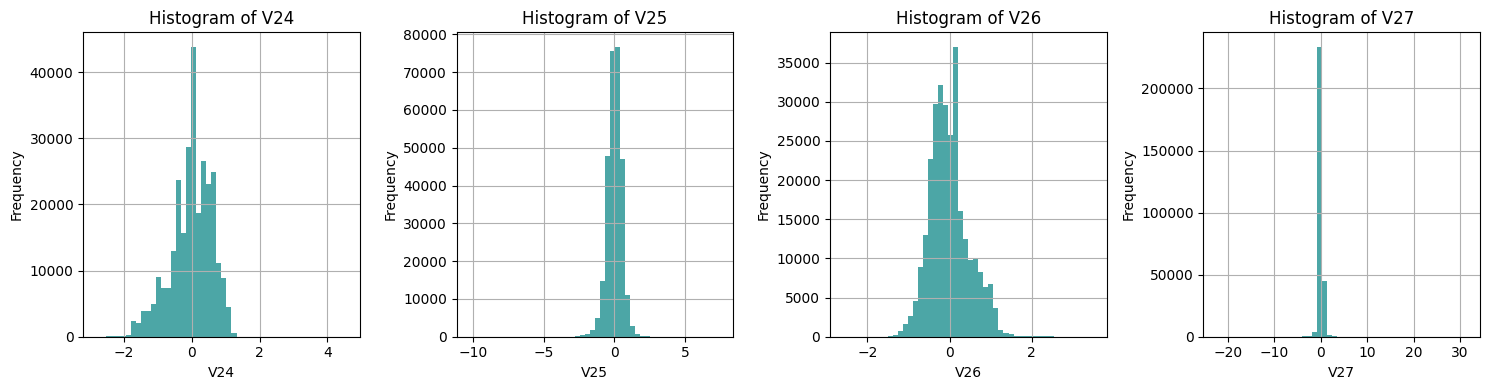

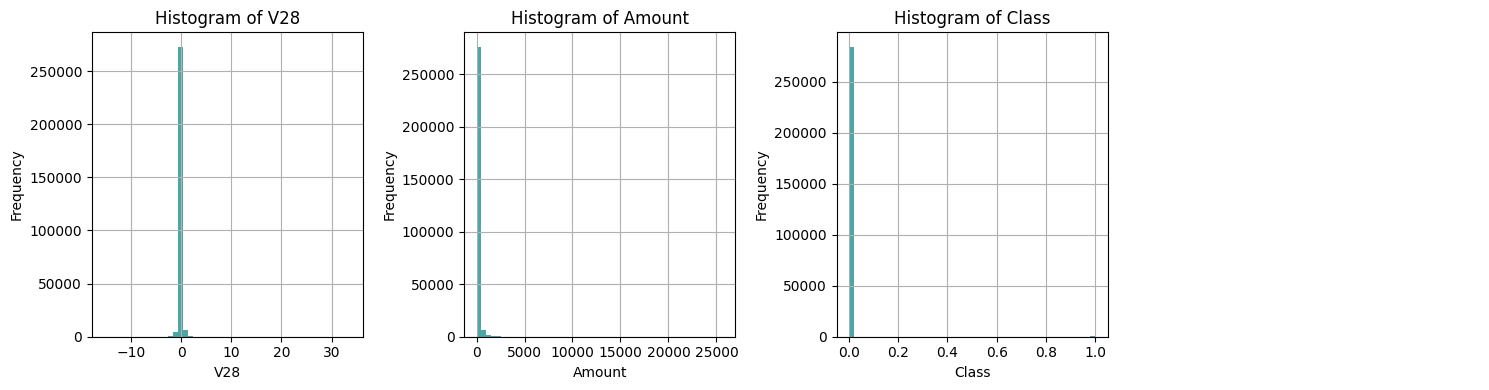

In [9]:
# View histogram data
# Get the list of columns
columns = df.columns

# Loop through the columns in groups of 4
for i in range(0, len(columns), 4):
    # Create a subplot with 1 row and 4 columns, each with an independent y-axis
    fig, axes = plt.subplots(1, 4, figsize=(15, 4))

    # Plot the first four columns in the group
    for j in range(4):
        if i + j < len(columns):
            axes[j].hist(df[columns[i + j]], bins=50, color='teal', alpha=0.7)
            axes[j].set_title(f"Histogram of {columns[i + j]}")
            axes[j].set_xlabel(columns[i + j])
            axes[j].set_ylabel("Frequency")
            axes[j].grid(True)
        else:
            # If there is no column for this plot, hide the subplot
            axes[j].axis('off')

    # Show the plot
    plt.tight_layout()
    plt.show()
    plt.close()  # Close the plot to free up memory


##### Review of Histogram Plots

The histogram plots provide an important visual summary of the distribution of the features in the dataset. Upon reviewing the plots, we observe the following:

- Most of the features, particularly those labeled V1 to V28, represent principal components derived from the original data and appear to be centered around zero, exhibiting various distributions.
- **V2, V5, V6, V7, V8, V20, V21, V23, V27, V28, "Amount", and "Class"** are notable for not being normally distributed, displaying skewness or irregular patterns. This suggests the possibility of outliers or inherent characteristics of the transactions in these features.
- The **"Class"** feature, which represents fraud or non-fraud transactions, is highly imbalanced, as expected.
- The **"Amount"** feature shows a right-skewed distribution, indicating that most transactions involve small amounts, with a few larger transactions.

These irregularities or skewness in the data could indicate potential outliers or structural differences in transaction behavior. In the next steps, we will need to further analyze outliers and potentially apply transformations or scaling to make the data more suitable for machine learning algorithms.


#### Step 2.10 Detecting Outliers Using the IQR Method

Outliers are data points that deviate significantly from other observations in the dataset. Identifying outliers is crucial because they can potentially distort the results of machine learning algorithms. One common method to detect outliers is the **Interquartile Range (IQR) method**.

##### Interquartile Range (IQR)
The IQR is a measure of statistical dispersion and is calculated as the difference between the 75th and 25th percentiles (Q3 and Q1, respectively):

IQR = Q3 - Q1

Using the IQR, we define outliers as points that fall below the lower bound or above the upper bound:
- **Lower Bound**: Q1 - 1.5 * IQR
- **Upper Bound**: Q3 + 1.5 * IQR

##### Process:
1. **Q1 (25th percentile)** and **Q3 (75th percentile)** are calculated for each numeric feature.
2. **Lower Bound**: Any value below Q1 - 1.5 * IQR is considered an outlier.
3. **Upper Bound**: Any value above Q3 + 1.5 * IQR is considered an outlier.
4. We count the number of outliers for each feature and calculate the percentage of outliers relative to the total number of records in the dataset.
5. The features are sorted based on the percentage of outliers in descending order to identify the features with the highest proportion of outliers.

Features with a high percentage of outliers may require further analysis, and in some cases, we may consider transformations, scaling, or removing the outliers.

##### Results:
The table below shows the number and percentage of outliers for each feature in the dataset:


In [10]:
# Dictionary to store outlier information
outlier_info = {}

# Detecting outliers using IQR method for numerical features
numeric_columns = df.select_dtypes(include=[np.number]).columns
total_rows = len(df)

for column in numeric_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Calculate the lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Count outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    num_outliers = len(outliers)
    percentage_outliers = (num_outliers / total_rows) * 100
    
    # Store the number of outliers and percentage in the dictionary
    outlier_info[column] = {
        "num_outliers": num_outliers,
        "percentage_outliers": percentage_outliers
    }

# Sort the dictionary by the percentage of outliers in descending order
sorted_outliers = sorted(outlier_info.items(), key=lambda x: x[1]['percentage_outliers'], reverse=True)

# Display the results
print(f"{'Feature':<20} {'Num Outliers':<15} {'% Outliers':<15}")
print("=" * 50)
for feature, info in sorted_outliers:
    print(f"{feature:<20} {info['num_outliers']:<15} {info['percentage_outliers']:<15.2f}")


Feature              Num Outliers    % Outliers     
V27                  39163           13.75          
Amount               31904           11.20          
V28                  30342           10.65          
V20                  27770           9.75           
V8                   24134           8.47           
V6                   22965           8.06           
V23                  18541           6.51           
V12                  15348           5.39           
V21                  14497           5.09           
V14                  14149           4.97           
V2                   13526           4.75           
V5                   12295           4.32           
V4                   11148           3.91           
V19                  10205           3.58           
V10                  9496            3.33           
V7                   8948            3.14           
V9                   8283            2.91           
V16                  8184            2.87     

#### Step 2.11 Correlation of Outliers with Fraud Cases

After identifying the presence of outliers in various features, it's important to investigate whether these outliers are associated with fraudulent transactions. Outliers may provide significant information as fraudulent transactions can deviate significantly from normal patterns.

To explore this, we can calculate the percentage of fraud cases among the detected outliers in each feature. By doing this, we aim to understand if outliers in certain features are more strongly associated with fraud compared to non-outliers.

##### Key Insights:
- Features with a higher percentage of fraud cases among their outliers may indicate that these features play a critical role in detecting fraud.
- If a feature has a high correlation between its outliers and fraud cases, it suggests that this feature could be crucial in identifying potential fraudulent transactions.
- Conversely, features with a low percentage of fraud cases among outliers may indicate that their outliers do not contribute significantly to fraud detection, and we might consider treating or removing such outliers to improve model performance.

The next steps would involve handling these outliers through techniques such as:
1. **Removing Outliers**: Discarding the detected outliers, especially in features where outliers have a low correlation with fraud.
2. **Transforming Features**: Applying techniques like log transformation or scaling to reduce the impact of outliers while preserving valuable information.
3. **Keeping Outliers**: In cases where the outliers are strongly associated with fraud, we might retain these outliers as they could be essential for model accuracy in fraud detection.


In [11]:
# Check for the correlation of outliers with fraud cases for each feature
outlier_fraud_correlation = []

# Loop through each feature
for column in df.columns[:-1]:  # Exclude the 'Class' column
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define outlier range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Get outliers for the current column
    is_outlier = (df[column] < lower_bound) | (df[column] > upper_bound)

    # Check how many fraud cases are in the outliers
    fraud_cases_in_outliers = df[is_outlier & (df['Class'] == 1)]
    non_fraud_cases_in_outliers = df[is_outlier & (df['Class'] == 0)]

    # Calculate the percentage of fraud cases among outliers
    total_outliers = len(df[is_outlier])
    fraud_percentage_in_outliers = (len(fraud_cases_in_outliers) / total_outliers) * 100 if total_outliers > 0 else 0

    # Append the result to the list
    outlier_fraud_correlation.append({
        'Feature': column,
        'Fraud Cases in Outliers': len(fraud_cases_in_outliers),
        'Non-Fraud Cases in Outliers': len(non_fraud_cases_in_outliers),
        'Total Outliers': total_outliers,
        'Percentage Fraud in Outliers': fraud_percentage_in_outliers
    })

# Convert to DataFrame to display the results
outlier_fraud_df = pd.DataFrame(outlier_fraud_correlation)
outlier_fraud_df = outlier_fraud_df.sort_values(by='Percentage Fraud in Outliers', ascending=False)

# Display the result
print(outlier_fraud_df)


   Feature  Fraud Cases in Outliers  Non-Fraud Cases in Outliers  \
11     V11                      294                          486   
3       V3                      312                         3051   
17     V17                      397                         7023   
16     V16                      351                         7833   
10     V10                      399                         9097   
7       V7                      301                         8647   
18     V18                      237                         7296   
14     V14                      430                        13719   
4       V4                      318                        10830   
9       V9                      223                         8060   
12     V12                      409                        14939   
1       V1                      174                         6888   
22     V22                       28                         1289   
2       V2                      246             

##### Key Observations Based on Outlier and Fraud Correlation:

1. **Class Feature**:
   - The `Class` feature itself has 492 fraud cases, which aligns with the total number of fraud cases in the dataset (100% of fraud cases are in this "outlier" feature, which makes sense because this feature directly indicates fraud or non-fraud transactions).

2. **Top Features with Higher Fraud Outliers**:
   - **V11** shows the highest percentage of fraud cases among its outliers (37.69%), indicating that it might be a critical feature for fraud detection.
   - Features such as **V3**, **V17**, **V16**, and **V10** also show noticeable percentages of fraud cases in their outliers, suggesting that outliers in these features could be indicative of fraudulent behavior.

3. **Features with Lower Fraud Outliers**:
   - Many features (e.g., **Amount**, **V28**, **V27**) have large numbers of outliers, but the percentage of fraud cases among these outliers is quite low. For example, **Amount** has 31,904 outliers, but only 0.28% of these outliers are associated with fraud cases.
   - Similarly, **V27** and **V28** have a large number of outliers, but a low percentage of fraud cases (less than 1%).

4. **Features with No or Very Few Outliers**:
   - Some features, such as **Time** and **V24**, have no or very few outliers and no correlation with fraud cases.

##### Insights and Next Steps:
- **High Fraud Outliers (e.g., V11, V3, V17)**: These features may contain strong signals related to fraud detection, particularly among their outliers. It could be beneficial to further investigate the behavior of these features (e.g., distribution analysis, transformation, scaling).
  
- **Low Fraud Outliers (e.g., Amount, V28, V27)**: Even though these features have a large number of outliers, their correlation with fraud is low. These features may benefit from different preprocessing techniques such as scaling, transformation, or even removal of outliers.

- **Features with Very Few or No Outliers**: For features with very few outliers or none (such as **Time** and **V24**), it’s likely that no further outlier handling is necessary.

- **Handling Outliers**: Features with high fraud correlation in their outliers (such as **V11** or **V3**) could be explored further, possibly retaining their outliers for model training. On the other hand, features with low fraud correlation might have their outliers removed.

##### Conclusion:
This analysis provides valuable insights into the correlation between outliers and fraud cases. Based on these insights, we can make informed decisions on how to handle outliers for the next steps in data preprocessing, including normalization, scaling, or outlier removal, to improve the performance of machine learning models.


## Section 3:Preprocessing the Data

In this section, we apply important preprocessing steps to prepare the dataset for modeling. These steps include:

1. **Feature Scaling**: We use `RobustScaler` to normalize the feature values. This scaler is robust to outliers and scales the data by removing the median and scaling according to the interquartile range (IQR).
2. **Handling Class Imbalance**: The dataset is highly imbalanced with significantly more non-fraudulent transactions than fraudulent ones. To address this, we apply `SMOTE` (Synthetic Minority Over-sampling Technique) after scaling to create synthetic samples for the minority class (fraud cases). This balances the dataset for better model performance.
3. **Train-Test Split**: The dataset is split into training and test sets using `train_test_split`, with 80% of the data used for training and 20% reserved for testing. The split is stratified to maintain the proportion of fraud and non-fraud cases in both sets.


#### Step 3.1 Preprocessing the Data

The following code snippet performs three essential preprocessing steps:
1. **Train-Test Split** to split the dataset into training and testing sets while preserving the class distribution.
2. **Feature Scaling** using `RobustScaler` to handle outliers effectively.


In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
import pandas as pd

# Separate the features (X) and the target (y)
X = df.drop(columns=['Class'])
y = df['Class']

# Split the data into training and test sets (80% train, 20% test)
print("Splitting data into 80% train, 20% test...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Display class distribution
train_class_distribution = y_train.value_counts().rename({0: 'Non-Fraud (0)', 1: 'Fraud (1)'})
test_class_distribution = y_test.value_counts().rename({0: 'Non-Fraud (0)', 1: 'Fraud (1)'})

print("\nTraining set class distribution:")
print(train_class_distribution)
print("\nTest set class distribution:")
print(test_class_distribution)

# Apply RobustScaler to scale the original training and test features
scaler = RobustScaler()

# Scale the training and test data
print("\nScaling training and test data...")
X_train_orig_scaled = scaler.fit_transform(X_train)
X_test_orig_scaled = scaler.transform(X_test)

# Display the shapes of the scaled datasets
print(f"Training data shape: {X_train_orig_scaled.shape}")
print(f"Test data shape: {X_test_orig_scaled.shape}")


Splitting data into 80% train, 20% test...

Training set class distribution:
Non-Fraud (0)    227451
Fraud (1)           394
Name: Class, dtype: int64

Test set class distribution:
Non-Fraud (0)    56864
Fraud (1)           98
Name: Class, dtype: int64

Scaling training and test data...
Training data shape: (227845, 30)
Test data shape: (56962, 30)


## Section 4: Model Selection

For this project, we selected two classifiers based on the nature of the credit card fraud detection dataset:

1. **RandomForestClassifier**: Random Forest is robust in handling imbalanced datasets like ours, where the occurrence of fraudulent transactions is rare. It performs well with datasets that have many features, as it uses multiple decision trees to reduce overfitting and capture complex patterns. We configured `n_jobs` to use 50% of the available physical cores for parallel CPU processing by dynamically calculating the number of cores. Additionally, we incorporated a `sleep(7)` command to prevent CPU overheating during the training process.

2. **XGBClassifier**: XGBoost is widely recognized for its high performance on structured/tabular data, making it an excellent choice for our dataset. Its ability to handle class imbalance through parameter adjustments like `scale_pos_weight` and its efficient use of GPU resources for large-scale datasets made it a key choice. We used `tree_method='gpu_hist'` and `predictor='gpu_predictor'` to utilize GPU acceleration, while limiting GPU usage to 75% and incorporating a `sleep(7)` command to avoid GPU overheating.

Both models were tuned using **`GridSearchCV`** to find the optimal hyperparameters, such as:
- **RandomForestClassifier**: `n_estimators`, `max_depth`, `min_samples_split`, and `class_weight`.
- **XGBClassifier**: `scale_pos_weight`, `max_depth`, `min_child_weight`, `gamma`, `learning_rate`, `tree_method`, and `predictor`.

The **`GridSearchCV`** process used 5-fold cross-validation to evaluate each parameter combination. A progress bar was integrated to monitor the training process, ensuring efficient resource utilization while avoiding overheating of the hardware (CPU and GPU).



#### Step 4.1 Random Forest Classifier with Class Weight Selection and Cross-Validation

This section of the notebook trains and selects the best **Random Forest Classifier** model using different class weight values for the target class. The following steps are performed:

1. **Cross-Validation**:  
   We perform cross-validation using `StratifiedKFold` to maintain class balance across the folds. For each fold, the model is trained and evaluated on different class weight settings.

2. **Model Training**:  
   For each fold, we train a `RandomForestClassifier` using 50% of the available CPU cores. We test different class weights for the target class to optimize the model for fraud detection.

3. **Performance Metrics**:  
   The model's performance is evaluated using multiple metrics such as:
   - Precision
   - Recall
   - F1-Score
   - ROC-AUC
   - Accuracy

4. **Best Model Selection**:  
   After the cross-validation process, the model with the best **F1-Score** for the fraud class is selected as the best-performing model. The confusion matrix and classification report are displayed for this model.

5. **Final Evaluation**:  
   Finally, the best model is retrained on the entire training dataset and evaluated on the test dataset. This provides an assessment of the model's final performance on unseen data.

##### Key Hyperparameters:
- **Class Weights**: A range of class weight values for the fraud class is tested to handle class imbalance.
- **k-Folds**: 2-fold cross-validation is used for training and evaluation.
- **Number of Estimators**: The number of trees in the forest is increased in the final model for more stable results.

The outputs include:
- The best class weight configuration and its performance metrics on both the cross-validation and test sets.
- Confusion matrices and classification reports for both the cross-validation and test evaluations.


In [28]:
import pandas as pd
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
from tqdm import tqdm
import psutil
import joblib
import numpy as np

# Get the number of available CPU cores and calculate 50% of them
num_cores = psutil.cpu_count(logical=False)  # Total physical cores
p = psutil.Process()
n_jobs = max(1, num_cores // 2)
available_cores = list(range(num_cores // 2))  # Limit to 50% of physical cores
p.cpu_affinity(available_cores)  # Set affinity to limit CPU usage

print(f"Total available physical CPU cores: {num_cores}")
print(f"Using {n_jobs} cores for training.")

# Use X_train_orig_scaled (Original scaled training data without SMOTE) and y_train (Original target data)
X = np.array(X_train_orig_scaled)
y = np.array(y_train)

# Define class weights to loop through
weight_classes = [16.58, 16.60, 16.62, 16.68] # [15.2, 15.4, 15.6, 15.8, 16, 16.2, 16.4, 16.6] # [13, 15, 16, 17, 18, 20, 25, 50, 70, 100, 150, 200]
k_folds = 4
results = []
confusion_matrices = {}
classification_reports = {}

# Display the start time
overall_start_time = time.time()
print(f"\nOverall Process Start Time: {time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(time.time()))}")

# Initialize progress bar
total_iterations = len(weight_classes) * k_folds
pbar = tqdm(total=total_iterations, desc="Model Training Progress", ncols=100)

# Cross-validation using StratifiedKFold to maintain class balance across folds
cv = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)

# Loop over class weights
idx = 0
for weight in weight_classes:
    fold_results = []
    
    # Stratified cross-validation
    for train_index, test_index in cv.split(X, y):
        idx += 1
        pbar.set_description(f"Trying {idx}/{total_iterations}")
        
        # Split the data into train/test for the fold
        X_train_cv, X_test_cv = X[train_index], X[test_index]
        y_train_cv, y_test_cv = y[train_index], y[test_index]

        # Define class weights
        weight_class = {0: 1, 1: weight}

        # Initialize RandomForestClassifier with class weights and n_jobs
        clf = RandomForestClassifier(
            class_weight=weight_class, 
            random_state=42, 
            n_jobs=n_jobs,
            max_depth=10,  # Set max_depth to avoid overfitting
            n_estimators=300
        )
        
        # Start timing the training
        start_time = time.time()
        clf.fit(X_train_cv, y_train_cv)  # Train the model
        end_time = time.time()
        duration = end_time - start_time

        y_pred_fold = clf.predict(X_test_cv)
        
        # Calculate metrics: ROC-AUC, accuracy, precision, recall, F1-score
        roc_auc = roc_auc_score(y_test_cv, y_pred_fold)
        accuracy = accuracy_score(y_test_cv, y_pred_fold)
        report_dict = classification_report(y_test_cv, y_pred_fold, target_names=['Non-Fraud', 'Fraud'], output_dict=True)
        precision_fraud = report_dict['Fraud']['precision']
        recall_fraud = report_dict['Fraud']['recall']
        f1_fraud = report_dict['Fraud']['f1-score']
        confusion_matrix_fold = confusion_matrix(y_test_cv, y_pred_fold)

        # Store fold results
        fold_results.append({
            'precision_fraud': precision_fraud,
            'recall_fraud': recall_fraud,
            'f1_fraud': f1_fraud,
            'roc_auc': roc_auc,
            'accuracy': accuracy,
            'duration': duration
        })

        # Sleep for 7 seconds between folds to reduce CPU load
        time.sleep(7)
        pbar.update(1)
    
    # Average metrics across folds
    avg_metrics = {k: sum([fold[k] for fold in fold_results]) / k_folds for k in ['precision_fraud', 'recall_fraud', 'f1_fraud', 'roc_auc', 'accuracy']}
    avg_metrics['weight_class'] = weight
    avg_metrics['duration'] = sum([fold['duration'] for fold in fold_results]) / k_folds

    # Store the confusion matrix and classification report of the last fold
    confusion_matrices[weight] = confusion_matrix_fold
    classification_reports[weight] = classification_report(y_test_cv, y_pred_fold, target_names=['Non-Fraud', 'Fraud'])

    results.append(avg_metrics)

# Close the progress bar
pbar.close()

# Display the final end time of the whole process
overall_end_time = time.time()
print(f"\nOverall Process End Time: {time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(overall_end_time))}")
overall_duration = overall_end_time - overall_start_time
print(f"Overall Duration: {int(overall_duration // 60)} minutes and {int(overall_duration % 60)} seconds")

# Find the best model based on F1-Score for Fraud
top_model = max(results, key=lambda x: x['f1_fraud'], default=None)

# Save the best model using joblib
joblib.dump(top_model, 'best_rf_model.pkl')

# --- Final Output ---
print(f"\nBest Model with the Highest F1-Score (Fraud): Class Weight = {top_model['weight_class']}")
print(f"Precision (Fraud): {top_model['precision_fraud']:.4f}, Recall (Fraud): {top_model['recall_fraud']:.4f}, F1-Score (Fraud): {top_model['f1_fraud']:.4f}")
print(f"ROC-AUC Score: {top_model['roc_auc']:.4f}, Accuracy: {top_model['accuracy']:.4f}")
print(f"Training Duration: {int(top_model['duration'] // 60)} minutes and {int(top_model['duration'] % 60)} seconds")

# Display confusion matrix and classification report for the best model
best_model_conf_matrix = confusion_matrices[top_model['weight_class']]
best_model_class_report = classification_reports[top_model['weight_class']]
print(f"\nConfusion Matrix for Best Model (Weight Class {top_model['weight_class']}):\n{best_model_conf_matrix}")
print(f"\nClassification Report for Best Model (Weight Class {top_model['weight_class']}):\n{best_model_class_report}")

# --- Final Evaluation on Test Set ---
print("\nEvaluating the final model on the test set...")

# Use the best class weight from cross-validation
best_weight_class = {0: 1, 1: top_model['weight_class']}

# Initialize RandomForestClassifier with the best weight class, increase depth and number of trees
final_clf = RandomForestClassifier(
    class_weight=best_weight_class,
    random_state=42,
    n_jobs=n_jobs,
    max_depth=10,  # Set max_depth to avoid overfitting
    n_estimators=300
)

# Train the model on the full training data
final_clf.fit(X_train_orig_scaled, y_train)

# Predict on the test data
y_test_pred = final_clf.predict(X_test_orig_scaled)

# Calculate metrics: ROC-AUC, accuracy, precision, recall, F1-score
roc_auc_final = roc_auc_score(y_test, y_test_pred)
accuracy_final = accuracy_score(y_test, y_test_pred)
report_final = classification_report(y_test, y_test_pred, target_names=['Non-Fraud', 'Fraud'], output_dict=True)
precision_fraud_final = report_final['Fraud']['precision']
recall_fraud_final = report_final['Fraud']['recall']
f1_fraud_final = report_final['Fraud']['f1-score']
test_confusion_matrix = confusion_matrix(y_test, y_test_pred)

# --- Final Model Output ---
print(f"\nFinal Model with Class Weight = {top_model['weight_class']}")
print(f"Precision (Fraud): {precision_fraud_final:.4f}, Recall (Fraud): {recall_fraud_final:.4f}, F1-Score (Fraud): {f1_fraud_final:.4f}")
print(f"ROC-AUC Score: {roc_auc_final:.4f}, Accuracy: {accuracy_final:.4f}")
print(f"\nConfusion Matrix on Test Set:\n{test_confusion_matrix}")
print(f"\nClassification Report on Test Set:\n{classification_report(y_test, y_test_pred, target_names=['Non-Fraud', 'Fraud'])}")


Total available physical CPU cores: 24
Using 12 cores for training.

Overall Process Start Time: 2024-10-13 08:02:06


Trying 8/8: 100%|█████████████████████████████████████████████████████| 8/8 [03:42<00:00, 27.80s/it]



Overall Process End Time: 2024-10-13 08:05:49
Overall Duration: 3 minutes and 42 seconds

Best Model with the Highest F1-Score (Fraud): Class Weight = 16.55
Precision (Fraud): 0.9395, Recall (Fraud): 0.7640, F1-Score (Fraud): 0.8418
ROC-AUC Score: 0.8819, Accuracy: 0.9995
Training Duration: 0 minutes and 20 seconds

Confusion Matrix for Best Model (Weight Class 16.55):
[[113710     15]
 [    41    156]]

Classification Report for Best Model (Weight Class 16.55):
              precision    recall  f1-score   support

   Non-Fraud       1.00      1.00      1.00    113725
       Fraud       0.91      0.79      0.85       197

    accuracy                           1.00    113922
   macro avg       0.96      0.90      0.92    113922
weighted avg       1.00      1.00      1.00    113922


Evaluating the final model on the test set...

Final Model with Class Weight = 16.55
Precision (Fraud): 0.9091, Recall (Fraud): 0.8163, F1-Score (Fraud): 0.8602
ROC-AUC Score: 0.9081, Accuracy: 0.9995

Co

#### Step 4.2 Model Selection and Evaluation with Cross-Validation and SMOTE

This code performs cross-validation and hyperparameter tuning using RandomForestClassifier, with SMOTE applied to balance the classes in each fold's training data. The goal is to identify the best combination of class weights and decision thresholds for maximizing the F1-score of the fraud (class 1).

##### Key Steps:
1. **Data Preparation**:
   - The training data is split into multiple folds using `StratifiedKFold` to ensure that each fold has a balanced representation of classes.
   - SMOTE is applied to each training fold, augmenting the minority class to balance the data.
   - The validation fold remains unchanged (original data) to avoid data leakage.

2. **Model Training**:
   - A `RandomForestClassifier` is trained on each SMOTE-augmented fold, with varying class weights and decision thresholds.
   - The classifier is trained with a maximum depth of 10 and 300 estimators to prevent overfitting.
   - The performance of the model is evaluated on the validation fold after each iteration.

3. **Metrics**:
   - The following metrics are tracked during each iteration: F1-score for fraud (class 1), precision, recall, ROC-AUC, and accuracy.
   - These metrics are averaged across the folds, and the model with the highest F1-score for fraud is selected.

4. **Final Evaluation**:
   - The best model (based on F1-score for fraud) is evaluated on the original test data (without SMOTE).
   - The final evaluation metrics (precision, recall, F1-score, accuracy, and ROC-AUC) are reported, along with the confusion matrix and classification report.

5. **Model Saving**:
   - The best model is saved using `joblib` for future use.

##### Why this approach?
- **SMOTE**: Balances the training data by oversampling the minority class, helping the model learn from a balanced dataset during each fold of cross-validation.
- **Cross-Validation**: Ensures that the model is tested on multiple subsets of the data, providing a more reliable estimate of model performance.
- **Decision Threshold Tuning**: Adjusting the decision threshold allows the model to be more or less aggressive when classifying fraud cases, giving control over precision and recall trade-offs.

##### Output:
- The best model's performance on the test set is displayed, and a summary of all models evaluated during the process is provided for further analysis.


In [36]:
import pandas as pd
import time
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
from sklearn.model_selection import StratifiedKFold
from tqdm import tqdm
import psutil
import numpy as np
import joblib

# Get the number of available CPU cores and calculate 50% of them
num_cores = psutil.cpu_count(logical=False)
n_jobs = max(1, num_cores // 2)
print(f"Total available physical CPU cores: {num_cores}")
print(f"Using {n_jobs} cores for training.")

# Lists of class weights and thresholds to iterate over
class_weights_list =  [3] # [1, 2, 3, 5, 6, 10, 15, 20]
thresholds_list = [0.50] # [0.45, 0.50, 0.55]
k_folds = 5  # Set number of folds for cross-validation

best_f1_fraud = -1  # Initialize to track the best F1 score for Fraud
best_model = None
best_conf_matrix = None
best_class_report = None
best_weight_class = None
best_threshold = None

# Initialize a list to store all metric results for comparison
results = []

# Display the start time before the progress bar starts
overall_start_time = time.time()
print(f"\nOverall Process Start Time: {time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(time.time()))}")

# Initialize progress bar for the combined loop of class weights and thresholds
total_iterations = len(class_weights_list) * len(thresholds_list) * k_folds
pbar = tqdm(total=total_iterations, desc="Model Training Progress", ncols=100)

# Initialize idx for progress tracking
idx = 0  # Counter for the progress bar

# Initialize StratifiedKFold for cross-validation
cv = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)

# Grid search over class weights and thresholds
for class_weight in class_weights_list:
    for threshold in thresholds_list:
        fold_results = {
            'class_weight': class_weight,
            'threshold': threshold,
            'roc_auc': [],
            'accuracy': [],
            'precision_fraud': [],
            'recall_fraud': [],
            'f1_fraud': [],
        }
        
        for fold_idx, (train_idx, val_idx) in enumerate(cv.split(X_train_orig_scaled, y_train)):
            idx += 1  # Increment the progress counter
            pbar.set_description(f"Trying {idx}/{total_iterations}, class_weight={class_weight}, threshold={threshold}, fold={fold_idx + 1}/{k_folds}")
            
            # Split the training data into a training fold and a validation fold
            X_train_fold, X_val_fold = X_train_orig_scaled[train_idx], X_train_orig_scaled[val_idx]
            y_train_fold, y_val_fold = y_train[train_idx], y_train[val_idx]

            # Apply SMOTE only to the training fold (not the validation fold)
            sm = SMOTE(random_state=42)
            X_train_fold_smote, y_train_fold_smote = sm.fit_resample(X_train_fold, y_train_fold)

            # Define class weights
            weight_class = {0: 1, 1: class_weight}

            # Initialize RandomForestClassifier with class weights
            clf = RandomForestClassifier(
                class_weight=weight_class,
                random_state=42,
                n_jobs=n_jobs,
                max_depth=10,  # Set max_depth to avoid overfitting
                n_estimators=300
            )

            # Train the model on SMOTE-augmented training fold
            clf.fit(X_train_fold_smote, y_train_fold_smote)

            # Predict probabilities on the validation fold (original, non-SMOTE data)
            y_val_probs = clf.predict_proba(X_val_fold)[:, 1]

            # Apply the threshold to classify
            y_val_pred = (y_val_probs >= threshold).astype(int)

            # Calculate metrics: ROC-AUC, accuracy, precision, recall, F1-score
            roc_auc = roc_auc_score(y_val_fold, y_val_pred)
            accuracy = accuracy_score(y_val_fold, y_val_pred)
            report_dict = classification_report(y_val_fold, y_val_pred, target_names=['Non-Fraud', 'Fraud'], output_dict=True)
            precision_fraud = report_dict['Fraud']['precision']
            recall_fraud = report_dict['Fraud']['recall']
            f1_fraud = report_dict['Fraud']['f1-score']

            # Track metrics for this fold
            fold_results['roc_auc'].append(roc_auc)
            fold_results['accuracy'].append(accuracy)
            fold_results['precision_fraud'].append(precision_fraud)
            fold_results['recall_fraud'].append(recall_fraud)
            fold_results['f1_fraud'].append(f1_fraud)

            # Add sleep interval to reduce system load
            time.sleep(7)
            
            # Update progress bar
            pbar.update(1)
        
        # Calculate the average metrics across all folds
        avg_f1_fraud = np.mean(fold_results['f1_fraud'])
        avg_roc_auc = np.mean(fold_results['roc_auc'])
        avg_accuracy = np.mean(fold_results['accuracy'])
        avg_precision_fraud = np.mean(fold_results['precision_fraud'])
        avg_recall_fraud = np.mean(fold_results['recall_fraud'])
        
        # Store all metrics for this combination
        results.append({
            'class_weight': class_weight,
            'threshold': threshold,
            'avg_f1_fraud': avg_f1_fraud,
            'avg_roc_auc': avg_roc_auc,
            'avg_accuracy': avg_accuracy,
            'avg_precision_fraud': avg_precision_fraud,
            'avg_recall_fraud': avg_recall_fraud,
        })

        # Track the best model based on F1-Score of Fraud
        if avg_f1_fraud > best_f1_fraud:
            best_f1_fraud = avg_f1_fraud
            best_model = clf
            best_weight_class = class_weight
            best_threshold = threshold

# Close the progress bar
pbar.close()

# Display the final end time of the whole process
overall_end_time = time.time()
print(f"\nOverall Process End Time: {time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(overall_end_time))}")
overall_duration = overall_end_time - overall_start_time
print(f"Overall Duration: {int(overall_duration // 60)} minutes and {int(overall_duration % 60)} seconds")

# Save the best model using joblib
joblib.dump(best_model, 'best_rf_model_threshold_classweight.pkl')

# --- Final Evaluation on Test Set ---
print("\nEvaluating the best model on the test set...")

# Predict probabilities on the original test set
y_test_probs = best_model.predict_proba(X_test_orig_scaled)[:, 1]

# Apply the best threshold to classify
y_test_pred = (y_test_probs >= best_threshold).astype(int)

# Calculate metrics: ROC-AUC, accuracy, precision, recall, F1-score
roc_auc = roc_auc_score(y_test, y_test_pred)
accuracy = accuracy_score(y_test, y_test_pred)
report_dict = classification_report(y_test, y_test_pred, target_names=['Non-Fraud', 'Fraud'], output_dict=True)
precision_fraud = report_dict['Fraud']['precision']
recall_fraud = report_dict['Fraud']['recall']
f1_fraud = report_dict['Fraud']['f1-score']
confusion_matrix_test = confusion_matrix(y_test, y_test_pred)

# --- Final Output ---
print(f"\nBest Model with Class Weight = {best_weight_class} and Threshold = {best_threshold}")
print(f"Precision (Fraud): {precision_fraud:.4f}, Recall (Fraud): {recall_fraud:.4f}, F1-Score (Fraud): {f1_fraud:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}, Accuracy: {accuracy:.4f}")
print(f"\nConfusion Matrix on Test Set:\n{confusion_matrix_test}")
print(f"\nClassification Report on Test Set:\n{classification_report(y_test, y_test_pred, target_names=['Non-Fraud', 'Fraud'])}")

# --- Results Summary ---
# You can analyze the full results and pick models based on various metrics
results_df = pd.DataFrame(results)
print("\nSummary of Results:")
print(results_df)


Total available physical CPU cores: 24
Using 12 cores for training.

Overall Process Start Time: 2024-10-13 08:22:23


Trying 1/5, class_weight=3, threshold=0.5, fold=1/5:   0%|                    | 0/5 [00:00<?, ?it/s]

KeyError: '[5, 9, 10, 13, 15, 18, 19, 36, 37, 40, 45, 47, 51, 56, 59, 68, 71, 73, 74, 78, 81, 82, 85, 93, 116, 126, 132, 133, 138, 146, 148, 152, 153, 157, 159, 163, 169, 173, 177, 181, 184, 188, 189, 192, 203, 205, 207, 209, 215, 217, 228, 229, 230, 244, 257, 258, 275, 290, 294, 296, 299, 318, 336, 340, 357, 360, 363, 368, 370, 372, 375, 389, 390, 392, 403, 404, 414, 415, 418, 420, 424, 425, 432, 443, 451, 495, 497, 503, 515, 526, 537, 538, 541, 548, 553, 554, 556, 558, 560, 572, 577, 585, 595, 600, 601, 604, 608, 611, 614, 616, 618, 623, 624, 637, 639, 640, 647, 656, 663, 669, 680, 701, 716, 719, 721, 725, 729, 741, 742, 749, 750, 763, 767, 770, 772, 783, 787, 793, 794, 801, 803, 816, 821, 827, 836, 839, 842, 848, 862, 879, 884, 890, 896, 911, 912, 918, 919, 929, 939, 943, 946, 948, 963, 971, 986, 1017, 1028, 1044, 1046, 1051, 1054, 1064, 1065, 1068, 1069, 1076, 1084, 1085, 1097, 1098, 1102, 1105, 1106, 1114, 1117, 1121, 1132, 1134, 1146, 1149, 1160, 1165, 1174, 1179, 1181, 1197, 1210, 1211, 1217, 1225, 1231, 1235, 1245, 1254, 1260, 1267, 1270, 1273, 1282, 1301, 1303, 1304, 1306, 1312, 1318, 1322, 1337, 1338, 1357, 1365, 1367, 1371, 1380, 1381, 1383, 1393, 1403, 1405, 1410, 1422, 1427, 1442, 1461, 1469, 1497, 1498, 1513, 1517, 1523, 1534, 1535, 1537, 1539, 1541, 1544, 1547, 1549, 1550, 1561, 1564, 1565, 1593, 1595, 1607, 1609, 1612, 1613, 1617, 1622, 1624, 1630, 1636, 1638, 1652, 1660, 1678, 1696, 1700, 1703, 1704, 1708, 1718, 1724, 1726, 1731, 1732, 1734, 1742, 1747, 1755, 1759, 1761, 1768, 1769, 1777, 1784, 1785, 1791, 1796, 1798, 1805, 1808, 1823, 1835, 1841, 1856, 1869, 1883, 1884, 1886, 1887, 1894, 1909, 1910, 1914, 1917, 1919, 1922, 1923, 1941, 1944, 1952, 1959, 1965, 1971, 1973, 1982, 1989, 1994, 2000, 2002, 2005, 2014, 2025, 2026, 2032, 2041, 2050, 2054, 2058, 2072, 2077, 2080, 2096, 2118, 2120, 2122, 2129, 2130, 2136, 2155, 2157, 2161, 2171, 2189, 2193, 2200, 2201, 2205, 2215, 2223, 2236, 2254, 2258, 2274, 2283, 2284, 2285, 2294, 2295, 2296, 2306, 2327, 2347, 2354, 2357, 2360, 2371, 2384, 2397, 2398, 2399, 2407, 2412, 2414, 2415, 2418, 2421, 2422, 2423, 2436, 2440, 2447, 2448, 2462, 2463, 2471, 2475, 2481, 2490, 2493, 2498, 2499, 2511, 2523, 2525, 2527, 2528, 2531, 2541, 2568, 2578, 2591, 2592, 2596, 2598, 2602, 2604, 2609, 2624, 2634, 2636, 2639, 2642, 2648, 2652, 2655, 2657, 2678, 2683, 2686, 2692, 2695, 2698, 2699, 2702, 2718, 2722, 2735, 2754, 2756, 2765, 2767, 2768, 2770, 2772, 2777, 2783, 2788, 2792, 2794, 2797, 2814, 2818, 2827, 2831, 2836, 2845, 2855, 2868, 2881, 2885, 2886, 2896, 2899, 2904, 2908, 2912, 2919, 2920, 2923, 2924, 2927, 2930, 2931, 2933, 2934, 2942, 2950, 2955, 2963, 2968, 2969, 2975, 2980, 2990, 2996, 3007, 3011, 3020, 3040, 3053, 3054, 3057, 3062, 3064, 3069, 3076, 3080, 3081, 3091, 3100, 3109, 3113, 3116, 3124, 3135, 3137, 3157, 3161, 3162, 3176, 3179, 3180, 3193, 3195, 3199, 3214, 3228, 3232, 3236, 3241, 3245, 3248, 3249, 3251, 3257, 3264, 3266, 3283, 3287, 3295, 3305, 3318, 3322, 3341, 3360, 3363, 3372, 3374, 3375, 3389, 3393, 3401, 3402, 3412, 3413, 3415, 3419, 3422, 3425, 3438, 3440, 3445, 3446, 3449, 3452, 3455, 3462, 3468, 3470, 3472, 3473, 3479, 3482, 3489, 3500, 3502, 3503, 3514, 3516, 3517, 3527, 3529, 3541, 3545, 3568, 3571, 3575, 3584, 3590, 3592, 3593, 3601, 3606, 3610, 3627, 3628, 3639, 3642, 3644, 3656, 3659, 3661, 3666, 3670, 3680, 3681, 3683, 3689, 3693, 3698, 3705, 3706, 3708, 3710, 3720, 3724, 3728, 3741, 3742, 3749, 3750, 3757, 3758, 3762, 3764, 3766, 3770, 3771, 3772, 3794, 3796, 3803, 3811, 3818, 3821, 3825, 3832, 3840, 3843, 3848, 3851, 3859, 3877, 3879, 3881, 3882, 3883, 3890, 3892, 3895, 3902, 3912, 3913, 3919, 3936, 3938, 3940, 3941, 3943, 3945, 3963, 3966, 3971, 3981, 3983, 3986, 3993, 3995, 4002, 4004, 4013, 4016, 4017, 4019, 4027, 4031, 4049, 4057, 4091, 4092, 4096, 4123, 4124, 4133, 4135, 4137, 4138, 4140, 4142, 4148, 4160, 4165, 4167, 4172, 4182, 4190, 4203, 4208, 4215, 4216, 4222, 4228, 4237, 4239, 4259, 4260, 4268, 4275, 4285, 4288, 4304, 4314, 4320, 4328, 4331, 4333, 4335, 4336, 4342, 4344, 4346, 4351, 4355, 4359, 4371, 4385, 4407, 4408, 4414, 4425, 4428, 4430, 4432, 4435, 4439, 4455, 4456, 4457, 4462, 4464, 4478, 4483, 4486, 4488, 4491, 4493, 4501, 4504, 4509, 4511, 4518, 4524, 4531, 4540, 4556, 4569, 4572, 4584, 4591, 4592, 4598, 4604, 4612, 4618, 4619, 4628, 4629, 4640, 4644, 4650, 4652, 4654, 4657, 4669, 4684, 4685, 4689, 4695, 4696, 4697, 4698, 4699, 4704, 4713, 4718, 4720, 4722, 4723, 4724, 4739, 4745, 4748, 4750, 4755, 4763, 4765, 4776, 4778, 4779, 4784, 4789, 4793, 4801, 4808, 4810, 4811, 4821, 4823, 4827, 4841, 4843, 4846, 4849, 4856, 4859, 4860, 4862, 4863, 4869, 4878, 4888, 4891, 4894, 4904, 4925, 4929, 4935, 4937, 4940, 4945, 4946, 4947, 4952, 4955, 4956, 4960, 4962, 4963, 4969, 4983, 4986, 4989, 5007, 5020, 5024, 5027, 5028, 5033, 5040, 5042, 5044, 5053, 5054, 5057, 5065, 5100, 5103, 5108, 5111, 5112, 5113, 5119, 5120, 5129, 5131, 5142, 5158, 5159, 5170, 5177, 5180, 5182, 5192, 5194, 5206, 5212, 5223, 5227, 5238, 5240, 5242, 5246, 5250, 5260, 5261, 5262, 5263, 5264, 5282, 5285, 5286, 5290, 5293, 5307, 5310, 5313, 5321, 5330, 5337, 5360, 5365, 5367, 5371, 5381, 5419, 5426, 5430, 5433, 5438, 5454, 5455, 5471, 5475, 5481, 5489, 5493, 5495, 5498, 5502, 5508, 5511, 5523, 5524, 5526, 5560, 5572, 5577, 5580, 5589, 5592, 5597, 5600, 5609, 5611, 5614, 5621, 5626, 5637, 5639, 5642, 5643, 5645, 5650, 5659, 5664, 5666, 5671, 5678, 5681, 5685, 5689, 5698, 5699, 5702, 5707, 5725, 5727, 5732, 5733, 5736, 5741, 5747, 5753, 5754, 5758, 5768, 5776, 5777, 5789, 5799, 5803, 5804, 5807, 5810, 5828, 5833, 5836, 5837, 5841, 5849, 5856, 5864, 5889, 5890, 5909, 5913, 5917, 5920, 5922, 5923, 5950, 5952, 5991, 6008, 6014, 6024, 6031, 6033, 6036, 6043, 6047, 6053, 6072, 6076, 6081, 6085, 6091, 6092, 6102, 6108, 6119, 6129, 6133, 6141, 6144, 6146, 6150, 6153, 6158, 6160, 6161, 6166, 6167, 6175, 6194, 6199, 6206, 6221, 6224, 6231, 6234, 6246, 6247, 6250, 6255, 6262, 6263, 6269, 6279, 6280, 6281, 6287, 6304, 6330, 6345, 6361, 6367, 6380, 6383, 6390, 6393, 6396, 6410, 6411, 6417, 6424, 6438, 6451, 6468, 6475, 6476, 6482, 6487, 6492, 6494, 6498, 6504, 6505, 6520, 6523, 6529, 6534, 6543, 6544, 6548, 6559, 6561, 6566, 6576, 6577, 6583, 6585, 6587, 6588, 6590, 6599, 6600, 6602, 6604, 6614, 6619, 6622, 6623, 6625, 6627, 6628, 6632, 6640, 6656, 6659, 6661, 6669, 6686, 6695, 6703, 6708, 6717, 6721, 6731, 6732, 6744, 6750, 6752, 6763, 6765, 6783, 6787, 6791, 6793, 6794, 6796, 6801, 6807, 6819, 6837, 6840, 6842, 6843, 6849, 6854, 6864, 6866, 6880, 6883, 6886, 6888, 6896, 6901, 6909, 6913, 6916, 6921, 6922, 6926, 6933, 6958, 6962, 6971, 6974, 6993, 7007, 7009, 7018, 7022, 7029, 7030, 7050, 7055, 7059, 7067, 7094, 7100, 7101, 7105, 7106, 7110, 7111, 7112, 7124, 7126, 7127, 7128, 7134, 7136, 7139, 7143, 7145, 7146, 7147, 7156, 7164, 7173, 7175, 7182, 7185, 7194, 7195, 7201, 7204, 7208, 7209, 7211, 7213, 7215, 7227, 7232, 7237, 7238, 7244, 7248, 7249, 7252, 7258, 7260, 7270, 7273, 7274, 7277, 7278, 7290, 7299, 7304, 7307, 7335, 7342, 7347, 7366, 7369, 7370, 7378, 7382, 7395, 7398, 7399, 7400, 7410, 7413, 7418, 7424, 7428, 7431, 7432, 7440, 7445, 7446, 7449, 7450, 7451, 7457, 7469, 7472, 7474, 7477, 7485, 7486, 7491, 7497, 7507, 7509, 7510, 7534, 7555, 7556, 7558, 7568, 7571, 7573, 7574, 7578, 7582, 7584, 7585, 7589, 7596, 7610, 7614, 7615, 7622, 7628, 7629, 7636, 7643, 7654, 7661, 7667, 7669, 7670, 7672, 7674, 7682, 7686, 7695, 7701, 7709, 7713, 7716, 7717, 7722, 7729, 7746, 7749, 7756, 7761, 7764, 7772, 7774, 7783, 7796, 7798, 7800, 7807, 7809, 7810, 7812, 7816, 7817, 7822, 7836, 7838, 7842, 7850, 7851, 7864, 7865, 7877, 7884, 7912, 7923, 7927, 7928, 7929, 7931, 7932, 7943, 7952, 7953, 7956, 7961, 7968, 7969, 7970, 7973, 7982, 7986, 7992, 7996, 7999, 8013, 8015, 8021, 8022, 8023, 8027, 8029, 8032, 8042, 8049, 8061, 8064, 8073, 8082, 8089, 8091, 8093, 8095, 8097, 8103, 8111, 8112, 8120, 8122, 8127, 8129, 8134, 8152, 8161, 8164, 8168, 8171, 8177, 8180, 8188, 8189, 8193, 8202, 8207, 8212, 8215, 8220, 8228, 8234, 8259, 8280, 8292, 8319, 8325, 8326, 8328, 8336, 8340, 8342, 8352, 8356, 8357, 8379, 8380, 8382, 8387, 8395, 8401, 8404, 8405, 8409, 8434, 8436, 8446, 8457, 8459, 8460, 8462, 8464, 8466, 8478, 8479, 8483, 8489, 8503, 8512, 8523, 8526, 8533, 8540, 8560, 8565, 8569, 8573, 8577, 8588, 8600, 8601, 8606, 8611, 8615, 8624, 8632, 8635, 8642, 8646, 8655, 8658, 8662, 8665, 8681, 8689, 8694, 8696, 8700, 8715, 8719, 8724, 8734, 8735, 8736, 8744, 8748, 8750, 8754, 8759, 8768, 8779, 8799, 8800, 8809, 8815, 8828, 8832, 8846, 8848, 8851, 8852, 8863, 8869, 8879, 8899, 8903, 8904, 8914, 8920, 8924, 8927, 8928, 8929, 8935, 8947, 8954, 8972, 8980, 8984, 9002, 9010, 9014, 9018, 9023, 9029, 9030, 9031, 9038, 9040, 9046, 9047, 9052, 9067, 9075, 9076, 9078, 9080, 9082, 9102, 9104, 9108, 9119, 9130, 9137, 9144, 9161, 9170, 9177, 9180, 9182, 9195, 9202, 9206, 9208, 9220, 9227, 9231, 9233, 9236, 9245, 9250, 9254, 9261, 9262, 9263, 9269, 9274, 9287, 9307, 9311, 9319, 9321, 9326, 9340, 9341, 9355, 9359, 9363, 9373, 9382, 9383, 9384, 9389, 9398, 9408, 9418, 9419, 9423, 9424, 9434, 9435, 9437, 9438, 9440, 9451, 9465, 9467, 9469, 9471, 9473, 9476, 9479, 9490, 9510, 9514, 9517, 9529, 9533, 9534, 9541, 9543, 9545, 9551, 9557, 9567, 9572, 9575, 9577, 9578, 9583, 9585, 9592, 9602, 9607, 9621, 9624, 9627, 9631, 9633, 9634, 9635, 9642, 9643, 9648, 9650, 9652, 9653, 9660, 9665, 9675, 9684, 9688, 9695, 9703, 9713, 9714, 9733, 9740, 9743, 9745, 9754, 9764, 9765, 9775, 9778, 9780, 9785, 9794, 9795, 9802, 9803, 9811, 9813, 9816, 9817, 9818, 9820, 9833, 9838, 9840, 9859, 9869, 9875, 9877, 9900, 9902, 9905, 9906, 9914, 9915, 9917, 9918, 9928, 9934, 9937, 9945, 9959, 9965, 9971, 9977, 9978, 9981, 9984, 9987, 9990, 9996, 10002, 10004, 10005, 10006, 10020, 10028, 10039, 10040, 10042, 10044, 10045, 10049, 10051, 10053, 10057, 10069, 10075, 10076, 10078, 10080, 10085, 10097, 10103, 10105, 10106, 10110, 10114, 10124, 10128, 10139, 10142, 10146, 10148, 10150, 10163, 10166, 10168, 10171, 10172, 10173, 10174, 10180, 10184, 10197, 10203, 10204, 10206, 10220, 10222, 10239, 10246, 10247, 10248, 10256, 10273, 10275, 10286, 10287, 10289, 10290, 10300, 10306, 10311, 10312, 10314, 10326, 10339, 10360, 10361, 10362, 10384, 10385, 10388, 10389, 10392, 10393, 10396, 10399, 10403, 10411, 10420, 10421, 10436, 10449, 10462, 10466, 10467, 10481, 10487, 10497, 10508, 10510, 10512, 10527, 10529, 10533, 10536, 10556, 10560, 10564, 10575, 10577, 10590, 10598, 10610, 10632, 10638, 10664, 10665, 10667, 10677, 10682, 10692, 10696, 10697, 10702, 10707, 10714, 10720, 10725, 10728, 10732, 10736, 10740, 10757, 10760, 10763, 10766, 10773, 10774, 10779, 10782, 10792, 10814, 10816, 10817, 10831, 10844, 10864, 10904, 10909, 10911, 10913, 10934, 10940, 10954, 10958, 10962, 10969, 10972, 10982, 10985, 10987, 10991, 11002, 11008, 11019, 11022, 11046, 11050, 11057, 11066, 11068, 11084, 11089, 11097, 11102, 11106, 11118, 11153, 11154, 11158, 11164, 11185, 11186, 11204, 11208, 11212, 11214, 11219, 11226, 11227, 11232, 11235, 11246, 11252, 11261, 11265, 11266, 11271, 11274, 11275, 11278, 11290, 11291, 11294, 11299, 11303, 11309, 11312, 11330, 11340, 11342, 11343, 11346, 11351, 11352, 11360, 11368, 11374, 11381, 11387, 11393, 11399, 11404, 11406, 11407, 11416, 11432, 11437, 11439, 11440, 11444, 11447, 11448, 11457, 11461, 11463, 11471, 11479, 11493, 11497, 11501, 11509, 11514, 11516, 11529, 11547, 11565, 11568, 11569, 11571, 11580, 11583, 11588, 11593, 11598, 11600, 11604, 11605, 11609, 11612, 11613, 11618, 11620, 11624, 11627, 11629, 11633, 11639, 11647, 11649, 11651, 11652, 11662, 11667, 11670, 11673, 11677, 11678, 11686, 11690, 11703, 11704, 11708, 11722, 11725, 11732, 11740, 11743, 11744, 11756, 11758, 11786, 11790, 11802, 11813, 11814, 11816, 11822, 11830, 11831, 11838, 11848, 11855, 11859, 11860, 11868, 11870, 11877, 11881, 11883, 11889, 11893, 11917, 11923, 11926, 11928, 11936, 11951, 11952, 11957, 11965, 11972, 11980, 12004, 12007, 12009, 12014, 12015, 12022, 12025, 12033, 12036, 12041, 12042, 12050, 12051, 12060, 12066, 12074, 12076, 12078, 12079, 12087, 12109, 12111, 12112, 12115, 12116, 12130, 12147, 12153, 12154, 12155, 12162, 12163, 12169, 12182, 12187, 12203, 12204, 12206, 12211, 12218, 12221, 12229, 12231, 12239, 12245, 12256, 12260, 12262, 12265, 12268, 12270, 12274, 12275, 12276, 12280, 12286, 12304, 12316, 12323, 12334, 12343, 12344, 12355, 12373, 12379, 12380, 12392, 12398, 12399, 12405, 12412, 12416, 12421, 12422, 12426, 12428, 12430, 12435, 12440, 12448, 12450, 12458, 12466, 12469, 12475, 12490, 12493, 12498, 12507, 12509, 12510, 12515, 12519, 12520, 12523, 12524, 12529, 12541, 12553, 12557, 12569, 12577, 12597, 12605, 12620, 12623, 12624, 12627, 12629, 12663, 12668, 12682, 12684, 12692, 12693, 12700, 12707, 12710, 12716, 12722, 12725, 12727, 12741, 12742, 12760, 12764, 12777, 12782, 12792, 12793, 12796, 12797, 12802, 12810, 12811, 12812, 12819, 12834, 12849, 12854, 12859, 12865, 12868, 12871, 12874, 12884, 12906, 12910, 12913, 12919, 12925, 12929, 12931, 12932, 12935, 12947, 12949, 12966, 12970, 12982, 12985, 12993, 12996, 13008, 13027, 13029, 13032, 13036, 13044, 13056, 13064, 13070, 13071, 13077, 13080, 13101, 13102, 13111, 13116, 13126, 13130, 13151, 13156, 13160, 13167, 13171, 13172, 13174, 13189, 13194, 13200, 13203, 13211, 13212, 13218, 13219, 13227, 13228, 13230, 13237, 13241, 13244, 13256, 13270, 13273, 13275, 13285, 13289, 13290, 13292, 13297, 13307, 13317, 13321, 13325, 13333, 13336, 13344, 13348, 13351, 13357, 13358, 13361, 13373, 13375, 13378, 13388, 13397, 13403, 13404, 13405, 13412, 13416, 13421, 13425, 13428, 13432, 13433, 13437, 13442, 13459, 13464, 13465, 13466, 13473, 13474, 13479, 13484, 13496, 13500, 13504, 13506, 13513, 13517, 13521, 13528, 13531, 13587, 13592, 13595, 13600, 13614, 13618, 13625, 13626, 13629, 13632, 13638, 13639, 13642, 13643, 13651, 13662, 13669, 13672, 13673, 13677, 13685, 13689, 13691, 13698, 13710, 13713, 13716, 13721, 13738, 13739, 13745, 13752, 13754, 13755, 13759, 13770, 13783, 13787, 13789, 13792, 13795, 13796, 13802, 13810, 13811, 13819, 13823, 13825, 13827, 13833, 13836, 13841, 13842, 13843, 13845, 13846, 13848, 13852, 13862, 13863, 13876, 13881, 13886, 13897, 13906, 13910, 13915, 13925, 13933, 13938, 13941, 13942, 13947, 13949, 13950, 13964, 13975, 13986, 13993, 14000, 14016, 14021, 14023, 14038, 14039, 14042, 14045, 14049, 14053, 14054, 14059, 14064, 14068, 14072, 14076, 14082, 14089, 14096, 14114, 14117, 14119, 14123, 14125, 14129, 14130, 14132, 14145, 14146, 14150, 14167, 14168, 14170, 14181, 14184, 14192, 14197, 14200, 14202, 14213, 14216, 14223, 14231, 14249, 14258, 14261, 14262, 14266, 14272, 14273, 14274, 14279, 14280, 14299, 14305, 14308, 14311, 14320, 14322, 14323, 14332, 14342, 14345, 14348, 14356, 14377, 14379, 14384, 14398, 14410, 14418, 14419, 14435, 14443, 14449, 14451, 14458, 14468, 14477, 14478, 14479, 14480, 14483, 14486, 14487, 14490, 14493, 14494, 14500, 14504, 14511, 14523, 14525, 14527, 14530, 14531, 14533, 14541, 14542, 14543, 14556, 14558, 14559, 14567, 14568, 14598, 14600, 14607, 14609, 14612, 14620, 14621, 14629, 14639, 14649, 14657, 14673, 14681, 14690, 14694, 14701, 14707, 14711, 14719, 14726, 14735, 14737, 14738, 14739, 14742, 14745, 14756, 14763, 14764, 14775, 14776, 14777, 14779, 14781, 14783, 14786, 14802, 14805, 14807, 14821, 14836, 14841, 14848, 14850, 14856, 14860, 14871, 14883, 14889, 14894, 14896, 14897, 14913, 14914, 14920, 14921, 14925, 14927, 14941, 14953, 14959, 14969, 14976, 14980, 14983, 14986, 14988, 15016, 15023, 15029, 15035, 15037, 15048, 15050, 15051, 15053, 15057, 15064, 15070, 15075, 15076, 15077, 15081, 15084, 15090, 15093, 15101, 15111, 15113, 15124, 15125, 15126, 15129, 15138, 15149, 15150, 15156, 15164, 15177, 15178, 15179, 15198, 15203, 15208, 15214, 15218, 15225, 15233, 15235, 15242, 15244, 15252, 15262, 15265, 15269, 15275, 15277, 15280, 15282, 15287, 15288, 15291, 15295, 15296, 15298, 15302, 15310, 15314, 15315, 15318, 15329, 15330, 15335, 15361, 15369, 15370, 15372, 15381, 15386, 15393, 15414, 15424, 15430, 15436, 15437, 15439, 15440, 15447, 15449, 15454, 15455, 15461, 15465, 15466, 15470, 15471, 15476, 15478, 15482, 15485, 15496, 15500, 15504, 15515, 15518, 15521, 15524, 15525, 15539, 15541, 15547, 15555, 15562, 15572, 15574, 15584, 15591, 15592, 15593, 15603, 15604, 15614, 15615, 15624, 15634, 15642, 15643, 15651, 15652, 15655, 15657, 15658, 15680, 15685, 15697, 15706, 15708, 15717, 15719, 15729, 15734, 15738, 15745, 15755, 15772, 15775, 15779, 15788, 15790, 15805, 15806, 15807, 15811, 15812, 15813, 15838, 15862, 15864, 15866, 15870, 15873, 15878, 15884, 15886, 15901, 15909, 15916, 15921, 15925, 15933, 15949, 15950, 15963, 15969, 15976, 15977, 15981, 15982, 15994, 16001, 16003, 16008, 16021, 16023, 16025, 16029, 16031, 16033, 16037, 16044, 16052, 16062, 16067, 16068, 16070, 16073, 16078, 16083, 16087, 16098, 16102, 16108, 16109, 16110, 16113, 16122, 16125, 16132, 16134, 16138, 16150, 16164, 16167, 16178, 16191, 16192, 16193, 16197, 16207, 16220, 16221, 16224, 16231, 16232, 16240, 16264, 16265, 16278, 16284, 16293, 16298, 16312, 16332, 16336, 16345, 16352, 16354, 16364, 16365, 16367, 16370, 16377, 16385, 16394, 16401, 16421, 16425, 16426, 16433, 16434, 16438, 16439, 16459, 16461, 16463, 16470, 16475, 16485, 16490, 16501, 16521, 16522, 16533, 16540, 16542, 16545, 16547, 16556, 16558, 16560, 16561, 16562, 16563, 16564, 16568, 16569, 16589, 16593, 16598, 16607, 16609, 16618, 16622, 16629, 16634, 16636, 16642, 16649, 16657, 16662, 16688, 16694, 16699, 16701, 16716, 16717, 16725, 16726, 16739, 16757, 16758, 16765, 16767, 16770, 16773, 16779, 16787, 16788, 16789, 16794, 16797, 16802, 16809, 16812, 16813, 16815, 16835, 16836, 16842, 16846, 16848, 16856, 16861, 16878, 16882, 16894, 16901, 16905, 16906, 16909, 16914, 16938, 16943, 16944, 16981, 16991, 16994, 17008, 17015, 17016, 17017, 17019, 17020, 17021, 17040, 17049, 17058, 17060, 17073, 17075, 17089, 17091, 17092, 17097, 17101, 17107, 17111, 17112, 17114, 17120, 17133, 17136, 17137, 17145, 17148, 17149, 17153, 17163, 17177, 17180, 17183, 17194, 17205, 17215, 17216, 17219, 17228, 17241, 17247, 17249, 17251, 17253, 17260, 17267, 17269, 17270, 17273, 17274, 17278, 17281, 17287, 17291, 17294, 17301, 17303, 17320, 17332, 17335, 17336, 17338, 17347, 17352, 17356, 17362, 17378, 17387, 17389, 17409, 17411, 17420, 17422, 17423, 17426, 17428, 17431, 17433, 17437, 17442, 17445, 17447, 17452, 17459, 17481, 17482, 17493, 17494, 17495, 17497, 17502, 17508, 17509, 17522, 17523, 17526, 17528, 17529, 17532, 17534, 17537, 17539, 17542, 17548, 17551, 17555, 17563, 17568, 17584, 17588, 17590, 17592, 17598, 17603, 17608, 17609, 17610, 17621, 17626, 17642, 17649, 17653, 17655, 17657, 17658, 17661, 17666, 17678, 17682, 17683, 17696, 17702, 17703, 17709, 17714, 17721, 17726, 17731, 17741, 17746, 17750, 17751, 17752, 17754, 17765, 17783, 17797, 17799, 17803, 17808, 17815, 17817, 17821, 17828, 17829, 17832, 17833, 17834, 17835, 17836, 17843, 17850, 17853, 17870, 17872, 17879, 17882, 17883, 17885, 17888, 17894, 17897, 17903, 17905, 17911, 17914, 17920, 17923, 17932, 17935, 17951, 17952, 17955, 17959, 17962, 17963, 17967, 17970, 17974, 17981, 17984, 17990, 18002, 18005, 18009, 18021, 18023, 18036, 18040, 18067, 18080, 18094, 18095, 18100, 18114, 18117, 18124, 18128, 18136, 18140, 18142, 18146, 18150, 18154, 18155, 18158, 18163, 18170, 18176, 18179, 18204, 18213, 18215, 18216, 18221, 18222, 18231, 18237, 18238, 18242, 18248, 18251, 18255, 18262, 18265, 18267, 18282, 18292, 18298, 18305, 18306, 18311, 18312, 18319, 18321, 18324, 18332, 18335, 18343, 18348, 18358, 18371, 18394, 18399, 18400, 18401, 18404, 18406, 18407, 18409, 18411, 18421, 18435, 18442, 18443, 18452, 18453, 18457, 18459, 18464, 18485, 18486, 18488, 18492, 18509, 18518, 18523, 18527, 18532, 18535, 18539, 18545, 18550, 18551, 18563, 18565, 18567, 18572, 18584, 18591, 18593, 18624, 18629, 18639, 18647, 18648, 18663, 18666, 18693, 18697, 18699, 18701, 18711, 18720, 18728, 18741, 18746, 18748, 18756, 18757, 18761, 18771, 18775, 18779, 18784, 18787, 18790, 18794, 18809, 18818, 18821, 18825, 18837, 18841, 18852, 18853, 18857, 18858, 18859, 18866, 18883, 18888, 18893, 18894, 18910, 18915, 18919, 18924, 18939, 18940, 18947, 18948, 18953, 18964, 18968, 18973, 18979, 18983, 19019, 19021, 19025, 19026, 19027, 19036, 19038, 19049, 19053, 19061, 19067, 19075, 19088, 19090, 19091, 19093, 19097, 19100, 19114, 19131, 19141, 19145, 19146, 19147, 19152, 19160, 19182, 19184, 19189, 19190, 19203, 19206, 19207, 19211, 19218, 19219, 19224, 19241, 19243, 19244, 19248, 19251, 19254, 19269, 19273, 19274, 19277, 19278, 19283, 19286, 19293, 19300, 19304, 19312, 19317, 19341, 19344, 19351, 19352, 19353, 19368, 19373, 19380, 19384, 19386, 19390, 19394, 19396, 19399, 19403, 19413, 19415, 19420, 19422, 19428, 19431, 19432, 19435, 19437, 19444, 19452, 19454, 19456, 19459, 19463, 19476, 19488, 19489, 19497, 19501, 19505, 19508, 19516, 19517, 19518, 19534, 19540, 19547, 19550, 19556, 19560, 19561, 19562, 19563, 19565, 19576, 19579, 19583, 19585, 19588, 19592, 19595, 19600, 19610, 19618, 19620, 19638, 19643, 19645, 19651, 19652, 19660, 19661, 19674, 19693, 19695, 19697, 19707, 19708, 19712, 19713, 19714, 19721, 19726, 19735, 19739, 19744, 19746, 19758, 19760, 19763, 19765, 19769, 19770, 19776, 19784, 19790, 19810, 19816, 19819, 19829, 19835, 19837, 19840, 19856, 19858, 19867, 19872, 19873, 19889, 19901, 19919, 19926, 19928, 19939, 19941, 19956, 19959, 19967, 19969, 19972, 19980, 20008, 20024, 20026, 20029, 20043, 20060, 20064, 20069, 20071, 20076, 20080, 20081, 20086, 20095, 20096, 20097, 20103, 20111, 20113, 20117, 20123, 20130, 20148, 20156, 20159, 20162, 20177, 20189, 20201, 20207, 20208, 20220, 20226, 20232, 20234, 20237, 20238, 20245, 20248, 20249, 20251, 20255, 20266, 20273, 20277, 20279, 20281, 20285, 20293, 20301, 20315, 20318, 20325, 20328, 20329, 20333, 20372, 20379, 20389, 20402, 20405, 20409, 20414, 20425, 20428, 20443, 20451, 20455, 20461, 20463, 20464, 20473, 20475, 20478, 20488, 20493, 20496, 20506, 20514, 20517, 20534, 20545, 20546, 20564, 20573, 20583, 20584, 20587, 20591, 20595, 20601, 20603, 20606, 20607, 20615, 20616, 20618, 20643, 20649, 20652, 20653, 20667, 20674, 20678, 20684, 20691, 20695, 20700, 20701, 20706, 20717, 20726, 20727, 20731, 20732, 20733, 20739, 20742, 20748, 20760, 20765, 20780, 20789, 20791, 20792, 20795, 20796, 20797, 20805, 20809, 20815, 20818, 20820, 20825, 20838, 20839, 20859, 20876, 20878, 20894, 20903, 20908, 20909, 20914, 20915, 20921, 20922, 20924, 20929, 20931, 20941, 20942, 20946, 20953, 20960, 20961, 20967, 20971, 20979, 20994, 20998, 21000, 21005, 21008, 21009, 21012, 21017, 21022, 21032, 21034, 21037, 21040, 21043, 21052, 21053, 21054, 21057, 21083, 21085, 21094, 21099, 21101, 21128, 21131, 21134, 21136, 21144, 21147, 21153, 21154, 21160, 21180, 21187, 21202, 21204, 21205, 21207, 21217, 21220, 21223, 21226, 21235, 21236, 21239, 21243, 21255, 21258, 21265, 21268, 21271, 21289, 21291, 21299, 21300, 21305, 21313, 21331, 21335, 21337, 21339, 21345, 21349, 21352, 21360, 21361, 21363, 21367, 21369, 21378, 21380, 21385, 21386, 21396, 21405, 21409, 21426, 21427, 21431, 21446, 21467, 21470, 21476, 21485, 21488, 21493, 21500, 21506, 21512, 21519, 21521, 21524, 21527, 21530, 21532, 21543, 21546, 21548, 21567, 21569, 21571, 21573, 21583, 21584, 21586, 21597, 21598, 21604, 21610, 21615, 21619, 21622, 21627, 21633, 21641, 21642, 21660, 21662, 21663, 21670, 21671, 21681, 21689, 21703, 21707, 21708, 21711, 21714, 21715, 21721, 21729, 21730, 21731, 21736, 21744, 21759, 21763, 21772, 21775, 21780, 21797, 21806, 21813, 21821, 21828, 21832, 21833, 21836, 21841, 21859, 21861, 21863, 21872, 21874, 21882, 21883, 21884, 21909, 21911, 21912, 21918, 21919, 21931, 21966, 21967, 21978, 21988, 22028, 22035, 22045, 22070, 22076, 22079, 22082, 22085, 22093, 22096, 22097, 22099, 22100, 22102, 22116, 22117, 22122, 22130, 22132, 22139, 22140, 22148, 22150, 22151, 22158, 22159, 22161, 22162, 22167, 22176, 22177, 22183, 22184, 22190, 22218, 22223, 22227, 22230, 22238, 22253, 22258, 22274, 22289, 22291, 22293, 22297, 22308, 22314, 22317, 22330, 22333, 22340, 22345, 22363, 22375, 22376, 22377, 22383, 22384, 22386, 22389, 22398, 22401, 22405, 22408, 22409, 22411, 22420, 22423, 22429, 22432, 22448, 22451, 22454, 22455, 22457, 22474, 22476, 22479, 22499, 22504, 22505, 22509, 22510, 22511, 22517, 22520, 22528, 22535, 22537, 22548, 22555, 22556, 22560, 22565, 22572, 22573, 22576, 22583, 22585, 22586, 22593, 22596, 22609, 22611, 22614, 22623, 22625, 22628, 22637, 22640, 22646, 22648, 22650, 22661, 22670, 22676, 22679, 22687, 22692, 22700, 22708, 22710, 22711, 22713, 22728, 22736, 22745, 22751, 22778, 22780, 22792, 22795, 22801, 22802, 22813, 22822, 22845, 22869, 22877, 22878, 22880, 22891, 22900, 22906, 22915, 22930, 22932, 22941, 22942, 22943, 22947, 22957, 22959, 22964, 22965, 22987, 22988, 22998, 23003, 23017, 23022, 23023, 23025, 23034, 23037, 23055, 23061, 23065, 23066, 23071, 23075, 23090, 23101, 23102, 23104, 23105, 23113, 23119, 23122, 23124, 23133, 23135, 23138, 23151, 23152, 23154, 23156, 23172, 23174, 23177, 23178, 23180, 23183, 23194, 23201, 23202, 23205, 23216, 23220, 23235, 23247, 23271, 23277, 23280, 23282, 23285, 23292, 23301, 23303, 23313, 23320, 23323, 23325, 23332, 23334, 23335, 23338, 23342, 23346, 23355, 23362, 23370, 23376, 23377, 23378, 23389, 23391, 23393, 23418, 23429, 23433, 23435, 23437, 23445, 23446, 23447, 23451, 23453, 23470, 23474, 23475, 23478, 23479, 23481, 23486, 23487, 23490, 23491, 23492, 23495, 23496, 23498, 23507, 23511, 23512, 23514, 23517, 23527, 23534, 23537, 23545, 23549, 23554, 23560, 23561, 23569, 23585, 23607, 23613, 23624, 23637, 23641, 23648, 23655, 23672, 23674, 23681, 23701, 23713, 23719, 23729, 23733, 23736, 23740, 23752, 23755, 23758, 23762, 23779, 23782, 23788, 23793, 23795, 23807, 23816, 23819, 23840, 23846, 23865, 23866, 23870, 23880, 23882, 23889, 23890, 23902, 23903, 23911, 23918, 23922, 23926, 23943, 23966, 23968, 23974, 23980, 23990, 24010, 24013, 24019, 24021, 24030, 24034, 24039, 24041, 24056, 24066, 24070, 24077, 24086, 24087, 24091, 24097, 24105, 24110, 24130, 24133, 24141, 24142, 24143, 24149, 24155, 24159, 24170, 24179, 24187, 24190, 24193, 24204, 24207, 24208, 24209, 24210, 24230, 24240, 24242, 24244, 24248, 24254, 24268, 24278, 24281, 24282, 24292, 24297, 24306, 24308, 24313, 24322, 24324, 24326, 24330, 24333, 24336, 24347, 24353, 24357, 24360, 24363, 24364, 24367, 24369, 24372, 24376, 24378, 24388, 24395, 24399, 24404, 24406, 24408, 24409, 24419, 24424, 24434, 24435, 24442, 24445, 24446, 24451, 24460, 24461, 24469, 24482, 24483, 24486, 24489, 24494, 24513, 24515, 24523, 24525, 24536, 24551, 24554, 24563, 24578, 24595, 24597, 24608, 24612, 24613, 24615, 24626, 24632, 24639, 24641, 24648, 24652, 24656, 24657, 24664, 24666, 24675, 24680, 24684, 24692, 24696, 24698, 24701, 24704, 24718, 24734, 24736, 24740, 24742, 24744, 24748, 24761, 24768, 24773, 24774, 24786, 24788, 24789, 24802, 24806, 24809, 24813, 24815, 24832, 24847, 24857, 24859, 24868, 24871, 24879, 24890, 24893, 24897, 24899, 24903, 24906, 24914, 24919, 24926, 24927, 24929, 24937, 24957, 24959, 24963, 24969, 24975, 24985, 25004, 25006, 25011, 25023, 25027, 25028, 25030, 25039, 25044, 25047, 25054, 25058, 25064, 25070, 25076, 25080, 25085, 25094, 25108, 25116, 25124, 25132, 25141, 25150, 25151, 25177, 25178, 25187, 25191, 25205, 25206, 25219, 25238, 25246, 25250, 25257, 25265, 25268, 25279, 25282, 25291, 25297, 25309, 25311, 25314, 25323, 25335, 25349, 25356, 25358, 25362, 25364, 25367, 25370, 25382, 25389, 25400, 25402, 25407, 25410, 25416, 25431, 25432, 25433, 25434, 25453, 25456, 25466, 25467, 25474, 25475, 25479, 25480, 25482, 25483, 25516, 25518, 25521, 25523, 25525, 25531, 25544, 25548, 25552, 25553, 25562, 25564, 25567, 25571, 25579, 25582, 25585, 25586, 25605, 25612, 25613, 25618, 25620, 25622, 25635, 25637, 25638, 25639, 25640, 25644, 25645, 25647, 25650, 25665, 25671, 25680, 25683, 25686, 25690, 25706, 25707, 25710, 25720, 25722, 25739, 25760, 25763, 25770, 25783, 25786, 25787, 25798, 25811, 25824, 25827, 25829, 25847, 25849, 25850, 25853, 25860, 25863, 25872, 25873, 25874, 25889, 25893, 25897, 25899, 25902, 25904, 25908, 25909, 25910, 25911, 25913, 25914, 25935, 25938, 25962, 25963, 25975, 25983, 25989, 25997, 25998, 26005, 26026, 26031, 26033, 26042, 26044, 26045, 26048, 26061, 26064, 26065, 26067, 26079, 26081, 26086, 26088, 26092, 26097, 26102, 26103, 26113, 26134, 26137, 26144, 26153, 26157, 26164, 26169, 26170, 26172, 26176, 26186, 26192, 26199, 26205, 26207, 26213, 26228, 26237, 26242, 26243, 26244, 26248, 26264, 26273, 26275, 26283, 26286, 26297, 26304, 26306, 26310, 26313, 26318, 26333, 26338, 26351, 26357, 26358, 26361, 26367, 26375, 26414, 26429, 26438, 26440, 26442, 26446, 26448, 26450, 26453, 26464, 26470, 26473, 26480, 26490, 26491, 26502, 26506, 26507, 26513, 26518, 26519, 26530, 26539, 26543, 26545, 26555, 26557, 26562, 26565, 26567, 26572, 26585, 26587, 26591, 26593, 26595, 26598, 26601, 26603, 26608, 26631, 26635, 26641, 26646, 26655, 26656, 26660, 26664, 26673, 26680, 26685, 26688, 26695, 26703, 26704, 26705, 26715, 26716, 26721, 26722, 26728, 26729, 26737, 26742, 26778, 26796, 26798, 26808, 26815, 26816, 26819, 26823, 26826, 26827, 26831, 26851, 26852, 26859, 26871, 26879, 26886, 26887, 26894, 26895, 26903, 26908, 26920, 26921, 26922, 26931, 26933, 26947, 26948, 26951, 26952, 26955, 26964, 26966, 26976, 26996, 27003, 27010, 27015, 27017, 27063, 27081, 27088, 27094, 27096, 27098, 27100, 27102, 27103, 27109, 27122, 27132, 27139, 27144, 27146, 27162, 27165, 27166, 27172, 27184, 27186, 27197, 27202, 27207, 27213, 27223, 27224, 27228, 27235, 27240, 27243, 27250, 27264, 27266, 27271, 27285, 27286, 27296, 27298, 27302, 27304, 27313, 27317, 27324, 27327, 27343, 27344, 27347, 27357, 27365, 27367, 27368, 27371, 27379, 27392, 27397, 27403, 27416, 27418, 27427, 27428, 27430, 27454, 27459, 27461, 27462, 27467, 27476, 27488, 27490, 27500, 27509, 27514, 27516, 27518, 27519, 27521, 27526, 27532, 27543, 27554, 27558, 27562, 27566, 27578, 27582, 27583, 27590, 27618, 27621, 27622, 27632, 27637, 27651, 27655, 27656, 27664, 27665, 27668, 27675, 27688, 27694, 27709, 27712, 27714, 27722, 27725, 27730, 27731, 27740, 27746, 27756, 27757, 27761, 27772, 27775, 27783, 27787, 27795, 27801, 27805, 27809, 27816, 27821, 27825, 27827, 27829, 27831, 27833, 27842, 27855, 27856, 27864, 27871, 27873, 27878, 27881, 27882, 27891, 27900, 27902, 27930, 27934, 27937, 27942, 27949, 27958, 27963, 27968, 27970, 27976, 27978, 27985, 28002, 28008, 28009, 28024, 28028, 28031, 28034, 28040, 28042, 28066, 28073, 28097, 28100, 28101, 28107, 28108, 28118, 28121, 28132, 28133, 28156, 28164, 28175, 28180, 28183, 28187, 28223, 28234, 28238, 28257, 28272, 28278, 28295, 28326, 28327, 28341, 28346, 28352, 28354, 28361, 28366, 28372, 28376, 28386, 28388, 28391, 28392, 28421, 28430, 28446, 28450, 28453, 28457, 28458, 28463, 28473, 28474, 28481, 28483, 28493, 28494, 28532, 28537, 28541, 28570, 28571, 28574, 28577, 28578, 28590, 28591, 28605, 28607, 28610, 28618, 28629, 28631, 28634, 28637, 28639, 28640, 28645, 28659, 28661, 28670, 28697, 28705, 28708, 28718, 28719, 28726, 28727, 28739, 28753, 28762, 28763, 28764, 28765, 28768, 28777, 28780, 28784, 28785, 28787, 28789, 28797, 28802, 28811, 28815, 28825, 28830, 28846, 28848, 28849, 28869, 28875, 28876, 28879, 28880, 28881, 28888, 28891, 28893, 28896, 28899, 28900, 28903, 28905, 28913, 28914, 28923, 28924, 28929, 28935, 28948, 28953, 28969, 28972, 28973, 28977, 28978, 28980, 28992, 28993, 28995, 28999, 29004, 29012, 29015, 29019, 29020, 29022, 29023, 29025, 29033, 29034, 29035, 29036, 29065, 29068, 29072, 29085, 29101, 29105, 29111, 29115, 29120, 29123, 29129, 29137, 29138, 29141, 29144, 29148, 29152, 29156, 29165, 29177, 29179, 29181, 29185, 29186, 29190, 29193, 29194, 29196, 29198, 29200, 29201, 29207, 29211, 29227, 29233, 29238, 29239, 29245, 29257, 29258, 29261, 29264, 29274, 29277, 29278, 29290, 29308, 29311, 29316, 29317, 29320, 29321, 29325, 29328, 29329, 29330, 29344, 29350, 29362, 29365, 29371, 29380, 29382, 29394, 29413, 29420, 29421, 29423, 29425, 29429, 29432, 29433, 29438, 29439, 29440, 29450, 29455, 29471, 29474, 29479, 29489, 29493, 29495, 29496, 29511, 29513, 29517, 29523, 29524, 29526, 29538, 29541, 29549, 29562, 29566, 29569, 29575, 29576, 29585, 29586, 29594, 29613, 29619, 29622, 29626, 29638, 29639, 29643, 29646, 29647, 29651, 29657, 29663, 29670, 29673, 29674, 29683, 29685, 29696, 29698, 29699, 29710, 29711, 29717, 29748, 29755, 29757, 29760, 29764, 29774, 29775, 29789, 29792, 29803, 29806, 29807, 29808, 29811, 29819, 29824, 29825, 29832, 29850, 29858, 29861, 29871, 29872, 29876, 29878, 29879, 29886, 29889, 29932, 29934, 29948, 29953, 29961, 29964, 29965, 29967, 29978, 29982, 29992, 30002, 30011, 30015, 30034, 30042, 30050, 30063, 30068, 30074, 30080, 30086, 30088, 30100, 30119, 30122, 30123, 30128, 30161, 30165, 30170, 30181, 30185, 30194, 30200, 30201, 30206, 30207, 30212, 30230, 30240, 30253, 30264, 30267, 30277, 30280, 30288, 30303, 30309, 30310, 30320, 30322, 30335, 30341, 30343, 30345, 30353, 30363, 30367, 30374, 30375, 30381, 30385, 30388, 30391, 30404, 30423, 30437, 30445, 30447, 30452, 30454, 30460, 30465, 30472, 30477, 30482, 30484, 30496, 30499, 30502, 30509, 30516, 30526, 30538, 30549, 30562, 30567, 30581, 30602, 30606, 30609, 30619, 30622, 30632, 30636, 30640, 30642, 30645, 30646, 30651, 30659, 30669, 30672, 30680, 30694, 30696, 30708, 30718, 30733, 30747, 30752, 30756, 30758, 30760, 30768, 30772, 30783, 30792, 30798, 30803, 30812, 30817, 30834, 30838, 30841, 30842, 30862, 30863, 30866, 30868, 30873, 30880, 30887, 30892, 30894, 30896, 30897, 30903, 30933, 30938, 30939, 30945, 30946, 30947, 30966, 30982, 30989, 30994, 30998, 30999, 31001, 31008, 31009, 31022, 31023, 31026, 31051, 31058, 31063, 31066, 31070, 31073, 31078, 31080, 31082, 31084, 31087, 31095, 31102, 31103, 31109, 31114, 31119, 31126, 31129, 31136, 31143, 31148, 31150, 31152, 31153, 31165, 31176, 31178, 31183, 31186, 31187, 31188, 31189, 31190, 31203, 31206, 31207, 31209, 31211, 31218, 31228, 31237, 31241, 31249, 31254, 31255, 31259, 31276, 31287, 31288, 31290, 31319, 31324, 31335, 31347, 31358, 31377, 31378, 31382, 31387, 31395, 31399, 31412, 31415, 31425, 31437, 31445, 31448, 31449, 31450, 31459, 31461, 31465, 31467, 31469, 31470, 31481, 31487, 31493, 31503, 31505, 31509, 31524, 31545, 31546, 31551, 31555, 31557, 31562, 31563, 31577, 31579, 31587, 31616, 31623, 31630, 31635, 31638, 31643, 31646, 31647, 31658, 31660, 31668, 31686, 31688, 31691, 31695, 31700, 31702, 31703, 31706, 31710, 31713, 31721, 31725, 31727, 31728, 31738, 31755, 31757, 31759, 31766, 31790, 31811, 31813, 31814, 31824, 31850, 31873, 31877, 31880, 31887, 31888, 31895, 31905, 31913, 31919, 31920, 31921, 31928, 31930, 31933, 31936, 31944, 31945, 31954, 31956, 31971, 31981, 31983, 31999, 32000, 32003, 32016, 32017, 32037, 32044, 32055, 32071, 32075, 32079, 32081, 32082, 32085, 32088, 32091, 32096, 32097, 32103, 32109, 32136, 32137, 32138, 32156, 32168, 32171, 32172, 32185, 32190, 32201, 32203, 32206, 32218, 32223, 32227, 32228, 32234, 32237, 32239, 32245, 32248, 32252, 32254, 32256, 32262, 32263, 32273, 32277, 32287, 32293, 32297, 32301, 32304, 32307, 32308, 32310, 32311, 32319, 32321, 32325, 32327, 32332, 32336, 32337, 32343, 32354, 32361, 32366, 32372, 32374, 32381, 32393, 32411, 32425, 32428, 32434, 32439, 32452, 32458, 32459, 32470, 32473, 32483, 32485, 32500, 32502, 32504, 32523, 32532, 32543, 32558, 32594, 32616, 32621, 32637, 32645, 32647, 32650, 32654, 32658, 32669, 32685, 32690, 32695, 32702, 32703, 32704, 32713, 32719, 32726, 32732, 32751, 32758, 32759, 32766, 32770, 32771, 32778, 32793, 32798, 32802, 32803, 32813, 32814, 32818, 32822, 32835, 32837, 32861, 32868, 32870, 32871, 32873, 32881, 32882, 32886, 32893, 32896, 32899, 32902, 32903, 32904, 32905, 32913, 32914, 32917, 32923, 32925, 32929, 32933, 32937, 32938, 32939, 32941, 32959, 32962, 32966, 32974, 32981, 32984, 32989, 32990, 32993, 32996, 33007, 33009, 33016, 33017, 33018, 33020, 33026, 33032, 33036, 33042, 33047, 33049, 33050, 33054, 33055, 33057, 33063, 33068, 33069, 33070, 33072, 33081, 33085, 33098, 33103, 33107, 33127, 33135, 33136, 33145, 33151, 33152, 33154, 33157, 33159, 33161, 33163, 33166, 33178, 33179, 33187, 33189, 33191, 33197, 33201, 33204, 33219, 33227, 33228, 33235, 33240, 33244, 33246, 33248, 33254, 33263, 33281, 33283, 33289, 33305, 33308, 33311, 33320, 33324, 33327, 33346, 33363, 33367, 33370, 33379, 33385, 33391, 33393, 33395, 33401, 33405, 33415, 33423, 33427, 33432, 33444, 33454, 33462, 33469, 33470, 33471, 33480, 33487, 33500, 33508, 33513, 33533, 33537, 33538, 33539, 33542, 33547, 33564, 33565, 33587, 33591, 33592, 33613, 33615, 33621, 33622, 33628, 33629, 33635, 33642, 33644, 33645, 33653, 33669, 33683, 33688, 33691, 33696, 33705, 33712, 33725, 33738, 33748, 33756, 33771, 33780, 33786, 33791, 33794, 33799, 33800, 33820, 33837, 33844, 33845, 33851, 33852, 33853, 33882, 33886, 33890, 33895, 33903, 33929, 33938, 33940, 33946, 33951, 33952, 33960, 33969, 33973, 33975, 33978, 33987, 33995, 33999, 34000, 34026, 34027, 34036, 34042, 34051, 34074, 34081, 34086, 34087, 34096, 34108, 34111, 34115, 34120, 34121, 34125, 34127, 34129, 34131, 34140, 34148, 34150, 34167, 34173, 34179, 34187, 34197, 34199, 34223, 34224, 34228, 34239, 34242, 34245, 34249, 34255, 34263, 34264, 34274, 34276, 34287, 34290, 34298, 34301, 34305, 34315, 34324, 34328, 34329, 34335, 34340, 34350, 34356, 34364, 34384, 34391, 34406, 34410, 34414, 34429, 34431, 34440, 34444, 34452, 34457, 34473, 34480, 34484, 34488, 34500, 34501, 34507, 34510, 34512, 34514, 34524, 34525, 34532, 34535, 34538, 34560, 34562, 34573, 34585, 34590, 34598, 34600, 34603, 34613, 34615, 34621, 34626, 34629, 34634, 34636, 34639, 34640, 34642, 34643, 34645, 34663, 34666, 34674, 34678, 34681, 34682, 34686, 34688, 34696, 34697, 34703, 34707, 34710, 34715, 34723, 34725, 34726, 34738, 34760, 34778, 34784, 34785, 34796, 34802, 34804, 34814, 34815, 34826, 34837, 34846, 34856, 34861, 34866, 34867, 34876, 34878, 34885, 34888, 34890, 34901, 34907, 34915, 34922, 34924, 34931, 34933, 34934, 34945, 34947, 34954, 34967, 34970, 34992, 34993, 34997, 35007, 35014, 35021, 35027, 35039, 35043, 35045, 35054, 35059, 35067, 35076, 35082, 35083, 35087, 35088, 35089, 35095, 35102, 35113, 35116, 35120, 35125, 35134, 35162, 35164, 35166, 35168, 35177, 35179, 35182, 35183, 35187, 35188, 35189, 35191, 35197, 35210, 35212, 35213, 35235, 35236, 35238, 35254, 35261, 35262, 35265, 35268, 35269, 35271, 35272, 35290, 35294, 35301, 35308, 35310, 35313, 35318, 35319, 35327, 35328, 35332, 35342, 35344, 35355, 35359, 35365, 35379, 35383, 35385, 35390, 35395, 35400, 35404, 35409, 35411, 35417, 35419, 35427, 35429, 35447, 35460, 35465, 35470, 35492, 35497, 35500, 35502, 35504, 35518, 35534, 35558, 35573, 35575, 35589, 35598, 35600, 35603, 35612, 35620, 35621, 35626, 35628, 35642, 35649, 35651, 35664, 35667, 35671, 35672, 35674, 35675, 35680, 35683, 35690, 35710, 35711, 35720, 35721, 35737, 35746, 35747, 35749, 35757, 35759, 35765, 35774, 35776, 35785, 35792, 35793, 35794, 35796, 35804, 35805, 35812, 35822, 35826, 35836, 35841, 35842, 35845, 35860, 35879, 35886, 35891, 35893, 35894, 35900, 35915, 35917, 35928, 35936, 35963, 35966, 35967, 35971, 35981, 35995, 36005, 36006, 36018, 36022, 36024, 36028, 36030, 36034, 36038, 36045, 36053, 36056, 36057, 36064, 36074, 36088, 36095, 36098, 36105, 36106, 36124, 36125, 36130, 36132, 36154, 36157, 36162, 36165, 36167, 36172, 36173, 36182, 36183, 36188, 36190, 36191, 36211, 36212, 36222, 36225, 36229, 36234, 36236, 36239, 36258, 36263, 36266, 36274, 36277, 36283, 36286, 36290, 36291, 36292, 36293, 36297, 36298, 36315, 36328, 36339, 36344, 36348, 36367, 36385, 36397, 36402, 36406, 36407, 36420, 36423, 36424, 36425, 36429, 36449, 36471, 36479, 36485, 36491, 36498, 36499, 36500, 36501, 36507, 36511, 36516, 36520, 36522, 36540, 36548, 36550, 36557, 36571, 36572, 36579, 36582, 36584, 36594, 36595, 36600, 36612, 36619, 36626, 36630, 36633, 36637, 36642, 36643, 36652, 36661, 36664, 36685, 36696, 36702, 36706, 36712, 36726, 36734, 36739, 36755, 36763, 36771, 36774, 36784, 36786, 36790, 36795, 36809, 36816, 36822, 36838, 36841, 36847, 36854, 36863, 36864, 36866, 36867, 36880, 36891, 36900, 36901, 36909, 36912, 36918, 36925, 36939, 36946, 36948, 36955, 36958, 36964, 36971, 36975, 36980, 36983, 36984, 36995, 36997, 37003, 37005, 37014, 37031, 37051, 37068, 37071, 37075, 37076, 37082, 37087, 37091, 37097, 37113, 37114, 37121, 37122, 37128, 37133, 37152, 37155, 37159, 37168, 37170, 37190, 37199, 37200, 37212, 37220, 37221, 37234, 37239, 37249, 37261, 37268, 37273, 37280, 37288, 37309, 37313, 37315, 37322, 37330, 37335, 37339, 37341, 37342, 37364, 37368, 37392, 37409, 37410, 37415, 37432, 37442, 37446, 37447, 37455, 37458, 37460, 37461, 37464, 37468, 37484, 37487, 37489, 37497, 37505, 37506, 37526, 37529, 37535, 37551, 37558, 37562, 37576, 37584, 37588, 37590, 37596, 37618, 37628, 37638, 37642, 37651, 37652, 37658, 37673, 37676, 37709, 37724, 37727, 37736, 37744, 37746, 37759, 37762, 37767, 37769, 37770, 37771, 37772, 37774, 37779, 37800, 37808, 37810, 37811, 37814, 37816, 37822, 37826, 37830, 37842, 37844, 37845, 37875, 37883, 37886, 37895, 37908, 37915, 37920, 37923, 37925, 37948, 37956, 37958, 37963, 37972, 37975, 37977, 37980, 37982, 37999, 38004, 38008, 38010, 38027, 38032, 38051, 38085, 38088, 38091, 38103, 38108, 38113, 38128, 38147, 38152, 38155, 38159, 38160, 38162, 38170, 38172, 38174, 38182, 38189, 38193, 38198, 38208, 38221, 38233, 38234, 38237, 38250, 38254, 38255, 38257, 38279, 38281, 38285, 38288, 38294, 38298, 38300, 38302, 38305, 38313, 38318, 38325, 38329, 38330, 38332, 38336, 38340, 38364, 38377, 38381, 38383, 38394, 38405, 38407, 38414, 38417, 38419, 38424, 38436, 38449, 38452, 38456, 38458, 38468, 38471, 38482, 38483, 38484, 38485, 38495, 38497, 38500, 38501, 38505, 38512, 38516, 38522, 38529, 38536, 38541, 38544, 38561, 38562, 38566, 38567, 38570, 38572, 38584, 38588, 38596, 38606, 38611, 38615, 38616, 38649, 38650, 38651, 38653, 38657, 38660, 38663, 38670, 38677, 38681, 38688, 38696, 38701, 38702, 38727, 38737, 38738, 38743, 38752, 38758, 38764, 38767, 38768, 38780, 38785, 38787, 38795, 38811, 38815, 38821, 38827, 38828, 38832, 38836, 38837, 38847, 38859, 38862, 38868, 38872, 38882, 38892, 38908, 38910, 38912, 38927, 38932, 38935, 38968, 38970, 38974, 38975, 38989, 38991, 38993, 39002, 39010, 39012, 39013, 39015, 39019, 39023, 39024, 39033, 39040, 39044, 39049, 39069, 39080, 39086, 39087, 39092, 39099, 39110, 39124, 39126, 39132, 39137, 39159, 39163, 39165, 39167, 39172, 39178, 39184, 39185, 39186, 39201, 39205, 39206, 39232, 39241, 39252, 39254, 39267, 39273, 39274, 39281, 39282, 39294, 39312, 39316, 39318, 39322, 39324, 39326, 39336, 39340, 39341, 39345, 39348, 39357, 39359, 39364, 39380, 39381, 39382, 39383, 39390, 39392, 39397, 39402, 39409, 39416, 39427, 39432, 39434, 39442, 39443, 39446, 39450, 39452, 39457, 39465, 39469, 39473, 39477, 39483, 39484, 39488, 39500, 39508, 39511, 39517, 39518, 39524, 39530, 39532, 39534, 39539, 39552, 39571, 39572, 39581, 39593, 39595, 39600, 39601, 39602, 39603, 39616, 39617, 39632, 39633, 39634, 39654, 39657, 39667, 39681, 39689, 39691, 39706, 39709, 39710, 39716, 39719, 39725, 39752, 39756, 39765, 39766, 39777, 39805, 39809, 39812, 39814, 39815, 39828, 39830, 39839, 39853, 39862, 39863, 39864, 39868, 39873, 39897, 39898, 39900, 39903, 39904, 39905, 39910, 39916, 39919, 39923, 39924, 39925, 39928, 39932, 39933, 39952, 39954, 39961, 39969, 39975, 39979, 39980, 39984, 39990, 39991, 40005, 40010, 40020, 40024, 40031, 40038, 40056, 40058, 40063, 40071, 40078, 40084, 40105, 40126, 40128, 40138, 40144, 40148, 40176, 40178, 40182, 40185, 40199, 40205, 40208, 40211, 40229, 40231, 40236, 40237, 40241, 40244, 40247, 40254, 40265, 40281, 40290, 40302, 40305, 40310, 40318, 40323, 40341, 40344, 40361, 40367, 40375, 40379, 40381, 40386, 40389, 40390, 40396, 40400, 40402, 40407, 40413, 40419, 40431, 40450, 40453, 40477, 40482, 40492, 40495, 40496, 40501, 40512, 40514, 40516, 40525, 40531, 40534, 40535, 40537, 40541, 40555, 40558, 40562, 40565, 40567, 40570, 40578, 40584, 40588, 40590, 40597, 40598, 40616, 40625, 40628, 40630, 40632, 40633, 40639, 40643, 40648, 40650, 40670, 40671, 40677, 40683, 40685, 40688, 40689, 40690, 40691, 40699, 40702, 40716, 40721, 40746, 40749, 40753, 40759, 40761, 40764, 40770, 40774, 40783, 40791, 40798, 40799, 40800, 40801, 40802, 40808, 40814, 40817, 40826, 40827, 40831, 40833, 40839, 40842, 40844, 40853, 40857, 40861, 40866, 40871, 40873, 40875, 40876, 40886, 40891, 40915, 40937, 40938, 40955, 40962, 40963, 40966, 40969, 40971, 40974, 40976, 40980, 40982, 40984, 40988, 40989, 40993, 40994, 41008, 41015, 41016, 41022, 41030, 41033, 41034, 41040, 41060, 41072, 41077, 41078, 41081, 41089, 41091, 41092, 41101, 41106, 41107, 41111, 41128, 41131, 41132, 41136, 41163, 41166, 41169, 41179, 41187, 41196, 41197, 41204, 41210, 41214, 41219, 41221, 41238, 41244, 41245, 41256, 41260, 41263, 41269, 41284, 41288, 41290, 41295, 41296, 41320, 41326, 41332, 41341, 41345, 41356, 41359, 41386, 41398, 41409, 41414, 41419, 41420, 41428, 41461, 41486, 41491, 41499, 41500, 41504, 41512, 41516, 41517, 41528, 41530, 41536, 41553, 41559, 41563, 41564, 41569, 41570, 41572, 41574, 41580, 41582, 41584, 41607, 41608, 41611, 41613, 41624, 41628, 41630, 41636, 41638, 41656, 41667, 41670, 41676, 41680, 41700, 41702, 41704, 41712, 41715, 41725, 41731, 41741, 41754, 41766, 41778, 41790, 41797, 41807, 41812, 41814, 41815, 41816, 41821, 41824, 41829, 41830, 41837, 41838, 41847, 41851, 41853, 41854, 41855, 41858, 41861, 41878, 41883, 41885, 41894, 41895, 41903, 41908, 41919, 41923, 41927, 41938, 41954, 41955, 41957, 41958, 41969, 41973, 41978, 41982, 42009, 42025, 42031, 42040, 42047, 42057, 42060, 42076, 42079, 42080, 42082, 42097, 42099, 42100, 42103, 42110, 42112, 42129, 42131, 42134, 42153, 42154, 42159, 42167, 42170, 42184, 42188, 42189, 42194, 42200, 42203, 42205, 42214, 42226, 42231, 42243, 42248, 42257, 42258, 42265, 42275, 42285, 42287, 42289, 42295, 42297, 42302, 42303, 42313, 42315, 42318, 42333, 42342, 42343, 42350, 42352, 42367, 42373, 42382, 42392, 42401, 42404, 42408, 42410, 42422, 42425, 42428, 42431, 42453, 42456, 42462, 42474, 42481, 42484, 42496, 42504, 42510, 42511, 42518, 42519, 42523, 42524, 42527, 42528, 42537, 42538, 42549, 42552, 42554, 42561, 42581, 42593, 42610, 42611, 42616, 42626, 42633, 42647, 42650, 42651, 42653, 42681, 42686, 42694, 42699, 42701, 42702, 42708, 42717, 42718, 42724, 42736, 42742, 42749, 42753, 42755, 42756, 42758, 42759, 42761, 42769, 42792, 42798, 42802, 42803, 42804, 42814, 42816, 42830, 42835, 42839, 42845, 42851, 42863, 42872, 42881, 42895, 42897, 42898, 42899, 42900, 42908, 42912, 42920, 42935, 42937, 42949, 42956, 42958, 42975, 42978, 42979, 42981, 42993, 42995, 43002, 43011, 43027, 43032, 43034, 43037, 43043, 43052, 43054, 43062, 43072, 43086, 43097, 43098, 43100, 43101, 43103, 43110, 43117, 43118, 43121, 43131, 43133, 43143, 43145, 43151, 43156, 43158, 43170, 43173, 43187, 43195, 43197, 43216, 43218, 43220, 43225, 43227, 43249, 43259, 43277, 43279, 43285, 43286, 43291, 43294, 43295, 43300, 43301, 43315, 43316, 43322, 43325, 43331, 43333, 43334, 43341, 43342, 43343, 43356, 43358, 43367, 43369, 43378, 43383, 43384, 43393, 43394, 43398, 43413, 43421, 43424, 43440, 43444, 43448, 43449, 43455, 43457, 43460, 43464, 43468, 43479, 43480, 43481, 43493, 43502, 43505, 43507, 43510, 43515, 43519, 43521, 43526, 43527, 43533, 43536, 43539, 43540, 43541, 43546, 43551, 43555, 43568, 43569, 43572, 43575, 43586, 43592, 43596, 43605, 43608, 43611, 43612, 43614, 43617, 43631, 43652, 43654, 43658, 43659, 43673, 43675, 43690, 43695, 43698, 43720, 43726, 43739, 43747, 43769, 43778, 43790, 43793, 43800, 43807, 43811, 43813, 43827, 43837, 43838, 43859, 43868, 43870, 43879, 43884, 43891, 43896, 43900, 43902, 43911, 43927, 43930, 43958, 43971, 43984, 43992, 44001, 44009, 44021, 44024, 44025, 44026, 44027, 44036, 44041, 44043, 44045, 44047, 44048, 44052, 44060, 44064, 44067, 44070, 44072, 44074, 44090, 44093, 44107, 44126, 44133, 44136, 44139, 44152, 44154, 44159, 44174, 44185, 44187, 44193, 44194, 44205, 44207, 44215, 44216, 44220, 44222, 44225, 44227, 44238, 44248, 44258, 44260, 44274, 44283, 44298, 44313, 44320, 44325, 44326, 44328, 44329, 44334, 44351, 44355, 44360, 44361, 44368, 44373, 44378, 44387, 44398, 44402, 44405, 44419, 44420, 44421, 44448, 44450, 44467, 44477, 44484, 44488, 44490, 44497, 44500, 44502, 44503, 44517, 44520, 44527, 44531, 44537, 44540, 44541, 44546, 44556, 44561, 44566, 44580, 44581, 44586, 44600, 44618, 44625, 44630, 44635, 44639, 44646, 44648, 44653, 44656, 44663, 44677, 44682, 44690, 44691, 44693, 44701, 44702, 44707, 44713, 44728, 44729, 44758, 44764, 44779, 44780, 44790, 44794, 44797, 44806, 44807, 44808, 44824, 44830, 44831, 44873, 44874, 44879, 44880, 44882, 44899, 44901, 44904, 44905, 44906, 44913, 44918, 44923, 44924, 44930, 44932, 44934, 44948, 44954, 44957, 44960, 44968, 44986, 44993, 44998, 45004, 45005, 45006, 45007, 45011, 45036, 45037, 45041, 45047, 45053, 45058, 45077, 45081, 45085, 45094, 45097, 45109, 45115, 45130, 45143, 45147, 45158, 45159, 45162, 45165, 45174, 45178, 45179, 45188, 45193, 45195, 45208, 45218, 45219, 45220, 45223, 45233, 45236, 45237, 45242, 45244, 45252, 45255, 45258, 45259, 45274, 45276, 45298, 45302, 45303, 45311, 45316, 45318, 45319, 45323, 45328, 45334, 45338, 45342, 45343, 45347, 45357, 45358, 45359, 45363, 45368, 45371, 45373, 45380, 45382, 45388, 45390, 45394, 45398, 45414, 45417, 45428, 45433, 45452, 45455, 45460, 45463, 45471, 45476, 45489, 45492, 45511, 45521, 45522, 45526, 45530, 45531, 45548, 45559, 45561, 45565, 45569, 45570, 45594, 45598, 45603, 45605, 45617, 45642, 45645, 45649, 45652, 45659, 45662, 45670, 45682, 45685, 45704, 45709, 45711, 45719, 45722, 45725, 45734, 45739, 45741, 45742, 45743, 45744, 45749, 45753, 45761, 45762, 45778, 45779, 45781, 45784, 45785, 45786, 45790, 45791, 45806, 45810, 45819, 45832, 45836, 45846, 45847, 45849, 45851, 45857, 45885, 45892, 45908, 45914, 45926, 45927, 45928, 45936, 45940, 45948, 45950, 45955, 45956, 45957, 45960, 45975, 45976, 45979, 45981, 45996, 46006, 46019, 46033, 46034, 46052, 46054, 46056, 46058, 46066, 46067, 46072, 46075, 46076, 46081, 46083, 46095, 46098, 46100, 46106, 46110, 46127, 46129, 46138, 46145, 46149, 46152, 46158, 46166, 46168, 46169, 46172, 46175, 46194, 46200, 46202, 46205, 46207, 46215, 46227, 46229, 46237, 46242, 46244, 46247, 46248, 46259, 46264, 46272, 46275, 46297, 46301, 46306, 46328, 46340, 46350, 46352, 46356, 46363, 46372, 46376, 46378, 46393, 46395, 46398, 46400, 46403, 46404, 46407, 46408, 46411, 46414, 46435, 46443, 46447, 46449, 46459, 46486, 46493, 46512, 46514, 46522, 46533, 46546, 46551, 46557, 46558, 46561, 46570, 46577, 46585, 46601, 46618, 46646, 46658, 46669, 46674, 46680, 46682, 46686, 46688, 46691, 46696, 46697, 46701, 46705, 46710, 46719, 46721, 46731, 46732, 46750, 46753, 46761, 46765, 46772, 46778, 46780, 46781, 46790, 46795, 46796, 46802, 46803, 46804, 46805, 46807, 46808, 46812, 46819, 46829, 46835, 46841, 46848, 46864, 46876, 46880, 46882, 46893, 46920, 46927, 46928, 46932, 46936, 46949, 46954, 46956, 46959, 46964, 46970, 46972, 46986, 46990, 46995, 47003, 47016, 47019, 47021, 47033, 47037, 47038, 47039, 47051, 47069, 47081, 47082, 47085, 47086, 47090, 47096, 47100, 47109, 47118, 47130, 47132, 47134, 47141, 47142, 47144, 47145, 47149, 47157, 47159, 47160, 47166, 47168, 47170, 47173, 47183, 47184, 47189, 47192, 47201, 47203, 47206, 47214, 47224, 47229, 47244, 47251, 47257, 47260, 47265, 47282, 47287, 47296, 47299, 47302, 47328, 47330, 47337, 47339, 47343, 47350, 47353, 47373, 47375, 47378, 47380, 47398, 47400, 47405, 47412, 47421, 47423, 47430, 47431, 47449, 47451, 47459, 47461, 47464, 47469, 47474, 47479, 47496, 47500, 47504, 47508, 47513, 47514, 47515, 47519, 47522, 47529, 47531, 47533, 47534, 47537, 47550, 47564, 47565, 47577, 47580, 47591, 47594, 47601, 47602, 47606, 47608, 47617, 47643, 47647, 47661, 47676, 47686, 47688, 47707, 47709, 47711, 47713, 47723, 47728, 47738, 47740, 47741, 47742, 47745, 47750, 47758, 47778, 47780, 47786, 47788, 47792, 47796, 47798, 47807, 47811, 47812, 47819, 47821, 47826, 47830, 47833, 47835, 47836, 47864, 47883, 47901, 47903, 47911, 47914, 47917, 47924, 47933, 47934, 47938, 47945, 47947, 47949, 47977, 47984, 47997, 47999, 48002, 48012, 48020, 48025, 48028, 48030, 48044, 48048, 48054, 48062, 48066, 48069, 48071, 48081, 48088, 48094, 48099, 48102, 48120, 48134, 48141, 48145, 48150, 48156, 48165, 48168, 48176, 48177, 48178, 48203, 48204, 48209, 48215, 48216, 48217, 48218, 48219, 48239, 48241, 48243, 48256, 48258, 48263, 48267, 48269, 48271, 48287, 48297, 48310, 48315, 48323, 48327, 48335, 48344, 48346, 48349, 48351, 48353, 48356, 48363, 48370, 48379, 48380, 48389, 48393, 48396, 48406, 48411, 48429, 48435, 48442, 48443, 48444, 48450, 48451, 48456, 48464, 48468, 48469, 48472, 48477, 48487, 48491, 48503, 48508, 48521, 48526, 48528, 48540, 48541, 48546, 48549, 48563, 48565, 48577, 48583, 48585, 48588, 48591, 48592, 48604, 48609, 48613, 48617, 48629, 48632, 48634, 48651, 48653, 48667, 48674, 48679, 48682, 48686, 48692, 48693, 48695, 48696, 48702, 48709, 48710, 48714, 48721, 48725, 48730, 48751, 48758, 48782, 48785, 48786, 48787, 48796, 48805, 48815, 48843, 48846, 48850, 48851, 48865, 48867, 48868, 48871, 48879, 48885, 48889, 48890, 48902, 48904, 48910, 48925, 48932, 48935, 48936, 48939, 48941, 48951, 48955, 48962, 48965, 48967, 48973, 48974, 48977, 48986, 48991, 48992, 48995, 48996, 48998, 49001, 49014, 49015, 49034, 49048, 49049, 49064, 49065, 49069, 49072, 49077, 49085, 49086, 49091, 49097, 49099, 49108, 49122, 49132, 49141, 49144, 49146, 49157, 49163, 49167, 49169, 49173, 49176, 49179, 49181, 49202, 49205, 49209, 49215, 49227, 49234, 49242, 49256, 49259, 49283, 49297, 49301, 49303, 49304, 49305, 49306, 49313, 49318, 49326, 49327, 49338, 49350, 49365, 49371, 49387, 49401, 49405, 49410, 49412, 49418, 49419, 49427, 49428, 49430, 49431, 49442, 49445, 49453, 49456, 49462, 49474, 49482, 49484, 49496, 49497, 49502, 49505, 49509, 49514, 49520, 49525, 49537, 49538, 49541, 49544, 49550, 49555, 49556, 49559, 49568, 49569, 49575, 49578, 49582, 49604, 49608, 49625, 49631, 49652, 49654, 49659, 49670, 49689, 49692, 49693, 49703, 49713, 49720, 49721, 49722, 49732, 49736, 49737, 49739, 49740, 49741, 49750, 49752, 49760, 49763, 49768, 49773, 49783, 49787, 49793, 49796, 49797, 49800, 49803, 49807, 49810, 49811, 49837, 49838, 49846, 49847, 49848, 49852, 49859, 49863, 49871, 49872, 49873, 49877, 49886, 49892, 49916, 49917, 49938, 49943, 49958, 49960, 49961, 49991, 49995, 50012, 50014, 50035, 50050, 50062, 50063, 50082, 50096, 50101, 50110, 50114, 50121, 50122, 50124, 50133, 50135, 50141, 50147, 50151, 50160, 50161, 50162, 50163, 50169, 50170, 50177, 50192, 50202, 50206, 50209, 50222, 50230, 50242, 50243, 50247, 50249, 50254, 50255, 50256, 50257, 50260, 50266, 50267, 50272, 50300, 50314, 50318, 50336, 50346, 50349, 50352, 50358, 50361, 50367, 50369, 50381, 50390, 50397, 50399, 50406, 50407, 50411, 50421, 50439, 50442, 50444, 50453, 50473, 50486, 50487, 50501, 50505, 50506, 50515, 50517, 50522, 50523, 50526, 50531, 50534, 50536, 50537, 50540, 50546, 50550, 50553, 50561, 50562, 50566, 50570, 50571, 50598, 50600, 50601, 50614, 50615, 50618, 50619, 50629, 50652, 50658, 50669, 50678, 50680, 50689, 50693, 50697, 50701, 50707, 50710, 50720, 50731, 50749, 50753, 50757, 50763, 50765, 50768, 50798, 50800, 50802, 50803, 50804, 50807, 50820, 50833, 50847, 50851, 50860, 50861, 50862, 50866, 50873, 50887, 50898, 50899, 50900, 50905, 50906, 50909, 50912, 50914, 50917, 50922, 50925, 50935, 50944, 50949, 50962, 50967, 50968, 50972, 50987, 50992, 51001, 51009, 51011, 51032, 51039, 51043, 51056, 51070, 51071, 51083, 51086, 51087, 51089, 51090, 51100, 51106, 51119, 51121, 51124, 51134, 51135, 51140, 51151, 51153, 51161, 51162, 51163, 51170, 51174, 51176, 51181, 51183, 51186, 51188, 51194, 51197, 51198, 51202, 51205, 51206, 51210, 51222, 51230, 51236, 51257, 51258, 51261, 51263, 51266, 51271, 51287, 51288, 51291, 51299, 51300, 51309, 51316, 51325, 51326, 51328, 51339, 51342, 51344, 51345, 51357, 51368, 51393, 51394, 51408, 51418, 51424, 51429, 51443, 51455, 51463, 51466, 51468, 51469, 51472, 51497, 51500, 51501, 51506, 51510, 51513, 51522, 51524, 51526, 51532, 51534, 51558, 51561, 51562, 51563, 51567, 51569, 51575, 51596, 51600, 51604, 51608, 51609, 51624, 51646, 51650, 51666, 51667, 51673, 51674, 51679, 51684, 51694, 51700, 51706, 51707, 51716, 51719, 51722, 51724, 51725, 51726, 51738, 51744, 51745, 51754, 51778, 51782, 51792, 51794, 51801, 51806, 51813, 51815, 51828, 51836, 51839, 51840, 51846, 51847, 51857, 51862, 51866, 51867, 51870, 51880, 51884, 51886, 51895, 51896, 51897, 51904, 51914, 51919, 51921, 51924, 51932, 51936, 51940, 51943, 51948, 51968, 51976, 51977, 51981, 51982, 51983, 51988, 51996, 52007, 52012, 52016, 52021, 52029, 52034, 52037, 52043, 52051, 52055, 52063, 52072, 52074, 52078, 52082, 52083, 52084, 52088, 52090, 52092, 52093, 52094, 52112, 52115, 52123, 52127, 52129, 52136, 52140, 52143, 52146, 52148, 52149, 52156, 52166, 52168, 52171, 52175, 52184, 52200, 52205, 52213, 52216, 52218, 52223, 52229, 52232, 52234, 52236, 52238, 52242, 52245, 52247, 52277, 52282, 52283, 52286, 52292, 52293, 52308, 52316, 52326, 52329, 52331, 52341, 52350, 52353, 52364, 52365, 52369, 52376, 52377, 52382, 52389, 52393, 52404, 52416, 52434, 52436, 52437, 52440, 52442, 52460, 52471, 52479, 52481, 52486, 52488, 52489, 52491, 52495, 52498, 52511, 52524, 52530, 52533, 52537, 52541, 52548, 52566, 52580, 52584, 52587, 52589, 52595, 52598, 52599, 52601, 52602, 52604, 52605, 52613, 52617, 52627, 52629, 52633, 52637, 52640, 52647, 52648, 52652, 52653, 52681, 52685, 52693, 52699, 52703, 52710, 52719, 52722, 52725, 52735, 52751, 52753, 52756, 52757, 52759, 52774, 52785, 52786, 52787, 52788, 52800, 52805, 52809, 52812, 52825, 52833, 52835, 52837, 52838, 52844, 52846, 52856, 52858, 52879, 52880, 52892, 52897, 52899, 52901, 52902, 52907, 52909, 52913, 52916, 52925, 52941, 52955, 52960, 52963, 52965, 52967, 52985, 52990, 52991, 52992, 53001, 53014, 53023, 53045, 53053, 53057, 53069, 53077, 53083, 53087, 53093, 53096, 53100, 53110, 53111, 53112, 53113, 53116, 53120, 53128, 53137, 53147, 53148, 53163, 53170, 53172, 53173, 53177, 53178, 53180, 53181, 53187, 53199, 53203, 53204, 53206, 53207, 53215, 53225, 53227, 53228, 53229, 53230, 53237, 53238, 53249, 53253, 53255, 53256, 53259, 53262, 53264, 53270, 53273, 53302, 53303, 53308, 53318, 53319, 53321, 53323, 53326, 53328, 53337, 53351, 53354, 53355, 53358, 53359, 53366, 53367, 53371, 53380, 53399, 53403, 53404, 53408, 53410, 53411, 53415, 53417, 53421, 53422, 53426, 53429, 53434, 53435, 53456, 53458, 53464, 53465, 53479, 53486, 53502, 53505, 53518, 53521, 53524, 53532, 53536, 53539, 53544, 53559, 53562, 53564, 53566, 53595, 53598, 53599, 53613, 53627, 53629, 53632, 53634, 53641, 53644, 53646, 53647, 53658, 53667, 53674, 53679, 53683, 53686, 53687, 53689, 53691, 53705, 53719, 53720, 53722, 53723, 53724, 53737, 53746, 53749, 53750, 53756, 53757, 53775, 53783, 53788, 53792, 53793, 53808, 53817, 53819, 53828, 53830, 53833, 53842, 53849, 53851, 53860, 53862, 53864, 53874, 53881, 53892, 53894, 53899, 53905, 53911, 53915, 53918, 53939, 53952, 53953, 53955, 53956, 53959, 53960, 53961, 53966, 53971, 53976, 53977, 53981, 53987, 53988, 54003, 54004, 54012, 54035, 54038, 54045, 54057, 54061, 54062, 54068, 54070, 54071, 54087, 54102, 54103, 54110, 54111, 54120, 54126, 54129, 54131, 54139, 54144, 54149, 54152, 54162, 54167, 54173, 54181, 54183, 54184, 54194, 54195, 54199, 54212, 54213, 54233, 54235, 54241, 54245, 54249, 54255, 54259, 54264, 54265, 54273, 54294, 54297, 54299, 54310, 54320, 54324, 54344, 54350, 54354, 54358, 54370, 54376, 54377, 54390, 54391, 54395, 54414, 54461, 54480, 54481, 54485, 54488, 54492, 54494, 54506, 54508, 54531, 54544, 54545, 54546, 54555, 54573, 54577, 54583, 54610, 54615, 54625, 54626, 54631, 54643, 54645, 54652, 54656, 54658, 54667, 54670, 54678, 54681, 54689, 54710, 54715, 54719, 54720, 54726, 54730, 54739, 54743, 54753, 54759, 54767, 54771, 54772, 54783, 54788, 54794, 54800, 54809, 54824, 54827, 54830, 54834, 54836, 54846, 54849, 54852, 54853, 54858, 54859, 54863, 54866, 54869, 54871, 54875, 54876, 54886, 54889, 54896, 54903, 54911, 54920, 54921, 54935, 54939, 54940, 54941, 54945, 54950, 54951, 54955, 54956, 54963, 54973, 54977, 54978, 54982, 54996, 55003, 55023, 55030, 55034, 55045, 55066, 55072, 55073, 55084, 55090, 55091, 55098, 55102, 55117, 55125, 55126, 55128, 55133, 55135, 55141, 55149, 55156, 55158, 55161, 55167, 55168, 55169, 55185, 55188, 55192, 55196, 55207, 55216, 55218, 55231, 55232, 55242, 55258, 55262, 55269, 55274, 55276, 55286, 55293, 55297, 55302, 55304, 55308, 55314, 55315, 55317, 55328, 55333, 55337, 55344, 55350, 55352, 55365, 55376, 55385, 55392, 55399, 55407, 55428, 55433, 55439, 55452, 55454, 55469, 55474, 55480, 55487, 55493, 55500, 55503, 55506, 55508, 55517, 55534, 55543, 55546, 55558, 55569, 55570, 55573, 55577, 55582, 55599, 55604, 55616, 55628, 55635, 55639, 55642, 55647, 55657, 55660, 55665, 55667, 55672, 55691, 55702, 55703, 55708, 55712, 55717, 55725, 55728, 55741, 55747, 55753, 55754, 55765, 55766, 55768, 55771, 55781, 55783, 55787, 55795, 55800, 55825, 55830, 55852, 55856, 55858, 55874, 55885, 55886, 55889, 55895, 55901, 55902, 55909, 55919, 55926, 55929, 55932, 55937, 55953, 55954, 55961, 55966, 55968, 55969, 55970, 55976, 55979, 55984, 55986, 55997, 55998, 56015, 56019, 56027, 56029, 56033, 56037, 56041, 56046, 56075, 56087, 56090, 56091, 56102, 56112, 56114, 56121, 56139, 56140, 56145, 56150, 56154, 56160, 56162, 56166, 56173, 56176, 56181, 56191, 56195, 56196, 56201, 56208, 56216, 56224, 56249, 56250, 56254, 56265, 56268, 56272, 56281, 56288, 56297, 56301, 56308, 56326, 56329, 56334, 56351, 56352, 56365, 56371, 56384, 56388, 56391, 56394, 56399, 56402, 56403, 56419, 56440, 56461, 56463, 56470, 56474, 56477, 56506, 56514, 56527, 56529, 56554, 56556, 56569, 56586, 56589, 56591, 56592, 56594, 56595, 56603, 56618, 56623, 56636, 56637, 56648, 56650, 56655, 56681, 56692, 56695, 56706, 56718, 56722, 56729, 56738, 56739, 56741, 56748, 56762, 56772, 56775, 56780, 56784, 56789, 56790, 56792, 56796, 56801, 56817, 56820, 56827, 56830, 56837, 56839, 56840, 56847, 56854, 56855, 56875, 56882, 56888, 56890, 56891, 56895, 56902, 56904, 56911, 56915, 56920, 56921, 56934, 56936, 56941, 56945, 56947, 56952, 56961, 56963, 56970, 56972, 56979, 56997, 57004, 57006, 57007, 57009, 57015, 57019, 57023, 57025, 57036, 57038, 57045, 57046, 57055, 57059, 57066, 57074, 57078, 57082, 57095, 57104, 57106, 57112, 57114, 57115, 57116, 57121, 57122, 57142, 57154, 57157, 57166, 57179, 57183, 57193, 57196, 57199, 57213, 57218, 57219, 57220, 57234, 57237, 57240, 57253, 57266, 57267, 57268, 57279, 57283, 57290, 57291, 57292, 57301, 57304, 57305, 57309, 57311, 57312, 57313, 57316, 57328, 57330, 57332, 57333, 57351, 57352, 57359, 57360, 57361, 57365, 57368, 57369, 57379, 57388, 57390, 57396, 57398, 57399, 57403, 57411, 57418, 57422, 57426, 57434, 57437, 57442, 57445, 57458, 57462, 57473, 57483, 57484, 57485, 57503, 57528, 57561, 57564, 57566, 57573, 57587, 57588, 57613, 57625, 57627, 57637, 57640, 57643, 57652, 57665, 57678, 57689, 57694, 57708, 57714, 57717, 57720, 57724, 57726, 57733, 57747, 57750, 57753, 57756, 57762, 57763, 57769, 57773, 57776, 57828, 57839, 57861, 57864, 57867, 57876, 57890, 57892, 57906, 57908, 57913, 57915, 57920, 57926, 57931, 57933, 57935, 57942, 57946, 57948, 57955, 57957, 57963, 57964, 57972, 57973, 57982, 57983, 57984, 57989, 57996, 58007, 58008, 58012, 58013, 58018, 58028, 58032, 58033, 58053, 58076, 58097, 58099, 58100, 58101, 58102, 58103, 58104, 58115, 58125, 58146, 58147, 58153, 58155, 58161, 58165, 58166, 58168, 58169, 58174, 58176, 58186, 58191, 58206, 58207, 58211, 58214, 58234, 58241, 58246, 58253, 58255, 58257, 58260, 58275, 58282, 58291, 58292, 58293, 58301, 58310, 58328, 58331, 58335, 58350, 58353, 58360, 58364, 58370, 58377, 58379, 58395, 58409, 58432, 58438, 58443, 58463, 58469, 58473, 58475, 58476, 58477, 58484, 58487, 58488, 58489, 58495, 58497, 58525, 58543, 58545, 58546, 58550, 58551, 58557, 58560, 58568, 58569, 58579, 58581, 58586, 58595, 58599, 58611, 58614, 58617, 58626, 58628, 58633, 58634, 58635, 58636, 58639, 58642, 58659, 58660, 58662, 58671, 58685, 58687, 58688, 58690, 58695, 58702, 58713, 58718, 58721, 58722, 58726, 58729, 58742, 58744, 58757, 58763, 58773, 58774, 58789, 58798, 58801, 58803, 58804, 58810, 58812, 58815, 58817, 58818, 58825, 58838, 58841, 58849, 58850, 58854, 58859, 58866, 58881, 58886, 58903, 58917, 58927, 58932, 58946, 58950, 58953, 58964, 58972, 58974, 58981, 58982, 58985, 58987, 58989, 59006, 59013, 59014, 59022, 59024, 59032, 59033, 59035, 59038, 59043, 59044, 59046, 59058, 59061, 59062, 59068, 59076, 59084, 59085, 59088, 59097, 59098, 59108, 59111, 59119, 59138, 59146, 59152, 59158, 59162, 59168, 59178, 59181, 59188, 59192, 59198, 59202, 59205, 59208, 59210, 59215, 59218, 59221, 59232, 59234, 59237, 59247, 59249, 59252, 59254, 59259, 59263, 59277, 59278, 59279, 59293, 59295, 59312, 59317, 59325, 59326, 59333, 59334, 59337, 59338, 59360, 59362, 59363, 59369, 59384, 59389, 59391, 59396, 59400, 59426, 59431, 59432, 59440, 59453, 59476, 59481, 59483, 59490, 59494, 59499, 59513, 59515, 59533, 59538, 59542, 59543, 59545, 59546, 59551, 59552, 59560, 59568, 59576, 59581, 59585, 59593, 59597, 59598, 59602, 59616, 59624, 59647, 59648, 59649, 59650, 59651, 59652, 59659, 59686, 59692, 59693, 59705, 59710, 59713, 59719, 59729, 59730, 59734, 59756, 59759, 59765, 59785, 59796, 59818, 59820, 59821, 59823, 59828, 59831, 59834, 59839, 59840, 59850, 59885, 59887, 59897, 59902, 59920, 59923, 59929, 59952, 59953, 59961, 59962, 59968, 59970, 59984, 60006, 60009, 60016, 60034, 60047, 60051, 60058, 60074, 60082, 60087, 60101, 60109, 60112, 60114, 60124, 60125, 60133, 60154, 60162, 60177, 60182, 60184, 60195, 60196, 60200, 60201, 60207, 60209, 60210, 60211, 60212, 60222, 60227, 60230, 60234, 60247, 60254, 60271, 60272, 60273, 60275, 60278, 60280, 60283, 60286, 60291, 60294, 60298, 60310, 60311, 60312, 60318, 60320, 60322, 60324, 60349, 60360, 60370, 60373, 60379, 60408, 60415, 60417, 60425, 60430, 60432, 60435, 60436, 60438, 60442, 60445, 60448, 60456, 60457, 60466, 60469, 60472, 60473, 60475, 60476, 60488, 60495, 60498, 60504, 60519, 60520, 60526, 60539, 60543, 60553, 60555, 60562, 60566, 60574, 60583, 60587, 60591, 60593, 60599, 60607, 60610, 60624, 60638, 60640, 60644, 60647, 60653, 60656, 60658, 60666, 60677, 60678, 60683, 60684, 60689, 60691, 60693, 60694, 60697, 60701, 60702, 60708, 60718, 60723, 60724, 60726, 60748, 60755, 60757, 60762, 60769, 60773, 60774, 60778, 60779, 60793, 60795, 60801, 60803, 60807, 60808, 60813, 60816, 60817, 60819, 60824, 60827, 60828, 60829, 60838, 60846, 60855, 60856, 60860, 60878, 60893, 60899, 60903, 60916, 60920, 60936, 60940, 60947, 60950, 60954, 60977, 60996, 60998, 61000, 61003, 61006, 61011, 61013, 61014, 61016, 61017, 61020, 61028, 61037, 61046, 61050, 61059, 61062, 61064, 61074, 61077, 61079, 61085, 61087, 61091, 61093, 61104, 61108, 61111, 61115, 61127, 61144, 61148, 61164, 61169, 61172, 61185, 61194, 61195, 61196, 61202, 61208, 61212, 61218, 61224, 61226, 61234, 61242, 61243, 61249, 61250, 61256, 61260, 61288, 61290, 61297, 61301, 61303, 61318, 61320, 61323, 61334, 61336, 61345, 61348, 61355, 61357, 61364, 61378, 61379, 61401, 61405, 61406, 61423, 61426, 61427, 61428, 61435, 61468, 61474, 61483, 61484, 61493, 61495, 61499, 61503, 61514, 61523, 61530, 61540, 61541, 61551, 61564, 61568, 61573, 61578, 61585, 61589, 61597, 61608, 61616, 61620, 61629, 61635, 61636, 61639, 61640, 61643, 61655, 61657, 61668, 61684, 61688, 61707, 61717, 61720, 61725, 61731, 61742, 61743, 61744, 61749, 61753, 61757, 61759, 61760, 61762, 61763, 61765, 61766, 61771, 61789, 61793, 61795, 61799, 61809, 61815, 61827, 61830, 61848, 61875, 61879, 61883, 61884, 61888, 61891, 61906, 61909, 61912, 61917, 61927, 61932, 61943, 61950, 61963, 61964, 61968, 61971, 61977, 61982, 61985, 61997, 62000, 62008, 62014, 62022, 62023, 62032, 62040, 62041, 62044, 62049, 62055, 62062, 62077, 62079, 62088, 62093, 62094, 62103, 62109, 62113, 62121, 62133, 62140, 62144, 62179, 62181, 62185, 62187, 62194, 62198, 62216, 62219, 62222, 62223, 62225, 62232, 62236, 62238, 62247, 62262, 62268, 62272, 62278, 62282, 62310, 62330, 62331, 62339, 62346, 62353, 62400, 62404, 62408, 62413, 62415, 62427, 62431, 62432, 62437, 62442, 62444, 62448, 62453, 62456, 62470, 62487, 62499, 62519, 62522, 62527, 62529, 62536, 62546, 62561, 62562, 62563, 62570, 62572, 62579, 62581, 62587, 62589, 62590, 62596, 62597, 62602, 62603, 62621, 62625, 62631, 62632, 62633, 62637, 62639, 62649, 62660, 62661, 62665, 62671, 62672, 62677, 62679, 62683, 62684, 62689, 62704, 62715, 62723, 62727, 62728, 62734, 62747, 62758, 62762, 62765, 62777, 62782, 62794, 62801, 62803, 62815, 62817, 62826, 62838, 62843, 62872, 62876, 62878, 62880, 62882, 62886, 62904, 62906, 62909, 62910, 62918, 62923, 62938, 62942, 62945, 62950, 62951, 62969, 62973, 62975, 62976, 62987, 62995, 63005, 63017, 63035, 63048, 63049, 63050, 63058, 63065, 63067, 63071, 63083, 63090, 63091, 63123, 63124, 63133, 63135, 63138, 63140, 63141, 63143, 63146, 63149, 63157, 63159, 63165, 63175, 63178, 63201, 63203, 63205, 63237, 63240, 63243, 63247, 63255, 63258, 63259, 63269, 63273, 63295, 63298, 63299, 63302, 63304, 63310, 63324, 63329, 63336, 63339, 63341, 63342, 63344, 63356, 63360, 63373, 63376, 63391, 63410, 63412, 63419, 63426, 63430, 63434, 63436, 63441, 63444, 63446, 63459, 63460, 63470, 63473, 63483, 63492, 63493, 63521, 63541, 63551, 63552, 63559, 63567, 63569, 63574, 63576, 63577, 63607, 63611, 63617, 63620, 63636, 63637, 63638, 63640, 63641, 63644, 63652, 63658, 63659, 63671, 63694, 63698, 63705, 63709, 63726, 63727, 63730, 63737, 63741, 63754, 63756, 63760, 63771, 63776, 63778, 63781, 63790, 63793, 63794, 63800, 63802, 63812, 63849, 63855, 63874, 63877, 63882, 63886, 63888, 63893, 63894, 63900, 63905, 63907, 63911, 63913, 63919, 63922, 63933, 63950, 63961, 63970, 63971, 63973, 63981, 63984, 63986, 63998, 64011, 64015, 64019, 64022, 64028, 64033, 64037, 64038, 64040, 64045, 64049, 64053, 64054, 64057, 64060, 64063, 64066, 64069, 64076, 64079, 64080, 64090, 64093, 64094, 64108, 64110, 64114, 64123, 64131, 64135, 64138, 64142, 64148, 64155, 64170, 64171, 64174, 64187, 64190, 64193, 64194, 64199, 64208, 64209, 64210, 64212, 64216, 64223, 64231, 64240, 64241, 64242, 64243, 64245, 64248, 64252, 64271, 64276, 64281, 64293, 64306, 64313, 64328, 64334, 64339, 64346, 64353, 64357, 64361, 64364, 64367, 64369, 64373, 64380, 64389, 64390, 64396, 64403, 64404, 64411, 64422, 64441, 64447, 64454, 64457, 64459, 64472, 64474, 64476, 64477, 64483, 64492, 64493, 64502, 64509, 64516, 64526, 64530, 64533, 64535, 64536, 64542, 64546, 64548, 64553, 64554, 64557, 64563, 64565, 64566, 64567, 64569, 64572, 64576, 64581, 64582, 64596, 64598, 64599, 64611, 64619, 64625, 64628, 64638, 64640, 64650, 64651, 64664, 64701, 64704, 64707, 64710, 64715, 64721, 64724, 64725, 64726, 64735, 64738, 64757, 64758, 64759, 64760, 64786, 64788, 64793, 64796, 64803, 64815, 64819, 64829, 64831, 64859, 64863, 64868, 64871, 64898, 64903, 64906, 64908, 64927, 64930, 64939, 64940, 64941, 64953, 64971, 64975, 64986, 64989, 64998, 65009, 65019, 65022, 65042, 65044, 65051, 65058, 65065, 65067, 65068, 65073, 65087, 65094, 65095, 65096, 65099, 65101, 65105, 65114, 65118, 65150, 65187, 65189, 65194, 65196, 65201, 65204, 65205, 65206, 65214, 65224, 65228, 65235, 65250, 65256, 65257, 65270, 65275, 65278, 65285, 65290, 65291, 65293, 65294, 65295, 65302, 65309, 65315, 65318, 65319, 65327, 65346, 65348, 65350, 65360, 65361, 65366, 65367, 65368, 65371, 65375, 65383, 65395, 65397, 65400, 65402, 65403, 65405, 65421, 65431, 65432, 65434, 65435, 65452, 65454, 65456, 65463, 65464, 65474, 65487, 65491, 65492, 65493, 65495, 65502, 65515, 65524, 65533, 65539, 65544, 65571, 65579, 65584, 65585, 65591, 65597, 65600, 65604, 65608, 65615, 65619, 65630, 65632, 65639, 65644, 65649, 65657, 65660, 65667, 65669, 65675, 65678, 65693, 65695, 65716, 65718, 65721, 65724, 65729, 65736, 65742, 65749, 65753, 65756, 65772, 65783, 65794, 65796, 65802, 65807, 65810, 65811, 65826, 65830, 65831, 65838, 65843, 65848, 65865, 65869, 65870, 65871, 65877, 65880, 65882, 65894, 65895, 65898, 65905, 65907, 65913, 65918, 65925, 65932, 65952, 65954, 65957, 65963, 65965, 65969, 65989, 65998, 66008, 66016, 66022, 66029, 66034, 66036, 66042, 66045, 66048, 66050, 66060, 66065, 66070, 66081, 66082, 66090, 66092, 66111, 66114, 66122, 66127, 66143, 66145, 66147, 66151, 66163, 66166, 66182, 66184, 66186, 66188, 66190, 66193, 66194, 66195, 66198, 66205, 66207, 66208, 66214, 66215, 66226, 66229, 66233, 66251, 66252, 66259, 66260, 66288, 66295, 66302, 66303, 66307, 66308, 66310, 66314, 66319, 66320, 66325, 66354, 66357, 66362, 66366, 66371, 66372, 66383, 66385, 66393, 66403, 66412, 66416, 66419, 66422, 66427, 66435, 66436, 66438, 66439, 66442, 66447, 66449, 66456, 66469, 66473, 66479, 66482, 66483, 66489, 66492, 66495, 66496, 66499, 66501, 66503, 66515, 66520, 66523, 66524, 66535, 66550, 66555, 66560, 66580, 66581, 66582, 66583, 66587, 66590, 66592, 66599, 66605, 66614, 66615, 66617, 66620, 66623, 66624, 66630, 66632, 66638, 66642, 66646, 66652, 66669, 66681, 66682, 66689, 66702, 66704, 66707, 66712, 66714, 66717, 66722, 66729, 66734, 66741, 66742, 66752, 66759, 66767, 66769, 66780, 66786, 66798, 66815, 66821, 66832, 66837, 66847, 66848, 66859, 66860, 66865, 66873, 66876, 66881, 66883, 66891, 66892, 66901, 66917, 66928, 66936, 66939, 66940, 66944, 66945, 66947, 66949, 66955, 66959, 66963, 66967, 66969, 66989, 67012, 67015, 67025, 67026, 67044, 67045, 67052, 67055, 67065, 67081, 67083, 67087, 67088, 67089, 67092, 67098, 67108, 67113, 67116, 67117, 67122, 67131, 67154, 67160, 67167, 67171, 67173, 67174, 67176, 67177, 67178, 67190, 67197, 67210, 67219, 67227, 67245, 67247, 67250, 67258, 67265, 67274, 67283, 67291, 67296, 67305, 67314, 67317, 67321, 67324, 67325, 67329, 67332, 67341, 67342, 67355, 67361, 67372, 67378, 67384, 67418, 67427, 67428, 67429, 67430, 67440, 67447, 67463, 67465, 67492, 67495, 67499, 67513, 67514, 67528, 67533, 67550, 67553, 67557, 67565, 67576, 67578, 67580, 67583, 67590, 67594, 67600, 67601, 67604, 67612, 67617, 67619, 67623, 67637, 67639, 67640, 67653, 67676, 67679, 67681, 67706, 67715, 67721, 67728, 67729, 67731, 67742, 67748, 67752, 67754, 67755, 67762, 67776, 67797, 67808, 67811, 67814, 67816, 67822, 67824, 67825, 67828, 67830, 67833, 67842, 67859, 67864, 67872, 67882, 67883, 67895, 67897, 67899, 67902, 67914, 67931, 67933, 67935, 67937, 67941, 67956, 67961, 67969, 67987, 67990, 68008, 68012, 68016, 68022, 68023, 68026, 68048, 68052, 68067, 68069, 68075, 68077, 68083, 68088, 68095, 68098, 68103, 68115, 68119, 68120, 68121, 68122, 68125, 68127, 68129, 68131, 68133, 68137, 68140, 68153, 68159, 68160, 68178, 68190, 68195, 68210, 68211, 68215, 68219, 68222, 68226, 68238, 68239, 68240, 68249, 68253, 68259, 68269, 68275, 68277, 68278, 68279, 68281, 68286, 68290, 68292, 68294, 68295, 68297, 68317, 68319, 68321, 68331, 68334, 68335, 68336, 68347, 68378, 68384, 68396, 68403, 68405, 68416, 68418, 68427, 68430, 68431, 68440, 68444, 68445, 68446, 68463, 68480, 68482, 68497, 68506, 68508, 68513, 68519, 68526, 68531, 68535, 68540, 68541, 68543, 68554, 68555, 68557, 68560, 68565, 68567, 68568, 68574, 68582, 68584, 68590, 68603, 68616, 68618, 68619, 68631, 68632, 68637, 68639, 68647, 68648, 68654, 68656, 68667, 68668, 68687, 68688, 68698, 68704, 68715, 68743, 68751, 68753, 68755, 68758, 68763, 68764, 68780, 68790, 68791, 68792, 68801, 68806, 68816, 68819, 68822, 68826, 68830, 68832, 68869, 68872, 68875, 68881, 68885, 68894, 68907, 68910, 68913, 68918, 68921, 68925, 68927, 68934, 68945, 68947, 68954, 68970, 68971, 68973, 68976, 68982, 68996, 68999, 69005, 69006, 69008, 69013, 69015, 69020, 69033, 69034, 69039, 69040, 69042, 69052, 69055, 69068, 69069, 69074, 69077, 69078, 69081, 69089, 69092, 69093, 69098, 69099, 69118, 69119, 69120, 69138, 69141, 69149, 69156, 69173, 69187, 69188, 69195, 69209, 69222, 69234, 69237, 69242, 69243, 69245, 69259, 69260, 69265, 69266, 69271, 69276, 69282, 69291, 69295, 69296, 69299, 69301, 69306, 69309, 69311, 69338, 69339, 69350, 69351, 69360, 69372, 69374, 69375, 69381, 69395, 69397, 69404, 69413, 69414, 69418, 69421, 69431, 69447, 69456, 69457, 69471, 69479, 69482, 69484, 69500, 69515, 69525, 69527, 69528, 69530, 69534, 69555, 69558, 69559, 69562, 69563, 69568, 69583, 69602, 69617, 69625, 69631, 69633, 69641, 69648, 69661, 69663, 69677, 69678, 69683, 69687, 69690, 69691, 69692, 69693, 69696, 69716, 69717, 69725, 69729, 69735, 69748, 69752, 69753, 69764, 69774, 69777, 69785, 69793, 69799, 69808, 69812, 69813, 69824, 69830, 69833, 69836, 69842, 69846, 69850, 69857, 69859, 69866, 69868, 69869, 69876, 69889, 69894, 69895, 69898, 69900, 69901, 69904, 69919, 69927, 69930, 69934, 69943, 69950, 69972, 69977, 69981, 69985, 69987, 69992, 70003, 70005, 70008, 70010, 70011, 70012, 70017, 70018, 70019, 70027, 70050, 70066, 70068, 70076, 70090, 70093, 70097, 70100, 70111, 70112, 70114, 70117, 70120, 70126, 70137, 70138, 70142, 70151, 70155, 70157, 70166, 70189, 70197, 70204, 70205, 70219, 70220, 70226, 70229, 70248, 70250, 70253, 70257, 70259, 70260, 70262, 70268, 70287, 70295, 70302, 70324, 70328, 70336, 70350, 70354, 70361, 70367, 70371, 70374, 70375, 70378, 70379, 70383, 70394, 70395, 70399, 70403, 70407, 70418, 70420, 70435, 70440, 70441, 70444, 70445, 70448, 70453, 70458, 70459, 70467, 70471, 70473, 70476, 70481, 70485, 70486, 70489, 70492, 70496, 70501, 70502, 70509, 70514, 70519, 70520, 70529, 70539, 70553, 70555, 70558, 70564, 70566, 70576, 70584, 70587, 70588, 70589, 70599, 70600, 70614, 70618, 70619, 70623, 70625, 70632, 70636, 70643, 70649, 70663, 70675, 70676, 70677, 70682, 70684, 70686, 70688, 70691, 70708, 70719, 70732, 70735, 70737, 70742, 70770, 70776, 70779, 70787, 70798, 70800, 70814, 70817, 70820, 70824, 70825, 70826, 70832, 70833, 70834, 70835, 70846, 70848, 70852, 70857, 70858, 70864, 70891, 70894, 70896, 70906, 70909, 70911, 70921, 70937, 70942, 70951, 70952, 70968, 70970, 70976, 70980, 70982, 70999, 71002, 71004, 71020, 71022, 71023, 71024, 71026, 71031, 71033, 71041, 71057, 71068, 71081, 71090, 71111, 71112, 71117, 71119, 71126, 71130, 71131, 71140, 71152, 71153, 71156, 71159, 71184, 71188, 71194, 71197, 71205, 71212, 71213, 71215, 71219, 71222, 71234, 71239, 71251, 71259, 71263, 71269, 71272, 71273, 71274, 71278, 71295, 71297, 71298, 71300, 71301, 71308, 71327, 71335, 71337, 71341, 71342, 71345, 71348, 71357, 71367, 71373, 71387, 71391, 71392, 71397, 71404, 71408, 71417, 71418, 71432, 71434, 71438, 71444, 71447, 71472, 71473, 71486, 71489, 71492, 71494, 71502, 71503, 71507, 71509, 71514, 71524, 71529, 71531, 71533, 71536, 71543, 71557, 71561, 71562, 71563, 71565, 71569, 71597, 71608, 71619, 71622, 71623, 71624, 71626, 71628, 71643, 71672, 71673, 71678, 71681, 71684, 71686, 71689, 71696, 71697, 71701, 71712, 71714, 71742, 71764, 71768, 71779, 71782, 71790, 71791, 71799, 71811, 71817, 71818, 71823, 71832, 71840, 71853, 71855, 71865, 71870, 71871, 71876, 71887, 71889, 71894, 71898, 71904, 71911, 71913, 71922, 71939, 71949, 71969, 71973, 71976, 71987, 71988, 71990, 72008, 72011, 72013, 72019, 72040, 72049, 72052, 72059, 72064, 72066, 72069, 72075, 72076, 72085, 72093, 72095, 72102, 72116, 72119, 72124, 72140, 72151, 72156, 72157, 72158, 72163, 72168, 72174, 72182, 72183, 72186, 72212, 72213, 72219, 72220, 72230, 72233, 72237, 72253, 72263, 72276, 72277, 72279, 72280, 72285, 72289, 72290, 72295, 72308, 72312, 72321, 72323, 72327, 72345, 72353, 72355, 72366, 72372, 72381, 72384, 72386, 72397, 72404, 72409, 72416, 72417, 72419, 72423, 72425, 72427, 72428, 72432, 72441, 72456, 72464, 72473, 72483, 72484, 72489, 72494, 72512, 72528, 72529, 72530, 72533, 72538, 72546, 72547, 72558, 72575, 72576, 72578, 72580, 72581, 72583, 72600, 72610, 72612, 72614, 72616, 72618, 72622, 72624, 72636, 72645, 72647, 72670, 72671, 72678, 72693, 72696, 72709, 72711, 72719, 72722, 72724, 72731, 72733, 72749, 72750, 72752, 72754, 72757, 72766, 72768, 72770, 72771, 72775, 72777, 72781, 72791, 72798, 72800, 72806, 72807, 72827, 72828, 72830, 72837, 72844, 72849, 72850, 72862, 72871, 72892, 72899, 72901, 72903, 72904, 72917, 72918, 72921, 72924, 72928, 72930, 72940, 72949, 72955, 72956, 72960, 72963, 72973, 72977, 72983, 72998, 73010, 73011, 73014, 73016, 73021, 73025, 73031, 73036, 73060, 73072, 73079, 73080, 73083, 73086, 73089, 73092, 73094, 73098, 73108, 73111, 73112, 73117, 73118, 73119, 73135, 73159, 73166, 73169, 73178, 73186, 73190, 73220, 73249, 73250, 73257, 73258, 73264, 73266, 73279, 73284, 73287, 73288, 73289, 73292, 73301, 73305, 73307, 73313, 73315, 73322, 73325, 73328, 73336, 73337, 73346, 73357, 73358, 73363, 73376, 73381, 73383, 73388, 73390, 73404, 73405, 73408, 73422, 73425, 73429, 73455, 73463, 73468, 73469, 73476, 73477, 73480, 73487, 73489, 73491, 73514, 73531, 73541, 73544, 73545, 73546, 73557, 73565, 73568, 73569, 73570, 73574, 73578, 73580, 73584, 73592, 73607, 73614, 73652, 73658, 73662, 73668, 73673, 73675, 73679, 73684, 73691, 73694, 73697, 73701, 73702, 73705, 73706, 73710, 73719, 73729, 73746, 73764, 73766, 73768, 73769, 73773, 73779, 73785, 73788, 73806, 73810, 73812, 73814, 73816, 73819, 73828, 73833, 73837, 73842, 73848, 73865, 73879, 73881, 73884, 73885, 73891, 73903, 73908, 73916, 73929, 73958, 73970, 73974, 73985, 73989, 74000, 74014, 74029, 74040, 74041, 74043, 74049, 74050, 74054, 74056, 74085, 74087, 74096, 74097, 74100, 74112, 74113, 74117, 74124, 74140, 74149, 74152, 74164, 74173, 74177, 74186, 74187, 74191, 74199, 74218, 74224, 74226, 74242, 74243, 74249, 74250, 74251, 74256, 74261, 74270, 74271, 74286, 74291, 74303, 74308, 74311, 74314, 74317, 74324, 74335, 74338, 74350, 74358, 74371, 74382, 74385, 74388, 74390, 74402, 74403, 74407, 74409, 74411, 74413, 74416, 74420, 74423, 74439, 74444, 74454, 74460, 74465, 74479, 74480, 74490, 74494, 74500, 74523, 74525, 74543, 74545, 74551, 74553, 74556, 74565, 74567, 74578, 74579, 74580, 74587, 74590, 74606, 74608, 74614, 74623, 74624, 74636, 74639, 74642, 74651, 74656, 74660, 74664, 74666, 74671, 74673, 74674, 74678, 74686, 74707, 74710, 74713, 74718, 74721, 74725, 74730, 74732, 74735, 74736, 74746, 74749, 74751, 74759, 74782, 74783, 74790, 74798, 74808, 74810, 74815, 74818, 74827, 74835, 74840, 74842, 74846, 74850, 74856, 74859, 74877, 74880, 74893, 74895, 74901, 74905, 74906, 74909, 74927, 74928, 74942, 74952, 74955, 74957, 74960, 74962, 74966, 74970, 74972, 74980, 74987, 74990, 74996, 75021, 75026, 75035, 75037, 75041, 75043, 75057, 75058, 75060, 75064, 75071, 75076, 75077, 75099, 75101, 75106, 75114, 75118, 75134, 75137, 75138, 75146, 75148, 75150, 75157, 75158, 75167, 75173, 75175, 75193, 75201, 75211, 75226, 75231, 75241, 75249, 75259, 75268, 75284, 75291, 75294, 75296, 75305, 75310, 75328, 75330, 75354, 75355, 75369, 75374, 75377, 75378, 75388, 75407, 75409, 75412, 75417, 75420, 75427, 75436, 75437, 75454, 75459, 75460, 75462, 75463, 75470, 75481, 75483, 75489, 75495, 75498, 75503, 75517, 75532, 75545, 75549, 75563, 75566, 75583, 75588, 75596, 75624, 75627, 75631, 75634, 75637, 75643, 75646, 75649, 75653, 75663, 75673, 75678, 75680, 75682, 75683, 75685, 75687, 75688, 75690, 75695, 75704, 75713, 75716, 75719, 75731, 75737, 75742, 75745, 75747, 75753, 75766, 75773, 75777, 75781, 75789, 75798, 75824, 75826, 75830, 75835, 75840, 75848, 75856, 75859, 75875, 75876, 75880, 75889, 75890, 75897, 75898, 75904, 75921, 75937, 75939, 75943, 75948, 75949, 75950, 75951, 75965, 75978, 75993, 75995, 76005, 76006, 76012, 76023, 76032, 76035, 76040, 76045, 76059, 76069, 76075, 76093, 76095, 76098, 76105, 76107, 76108, 76110, 76111, 76112, 76121, 76131, 76136, 76140, 76145, 76146, 76153, 76158, 76160, 76187, 76188, 76192, 76195, 76205, 76206, 76207, 76215, 76218, 76226, 76234, 76238, 76248, 76253, 76261, 76269, 76276, 76278, 76289, 76317, 76329, 76335, 76337, 76346, 76351, 76361, 76362, 76364, 76369, 76373, 76381, 76386, 76388, 76390, 76392, 76399, 76400, 76411, 76424, 76426, 76435, 76436, 76437, 76446, 76450, 76452, 76473, 76474, 76482, 76487, 76489, 76496, 76507, 76509, 76524, 76526, 76534, 76544, 76545, 76553, 76558, 76562, 76567, 76571, 76579, 76581, 76585, 76593, 76596, 76604, 76605, 76607, 76612, 76618, 76622, 76625, 76627, 76642, 76660, 76665, 76675, 76683, 76697, 76701, 76704, 76705, 76722, 76734, 76738, 76740, 76745, 76751, 76752, 76753, 76770, 76779, 76780, 76781, 76782, 76785, 76790, 76796, 76800, 76802, 76815, 76833, 76854, 76861, 76862, 76870, 76879, 76881, 76885, 76886, 76895, 76902, 76906, 76907, 76916, 76923, 76928, 76934, 76936, 76939, 76945, 76946, 76955, 76956, 76966, 76975, 76976, 76981, 76985, 76990, 76992, 76997, 77002, 77007, 77027, 77031, 77035, 77042, 77047, 77049, 77052, 77055, 77057, 77059, 77067, 77077, 77078, 77080, 77081, 77085, 77086, 77113, 77127, 77132, 77133, 77137, 77148, 77151, 77152, 77155, 77157, 77162, 77165, 77169, 77178, 77189, 77191, 77196, 77199, 77203, 77226, 77237, 77257, 77268, 77276, 77280, 77281, 77283, 77284, 77285, 77292, 77320, 77335, 77340, 77344, 77348, 77349, 77355, 77356, 77362, 77364, 77368, 77373, 77374, 77385, 77397, 77403, 77404, 77409, 77415, 77418, 77420, 77427, 77430, 77444, 77446, 77451, 77454, 77460, 77461, 77462, 77467, 77490, 77503, 77506, 77508, 77510, 77522, 77525, 77530, 77537, 77544, 77545, 77550, 77556, 77563, 77573, 77575, 77585, 77615, 77618, 77627, 77632, 77644, 77652, 77658, 77664, 77665, 77668, 77670, 77671, 77682, 77696, 77698, 77699, 77701, 77703, 77705, 77706, 77716, 77718, 77724, 77729, 77730, 77732, 77748, 77755, 77756, 77759, 77767, 77773, 77779, 77790, 77794, 77797, 77812, 77813, 77823, 77839, 77843, 77845, 77847, 77849, 77851, 77855, 77857, 77859, 77861, 77865, 77869, 77875, 77885, 77891, 77892, 77895, 77901, 77907, 77925, 77936, 77942, 77954, 77957, 77965, 77972, 77980, 77981, 77985, 77986, 77995, 78008, 78018, 78019, 78028, 78033, 78039, 78054, 78065, 78083, 78086, 78090, 78105, 78107, 78110, 78115, 78123, 78125, 78139, 78141, 78151, 78160, 78163, 78168, 78172, 78178, 78179, 78185, 78188, 78191, 78197, 78203, 78205, 78209, 78218, 78232, 78236, 78244, 78253, 78257, 78265, 78268, 78288, 78292, 78293, 78296, 78298, 78304, 78307, 78308, 78312, 78324, 78325, 78338, 78358, 78374, 78377, 78382, 78387, 78394, 78399, 78400, 78407, 78413, 78420, 78424, 78427, 78434, 78445, 78446, 78458, 78463, 78468, 78469, 78470, 78472, 78474, 78475, 78476, 78479, 78483, 78485, 78492, 78522, 78525, 78533, 78536, 78540, 78547, 78550, 78554, 78558, 78563, 78566, 78568, 78576, 78582, 78596, 78597, 78599, 78607, 78612, 78615, 78625, 78628, 78631, 78635, 78666, 78674, 78675, 78676, 78699, 78700, 78704, 78724, 78728, 78745, 78754, 78757, 78761, 78762, 78771, 78781, 78782, 78787, 78788, 78789, 78792, 78801, 78806, 78814, 78828, 78834, 78840, 78846, 78852, 78854, 78860, 78863, 78871, 78873, 78890, 78893, 78902, 78914, 78918, 78919, 78924, 78925, 78926, 78928, 78931, 78938, 78945, 78946, 78950, 78960, 78962, 78966, 78967, 78970, 78972, 78975, 78987, 78998, 79003, 79010, 79031, 79036, 79038, 79051, 79059, 79062, 79063, 79071, 79084, 79096, 79098, 79113, 79121, 79128, 79137, 79138, 79139, 79141, 79150, 79169, 79181, 79187, 79194, 79197, 79212, 79214, 79220, 79221, 79226, 79227, 79245, 79247, 79250, 79253, 79255, 79259, 79262, 79266, 79268, 79270, 79273, 79274, 79277, 79286, 79289, 79300, 79303, 79305, 79323, 79325, 79329, 79330, 79332, 79333, 79337, 79353, 79355, 79367, 79374, 79390, 79399, 79402, 79408, 79409, 79411, 79413, 79417, 79420, 79426, 79432, 79438, 79449, 79452, 79458, 79464, 79469, 79474, 79475, 79481, 79502, 79506, 79508, 79521, 79527, 79536, 79544, 79553, 79557, 79562, 79563, 79565, 79567, 79573, 79577, 79590, 79591, 79593, 79596, 79619, 79629, 79630, 79652, 79655, 79657, 79661, 79665, 79670, 79686, 79690, 79700, 79715, 79718, 79719, 79722, 79725, 79731, 79736, 79737, 79741, 79745, 79751, 79762, 79763, 79777, 79792, 79794, 79801, 79806, 79812, 79815, 79818, 79820, 79825, 79832, 79846, 79848, 79864, 79865, 79881, 79887, 79894, 79898, 79903, 79905, 79907, 79908, 79910, 79914, 79916, 79917, 79918, 79922, 79927, 79933, 79934, 79935, 79937, 79938, 79943, 79948, 79952, 79953, 79960, 79963, 79964, 79968, 79973, 79987, 79990, 79991, 79999, 80001, 80014, 80016, 80017, 80019, 80038, 80039, 80050, 80054, 80055, 80059, 80060, 80062, 80070, 80073, 80076, 80078, 80084, 80098, 80100, 80102, 80114, 80131, 80132, 80138, 80144, 80147, 80169, 80171, 80189, 80192, 80196, 80206, 80216, 80233, 80237, 80257, 80262, 80264, 80265, 80269, 80273, 80274, 80281, 80289, 80290, 80295, 80298, 80305, 80306, 80312, 80313, 80315, 80317, 80319, 80337, 80348, 80357, 80361, 80364, 80367, 80391, 80393, 80397, 80399, 80402, 80407, 80408, 80410, 80417, 80420, 80421, 80423, 80435, 80453, 80456, 80459, 80462, 80466, 80471, 80474, 80479, 80482, 80486, 80487, 80490, 80504, 80508, 80514, 80518, 80533, 80575, 80578, 80579, 80581, 80583, 80584, 80585, 80587, 80594, 80611, 80616, 80638, 80649, 80652, 80655, 80665, 80677, 80695, 80697, 80705, 80709, 80716, 80723, 80724, 80739, 80740, 80756, 80761, 80764, 80767, 80770, 80783, 80788, 80797, 80801, 80811, 80812, 80818, 80821, 80822, 80827, 80829, 80830, 80831, 80833, 80840, 80847, 80859, 80864, 80871, 80881, 80901, 80906, 80924, 80926, 80927, 80935, 80936, 80945, 80956, 80967, 80978, 80986, 80996, 80997, 80998, 81005, 81017, 81018, 81020, 81028, 81033, 81043, 81050, 81054, 81062, 81065, 81069, 81077, 81081, 81091, 81100, 81105, 81114, 81116, 81117, 81119, 81135, 81149, 81151, 81154, 81159, 81160, 81171, 81174, 81175, 81181, 81183, 81184, 81186, 81188, 81189, 81192, 81207, 81212, 81213, 81215, 81234, 81237, 81256, 81257, 81263, 81283, 81287, 81290, 81292, 81296, 81300, 81301, 81305, 81308, 81316, 81317, 81319, 81320, 81327, 81330, 81342, 81345, 81354, 81361, 81362, 81365, 81372, 81375, 81377, 81380, 81391, 81394, 81397, 81403, 81408, 81412, 81425, 81429, 81432, 81436, 81440, 81445, 81446, 81452, 81453, 81455, 81462, 81466, 81471, 81472, 81478, 81490, 81494, 81496, 81497, 81499, 81509, 81515, 81538, 81542, 81551, 81560, 81563, 81569, 81587, 81590, 81591, 81593, 81608, 81623, 81630, 81633, 81637, 81640, 81641, 81642, 81650, 81654, 81661, 81667, 81680, 81682, 81690, 81693, 81698, 81700, 81705, 81714, 81725, 81729, 81734, 81736, 81740, 81746, 81747, 81750, 81753, 81758, 81759, 81762, 81766, 81767, 81771, 81779, 81780, 81782, 81796, 81797, 81803, 81804, 81827, 81856, 81861, 81870, 81872, 81877, 81889, 81895, 81908, 81913, 81917, 81920, 81924, 81925, 81932, 81935, 81945, 81947, 81953, 81956, 81960, 81973, 81976, 81978, 81981, 81992, 81997, 82007, 82017, 82022, 82033, 82034, 82035, 82043, 82047, 82049, 82050, 82051, 82062, 82083, 82088, 82111, 82126, 82128, 82139, 82146, 82147, 82150, 82163, 82167, 82171, 82175, 82182, 82192, 82198, 82201, 82208, 82215, 82217, 82235, 82237, 82244, 82253, 82259, 82270, 82273, 82277, 82294, 82298, 82299, 82320, 82321, 82323, 82330, 82336, 82338, 82341, 82345, 82349, 82350, 82351, 82354, 82356, 82357, 82358, 82362, 82363, 82367, 82375, 82379, 82385, 82387, 82390, 82391, 82394, 82403, 82409, 82412, 82453, 82456, 82460, 82468, 82478, 82479, 82489, 82493, 82499, 82507, 82515, 82528, 82531, 82572, 82573, 82575, 82586, 82591, 82594, 82604, 82609, 82615, 82623, 82628, 82633, 82639, 82645, 82651, 82653, 82655, 82658, 82660, 82662, 82664, 82673, 82674, 82675, 82681, 82685, 82688, 82694, 82703, 82725, 82732, 82733, 82736, 82742, 82744, 82746, 82749, 82754, 82759, 82763, 82765, 82767, 82770, 82778, 82781, 82797, 82800, 82804, 82814, 82835, 82839, 82841, 82844, 82862, 82863, 82873, 82874, 82875, 82880, 82881, 82888, 82919, 82921, 82941, 82945, 82953, 82954, 82955, 82962, 82974, 82990, 82998, 83002, 83004, 83005, 83006, 83016, 83030, 83033, 83039, 83041, 83042, 83067, 83068, 83080, 83088, 83089, 83105, 83110, 83111, 83112, 83113, 83116, 83118, 83123, 83127, 83128, 83143, 83144, 83146, 83147, 83165, 83170, 83171, 83187, 83188, 83190, 83191, 83219, 83226, 83227, 83230, 83231, 83233, 83236, 83239, 83242, 83243, 83249, 83250, 83251, 83254, 83260, 83261, 83262, 83264, 83282, 83283, 83287, 83294, 83295, 83298, 83302, 83312, 83319, 83325, 83329, 83335, 83346, 83362, 83364, 83374, 83378, 83380, 83386, 83388, 83389, 83392, 83402, 83407, 83413, 83417, 83423, 83433, 83454, 83456, 83457, 83460, 83461, 83468, 83474, 83478, 83479, 83483, 83503, 83524, 83526, 83527, 83531, 83538, 83540, 83542, 83552, 83563, 83569, 83586, 83587, 83594, 83597, 83601, 83602, 83603, 83607, 83609, 83618, 83620, 83628, 83635, 83645, 83655, 83660, 83663, 83665, 83667, 83673, 83674, 83677, 83684, 83686, 83688, 83690, 83692, 83702, 83714, 83718, 83721, 83724, 83727, 83728, 83729, 83738, 83739, 83740, 83745, 83747, 83748, 83757, 83758, 83760, 83762, 83765, 83777, 83779, 83790, 83796, 83798, 83814, 83823, 83836, 83839, 83853, 83864, 83866, 83872, 83873, 83885, 83888, 83898, 83900, 83901, 83902, 83905, 83919, 83924, 83926, 83928, 83936, 83949, 83950, 83951, 83955, 83967, 83982, 83983, 83994, 83996, 84003, 84008, 84010, 84011, 84016, 84023, 84060, 84063, 84069, 84071, 84092, 84097, 84108, 84118, 84129, 84143, 84146, 84152, 84159, 84160, 84184, 84190, 84191, 84193, 84195, 84197, 84208, 84215, 84226, 84230, 84256, 84261, 84262, 84267, 84273, 84276, 84279, 84282, 84285, 84295, 84298, 84307, 84309, 84321, 84327, 84345, 84349, 84350, 84354, 84356, 84365, 84382, 84388, 84395, 84396, 84397, 84398, 84407, 84416, 84428, 84442, 84445, 84446, 84459, 84461, 84469, 84472, 84477, 84480, 84494, 84497, 84498, 84503, 84507, 84517, 84524, 84528, 84532, 84538, 84541, 84559, 84561, 84562, 84564, 84567, 84570, 84573, 84575, 84581, 84585, 84587, 84592, 84593, 84607, 84610, 84616, 84623, 84635, 84637, 84640, 84641, 84653, 84672, 84679, 84686, 84691, 84702, 84722, 84727, 84730, 84736, 84737, 84745, 84752, 84757, 84761, 84768, 84772, 84775, 84782, 84785, 84794, 84799, 84803, 84804, 84809, 84811, 84817, 84818, 84819, 84822, 84833, 84835, 84840, 84854, 84858, 84868, 84871, 84877, 84883, 84892, 84896, 84899, 84902, 84904, 84907, 84913, 84919, 84922, 84923, 84928, 84931, 84935, 84936, 84943, 84955, 84958, 84960, 84961, 84965, 84970, 84971, 84973, 85005, 85021, 85025, 85037, 85038, 85057, 85058, 85059, 85063, 85079, 85099, 85100, 85103, 85122, 85130, 85135, 85139, 85148, 85150, 85171, 85185, 85188, 85189, 85190, 85193, 85203, 85204, 85205, 85206, 85219, 85220, 85228, 85234, 85235, 85242, 85245, 85252, 85253, 85257, 85258, 85262, 85269, 85270, 85279, 85293, 85298, 85300, 85309, 85311, 85326, 85336, 85347, 85352, 85364, 85367, 85370, 85380, 85382, 85390, 85396, 85409, 85410, 85413, 85426, 85434, 85440, 85441, 85465, 85467, 85469, 85473, 85479, 85484, 85487, 85489, 85492, 85509, 85514, 85525, 85526, 85534, 85535, 85537, 85544, 85552, 85553, 85562, 85579, 85580, 85584, 85587, 85592, 85599, 85602, 85606, 85610, 85613, 85615, 85617, 85621, 85635, 85642, 85644, 85647, 85661, 85674, 85676, 85678, 85681, 85684, 85686, 85687, 85705, 85708, 85713, 85724, 85725, 85736, 85742, 85749, 85751, 85752, 85753, 85755, 85759, 85768, 85770, 85771, 85777, 85791, 85795, 85804, 85813, 85819, 85824, 85825, 85827, 85829, 85841, 85843, 85845, 85847, 85851, 85854, 85870, 85879, 85880, 85896, 85897, 85898, 85901, 85906, 85912, 85924, 85925, 85930, 85937, 85945, 85972, 85974, 85978, 85980, 85983, 85986, 85991, 85997, 85998, 86005, 86012, 86024, 86029, 86038, 86041, 86051, 86066, 86073, 86081, 86088, 86098, 86102, 86119, 86122, 86127, 86132, 86139, 86144, 86151, 86161, 86186, 86195, 86198, 86202, 86204, 86213, 86214, 86228, 86234, 86235, 86239, 86241, 86243, 86249, 86252, 86254, 86264, 86271, 86272, 86274, 86275, 86283, 86284, 86295, 86296, 86302, 86322, 86325, 86328, 86331, 86345, 86348, 86350, 86358, 86360, 86369, 86374, 86380, 86393, 86395, 86407, 86410, 86415, 86419, 86435, 86436, 86439, 86450, 86458, 86463, 86467, 86481, 86486, 86489, 86515, 86519, 86520, 86521, 86527, 86535, 86546, 86549, 86551, 86554, 86557, 86561, 86582, 86584, 86593, 86595, 86596, 86597, 86599, 86621, 86631, 86632, 86641, 86642, 86670, 86672, 86677, 86686, 86691, 86694, 86696, 86697, 86701, 86706, 86714, 86721, 86736, 86739, 86754, 86762, 86774, 86781, 86791, 86795, 86801, 86813, 86814, 86818, 86821, 86827, 86828, 86829, 86853, 86854, 86857, 86863, 86877, 86878, 86880, 86881, 86882, 86884, 86893, 86899, 86905, 86911, 86916, 86921, 86928, 86929, 86933, 86938, 86960, 86964, 86970, 86974, 86985, 86991, 87000, 87001, 87008, 87016, 87019, 87047, 87051, 87054, 87061, 87062, 87066, 87083, 87096, 87106, 87121, 87126, 87128, 87129, 87130, 87133, 87139, 87143, 87156, 87171, 87183, 87185, 87189, 87193, 87199, 87200, 87205, 87210, 87212, 87214, 87215, 87222, 87233, 87235, 87248, 87256, 87257, 87258, 87259, 87262, 87264, 87265, 87276, 87278, 87300, 87306, 87315, 87327, 87337, 87343, 87356, 87363, 87364, 87369, 87371, 87378, 87380, 87381, 87384, 87387, 87391, 87397, 87399, 87403, 87412, 87418, 87432, 87441, 87442, 87444, 87448, 87462, 87463, 87465, 87471, 87478, 87479, 87494, 87501, 87504, 87510, 87515, 87527, 87538, 87546, 87548, 87568, 87583, 87594, 87595, 87610, 87620, 87626, 87632, 87644, 87654, 87656, 87659, 87666, 87669, 87670, 87675, 87679, 87688, 87691, 87696, 87699, 87702, 87704, 87713, 87714, 87721, 87725, 87727, 87731, 87739, 87741, 87748, 87761, 87770, 87771, 87772, 87773, 87786, 87798, 87800, 87803, 87805, 87807, 87823, 87826, 87836, 87839, 87844, 87857, 87862, 87863, 87873, 87890, 87892, 87901, 87903, 87910, 87924, 87927, 87949, 87953, 87971, 87977, 87982, 87995, 88000, 88002, 88009, 88023, 88031, 88032, 88039, 88040, 88049, 88052, 88061, 88074, 88082, 88110, 88125, 88127, 88136, 88137, 88142, 88147, 88148, 88149, 88151, 88154, 88161, 88163, 88164, 88170, 88175, 88186, 88189, 88192, 88195, 88201, 88209, 88221, 88241, 88266, 88269, 88276, 88278, 88281, 88287, 88299, 88300, 88301, 88303, 88314, 88315, 88322, 88329, 88351, 88352, 88356, 88359, 88363, 88372, 88377, 88399, 88405, 88406, 88411, 88412, 88417, 88423, 88439, 88441, 88449, 88459, 88465, 88470, 88471, 88474, 88491, 88499, 88505, 88510, 88517, 88520, 88535, 88548, 88561, 88564, 88574, 88584, 88585, 88586, 88593, 88596, 88601, 88608, 88622, 88630, 88642, 88645, 88649, 88674, 88689, 88690, 88698, 88715, 88720, 88727, 88737, 88741, 88757, 88760, 88765, 88770, 88771, 88772, 88774, 88775, 88786, 88797, 88799, 88806, 88809, 88812, 88821, 88822, 88825, 88826, 88828, 88839, 88842, 88843, 88844, 88849, 88855, 88872, 88876, 88877, 88892, 88898, 88900, 88907, 88909, 88928, 88929, 88930, 88934, 88948, 88964, 88967, 88970, 88978, 88981, 88987, 88990, 88993, 89000, 89001, 89005, 89006, 89007, 89011, 89012, 89033, 89040, 89045, 89050, 89051, 89063, 89064, 89065, 89069, 89079, 89083, 89097, 89100, 89107, 89108, 89111, 89117, 89125, 89129, 89131, 89139, 89160, 89163, 89168, 89169, 89176, 89183, 89188, 89198, 89203, 89208, 89210, 89211, 89231, 89233, 89234, 89242, 89248, 89255, 89256, 89260, 89262, 89270, 89271, 89273, 89275, 89278, 89281, 89285, 89286, 89291, 89292, 89294, 89295, 89297, 89298, 89302, 89303, 89320, 89321, 89327, 89328, 89340, 89350, 89353, 89356, 89357, 89367, 89379, 89380, 89381, 89388, 89390, 89397, 89407, 89408, 89410, 89428, 89430, 89440, 89444, 89452, 89453, 89455, 89459, 89460, 89465, 89468, 89472, 89477, 89479, 89482, 89483, 89485, 89505, 89512, 89517, 89518, 89523, 89525, 89537, 89541, 89549, 89553, 89556, 89564, 89570, 89571, 89572, 89573, 89574, 89575, 89578, 89585, 89590, 89592, 89596, 89604, 89610, 89613, 89614, 89618, 89623, 89627, 89629, 89632, 89633, 89635, 89643, 89651, 89661, 89671, 89672, 89674, 89682, 89683, 89695, 89696, 89700, 89711, 89717, 89735, 89740, 89748, 89754, 89758, 89764, 89778, 89784, 89789, 89793, 89794, 89797, 89801, 89817, 89824, 89827, 89839, 89853, 89854, 89858, 89868, 89879, 89884, 89887, 89891, 89903, 89916, 89922, 89924, 89927, 89928, 89954, 89963, 89973, 89982, 89990, 89991, 89999, 90003, 90017, 90020, 90029, 90032, 90042, 90043, 90047, 90057, 90065, 90071, 90072, 90080, 90087, 90093, 90104, 90107, 90109, 90138, 90141, 90143, 90148, 90152, 90158, 90161, 90175, 90179, 90187, 90190, 90216, 90220, 90238, 90245, 90248, 90255, 90256, 90265, 90272, 90278, 90284, 90286, 90294, 90304, 90305, 90306, 90311, 90313, 90317, 90334, 90345, 90346, 90350, 90351, 90352, 90361, 90364, 90370, 90373, 90381, 90388, 90393, 90395, 90407, 90408, 90422, 90425, 90428, 90436, 90441, 90447, 90465, 90467, 90473, 90476, 90483, 90508, 90509, 90513, 90517, 90530, 90538, 90539, 90540, 90544, 90545, 90552, 90556, 90563, 90569, 90592, 90596, 90599, 90600, 90608, 90615, 90616, 90626, 90628, 90652, 90661, 90664, 90665, 90667, 90679, 90689, 90691, 90692, 90696, 90698, 90702, 90718, 90728, 90730, 90731, 90745, 90747, 90751, 90768, 90781, 90782, 90788, 90794, 90797, 90805, 90808, 90815, 90817, 90821, 90836, 90840, 90851, 90852, 90877, 90889, 90896, 90897, 90898, 90901, 90903, 90904, 90908, 90913, 90920, 90921, 90926, 90932, 90939, 90954, 90959, 90970, 90988, 91011, 91013, 91019, 91022, 91026, 91037, 91038, 91052, 91056, 91064, 91075, 91077, 91079, 91082, 91086, 91091, 91094, 91098, 91099, 91101, 91107, 91118, 91120, 91126, 91136, 91141, 91143, 91144, 91158, 91173, 91174, 91191, 91193, 91197, 91201, 91216, 91217, 91218, 91230, 91232, 91236, 91244, 91247, 91251, 91252, 91256, 91261, 91277, 91279, 91280, 91281, 91285, 91292, 91298, 91303, 91308, 91315, 91334, 91337, 91339, 91352, 91361, 91365, 91379, 91381, 91385, 91387, 91389, 91393, 91407, 91409, 91411, 91416, 91421, 91427, 91429, 91440, 91457, 91462, 91466, 91469, 91476, 91477, 91499, 91502, 91512, 91527, 91532, 91539, 91542, 91564, 91565, 91571, 91585, 91603, 91607, 91613, 91618, 91622, 91625, 91629, 91637, 91639, 91643, 91645, 91648, 91666, 91679, 91684, 91689, 91699, 91705, 91709, 91723, 91725, 91726, 91729, 91741, 91747, 91756, 91761, 91763, 91773, 91787, 91795, 91800, 91806, 91813, 91814, 91821, 91824, 91830, 91834, 91840, 91843, 91846, 91853, 91858, 91861, 91871, 91885, 91886, 91891, 91897, 91905, 91910, 91936, 91937, 91941, 91942, 91948, 91960, 91963, 91968, 91969, 91973, 91974, 91976, 91989, 91994, 92000, 92004, 92022, 92030, 92032, 92039, 92049, 92050, 92054, 92072, 92073, 92074, 92077, 92085, 92090, 92103, 92104, 92109, 92120, 92121, 92123, 92134, 92143, 92148, 92149, 92150, 92166, 92176, 92177, 92202, 92213, 92225, 92231, 92247, 92248, 92272, 92291, 92292, 92303, 92308, 92311, 92315, 92327, 92331, 92334, 92336, 92351, 92353, 92354, 92362, 92363, 92364, 92374, 92382, 92391, 92404, 92407, 92410, 92411, 92422, 92426, 92433, 92439, 92440, 92447, 92450, 92452, 92453, 92455, 92458, 92466, 92472, 92474, 92475, 92476, 92480, 92484, 92486, 92495, 92502, 92504, 92507, 92509, 92524, 92525, 92536, 92538, 92546, 92550, 92552, 92554, 92557, 92560, 92561, 92591, 92620, 92628, 92636, 92650, 92661, 92671, 92672, 92676, 92677, 92681, 92688, 92691, 92705, 92716, 92718, 92722, 92738, 92741, 92746, 92751, 92753, 92755, 92763, 92766, 92778, 92791, 92807, 92810, 92814, 92822, 92848, 92856, 92865, 92885, 92896, 92899, 92901, 92916, 92917, 92935, 92940, 92941, 92942, 92945, 92947, 92952, 92968, 92977, 92980, 92982, 92984, 92989, 93000, 93011, 93024, 93027, 93029, 93063, 93068, 93069, 93075, 93077, 93087, 93094, 93103, 93120, 93133, 93136, 93141, 93143, 93156, 93163, 93168, 93172, 93184, 93194, 93208, 93210, 93217, 93219, 93221, 93222, 93225, 93232, 93235, 93242, 93252, 93259, 93264, 93265, 93268, 93270, 93277, 93279, 93283, 93288, 93291, 93292, 93308, 93312, 93317, 93322, 93329, 93333, 93335, 93338, 93343, 93346, 93348, 93361, 93366, 93369, 93386, 93397, 93406, 93413, 93433, 93434, 93444, 93446, 93456, 93460, 93462, 93468, 93476, 93477, 93478, 93481, 93484, 93489, 93491, 93493, 93501, 93511, 93512, 93515, 93517, 93518, 93526, 93527, 93539, 93545, 93557, 93558, 93559, 93562, 93568, 93577, 93581, 93586, 93589, 93590, 93601, 93604, 93606, 93607, 93608, 93612, 93614, 93617, 93620, 93621, 93630, 93635, 93645, 93646, 93649, 93650, 93663, 93664, 93689, 93691, 93696, 93706, 93708, 93711, 93712, 93715, 93716, 93728, 93741, 93753, 93754, 93757, 93768, 93770, 93773, 93806, 93809, 93821, 93822, 93823, 93832, 93837, 93846, 93854, 93856, 93860, 93866, 93867, 93875, 93882, 93884, 93887, 93911, 93913, 93922, 93924, 93938, 93940, 93942, 93946, 93949, 93954, 93956, 93961, 93974, 93975, 93977, 93989, 93994, 93999, 94005, 94016, 94024, 94025, 94047, 94053, 94057, 94062, 94064, 94072, 94073, 94089, 94094, 94106, 94109, 94120, 94127, 94133, 94139, 94142, 94159, 94160, 94164, 94176, 94178, 94195, 94200, 94204, 94207, 94209, 94211, 94216, 94227, 94230, 94237, 94241, 94252, 94257, 94275, 94288, 94291, 94298, 94313, 94334, 94340, 94352, 94355, 94369, 94371, 94385, 94393, 94396, 94399, 94400, 94404, 94408, 94417, 94421, 94425, 94426, 94448, 94457, 94459, 94461, 94465, 94474, 94475, 94483, 94491, 94509, 94518, 94522, 94533, 94534, 94543, 94545, 94563, 94565, 94573, 94576, 94581, 94582, 94586, 94590, 94595, 94597, 94598, 94606, 94608, 94612, 94623, 94627, 94642, 94643, 94645, 94647, 94654, 94667, 94669, 94670, 94672, 94675, 94677, 94689, 94692, 94693, 94696, 94702, 94705, 94716, 94723, 94732, 94733, 94738, 94739, 94742, 94743, 94744, 94746, 94750, 94751, 94752, 94755, 94757, 94767, 94781, 94785, 94792, 94797, 94805, 94811, 94822, 94825, 94827, 94843, 94866, 94872, 94875, 94902, 94906, 94908, 94914, 94919, 94921, 94922, 94932, 94946, 94956, 94961, 94971, 94986, 94988, 94993, 95001, 95003, 95008, 95017, 95021, 95022, 95031, 95034, 95038, 95042, 95043, 95044, 95049, 95051, 95052, 95054, 95058, 95060, 95062, 95065, 95069, 95070, 95072, 95077, 95090, 95094, 95098, 95120, 95123, 95125, 95141, 95151, 95154, 95163, 95174, 95178, 95181, 95185, 95188, 95195, 95201, 95226, 95228, 95230, 95245, 95246, 95256, 95259, 95279, 95283, 95288, 95298, 95302, 95310, 95323, 95334, 95336, 95337, 95350, 95357, 95365, 95366, 95370, 95374, 95385, 95410, 95412, 95420, 95421, 95430, 95437, 95445, 95448, 95455, 95462, 95474, 95476, 95481, 95482, 95490, 95495, 95506, 95520, 95527, 95542, 95544, 95548, 95553, 95557, 95559, 95568, 95570, 95581, 95585, 95586, 95587, 95591, 95600, 95603, 95604, 95605, 95606, 95619, 95621, 95625, 95627, 95632, 95638, 95643, 95647, 95660, 95665, 95676, 95680, 95681, 95704, 95709, 95710, 95713, 95714, 95723, 95739, 95745, 95753, 95758, 95770, 95773, 95775, 95777, 95778, 95814, 95815, 95816, 95817, 95833, 95835, 95838, 95842, 95861, 95864, 95869, 95870, 95872, 95879, 95886, 95891, 95903, 95906, 95907, 95915, 95930, 95938, 95944, 95954, 95961, 95975, 95980, 95984, 95990, 96000, 96007, 96009, 96017, 96019, 96027, 96033, 96034, 96041, 96049, 96051, 96052, 96066, 96068, 96071, 96075, 96081, 96084, 96091, 96092, 96096, 96105, 96111, 96115, 96128, 96129, 96130, 96137, 96149, 96151, 96152, 96161, 96167, 96183, 96184, 96189, 96190, 96200, 96202, 96204, 96206, 96214, 96220, 96222, 96236, 96238, 96273, 96274, 96276, 96277, 96278, 96279, 96285, 96287, 96299, 96300, 96310, 96318, 96319, 96321, 96327, 96329, 96330, 96341, 96343, 96348, 96363, 96375, 96379, 96380, 96389, 96403, 96405, 96415, 96420, 96422, 96433, 96435, 96439, 96445, 96446, 96462, 96485, 96499, 96503, 96504, 96516, 96519, 96531, 96558, 96561, 96562, 96564, 96567, 96602, 96603, 96613, 96616, 96621, 96624, 96626, 96631, 96636, 96641, 96642, 96646, 96648, 96649, 96650, 96660, 96661, 96662, 96672, 96673, 96682, 96687, 96688, 96699, 96700, 96705, 96707, 96712, 96716, 96720, 96722, 96735, 96736, 96741, 96743, 96748, 96753, 96757, 96758, 96761, 96773, 96774, 96775, 96792, 96795, 96802, 96810, 96820, 96823, 96829, 96830, 96834, 96842, 96844, 96845, 96847, 96849, 96850, 96854, 96857, 96867, 96870, 96872, 96874, 96875, 96887, 96903, 96907, 96917, 96932, 96935, 96943, 96947, 96950, 96952, 96962, 96963, 96969, 96973, 96983, 96986, 96996, 96999, 97005, 97010, 97016, 97026, 97038, 97050, 97051, 97053, 97069, 97071, 97075, 97100, 97110, 97114, 97117, 97118, 97129, 97137, 97139, 97142, 97145, 97147, 97153, 97161, 97162, 97168, 97172, 97188, 97196, 97210, 97227, 97236, 97251, 97264, 97268, 97274, 97276, 97286, 97291, 97305, 97306, 97317, 97325, 97337, 97352, 97358, 97360, 97361, 97365, 97370, 97377, 97379, 97386, 97389, 97392, 97402, 97406, 97407, 97408, 97410, 97415, 97425, 97426, 97428, 97432, 97433, 97438, 97440, 97460, 97461, 97462, 97469, 97473, 97481, 97482, 97494, 97497, 97511, 97514, 97526, 97531, 97540, 97552, 97576, 97579, 97581, 97582, 97583, 97584, 97586, 97589, 97597, 97604, 97605, 97611, 97613, 97622, 97628, 97632, 97634, 97639, 97653, 97654, 97657, 97661, 97666, 97681, 97686, 97691, 97695, 97697, 97698, 97701, 97711, 97713, 97715, 97718, 97741, 97742, 97749, 97759, 97761, 97762, 97765, 97766, 97769, 97773, 97774, 97778, 97780, 97783, 97793, 97802, 97807, 97838, 97841, 97846, 97849, 97850, 97865, 97876, 97883, 97899, 97901, 97909, 97951, 97957, 97961, 97965, 97970, 97975, 97978, 97980, 97982, 97994, 98002, 98010, 98020, 98021, 98041, 98043, 98063, 98067, 98069, 98074, 98091, 98105, 98109, 98116, 98117, 98120, 98126, 98132, 98137, 98141, 98147, 98149, 98164, 98177, 98194, 98197, 98206, 98209, 98211, 98222, 98239, 98248, 98251, 98260, 98261, 98264, 98281, 98286, 98288, 98289, 98296, 98321, 98326, 98332, 98334, 98337, 98340, 98341, 98342, 98354, 98357, 98360, 98367, 98384, 98385, 98392, 98393, 98394, 98407, 98424, 98427, 98436, 98441, 98448, 98453, 98458, 98470, 98474, 98481, 98494, 98516, 98526, 98527, 98537, 98538, 98539, 98544, 98550, 98553, 98565, 98568, 98569, 98595, 98598, 98604, 98606, 98607, 98614, 98630, 98634, 98668, 98675, 98692, 98696, 98727, 98728, 98733, 98739, 98745, 98746, 98755, 98759, 98760, 98762, 98765, 98770, 98772, 98780, 98789, 98797, 98798, 98802, 98804, 98816, 98827, 98835, 98851, 98853, 98854, 98856, 98866, 98880, 98884, 98906, 98913, 98916, 98918, 98920, 98924, 98926, 98927, 98928, 98929, 98945, 98949, 98958, 98961, 98965, 98968, 98974, 98978, 98998, 99004, 99015, 99016, 99024, 99028, 99034, 99037, 99040, 99042, 99056, 99061, 99063, 99078, 99079, 99083, 99086, 99096, 99097, 99100, 99101, 99102, 99106, 99115, 99120, 99126, 99128, 99130, 99133, 99156, 99163, 99174, 99176, 99178, 99189, 99191, 99193, 99194, 99197, 99201, 99202, 99205, 99211, 99213, 99215, 99217, 99225, 99228, 99230, 99232, 99239, 99240, 99244, 99247, 99250, 99253, 99254, 99261, 99279, 99288, 99293, 99305, 99311, 99321, 99328, 99340, 99344, 99346, 99354, 99360, 99365, 99376, 99378, 99398, 99405, 99407, 99421, 99425, 99427, 99431, 99436, 99438, 99449, 99455, 99460, 99461, 99464, 99466, 99470, 99472, 99474, 99482, 99484, 99492, 99500, 99502, 99503, 99505, 99506, 99513, 99516, 99517, 99522, 99539, 99542, 99543, 99549, 99552, 99555, 99556, 99564, 99568, 99575, 99587, 99593, 99595, 99596, 99600, 99604, 99608, 99628, 99633, 99634, 99640, 99643, 99644, 99646, 99659, 99660, 99664, 99669, 99673, 99682, 99687, 99691, 99696, 99700, 99706, 99708, 99718, 99722, 99730, 99732, 99747, 99748, 99751, 99765, 99795, 99813, 99819, 99820, 99831, 99833, 99834, 99839, 99848, 99875, 99879, 99881, 99898, 99908, 99910, 99912, 99914, 99917, 99954, 99960, 99974, 99975, 99983, 99986, 99987, 99993, 99994, 99995, 99997, 100009, 100012, 100013, 100019, 100028, 100034, 100042, 100044, 100053, 100070, 100076, 100077, 100082, 100085, 100087, 100112, 100118, 100122, 100132, 100154, 100160, 100164, 100166, 100175, 100180, 100191, 100199, 100200, 100215, 100226, 100234, 100241, 100244, 100245, 100248, 100249, 100252, 100260, 100264, 100273, 100286, 100288, 100294, 100302, 100303, 100314, 100315, 100316, 100325, 100328, 100343, 100351, 100358, 100368, 100371, 100376, 100379, 100380, 100382, 100389, 100390, 100398, 100408, 100410, 100413, 100416, 100417, 100419, 100421, 100436, 100452, 100454, 100458, 100466, 100467, 100468, 100481, 100483, 100488, 100494, 100495, 100497, 100500, 100509, 100513, 100519, 100522, 100536, 100542, 100553, 100557, 100561, 100574, 100576, 100577, 100578, 100584, 100587, 100592, 100601, 100609, 100632, 100633, 100641, 100644, 100648, 100658, 100661, 100682, 100683, 100686, 100698, 100699, 100701, 100705, 100707, 100709, 100712, 100713, 100716, 100718, 100721, 100726, 100732, 100734, 100737, 100747, 100754, 100756, 100763, 100765, 100770, 100787, 100790, 100791, 100796, 100797, 100804, 100808, 100815, 100828, 100836, 100838, 100849, 100861, 100865, 100871, 100889, 100895, 100905, 100913, 100918, 100923, 100930, 100939, 100942, 100943, 100950, 100954, 100955, 100958, 100979, 100994, 100997, 101006, 101009, 101011, 101012, 101013, 101024, 101030, 101058, 101059, 101061, 101064, 101072, 101074, 101078, 101090, 101099, 101111, 101116, 101122, 101143, 101146, 101148, 101151, 101156, 101161, 101173, 101175, 101180, 101181, 101182, 101192, 101193, 101204, 101206, 101215, 101229, 101239, 101240, 101243, 101262, 101265, 101268, 101270, 101271, 101272, 101276, 101277, 101283, 101293, 101299, 101307, 101309, 101320, 101325, 101328, 101329, 101331, 101343, 101345, 101347, 101348, 101355, 101356, 101360, 101370, 101383, 101389, 101392, 101397, 101409, 101414, 101433, 101440, 101448, 101449, 101465, 101466, 101469, 101472, 101485, 101486, 101488, 101490, 101496, 101501, 101512, 101515, 101518, 101522, 101523, 101526, 101558, 101570, 101574, 101575, 101576, 101583, 101589, 101593, 101596, 101601, 101605, 101608, 101618, 101620, 101623, 101626, 101632, 101638, 101640, 101641, 101647, 101651, 101652, 101654, 101662, 101663, 101664, 101669, 101674, 101684, 101692, 101695, 101702, 101708, 101714, 101719, 101720, 101730, 101735, 101736, 101745, 101750, 101761, 101763, 101767, 101770, 101776, 101777, 101797, 101809, 101839, 101853, 101855, 101864, 101872, 101879, 101885, 101891, 101903, 101908, 101913, 101919, 101931, 101946, 101957, 101960, 101963, 101968, 101972, 101976, 101982, 101989, 101993, 101997, 102003, 102006, 102008, 102012, 102024, 102025, 102026, 102035, 102038, 102040, 102052, 102062, 102069, 102075, 102097, 102103, 102104, 102115, 102117, 102119, 102136, 102142, 102159, 102170, 102183, 102184, 102192, 102193, 102198, 102199, 102200, 102201, 102203, 102205, 102207, 102208, 102221, 102224, 102228, 102233, 102237, 102238, 102242, 102247, 102248, 102250, 102259, 102260, 102288, 102296, 102297, 102301, 102302, 102320, 102336, 102337, 102351, 102357, 102370, 102373, 102378, 102381, 102391, 102394, 102398, 102403, 102406, 102415, 102417, 102420, 102426, 102427, 102430, 102435, 102436, 102442, 102444, 102447, 102460, 102470, 102471, 102472, 102486, 102494, 102498, 102512, 102519, 102526, 102531, 102532, 102535, 102539, 102549, 102557, 102561, 102565, 102570, 102573, 102576, 102577, 102593, 102595, 102608, 102610, 102622, 102626, 102629, 102635, 102640, 102641, 102643, 102647, 102651, 102652, 102655, 102670, 102678, 102685, 102704, 102706, 102709, 102719, 102722, 102726, 102729, 102730, 102749, 102755, 102759, 102760, 102766, 102768, 102770, 102773, 102774, 102784, 102821, 102823, 102826, 102831, 102833, 102837, 102870, 102875, 102877, 102878, 102879, 102886, 102889, 102890, 102892, 102898, 102909, 102922, 102928, 102929, 102931, 102940, 102947, 102961, 102965, 102966, 102974, 102979, 102980, 102982, 102986, 102999, 103002, 103008, 103019, 103027, 103031, 103032, 103038, 103040, 103041, 103043, 103057, 103060, 103061, 103066, 103073, 103091, 103094, 103095, 103100, 103110, 103117, 103123, 103127, 103129, 103135, 103136, 103138, 103164, 103173, 103177, 103178, 103183, 103190, 103192, 103203, 103206, 103210, 103211, 103219, 103224, 103233, 103234, 103242, 103245, 103250, 103253, 103256, 103258, 103259, 103262, 103270, 103272, 103285, 103302, 103305, 103306, 103320, 103322, 103333, 103338, 103339, 103347, 103348, 103352, 103353, 103363, 103369, 103371, 103373, 103376, 103377, 103378, 103385, 103386, 103398, 103412, 103414, 103429, 103442, 103443, 103445, 103447, 103449, 103450, 103459, 103464, 103467, 103472, 103473, 103481, 103490, 103504, 103507, 103508, 103510, 103515, 103525, 103527, 103529, 103532, 103537, 103539, 103544, 103545, 103550, 103556, 103558, 103572, 103587, 103608, 103611, 103612, 103629, 103647, 103656, 103657, 103658, 103663, 103677, 103678, 103695, 103699, 103700, 103705, 103707, 103713, 103715, 103719, 103721, 103731, 103732, 103740, 103741, 103742, 103744, 103745, 103751, 103755, 103760, 103765, 103767, 103773, 103779, 103788, 103790, 103800, 103810, 103811, 103817, 103823, 103833, 103844, 103851, 103855, 103859, 103870, 103883, 103884, 103887, 103893, 103898, 103911, 103936, 103947, 103949, 103951, 103953, 103963, 103965, 103970, 103974, 103994, 103999, 104012, 104030, 104038, 104042, 104044, 104045, 104052, 104055, 104062, 104065, 104069, 104070, 104073, 104076, 104077, 104081, 104082, 104086, 104095, 104097, 104106, 104124, 104126, 104128, 104145, 104147, 104152, 104164, 104170, 104181, 104187, 104195, 104196, 104202, 104207, 104208, 104217, 104218, 104220, 104224, 104226, 104234, 104236, 104240, 104244, 104266, 104281, 104282, 104293, 104311, 104316, 104317, 104342, 104354, 104358, 104360, 104363, 104364, 104365, 104366, 104367, 104371, 104375, 104378, 104380, 104384, 104385, 104394, 104412, 104418, 104420, 104423, 104427, 104443, 104447, 104449, 104454, 104477, 104494, 104500, 104505, 104521, 104524, 104534, 104536, 104540, 104551, 104564, 104581, 104590, 104603, 104616, 104623, 104627, 104637, 104649, 104658, 104660, 104677, 104679, 104680, 104689, 104702, 104716, 104725, 104741, 104744, 104745, 104751, 104760, 104765, 104766, 104769, 104773, 104777, 104786, 104787, 104799, 104802, 104805, 104808, 104815, 104823, 104825, 104826, 104828, 104831, 104833, 104834, 104845, 104850, 104859, 104868, 104871, 104878, 104879, 104881, 104895, 104900, 104904, 104905, 104925, 104929, 104932, 104935, 104938, 104952, 104955, 104957, 104958, 104965, 104981, 104984, 104985, 104987, 104990, 104997, 104998, 105002, 105007, 105009, 105012, 105023, 105026, 105029, 105032, 105048, 105052, 105056, 105067, 105075, 105076, 105086, 105087, 105107, 105119, 105125, 105126, 105136, 105145, 105151, 105155, 105159, 105163, 105164, 105176, 105178, 105179, 105192, 105201, 105210, 105217, 105220, 105230, 105237, 105243, 105254, 105268, 105270, 105277, 105287, 105300, 105304, 105305, 105308, 105309, 105310, 105333, 105334, 105344, 105351, 105359, 105361, 105370, 105372, 105375, 105385, 105386, 105388, 105418, 105419, 105443, 105445, 105450, 105451, 105452, 105461, 105462, 105466, 105500, 105506, 105510, 105520, 105526, 105529, 105535, 105541, 105544, 105545, 105550, 105565, 105572, 105574, 105579, 105580, 105584, 105589, 105599, 105606, 105619, 105623, 105633, 105641, 105643, 105655, 105656, 105664, 105665, 105672, 105679, 105680, 105687, 105694, 105702, 105707, 105711, 105712, 105714, 105727, 105728, 105731, 105739, 105741, 105742, 105751, 105758, 105761, 105765, 105769, 105780, 105783, 105794, 105800, 105803, 105805, 105806, 105811, 105822, 105852, 105853, 105866, 105868, 105869, 105879, 105885, 105898, 105902, 105911, 105919, 105928, 105929, 105932, 105933, 105944, 105955, 105956, 105961, 105963, 105967, 105969, 105970, 105980, 105985, 106001, 106004, 106013, 106014, 106017, 106020, 106022, 106032, 106039, 106045, 106053, 106056, 106057, 106058, 106079, 106080, 106081, 106082, 106083, 106085, 106087, 106091, 106097, 106099, 106107, 106111, 106120, 106124, 106127, 106142, 106157, 106165, 106168, 106173, 106179, 106180, 106181, 106186, 106193, 106210, 106215, 106216, 106218, 106224, 106248, 106250, 106267, 106270, 106272, 106285, 106288, 106290, 106297, 106304, 106313, 106326, 106327, 106330, 106335, 106344, 106354, 106357, 106380, 106387, 106393, 106403, 106404, 106405, 106407, 106410, 106414, 106431, 106442, 106445, 106459, 106460, 106462, 106477, 106479, 106485, 106488, 106498, 106509, 106524, 106530, 106531, 106544, 106546, 106552, 106553, 106558, 106560, 106561, 106563, 106567, 106575, 106583, 106588, 106591, 106593, 106597, 106604, 106606, 106612, 106618, 106620, 106623, 106626, 106630, 106633, 106638, 106643, 106667, 106670, 106675, 106680, 106684, 106686, 106689, 106693, 106698, 106700, 106705, 106719, 106725, 106734, 106736, 106745, 106747, 106751, 106762, 106764, 106768, 106771, 106791, 106800, 106802, 106807, 106811, 106812, 106823, 106834, 106835, 106844, 106845, 106849, 106850, 106860, 106873, 106877, 106881, 106891, 106914, 106917, 106922, 106925, 106929, 106940, 106960, 106968, 106975, 106977, 106979, 106981, 106982, 106986, 106993, 106995, 106998, 107001, 107008, 107010, 107044, 107048, 107050, 107053, 107069, 107074, 107080, 107085, 107092, 107096, 107109, 107117, 107125, 107128, 107134, 107141, 107147, 107154, 107163, 107174, 107178, 107181, 107184, 107187, 107202, 107204, 107209, 107211, 107227, 107230, 107234, 107235, 107237, 107242, 107244, 107250, 107255, 107266, 107278, 107280, 107282, 107287, 107295, 107307, 107319, 107325, 107328, 107337, 107343, 107348, 107354, 107363, 107369, 107372, 107378, 107384, 107390, 107403, 107423, 107427, 107432, 107433, 107472, 107473, 107484, 107488, 107491, 107513, 107525, 107529, 107530, 107537, 107540, 107561, 107563, 107574, 107581, 107593, 107598, 107605, 107606, 107612, 107614, 107617, 107621, 107632, 107635, 107649, 107653, 107672, 107674, 107678, 107680, 107684, 107686, 107691, 107694, 107715, 107724, 107731, 107744, 107745, 107746, 107749, 107755, 107759, 107761, 107769, 107770, 107772, 107776, 107786, 107791, 107797, 107810, 107812, 107813, 107815, 107819, 107821, 107831, 107833, 107837, 107852, 107854, 107857, 107860, 107880, 107881, 107882, 107891, 107893, 107899, 107902, 107906, 107916, 107923, 107944, 107949, 107953, 107958, 107961, 107962, 107969, 107975, 107976, 107984, 107986, 107989, 107990, 107998, 108001, 108009, 108010, 108016, 108017, 108024, 108028, 108029, 108038, 108041, 108046, 108052, 108101, 108108, 108115, 108116, 108124, 108126, 108130, 108133, 108155, 108156, 108159, 108167, 108178, 108179, 108197, 108203, 108204, 108208, 108215, 108220, 108229, 108238, 108240, 108241, 108244, 108262, 108263, 108267, 108268, 108272, 108280, 108281, 108286, 108287, 108288, 108303, 108307, 108311, 108331, 108337, 108352, 108353, 108357, 108361, 108369, 108373, 108376, 108389, 108391, 108396, 108397, 108399, 108400, 108403, 108407, 108415, 108418, 108420, 108423, 108434, 108435, 108437, 108450, 108461, 108467, 108475, 108493, 108499, 108501, 108507, 108509, 108515, 108525, 108526, 108531, 108534, 108535, 108542, 108550, 108554, 108574, 108588, 108590, 108607, 108612, 108618, 108620, 108622, 108623, 108644, 108645, 108647, 108680, 108681, 108685, 108692, 108698, 108701, 108705, 108707, 108712, 108721, 108723, 108726, 108739, 108741, 108744, 108746, 108757, 108773, 108776, 108777, 108779, 108785, 108789, 108792, 108812, 108813, 108815, 108837, 108844, 108848, 108850, 108851, 108865, 108883, 108893, 108898, 108907, 108909, 108923, 108927, 108939, 108941, 108946, 108951, 108954, 108957, 108960, 108961, 108969, 108971, 108976, 108980, 108984, 108987, 108989, 108998, 109002, 109006, 109007, 109014, 109016, 109026, 109044, 109045, 109047, 109052, 109053, 109057, 109074, 109077, 109089, 109107, 109111, 109112, 109113, 109114, 109124, 109128, 109132, 109133, 109137, 109142, 109145, 109163, 109169, 109179, 109181, 109183, 109185, 109196, 109201, 109224, 109226, 109230, 109233, 109235, 109237, 109240, 109241, 109248, 109253, 109256, 109259, 109267, 109276, 109288, 109293, 109301, 109321, 109323, 109325, 109332, 109335, 109336, 109340, 109352, 109359, 109388, 109394, 109401, 109404, 109405, 109420, 109468, 109478, 109479, 109486, 109488, 109493, 109503, 109504, 109505, 109506, 109512, 109545, 109553, 109560, 109561, 109576, 109604, 109605, 109606, 109615, 109620, 109623, 109627, 109630, 109637, 109645, 109649, 109654, 109655, 109658, 109661, 109668, 109669, 109672, 109674, 109683, 109699, 109709, 109717, 109729, 109741, 109747, 109752, 109757, 109764, 109767, 109776, 109795, 109801, 109809, 109814, 109821, 109830, 109838, 109841, 109858, 109865, 109867, 109881, 109883, 109894, 109896, 109897, 109909, 109920, 109927, 109938, 109941, 109949, 109952, 109963, 109966, 109973, 109987, 109991, 109995, 109997, 109998, 110006, 110016, 110018, 110026, 110030, 110035, 110044, 110045, 110048, 110052, 110069, 110073, 110083, 110086, 110104, 110108, 110114, 110116, 110119, 110124, 110128, 110142, 110151, 110153, 110159, 110174, 110180, 110184, 110185, 110187, 110189, 110194, 110197, 110209, 110211, 110215, 110221, 110226, 110227, 110235, 110241, 110242, 110244, 110255, 110263, 110273, 110279, 110280, 110300, 110303, 110317, 110322, 110323, 110325, 110330, 110339, 110361, 110362, 110366, 110367, 110369, 110376, 110377, 110398, 110399, 110406, 110407, 110408, 110431, 110437, 110449, 110456, 110458, 110469, 110472, 110473, 110478, 110489, 110491, 110496, 110497, 110499, 110504, 110507, 110508, 110514, 110521, 110522, 110528, 110529, 110534, 110538, 110556, 110563, 110564, 110565, 110568, 110576, 110591, 110596, 110600, 110609, 110613, 110614, 110619, 110622, 110628, 110636, 110637, 110640, 110641, 110645, 110682, 110687, 110691, 110694, 110702, 110703, 110721, 110724, 110728, 110733, 110737, 110746, 110771, 110772, 110777, 110779, 110784, 110790, 110803, 110811, 110812, 110819, 110820, 110822, 110831, 110833, 110840, 110851, 110852, 110860, 110862, 110864, 110868, 110872, 110880, 110898, 110904, 110909, 110914, 110916, 110917, 110926, 110933, 110937, 110941, 110943, 110948, 110950, 110955, 110960, 110976, 110978, 110986, 110995, 110999, 111010, 111015, 111016, 111021, 111042, 111044, 111051, 111052, 111060, 111066, 111070, 111079, 111086, 111089, 111098, 111101, 111105, 111114, 111132, 111142, 111148, 111153, 111155, 111157, 111169, 111181, 111186, 111188, 111196, 111205, 111206, 111210, 111215, 111225, 111227, 111229, 111235, 111236, 111248, 111250, 111262, 111266, 111269, 111271, 111275, 111280, 111284, 111330, 111334, 111337, 111352, 111354, 111355, 111357, 111358, 111364, 111365, 111372, 111377, 111384, 111390, 111392, 111413, 111414, 111417, 111423, 111427, 111432, 111437, 111447, 111472, 111487, 111490, 111503, 111525, 111529, 111530, 111540, 111547, 111554, 111555, 111556, 111557, 111558, 111574, 111575, 111589, 111600, 111605, 111609, 111611, 111614, 111615, 111616, 111638, 111643, 111646, 111653, 111665, 111674, 111690, 111692, 111693, 111698, 111702, 111704, 111706, 111713, 111717, 111725, 111727, 111729, 111731, 111737, 111753, 111769, 111781, 111785, 111786, 111790, 111794, 111795, 111798, 111799, 111806, 111808, 111813, 111816, 111821, 111825, 111846, 111851, 111878, 111885, 111893, 111903, 111908, 111912, 111914, 111923, 111928, 111929, 111932, 111933, 111934, 111945, 111949, 111950, 111955, 111958, 111960, 111963, 111973, 111978, 111979, 111989, 111996, 111997, 111999, 112010, 112016, 112018, 112057, 112061, 112073, 112076, 112077, 112087, 112095, 112100, 112110, 112113, 112115, 112122, 112124, 112129, 112134, 112135, 112138, 112142, 112155, 112164, 112165, 112169, 112170, 112177, 112186, 112190, 112194, 112240, 112252, 112260, 112262, 112266, 112273, 112275, 112276, 112279, 112282, 112286, 112295, 112307, 112310, 112316, 112335, 112339, 112340, 112345, 112347, 112353, 112363, 112373, 112378, 112383, 112390, 112411, 112412, 112417, 112418, 112421, 112427, 112429, 112435, 112443, 112452, 112457, 112458, 112463, 112465, 112473, 112475, 112476, 112477, 112484, 112491, 112495, 112497, 112499, 112500, 112505, 112513, 112524, 112526, 112529, 112533, 112538, 112541, 112552, 112553, 112555, 112573, 112579, 112592, 112595, 112599, 112602, 112603, 112604, 112646, 112649, 112653, 112664, 112676, 112686, 112693, 112697, 112698, 112707, 112729, 112730, 112733, 112735, 112738, 112741, 112757, 112768, 112787, 112797, 112804, 112809, 112826, 112830, 112831, 112837, 112843, 112844, 112859, 112860, 112868, 112872, 112878, 112883, 112901, 112907, 112910, 112924, 112925, 112932, 112933, 112936, 112937, 112948, 112953, 112967, 112983, 112984, 112986, 112990, 112993, 113002, 113006, 113022, 113023, 113035, 113057, 113070, 113074, 113080, 113081, 113089, 113099, 113100, 113119, 113121, 113123, 113126, 113133, 113139, 113146, 113150, 113173, 113177, 113186, 113192, 113197, 113199, 113202, 113207, 113217, 113229, 113231, 113234, 113235, 113246, 113253, 113256, 113259, 113262, 113272, 113273, 113275, 113276, 113284, 113286, 113290, 113293, 113297, 113298, 113315, 113330, 113335, 113337, 113338, 113341, 113343, 113345, 113355, 113358, 113361, 113364, 113373, 113376, 113381, 113382, 113394, 113395, 113413, 113415, 113428, 113431, 113434, 113445, 113452, 113455, 113459, 113460, 113462, 113467, 113475, 113487, 113498, 113500, 113512, 113513, 113521, 113524, 113527, 113539, 113546, 113553, 113554, 113573, 113574, 113587, 113592, 113594, 113603, 113614, 113625, 113629, 113630, 113635, 113637, 113641, 113649, 113656, 113658, 113665, 113670, 113672, 113676, 113677, 113691, 113699, 113717, 113737, 113740, 113741, 113743, 113747, 113749, 113759, 113769, 113773, 113787, 113789, 113791, 113794, 113807, 113811, 113813, 113817, 113822, 113824, 113826, 113832, 113845, 113846, 113847, 113851, 113853, 113854, 113865, 113868, 113872, 113873, 113886, 113887, 113891, 113892, 113896, 113902, 113911, 113921, 113923, 113925, 113929, 113934, 113941, 113948, 113952, 113954, 113962, 113970, 113973, 113974, 113983, 113985, 113987, 113999, 114006, 114007, 114008, 114017, 114034, 114037, 114043, 114053, 114056, 114064, 114065, 114068, 114069, 114072, 114085, 114087, 114091, 114096, 114107, 114109, 114113, 114122, 114127, 114128, 114145, 114157, 114158, 114159, 114163, 114167, 114177, 114185, 114188, 114190, 114192, 114203, 114212, 114219, 114223, 114225, 114226, 114237, 114244, 114249, 114251, 114253, 114281, 114283, 114287, 114289, 114290, 114291, 114292, 114301, 114306, 114307, 114311, 114315, 114324, 114332, 114334, 114341, 114345, 114350, 114355, 114363, 114366, 114370, 114395, 114401, 114403, 114404, 114407, 114408, 114409, 114411, 114418, 114419, 114425, 114429, 114442, 114452, 114456, 114469, 114475, 114477, 114507, 114508, 114526, 114530, 114531, 114533, 114535, 114549, 114552, 114553, 114554, 114591, 114594, 114600, 114602, 114603, 114606, 114607, 114611, 114614, 114617, 114622, 114633, 114639, 114654, 114661, 114668, 114672, 114674, 114675, 114680, 114681, 114683, 114697, 114698, 114703, 114704, 114705, 114721, 114723, 114733, 114748, 114751, 114757, 114759, 114765, 114769, 114773, 114790, 114792, 114801, 114802, 114827, 114828, 114831, 114832, 114837, 114852, 114861, 114865, 114866, 114871, 114876, 114879, 114885, 114886, 114889, 114892, 114912, 114914, 114915, 114917, 114918, 114922, 114929, 114930, 114933, 114934, 114942, 114944, 114950, 114957, 114959, 114980, 114984, 114988, 114995, 115006, 115015, 115018, 115020, 115027, 115035, 115036, 115051, 115056, 115058, 115059, 115068, 115073, 115074, 115078, 115089, 115091, 115104, 115105, 115111, 115123, 115125, 115128, 115134, 115139, 115153, 115156, 115159, 115163, 115168, 115172, 115180, 115185, 115186, 115188, 115196, 115202, 115214, 115221, 115230, 115236, 115238, 115260, 115271, 115282, 115284, 115294, 115295, 115298, 115306, 115308, 115316, 115332, 115349, 115354, 115371, 115372, 115376, 115377, 115378, 115379, 115382, 115384, 115386, 115387, 115390, 115394, 115396, 115397, 115401, 115404, 115411, 115427, 115436, 115439, 115442, 115454, 115459, 115478, 115492, 115502, 115508, 115519, 115520, 115525, 115530, 115532, 115534, 115536, 115537, 115538, 115540, 115548, 115550, 115552, 115555, 115560, 115575, 115579, 115583, 115601, 115612, 115616, 115619, 115623, 115628, 115633, 115639, 115640, 115642, 115649, 115651, 115660, 115665, 115669, 115671, 115673, 115675, 115676, 115678, 115688, 115697, 115700, 115703, 115710, 115717, 115734, 115740, 115741, 115745, 115755, 115759, 115774, 115781, 115813, 115833, 115840, 115842, 115847, 115848, 115850, 115853, 115860, 115865, 115867, 115879, 115887, 115899, 115902, 115914, 115917, 115928, 115939, 115960, 115971, 115972, 115977, 115984, 115996, 116005, 116006, 116007, 116026, 116037, 116038, 116041, 116054, 116056, 116057, 116061, 116069, 116079, 116097, 116099, 116113, 116114, 116119, 116122, 116125, 116133, 116154, 116167, 116168, 116176, 116188, 116193, 116194, 116200, 116201, 116205, 116207, 116208, 116224, 116246, 116275, 116281, 116291, 116292, 116296, 116297, 116309, 116313, 116315, 116317, 116324, 116327, 116339, 116347, 116350, 116363, 116371, 116387, 116394, 116414, 116429, 116433, 116440, 116464, 116472, 116486, 116493, 116498, 116499, 116502, 116503, 116509, 116518, 116528, 116536, 116537, 116538, 116542, 116548, 116559, 116566, 116571, 116575, 116582, 116603, 116604, 116605, 116607, 116621, 116626, 116630, 116641, 116652, 116660, 116673, 116678, 116679, 116684, 116687, 116689, 116709, 116719, 116736, 116749, 116750, 116757, 116765, 116772, 116780, 116783, 116788, 116789, 116790, 116791, 116802, 116806, 116808, 116814, 116819, 116820, 116825, 116827, 116835, 116839, 116847, 116866, 116875, 116884, 116892, 116900, 116903, 116909, 116912, 116929, 116938, 116944, 116948, 116951, 116955, 116956, 116966, 116981, 116984, 116991, 116995, 117017, 117019, 117020, 117023, 117028, 117029, 117031, 117036, 117045, 117054, 117057, 117060, 117061, 117074, 117075, 117081, 117083, 117085, 117089, 117093, 117100, 117111, 117113, 117121, 117125, 117130, 117132, 117134, 117135, 117138, 117149, 117152, 117153, 117160, 117162, 117165, 117167, 117168, 117175, 117178, 117180, 117186, 117188, 117191, 117197, 117204, 117205, 117213, 117216, 117225, 117229, 117244, 117248, 117270, 117272, 117275, 117301, 117304, 117305, 117312, 117324, 117327, 117339, 117360, 117361, 117362, 117364, 117387, 117398, 117403, 117417, 117418, 117424, 117425, 117427, 117433, 117436, 117443, 117444, 117445, 117455, 117457, 117465, 117479, 117492, 117499, 117509, 117510, 117514, 117515, 117517, 117519, 117522, 117530, 117532, 117539, 117540, 117542, 117549, 117558, 117566, 117567, 117577, 117583, 117607, 117611, 117613, 117623, 117629, 117632, 117643, 117652, 117656, 117659, 117663, 117670, 117674, 117685, 117694, 117698, 117700, 117713, 117716, 117730, 117740, 117747, 117751, 117756, 117761, 117770, 117771, 117781, 117782, 117784, 117793, 117797, 117799, 117813, 117816, 117818, 117819, 117829, 117846, 117850, 117852, 117855, 117860, 117865, 117878, 117883, 117892, 117895, 117918, 117923, 117943, 117944, 117946, 117948, 117957, 117959, 117968, 117973, 117983, 117988, 117996, 117998, 118010, 118013, 118020, 118025, 118026, 118034, 118040, 118041, 118042, 118063, 118072, 118076, 118091, 118093, 118103, 118128, 118130, 118132, 118134, 118135, 118151, 118161, 118164, 118166, 118170, 118172, 118174, 118183, 118184, 118193, 118201, 118203, 118205, 118218, 118226, 118228, 118237, 118240, 118256, 118259, 118263, 118269, 118270, 118277, 118299, 118302, 118310, 118323, 118335, 118344, 118346, 118347, 118349, 118350, 118353, 118360, 118361, 118362, 118373, 118398, 118401, 118403, 118404, 118408, 118415, 118416, 118419, 118424, 118426, 118432, 118434, 118437, 118438, 118457, 118459, 118467, 118470, 118482, 118484, 118486, 118488, 118493, 118496, 118499, 118504, 118518, 118521, 118533, 118537, 118541, 118542, 118544, 118564, 118569, 118570, 118581, 118582, 118584, 118592, 118597, 118598, 118605, 118607, 118608, 118611, 118613, 118616, 118617, 118619, 118629, 118639, 118645, 118654, 118655, 118658, 118661, 118676, 118678, 118685, 118696, 118697, 118699, 118701, 118704, 118708, 118714, 118719, 118725, 118726, 118734, 118738, 118746, 118747, 118749, 118761, 118768, 118770, 118774, 118780, 118785, 118787, 118793, 118802, 118805, 118807, 118814, 118816, 118830, 118834, 118845, 118847, 118868, 118869, 118877, 118881, 118882, 118884, 118886, 118887, 118931, 118935, 118941, 118943, 118945, 118973, 118992, 119000, 119001, 119008, 119023, 119025, 119030, 119037, 119062, 119063, 119070, 119079, 119088, 119092, 119099, 119119, 119122, 119125, 119136, 119148, 119155, 119165, 119167, 119187, 119192, 119195, 119202, 119207, 119213, 119226, 119229, 119238, 119242, 119243, 119251, 119257, 119266, 119269, 119273, 119288, 119295, 119297, 119298, 119302, 119303, 119314, 119320, 119321, 119333, 119340, 119342, 119352, 119360, 119368, 119378, 119383, 119385, 119387, 119389, 119393, 119401, 119415, 119418, 119425, 119435, 119443, 119454, 119456, 119461, 119478, 119484, 119491, 119506, 119509, 119518, 119522, 119532, 119546, 119554, 119563, 119564, 119566, 119585, 119586, 119587, 119588, 119591, 119603, 119604, 119619, 119623, 119627, 119632, 119637, 119646, 119655, 119660, 119666, 119677, 119678, 119681, 119682, 119688, 119694, 119724, 119734, 119736, 119738, 119742, 119744, 119747, 119749, 119757, 119768, 119772, 119775, 119815, 119818, 119821, 119833, 119837, 119840, 119846, 119859, 119861, 119866, 119872, 119877, 119879, 119892, 119893, 119899, 119901, 119920, 119925, 119928, 119929, 119940, 119961, 119965, 119973, 119982, 119983, 119985, 119986, 119988, 119989, 119991, 119999, 120000, 120002, 120003, 120011, 120017, 120020, 120021, 120026, 120030, 120035, 120044, 120048, 120051, 120052, 120062, 120068, 120075, 120084, 120096, 120098, 120110, 120117, 120118, 120120, 120141, 120143, 120160, 120164, 120169, 120172, 120179, 120184, 120187, 120199, 120215, 120219, 120222, 120232, 120245, 120250, 120262, 120263, 120266, 120273, 120276, 120277, 120282, 120283, 120288, 120292, 120297, 120303, 120309, 120316, 120318, 120323, 120333, 120344, 120349, 120366, 120367, 120370, 120371, 120375, 120376, 120382, 120383, 120385, 120395, 120398, 120402, 120403, 120417, 120418, 120419, 120426, 120431, 120437, 120448, 120457, 120460, 120478, 120481, 120487, 120488, 120494, 120497, 120510, 120511, 120518, 120526, 120527, 120530, 120531, 120536, 120537, 120542, 120548, 120553, 120554, 120560, 120572, 120573, 120581, 120588, 120595, 120602, 120603, 120604, 120605, 120607, 120608, 120632, 120633, 120636, 120640, 120651, 120653, 120656, 120661, 120671, 120696, 120699, 120700, 120704, 120721, 120725, 120732, 120739, 120742, 120749, 120751, 120765, 120770, 120773, 120774, 120775, 120781, 120784, 120785, 120790, 120798, 120799, 120803, 120805, 120813, 120823, 120828, 120834, 120841, 120847, 120852, 120854, 120855, 120866, 120867, 120872, 120876, 120880, 120881, 120888, 120895, 120897, 120901, 120908, 120917, 120923, 120953, 120958, 120960, 120963, 120969, 120970, 120973, 120979, 120987, 120990, 120991, 120996, 121003, 121007, 121008, 121015, 121022, 121031, 121033, 121036, 121053, 121056, 121060, 121062, 121068, 121072, 121074, 121076, 121081, 121083, 121097, 121102, 121109, 121125, 121129, 121132, 121134, 121146, 121149, 121151, 121155, 121162, 121167, 121169, 121174, 121175, 121180, 121183, 121187, 121191, 121205, 121214, 121221, 121224, 121236, 121237, 121241, 121242, 121245, 121249, 121253, 121256, 121264, 121267, 121268, 121284, 121298, 121300, 121312, 121319, 121338, 121348, 121352, 121353, 121355, 121359, 121367, 121373, 121381, 121385, 121388, 121403, 121408, 121413, 121418, 121419, 121421, 121422, 121439, 121453, 121457, 121460, 121471, 121474, 121478, 121489, 121495, 121502, 121503, 121505, 121506, 121514, 121515, 121520, 121531, 121533, 121541, 121548, 121549, 121552, 121556, 121563, 121564, 121570, 121576, 121577, 121581, 121588, 121594, 121601, 121605, 121608, 121610, 121627, 121632, 121637, 121638, 121653, 121658, 121660, 121664, 121679, 121682, 121692, 121694, 121698, 121700, 121705, 121716, 121731, 121732, 121742, 121746, 121751, 121758, 121765, 121768, 121778, 121784, 121793, 121794, 121797, 121811, 121812, 121873, 121874, 121875, 121884, 121887, 121898, 121901, 121905, 121917, 121922, 121926, 121931, 121933, 121935, 121937, 121940, 121945, 121950, 121953, 121957, 121959, 121963, 121965, 121969, 121973, 121974, 121976, 121994, 121996, 122000, 122001, 122006, 122008, 122013, 122019, 122023, 122027, 122029, 122033, 122038, 122042, 122069, 122071, 122075, 122078, 122080, 122081, 122086, 122090, 122093, 122094, 122100, 122108, 122112, 122114, 122116, 122124, 122127, 122135, 122145, 122146, 122147, 122156, 122158, 122163, 122164, 122167, 122170, 122173, 122174, 122176, 122186, 122192, 122199, 122207, 122213, 122217, 122236, 122241, 122247, 122248, 122250, 122260, 122262, 122268, 122272, 122282, 122284, 122289, 122296, 122306, 122307, 122315, 122330, 122341, 122345, 122348, 122353, 122360, 122367, 122368, 122389, 122391, 122395, 122399, 122404, 122408, 122420, 122426, 122428, 122433, 122437, 122438, 122443, 122445, 122451, 122454, 122455, 122456, 122466, 122474, 122482, 122487, 122501, 122508, 122511, 122512, 122518, 122524, 122535, 122543, 122547, 122554, 122558, 122575, 122577, 122582, 122591, 122593, 122596, 122597, 122601, 122602, 122607, 122616, 122628, 122638, 122643, 122650, 122652, 122658, 122663, 122666, 122668, 122681, 122691, 122695, 122717, 122724, 122725, 122728, 122744, 122750, 122757, 122762, 122764, 122766, 122769, 122774, 122787, 122788, 122794, 122800, 122811, 122823, 122830, 122844, 122850, 122853, 122856, 122858, 122860, 122867, 122876, 122891, 122897, 122902, 122909, 122910, 122914, 122918, 122920, 122923, 122934, 122936, 122941, 122942, 122947, 122949, 122952, 122970, 122972, 122994, 123000, 123011, 123016, 123017, 123021, 123025, 123035, 123038, 123043, 123054, 123058, 123061, 123072, 123088, 123091, 123092, 123100, 123101, 123107, 123113, 123121, 123124, 123129, 123130, 123133, 123145, 123158, 123162, 123193, 123202, 123217, 123242, 123245, 123246, 123261, 123266, 123267, 123276, 123284, 123289, 123299, 123308, 123315, 123321, 123331, 123340, 123344, 123354, 123360, 123361, 123362, 123363, 123365, 123371, 123381, 123385, 123396, 123407, 123423, 123428, 123440, 123444, 123445, 123454, 123467, 123478, 123480, 123483, 123501, 123507, 123512, 123517, 123518, 123522, 123525, 123535, 123548, 123552, 123554, 123555, 123562, 123566, 123568, 123570, 123574, 123578, 123579, 123582, 123587, 123599, 123606, 123610, 123617, 123619, 123629, 123631, 123633, 123639, 123664, 123666, 123667, 123680, 123693, 123694, 123696, 123702, 123707, 123713, 123731, 123737, 123740, 123746, 123757, 123760, 123768, 123770, 123771, 123772, 123773, 123784, 123804, 123809, 123810, 123811, 123824, 123826, 123828, 123829, 123837, 123849, 123872, 123873, 123875, 123904, 123907, 123917, 123919, 123925, 123930, 123933, 123939, 123944, 123945, 123966, 123969, 123983, 123986, 124009, 124015, 124020, 124024, 124030, 124032, 124035, 124037, 124042, 124043, 124047, 124049, 124052, 124053, 124061, 124067, 124071, 124072, 124075, 124081, 124084, 124093, 124099, 124101, 124109, 124112, 124117, 124123, 124150, 124152, 124157, 124162, 124173, 124176, 124178, 124186, 124194, 124196, 124197, 124200, 124206, 124209, 124217, 124220, 124226, 124227, 124235, 124239, 124260, 124268, 124277, 124278, 124285, 124291, 124299, 124304, 124305, 124311, 124320, 124321, 124322, 124324, 124332, 124336, 124337, 124339, 124342, 124344, 124361, 124367, 124368, 124375, 124377, 124382, 124383, 124384, 124387, 124389, 124390, 124394, 124398, 124401, 124402, 124408, 124416, 124436, 124441, 124447, 124448, 124449, 124456, 124472, 124479, 124480, 124484, 124487, 124491, 124493, 124499, 124502, 124505, 124508, 124523, 124531, 124536, 124538, 124542, 124547, 124550, 124552, 124568, 124581, 124582, 124585, 124597, 124607, 124608, 124618, 124624, 124629, 124634, 124646, 124649, 124662, 124666, 124668, 124670, 124685, 124688, 124692, 124693, 124703, 124706, 124712, 124717, 124719, 124722, 124730, 124738, 124753, 124760, 124762, 124766, 124777, 124794, 124800, 124814, 124817, 124818, 124823, 124824, 124826, 124827, 124840, 124841, 124845, 124850, 124851, 124853, 124856, 124864, 124871, 124887, 124900, 124907, 124910, 124915, 124916, 124923, 124938, 124942, 124945, 124952, 124957, 124962, 124973, 124975, 124979, 124985, 124996, 125005, 125010, 125024, 125040, 125045, 125049, 125057, 125064, 125068, 125084, 125085, 125092, 125113, 125117, 125137, 125146, 125147, 125148, 125150, 125159, 125165, 125166, 125167, 125173, 125185, 125191, 125196, 125198, 125204, 125206, 125229, 125241, 125249, 125274, 125278, 125295, 125304, 125308, 125333, 125336, 125345, 125353, 125361, 125365, 125380, 125398, 125410, 125414, 125415, 125418, 125432, 125439, 125442, 125443, 125448, 125451, 125458, 125460, 125468, 125471, 125472, 125480, 125483, 125510, 125532, 125534, 125537, 125553, 125558, 125560, 125563, 125583, 125598, 125601, 125602, 125614, 125615, 125621, 125629, 125633, 125645, 125661, 125667, 125677, 125686, 125689, 125698, 125703, 125711, 125716, 125726, 125728, 125735, 125742, 125749, 125754, 125761, 125773, 125777, 125784, 125794, 125801, 125805, 125815, 125820, 125830, 125836, 125848, 125850, 125853, 125864, 125865, 125866, 125867, 125872, 125873, 125886, 125887, 125896, 125902, 125905, 125906, 125910, 125917, 125919, 125930, 125939, 125948, 125949, 125955, 125963, 125970, 125971, 125973, 125981, 125986, 125988, 125993, 125996, 126018, 126022, 126024, 126030, 126032, 126034, 126057, 126059, 126063, 126066, 126067, 126072, 126073, 126074, 126075, 126083, 126090, 126102, 126108, 126109, 126111, 126117, 126125, 126131, 126133, 126145, 126147, 126150, 126153, 126159, 126171, 126193, 126194, 126200, 126208, 126215, 126241, 126242, 126245, 126249, 126251, 126258, 126260, 126261, 126263, 126264, 126268, 126271, 126280, 126287, 126300, 126301, 126305, 126314, 126320, 126329, 126335, 126336, 126341, 126342, 126343, 126346, 126352, 126357, 126368, 126382, 126383, 126391, 126401, 126402, 126404, 126408, 126410, 126420, 126421, 126422, 126424, 126430, 126444, 126447, 126450, 126454, 126459, 126462, 126466, 126469, 126478, 126483, 126486, 126488, 126490, 126498, 126507, 126511, 126518, 126530, 126532, 126533, 126543, 126550, 126558, 126559, 126568, 126588, 126603, 126615, 126616, 126621, 126626, 126627, 126631, 126632, 126639, 126643, 126645, 126654, 126659, 126667, 126679, 126681, 126700, 126706, 126710, 126717, 126724, 126734, 126738, 126739, 126746, 126751, 126752, 126758, 126774, 126778, 126779, 126785, 126788, 126790, 126791, 126794, 126805, 126809, 126810, 126812, 126820, 126822, 126825, 126826, 126840, 126859, 126867, 126873, 126874, 126878, 126885, 126891, 126893, 126906, 126917, 126918, 126935, 126936, 126937, 126940, 126941, 126943, 126945, 126949, 126951, 126960, 126962, 126988, 126993, 126994, 127001, 127005, 127035, 127048, 127054, 127056, 127060, 127063, 127064, 127072, 127078, 127082, 127093, 127099, 127105, 127113, 127114, 127121, 127125, 127126, 127134, 127135, 127138, 127147, 127148, 127149, 127152, 127165, 127168, 127173, 127179, 127189, 127194, 127205, 127211, 127216, 127246, 127257, 127258, 127260, 127265, 127276, 127299, 127308, 127316, 127318, 127321, 127326, 127327, 127331, 127335, 127343, 127346, 127348, 127359, 127361, 127367, 127373, 127377, 127378, 127389, 127395, 127399, 127412, 127422, 127431, 127452, 127458, 127468, 127470, 127471, 127472, 127475, 127479, 127484, 127487, 127490, 127493, 127500, 127505, 127507, 127511, 127520, 127522, 127527, 127529, 127536, 127537, 127540, 127541, 127546, 127553, 127554, 127561, 127564, 127567, 127569, 127570, 127579, 127585, 127593, 127600, 127611, 127637, 127638, 127650, 127653, 127670, 127684, 127690, 127699, 127701, 127704, 127723, 127739, 127752, 127781, 127796, 127799, 127800, 127816, 127818, 127821, 127828, 127831, 127834, 127843, 127849, 127860, 127862, 127865, 127870, 127871, 127886, 127887, 127895, 127896, 127900, 127912, 127928, 127938, 127944, 127950, 127970, 127992, 127998, 128004, 128008, 128009, 128026, 128031, 128042, 128055, 128059, 128066, 128068, 128076, 128079, 128094, 128098, 128105, 128112, 128115, 128127, 128130, 128131, 128138, 128140, 128154, 128156, 128157, 128159, 128164, 128170, 128182, 128187, 128198, 128199, 128208, 128234, 128236, 128237, 128244, 128247, 128273, 128277, 128279, 128287, 128301, 128302, 128306, 128313, 128317, 128318, 128322, 128325, 128328, 128337, 128338, 128341, 128364, 128372, 128377, 128378, 128388, 128391, 128398, 128400, 128405, 128408, 128425, 128427, 128431, 128437, 128440, 128452, 128471, 128488, 128493, 128498, 128499, 128506, 128517, 128521, 128529, 128537, 128540, 128552, 128556, 128559, 128562, 128566, 128568, 128569, 128583, 128586, 128590, 128592, 128599, 128606, 128623, 128634, 128637, 128640, 128642, 128657, 128665, 128668, 128671, 128689, 128704, 128707, 128710, 128711, 128712, 128728, 128731, 128732, 128750, 128752, 128754, 128762, 128774, 128775, 128779, 128787, 128790, 128797, 128805, 128815, 128818, 128829, 128835, 128839, 128854, 128856, 128857, 128870, 128875, 128880, 128894, 128900, 128921, 128928, 128935, 128938, 128941, 128943, 128947, 128953, 128960, 128972, 128977, 128979, 128982, 128988, 128994, 128999, 129003, 129004, 129016, 129020, 129028, 129032, 129034, 129039, 129043, 129048, 129053, 129059, 129062, 129063, 129075, 129084, 129085, 129087, 129096, 129100, 129101, 129113, 129116, 129121, 129124, 129138, 129151, 129160, 129163, 129170, 129180, 129190, 129195, 129199, 129207, 129217, 129230, 129234, 129240, 129252, 129257, 129261, 129267, 129278, 129283, 129285, 129297, 129305, 129311, 129318, 129321, 129337, 129350, 129356, 129361, 129365, 129371, 129381, 129389, 129390, 129393, 129394, 129401, 129402, 129408, 129421, 129423, 129444, 129446, 129449, 129450, 129452, 129462, 129466, 129473, 129474, 129483, 129489, 129498, 129503, 129508, 129518, 129523, 129533, 129539, 129540, 129543, 129549, 129556, 129567, 129568, 129573, 129588, 129594, 129596, 129605, 129610, 129611, 129615, 129641, 129642, 129655, 129662, 129676, 129689, 129697, 129703, 129704, 129708, 129718, 129720, 129724, 129727, 129729, 129732, 129734, 129747, 129758, 129774, 129777, 129779, 129783, 129784, 129787, 129790, 129805, 129809, 129810, 129813, 129814, 129821, 129823, 129840, 129842, 129854, 129859, 129860, 129864, 129874, 129878, 129883, 129894, 129908, 129909, 129912, 129919, 129924, 129925, 129943, 129947, 129949, 129955, 129956, 129962, 129967, 129977, 130000, 130005, 130006, 130010, 130031, 130035, 130046, 130049, 130050, 130059, 130069, 130075, 130078, 130083, 130087, 130090, 130112, 130136, 130148, 130156, 130170, 130174, 130179, 130186, 130187, 130195, 130196, 130201, 130202, 130205, 130208, 130220, 130221, 130223, 130231, 130241, 130242, 130245, 130247, 130249, 130260, 130268, 130272, 130275, 130277, 130278, 130286, 130288, 130291, 130298, 130307, 130308, 130314, 130323, 130327, 130332, 130339, 130351, 130353, 130354, 130355, 130356, 130362, 130373, 130378, 130395, 130406, 130428, 130432, 130438, 130443, 130445, 130452, 130455, 130457, 130463, 130465, 130466, 130477, 130479, 130482, 130484, 130486, 130490, 130508, 130510, 130512, 130518, 130519, 130524, 130529, 130534, 130536, 130543, 130544, 130554, 130566, 130567, 130578, 130584, 130585, 130589, 130590, 130591, 130595, 130610, 130612, 130624, 130625, 130627, 130632, 130647, 130649, 130654, 130656, 130660, 130691, 130692, 130697, 130700, 130709, 130727, 130728, 130734, 130740, 130741, 130750, 130764, 130770, 130773, 130774, 130775, 130784, 130791, 130799, 130807, 130812, 130816, 130818, 130821, 130825, 130829, 130832, 130838, 130840, 130852, 130854, 130857, 130865, 130867, 130874, 130895, 130901, 130905, 130915, 130917, 130922, 130931, 130933, 130958, 130959, 130965, 130966, 130969, 130970, 131005, 131008, 131013, 131029, 131032, 131035, 131036, 131053, 131059, 131064, 131065, 131089, 131097, 131102, 131103, 131106, 131121, 131125, 131126, 131128, 131129, 131135, 131138, 131139, 131152, 131156, 131167, 131181, 131203, 131207, 131210, 131217, 131226, 131228, 131231, 131239, 131242, 131246, 131251, 131253, 131257, 131263, 131264, 131265, 131266, 131268, 131277, 131280, 131282, 131286, 131287, 131290, 131293, 131311, 131312, 131321, 131322, 131328, 131329, 131332, 131336, 131345, 131348, 131349, 131359, 131360, 131364, 131372, 131382, 131385, 131390, 131397, 131403, 131410, 131413, 131418, 131434, 131439, 131445, 131446, 131447, 131452, 131457, 131459, 131470, 131475, 131477, 131479, 131482, 131493, 131496, 131497, 131500, 131502, 131512, 131537, 131541, 131549, 131552, 131561, 131569, 131572, 131577, 131586, 131597, 131613, 131618, 131620, 131623, 131624, 131635, 131642, 131644, 131665, 131666, 131668, 131680, 131691, 131698, 131700, 131701, 131702, 131705, 131710, 131720, 131722, 131739, 131742, 131745, 131746, 131760, 131774, 131777, 131789, 131793, 131795, 131798, 131830, 131834, 131847, 131851, 131857, 131865, 131867, 131869, 131875, 131878, 131885, 131886, 131888, 131889, 131892, 131910, 131913, 131914, 131917, 131923, 131928, 131942, 131944, 131953, 131954, 131967, 131975, 131979, 131982, 131983, 131990, 131992, 131995, 131997, 132004, 132005, 132016, 132017, 132025, 132027, 132039, 132040, 132041, 132044, 132069, 132075, 132080, 132089, 132094, 132101, 132117, 132128, 132131, 132132, 132133, 132139, 132140, 132169, 132174, 132175, 132178, 132181, 132194, 132198, 132199, 132202, 132221, 132222, 132235, 132242, 132252, 132256, 132258, 132263, 132266, 132273, 132280, 132281, 132286, 132290, 132292, 132293, 132308, 132309, 132315, 132316, 132317, 132326, 132327, 132338, 132341, 132345, 132351, 132353, 132357, 132383, 132401, 132403, 132405, 132414, 132416, 132419, 132420, 132429, 132443, 132445, 132451, 132453, 132463, 132470, 132474, 132478, 132481, 132483, 132491, 132494, 132495, 132511, 132512, 132525, 132532, 132535, 132538, 132540, 132542, 132544, 132545, 132552, 132566, 132568, 132573, 132578, 132585, 132588, 132601, 132613, 132628, 132633, 132642, 132647, 132655, 132663, 132671, 132672, 132674, 132675, 132676, 132686, 132694, 132699, 132708, 132709, 132711, 132716, 132717, 132725, 132732, 132735, 132737, 132741, 132749, 132750, 132751, 132755, 132757, 132763, 132765, 132770, 132780, 132794, 132805, 132808, 132821, 132827, 132830, 132836, 132840, 132842, 132844, 132858, 132861, 132886, 132894, 132895, 132898, 132901, 132907, 132921, 132929, 132934, 132935, 132947, 132959, 132963, 132965, 132968, 132979, 132982, 132983, 132985, 132992, 132994, 132996, 133006, 133011, 133020, 133021, 133022, 133024, 133027, 133035, 133036, 133039, 133046, 133054, 133056, 133059, 133074, 133079, 133088, 133090, 133103, 133106, 133110, 133117, 133133, 133134, 133136, 133138, 133143, 133148, 133153, 133157, 133171, 133172, 133173, 133174, 133177, 133184, 133195, 133199, 133203, 133221, 133225, 133227, 133232, 133233, 133236, 133239, 133256, 133258, 133263, 133264, 133266, 133267, 133271, 133276, 133280, 133283, 133287, 133289, 133296, 133310, 133311, 133313, 133315, 133316, 133320, 133336, 133348, 133361, 133369, 133370, 133373, 133375, 133376, 133379, 133386, 133397, 133402, 133404, 133416, 133424, 133430, 133434, 133443, 133458, 133468, 133480, 133487, 133489, 133491, 133496, 133510, 133511, 133513, 133532, 133533, 133534, 133542, 133548, 133549, 133556, 133558, 133584, 133587, 133594, 133606, 133609, 133612, 133635, 133637, 133649, 133666, 133669, 133676, 133687, 133697, 133700, 133708, 133713, 133723, 133727, 133741, 133747, 133748, 133750, 133756, 133758, 133760, 133774, 133777, 133789, 133790, 133798, 133801, 133803, 133804, 133816, 133819, 133820, 133843, 133853, 133854, 133870, 133871, 133879, 133885, 133886, 133891, 133893, 133899, 133901, 133915, 133924, 133931, 133934, 133938, 133954, 133965, 133966, 133968, 133977, 133988, 133989, 133993, 133999, 134002, 134007, 134023, 134029, 134030, 134034, 134039, 134045, 134050, 134051, 134053, 134057, 134085, 134089, 134093, 134094, 134108, 134113, 134120, 134132, 134177, 134180, 134181, 134193, 134196, 134205, 134226, 134230, 134245, 134246, 134253, 134255, 134259, 134268, 134273, 134274, 134276, 134278, 134297, 134310, 134317, 134320, 134328, 134338, 134340, 134352, 134353, 134354, 134357, 134367, 134373, 134376, 134377, 134379, 134382, 134385, 134395, 134397, 134399, 134412, 134415, 134420, 134424, 134432, 134435, 134437, 134443, 134453, 134472, 134474, 134475, 134482, 134489, 134491, 134499, 134511, 134528, 134533, 134535, 134538, 134539, 134540, 134550, 134573, 134594, 134600, 134620, 134625, 134627, 134628, 134639, 134646, 134648, 134652, 134655, 134658, 134662, 134666, 134667, 134672, 134673, 134675, 134677, 134681, 134687, 134690, 134696, 134700, 134705, 134707, 134720, 134731, 134738, 134741, 134742, 134744, 134746, 134770, 134773, 134782, 134787, 134790, 134792, 134793, 134794, 134798, 134806, 134809, 134815, 134818, 134822, 134825, 134826, 134831, 134834, 134839, 134847, 134852, 134854, 134868, 134869, 134880, 134887, 134894, 134895, 134906, 134908, 134911, 134912, 134917, 134930, 134932, 134940, 134946, 134955, 134956, 134968, 134973, 134980, 134986, 134996, 134998, 135000, 135003, 135011, 135015, 135017, 135019, 135053, 135056, 135064, 135068, 135075, 135077, 135084, 135090, 135093, 135094, 135097, 135104, 135107, 135128, 135130, 135131, 135144, 135145, 135146, 135148, 135153, 135154, 135179, 135180, 135183, 135186, 135190, 135202, 135210, 135223, 135224, 135236, 135239, 135241, 135245, 135258, 135259, 135266, 135271, 135284, 135286, 135294, 135299, 135300, 135306, 135309, 135320, 135321, 135326, 135332, 135340, 135344, 135352, 135353, 135354, 135359, 135365, 135369, 135372, 135383, 135403, 135405, 135410, 135412, 135436, 135445, 135446, 135451, 135465, 135468, 135476, 135486, 135492, 135495, 135504, 135508, 135510, 135511, 135512, 135520, 135525, 135528, 135536, 135547, 135550, 135556, 135565, 135571, 135573, 135575, 135581, 135588, 135589, 135595, 135611, 135622, 135625, 135632, 135636, 135655, 135656, 135666, 135684, 135685, 135689, 135694, 135702, 135712, 135713, 135717, 135723, 135738, 135747, 135759, 135764, 135767, 135771, 135773, 135776, 135794, 135797, 135801, 135805, 135806, 135809, 135818, 135828, 135836, 135837, 135856, 135873, 135875, 135881, 135899, 135902, 135918, 135920, 135925, 135927, 135932, 135936, 135941, 135954, 135956, 135963, 135964, 135976, 135977, 135983, 135984, 135997, 136006, 136010, 136012, 136016, 136017, 136021, 136032, 136035, 136040, 136056, 136058, 136065, 136067, 136069, 136074, 136079, 136095, 136102, 136133, 136149, 136158, 136162, 136168, 136172, 136178, 136183, 136184, 136191, 136197, 136200, 136201, 136203, 136211, 136221, 136222, 136236, 136242, 136250, 136260, 136279, 136281, 136293, 136294, 136300, 136302, 136309, 136314, 136320, 136326, 136328, 136329, 136331, 136343, 136344, 136345, 136351, 136358, 136367, 136372, 136379, 136427, 136432, 136434, 136436, 136451, 136457, 136462, 136466, 136467, 136470, 136471, 136476, 136482, 136488, 136495, 136501, 136502, 136511, 136515, 136518, 136519, 136523, 136525, 136531, 136548, 136552, 136556, 136565, 136577, 136582, 136585, 136593, 136598, 136606, 136610, 136613, 136617, 136628, 136642, 136648, 136663, 136670, 136675, 136684, 136690, 136691, 136696, 136698, 136699, 136715, 136722, 136732, 136737, 136738, 136742, 136748, 136750, 136755, 136760, 136767, 136772, 136774, 136781, 136785, 136790, 136792, 136794, 136798, 136803, 136813, 136816, 136817, 136822, 136824, 136833, 136834, 136839, 136844, 136851, 136855, 136865, 136870, 136873, 136877, 136878, 136890, 136891, 136901, 136906, 136908, 136910, 136919, 136921, 136922, 136926, 136931, 136934, 136935, 136937, 136940, 136946, 136950, 136955, 136957, 136958, 136977, 136978, 136981, 136983, 136985, 136988, 136990, 136994, 137008, 137009, 137013, 137015, 137020, 137022, 137025, 137026, 137032, 137035, 137037, 137048, 137065, 137066, 137077, 137080, 137084, 137091, 137093, 137095, 137108, 137132, 137133, 137139, 137145, 137146, 137161, 137165, 137175, 137180, 137192, 137208, 137224, 137234, 137236, 137250, 137254, 137256, 137260, 137261, 137269, 137271, 137275, 137279, 137286, 137291, 137308, 137309, 137325, 137332, 137338, 137343, 137347, 137357, 137358, 137359, 137361, 137366, 137367, 137370, 137376, 137377, 137378, 137388, 137389, 137393, 137398, 137415, 137421, 137422, 137424, 137425, 137429, 137461, 137476, 137495, 137498, 137509, 137526, 137549, 137556, 137563, 137575, 137577, 137589, 137591, 137600, 137611, 137616, 137620, 137629, 137640, 137641, 137652, 137655, 137674, 137678, 137680, 137684, 137687, 137692, 137711, 137713, 137716, 137720, 137729, 137733, 137736, 137741, 137746, 137755, 137756, 137777, 137785, 137794, 137821, 137822, 137823, 137826, 137850, 137856, 137860, 137866, 137870, 137874, 137916, 137917, 137919, 137925, 137926, 137930, 137940, 137943, 137948, 137950, 137951, 137964, 137966, 137970, 137971, 137977, 137979, 137981, 137982, 137983, 137997, 137999, 138014, 138015, 138022, 138026, 138039, 138040, 138063, 138073, 138076, 138079, 138082, 138085, 138101, 138104, 138107, 138108, 138109, 138112, 138113, 138116, 138118, 138131, 138132, 138133, 138141, 138146, 138152, 138169, 138170, 138176, 138188, 138190, 138195, 138197, 138198, 138204, 138212, 138219, 138222, 138253, 138258, 138265, 138273, 138290, 138294, 138296, 138307, 138313, 138318, 138320, 138337, 138350, 138354, 138375, 138381, 138387, 138406, 138412, 138414, 138419, 138420, 138424, 138425, 138429, 138430, 138477, 138487, 138491, 138499, 138502, 138507, 138510, 138517, 138520, 138526, 138530, 138532, 138535, 138539, 138543, 138550, 138558, 138563, 138565, 138567, 138570, 138571, 138572, 138575, 138576, 138577, 138590, 138597, 138619, 138625, 138628, 138629, 138632, 138674, 138683, 138697, 138706, 138711, 138713, 138718, 138722, 138723, 138724, 138732, 138734, 138741, 138744, 138749, 138755, 138756, 138760, 138762, 138768, 138782, 138783, 138788, 138791, 138799, 138805, 138813, 138818, 138827, 138834, 138836, 138841, 138842, 138844, 138853, 138859, 138862, 138863, 138865, 138868, 138873, 138885, 138919, 138927, 138929, 138931, 138933, 138941, 138945, 138948, 138955, 138966, 138967, 138973, 138985, 138987, 138994, 138995, 139000, 139005, 139027, 139046, 139047, 139064, 139072, 139081, 139082, 139086, 139105, 139108, 139123, 139127, 139128, 139138, 139140, 139142, 139146, 139150, 139154, 139160, 139175, 139185, 139187, 139189, 139192, 139201, 139203, 139208, 139230, 139232, 139233, 139234, 139237, 139246, 139261, 139269, 139270, 139273, 139275, 139282, 139287, 139294, 139322, 139324, 139326, 139328, 139329, 139339, 139346, 139348, 139349, 139352, 139361, 139366, 139374, 139382, 139392, 139396, 139397, 139407, 139412, 139415, 139416, 139431, 139432, 139444, 139446, 139454, 139463, 139473, 139478, 139487, 139491, 139493, 139498, 139509, 139522, 139526, 139534, 139535, 139543, 139548, 139557, 139558, 139559, 139586, 139589, 139597, 139598, 139604, 139608, 139609, 139616, 139626, 139627, 139636, 139637, 139638, 139643, 139656, 139657, 139665, 139666, 139669, 139671, 139682, 139687, 139689, 139690, 139695, 139702, 139710, 139723, 139725, 139743, 139753, 139754, 139755, 139757, 139758, 139775, 139799, 139803, 139808, 139811, 139824, 139827, 139834, 139835, 139843, 139860, 139862, 139864, 139881, 139891, 139903, 139910, 139912, 139919, 139938, 139942, 139945, 139948, 139982, 139988, 139992, 139997, 140005, 140014, 140017, 140027, 140031, 140042, 140043, 140048, 140051, 140052, 140053, 140068, 140069, 140071, 140092, 140094, 140101, 140105, 140121, 140125, 140129, 140137, 140139, 140140, 140147, 140148, 140156, 140159, 140170, 140173, 140182, 140191, 140194, 140197, 140198, 140204, 140213, 140214, 140220, 140236, 140242, 140252, 140254, 140256, 140257, 140258, 140263, 140273, 140282, 140284, 140285, 140291, 140299, 140303, 140311, 140318, 140321, 140325, 140339, 140343, 140353, 140363, 140369, 140372, 140375, 140383, 140392, 140410, 140412, 140414, 140417, 140428, 140434, 140443, 140444, 140446, 140447, 140448, 140459, 140463, 140466, 140468, 140478, 140480, 140490, 140493, 140495, 140500, 140502, 140504, 140512, 140515, 140536, 140549, 140551, 140552, 140554, 140555, 140557, 140565, 140566, 140572, 140576, 140577, 140583, 140588, 140592, 140598, 140606, 140611, 140614, 140616, 140621, 140631, 140640, 140646, 140655, 140660, 140661, 140662, 140663, 140665, 140668, 140669, 140670, 140679, 140680, 140681, 140693, 140699, 140705, 140709, 140733, 140734, 140771, 140774, 140778, 140779, 140781, 140785, 140790, 140813, 140814, 140824, 140827, 140851, 140866, 140870, 140872, 140888, 140894, 140896, 140906, 140907, 140922, 140926, 140933, 140953, 140954, 140962, 140967, 140972, 140977, 140981, 140986, 140994, 141010, 141014, 141017, 141032, 141038, 141041, 141042, 141050, 141051, 141055, 141060, 141063, 141070, 141074, 141080, 141105, 141107, 141113, 141119, 141123, 141124, 141145, 141170, 141174, 141175, 141185, 141186, 141191, 141196, 141197, 141203, 141205, 141213, 141230, 141238, 141242, 141243, 141252, 141260, 141264, 141272, 141274, 141283, 141285, 141287, 141288, 141289, 141304, 141310, 141312, 141315, 141319, 141325, 141338, 141341, 141345, 141368, 141371, 141374, 141382, 141387, 141409, 141411, 141420, 141423, 141427, 141428, 141438, 141441, 141450, 141451, 141452, 141455, 141472, 141483, 141488, 141489, 141490, 141499, 141503, 141509, 141529, 141532, 141537, 141539, 141544, 141551, 141563, 141564, 141565, 141574, 141577, 141589, 141590, 141599, 141601, 141604, 141605, 141615, 141622, 141624, 141634, 141636, 141639, 141643, 141645, 141652, 141654, 141667, 141669, 141674, 141675, 141678, 141688, 141695, 141697, 141703, 141708, 141709, 141717, 141718, 141728, 141731, 141732, 141736, 141738, 141745, 141752, 141753, 141757, 141767, 141779, 141785, 141788, 141790, 141796, 141802, 141809, 141814, 141821, 141822, 141823, 141827, 141828, 141833, 141835, 141838, 141849, 141858, 141864, 141876, 141882, 141884, 141886, 141887, 141888, 141893, 141897, 141900, 141908, 141919, 141922, 141937, 141942, 141957, 141960, 141965, 141967, 141968, 141976, 141996, 142018, 142024, 142043, 142045, 142048, 142050, 142055, 142067, 142089, 142091, 142095, 142097, 142105, 142114, 142121, 142122, 142123, 142138, 142146, 142147, 142148, 142149, 142159, 142160, 142161, 142168, 142169, 142177, 142185, 142186, 142198, 142200, 142201, 142205, 142209, 142225, 142227, 142233, 142250, 142254, 142256, 142263, 142265, 142276, 142278, 142292, 142293, 142307, 142318, 142324, 142328, 142332, 142345, 142348, 142349, 142358, 142364, 142365, 142375, 142390, 142396, 142405, 142407, 142410, 142421, 142427, 142433, 142435, 142450, 142451, 142452, 142454, 142459, 142469, 142477, 142478, 142481, 142493, 142496, 142498, 142509, 142511, 142512, 142513, 142515, 142525, 142533, 142537, 142538, 142555, 142556, 142558, 142561, 142568, 142576, 142583, 142589, 142592, 142595, 142603, 142609, 142610, 142614, 142617, 142620, 142622, 142627, 142634, 142643, 142648, 142652, 142665, 142666, 142676, 142682, 142689, 142696, 142699, 142700, 142703, 142725, 142734, 142737, 142746, 142751, 142753, 142754, 142758, 142770, 142773, 142783, 142786, 142791, 142795, 142803, 142806, 142817, 142819, 142824, 142832, 142841, 142849, 142852, 142853, 142856, 142886, 142887, 142888, 142895, 142906, 142912, 142916, 142929, 142933, 142935, 142949, 142963, 142973, 142974, 142980, 142981, 142983, 142985, 142994, 142999, 143001, 143003, 143031, 143039, 143046, 143052, 143053, 143065, 143112, 143118, 143123, 143126, 143131, 143138, 143147, 143158, 143171, 143183, 143195, 143202, 143223, 143225, 143228, 143229, 143272, 143288, 143298, 143301, 143313, 143333, 143336, 143344, 143354, 143358, 143360, 143361, 143363, 143364, 143368, 143375, 143389, 143391, 143393, 143404, 143407, 143409, 143417, 143438, 143440, 143441, 143461, 143466, 143469, 143470, 143482, 143483, 143493, 143494, 143507, 143509, 143515, 143526, 143528, 143530, 143538, 143553, 143561, 143566, 143567, 143585, 143590, 143602, 143612, 143620, 143628, 143634, 143635, 143639, 143652, 143663, 143672, 143674, 143680, 143685, 143688, 143690, 143700, 143711, 143725, 143726, 143727, 143728, 143741, 143755, 143762, 143765, 143767, 143770, 143775, 143799, 143812, 143816, 143818, 143820, 143823, 143841, 143850, 143851, 143855, 143862, 143865, 143875, 143881, 143884, 143887, 143890, 143896, 143900, 143913, 143937, 143945, 143948, 143959, 143962, 143964, 143970, 143973, 143974, 143981, 143998, 144001, 144002, 144023, 144025, 144026, 144048, 144049, 144053, 144058, 144060, 144069, 144079, 144080, 144097, 144106, 144120, 144128, 144129, 144134, 144137, 144145, 144147, 144157, 144162, 144164, 144168, 144169, 144171, 144174, 144185, 144187, 144190, 144195, 144200, 144206, 144207, 144212, 144213, 144214, 144221, 144223, 144224, 144226, 144227, 144229, 144233, 144253, 144257, 144259, 144269, 144270, 144272, 144273, 144274, 144275, 144290, 144293, 144295, 144298, 144317, 144341, 144364, 144366, 144376, 144377, 144380, 144381, 144398, 144401, 144402, 144415, 144417, 144418, 144420, 144423, 144430, 144431, 144433, 144440, 144455, 144459, 144480, 144508, 144512, 144516, 144519, 144521, 144523, 144525, 144538, 144546, 144561, 144562, 144570, 144573, 144578, 144582, 144598, 144617, 144618, 144621, 144623, 144624, 144628, 144633, 144635, 144636, 144638, 144645, 144650, 144651, 144655, 144658, 144659, 144662, 144671, 144674, 144680, 144687, 144691, 144705, 144717, 144718, 144721, 144724, 144726, 144733, 144734, 144736, 144737, 144738, 144747, 144758, 144771, 144772, 144774, 144780, 144782, 144802, 144807, 144808, 144809, 144813, 144816, 144820, 144823, 144825, 144826, 144831, 144841, 144847, 144850, 144853, 144855, 144856, 144860, 144861, 144863, 144867, 144868, 144874, 144875, 144881, 144889, 144890, 144891, 144894, 144896, 144903, 144909, 144924, 144933, 144935, 144937, 144942, 144956, 144959, 144960, 144968, 144980, 144985, 144988, 144992, 145001, 145010, 145033, 145034, 145036, 145039, 145040, 145044, 145052, 145057, 145068, 145081, 145092, 145093, 145096, 145099, 145100, 145106, 145113, 145114, 145117, 145124, 145125, 145129, 145130, 145148, 145149, 145156, 145168, 145182, 145186, 145187, 145188, 145190, 145197, 145200, 145202, 145203, 145207, 145212, 145213, 145219, 145222, 145223, 145224, 145228, 145235, 145240, 145253, 145266, 145271, 145279, 145315, 145331, 145332, 145337, 145338, 145341, 145373, 145374, 145380, 145398, 145401, 145409, 145411, 145412, 145417, 145419, 145433, 145453, 145455, 145458, 145478, 145482, 145486, 145487, 145488, 145491, 145494, 145503, 145525, 145529, 145531, 145537, 145543, 145550, 145552, 145555, 145558, 145560, 145562, 145564, 145566, 145576, 145580, 145587, 145592, 145604, 145609, 145618, 145619, 145623, 145625, 145633, 145635, 145640, 145641, 145645, 145662, 145665, 145684, 145702, 145705, 145709, 145715, 145720, 145724, 145725, 145726, 145732, 145738, 145740, 145756, 145757, 145760, 145763, 145766, 145771, 145778, 145781, 145782, 145784, 145785, 145786, 145787, 145789, 145793, 145820, 145836, 145846, 145880, 145884, 145891, 145896, 145901, 145917, 145921, 145925, 145931, 145936, 145937, 145944, 145975, 145980, 145981, 145982, 145993, 145995, 146001, 146006, 146019, 146031, 146044, 146045, 146053, 146059, 146062, 146063, 146067, 146070, 146082, 146086, 146089, 146092, 146099, 146110, 146114, 146115, 146118, 146126, 146128, 146148, 146153, 146157, 146168, 146173, 146175, 146180, 146182, 146188, 146190, 146201, 146213, 146221, 146241, 146253, 146257, 146259, 146261, 146268, 146273, 146277, 146283, 146286, 146289, 146307, 146313, 146332, 146365, 146368, 146369, 146371, 146372, 146383, 146386, 146388, 146390, 146391, 146392, 146397, 146400, 146405, 146407, 146420, 146427, 146431, 146432, 146436, 146443, 146444, 146448, 146449, 146451, 146463, 146469, 146474, 146475, 146482, 146487, 146494, 146498, 146518, 146527, 146528, 146532, 146539, 146541, 146549, 146572, 146574, 146577, 146579, 146582, 146592, 146605, 146613, 146618, 146640, 146647, 146649, 146652, 146654, 146673, 146698, 146699, 146703, 146706, 146711, 146712, 146715, 146716, 146723, 146726, 146732, 146733, 146734, 146742, 146752, 146756, 146759, 146760, 146761, 146767, 146768, 146775, 146776, 146786, 146787, 146792, 146793, 146800, 146807, 146811, 146822, 146836, 146853, 146858, 146863, 146870, 146878, 146881, 146884, 146891, 146899, 146907, 146909, 146911, 146914, 146915, 146918, 146930, 146932, 146935, 146945, 146952, 146964, 146974, 146975, 146985, 146993, 146996, 147001, 147003, 147004, 147007, 147008, 147011, 147014, 147039, 147040, 147051, 147053, 147055, 147059, 147060, 147083, 147087, 147102, 147103, 147106, 147113, 147114, 147117, 147119, 147123, 147126, 147130, 147137, 147138, 147142, 147156, 147157, 147178, 147186, 147194, 147195, 147202, 147205, 147208, 147210, 147211, 147218, 147248, 147251, 147260, 147286, 147297, 147303, 147309, 147315, 147336, 147358, 147359, 147361, 147362, 147366, 147372, 147375, 147380, 147381, 147422, 147432, 147442, 147445, 147459, 147469, 147497, 147500, 147509, 147510, 147524, 147528, 147531, 147537, 147539, 147541, 147551, 147557, 147562, 147572, 147593, 147597, 147607, 147615, 147619, 147663, 147669, 147672, 147691, 147692, 147719, 147728, 147746, 147747, 147752, 147760, 147774, 147775, 147785, 147796, 147807, 147809, 147810, 147827, 147830, 147833, 147841, 147849, 147853, 147861, 147863, 147864, 147865, 147875, 147888, 147905, 147906, 147912, 147916, 147921, 147931, 147939, 147942, 147944, 147947, 147952, 147966, 147968, 147987, 147996, 147997, 147999, 148003, 148007, 148008, 148016, 148017, 148018, 148020, 148021, 148033, 148034, 148044, 148049, 148056, 148069, 148071, 148078, 148086, 148091, 148101, 148103, 148105, 148110, 148132, 148138, 148148, 148150, 148155, 148163, 148168, 148177, 148187, 148189, 148191, 148204, 148209, 148211, 148212, 148220, 148222, 148238, 148245, 148249, 148251, 148257, 148260, 148262, 148264, 148272, 148275, 148277, 148278, 148283, 148285, 148295, 148301, 148302, 148308, 148313, 148320, 148321, 148323, 148329, 148332, 148334, 148336, 148341, 148342, 148345, 148348, 148349, 148351, 148361, 148364, 148372, 148376, 148381, 148385, 148397, 148405, 148411, 148418, 148423, 148430, 148440, 148442, 148443, 148444, 148463, 148473, 148477, 148482, 148492, 148508, 148509, 148528, 148535, 148544, 148561, 148563, 148564, 148568, 148577, 148578, 148589, 148591, 148592, 148595, 148596, 148598, 148600, 148602, 148627, 148630, 148631, 148632, 148633, 148643, 148654, 148673, 148680, 148682, 148693, 148698, 148706, 148712, 148715, 148728, 148738, 148740, 148744, 148747, 148753, 148754, 148755, 148758, 148775, 148781, 148788, 148795, 148796, 148800, 148802, 148812, 148822, 148830, 148833, 148839, 148861, 148864, 148868, 148871, 148876, 148884, 148895, 148901, 148905, 148918, 148926, 148938, 148944, 148950, 148958, 148976, 148980, 148987, 148991, 149010, 149030, 149031, 149034, 149035, 149042, 149053, 149058, 149075, 149082, 149119, 149124, 149127, 149128, 149133, 149135, 149148, 149151, 149153, 149155, 149159, 149164, 149169, 149170, 149179, 149185, 149203, 149215, 149220, 149222, 149224, 149226, 149229, 149239, 149241, 149245, 149247, 149263, 149270, 149279, 149284, 149286, 149296, 149300, 149303, 149304, 149307, 149315, 149316, 149317, 149342, 149344, 149346, 149351, 149354, 149362, 149363, 149367, 149372, 149374, 149375, 149386, 149389, 149398, 149402, 149408, 149421, 149427, 149428, 149429, 149436, 149438, 149439, 149442, 149455, 149459, 149464, 149476, 149480, 149486, 149490, 149494, 149507, 149514, 149519, 149524, 149527, 149535, 149561, 149563, 149565, 149570, 149571, 149574, 149591, 149594, 149597, 149600, 149605, 149607, 149608, 149614, 149619, 149624, 149626, 149635, 149644, 149650, 149651, 149654, 149660, 149661, 149665, 149669, 149674, 149676, 149679, 149680, 149686, 149698, 149702, 149707, 149708, 149726, 149729, 149748, 149752, 149753, 149770, 149772, 149776, 149785, 149791, 149794, 149810, 149812, 149815, 149824, 149833, 149834, 149835, 149837, 149844, 149850, 149862, 149871, 149880, 149886, 149887, 149905, 149914, 149923, 149925, 149935, 149944, 149952, 149954, 149959, 149960, 149964, 149969, 149981, 149982, 149987, 149989, 150003, 150004, 150015, 150018, 150021, 150028, 150030, 150033, 150034, 150039, 150040, 150041, 150048, 150054, 150060, 150066, 150069, 150072, 150076, 150080, 150088, 150089, 150098, 150103, 150105, 150109, 150112, 150113, 150119, 150122, 150125, 150129, 150142, 150143, 150158, 150167, 150168, 150170, 150179, 150189, 150198, 150199, 150204, 150205, 150226, 150237, 150260, 150272, 150281, 150283, 150285, 150295, 150297, 150301, 150306, 150311, 150316, 150318, 150320, 150322, 150335, 150336, 150337, 150340, 150343, 150349, 150354, 150356, 150358, 150363, 150366, 150374, 150410, 150413, 150418, 150419, 150423, 150440, 150451, 150452, 150453, 150454, 150456, 150457, 150460, 150461, 150468, 150474, 150477, 150486, 150493, 150507, 150528, 150533, 150538, 150542, 150551, 150552, 150554, 150555, 150560, 150564, 150567, 150570, 150572, 150590, 150614, 150616, 150625, 150634, 150642, 150647, 150650, 150651, 150659, 150663, 150665, 150681, 150682, 150705, 150717, 150722, 150723, 150725, 150731, 150738, 150744, 150746, 150748, 150768, 150776, 150790, 150809, 150819, 150836, 150843, 150846, 150849, 150851, 150868, 150880, 150890, 150891, 150893, 150899, 150904, 150909, 150910, 150932, 150934, 150935, 150946, 150950, 150951, 150952, 150968, 150971, 150973, 150978, 150988, 150994, 151001, 151005, 151008, 151015, 151021, 151031, 151033, 151034, 151035, 151036, 151058, 151059, 151061, 151064, 151075, 151093, 151101, 151107, 151109, 151118, 151120, 151121, 151132, 151137, 151143, 151145, 151174, 151175, 151178, 151181, 151184, 151187, 151193, 151194, 151201, 151215, 151225, 151238, 151251, 151252, 151254, 151255, 151256, 151266, 151269, 151270, 151271, 151276, 151278, 151282, 151301, 151313, 151315, 151327, 151337, 151338, 151340, 151346, 151355, 151356, 151362, 151365, 151366, 151377, 151378, 151385, 151387, 151391, 151394, 151397, 151400, 151401, 151406, 151417, 151421, 151424, 151428, 151440, 151441, 151451, 151453, 151458, 151465, 151476, 151489, 151494, 151498, 151499, 151506, 151510, 151519, 151526, 151528, 151534, 151547, 151552, 151553, 151558, 151568, 151574, 151582, 151584, 151620, 151630, 151647, 151650, 151653, 151668, 151707, 151714, 151716, 151717, 151722, 151747, 151751, 151752, 151758, 151782, 151786, 151792, 151796, 151800, 151802, 151820, 151830, 151831, 151835, 151836, 151838, 151841, 151846, 151849, 151854, 151862, 151865, 151866, 151869, 151889, 151894, 151908, 151918, 151928, 151933, 151938, 151942, 151946, 151952, 151955, 151957, 151960, 151965, 151969, 151976, 151982, 151998, 152003, 152013, 152015, 152019, 152033, 152035, 152042, 152061, 152062, 152072, 152073, 152084, 152093, 152095, 152098, 152100, 152103, 152108, 152109, 152114, 152119, 152120, 152123, 152124, 152126, 152135, 152136, 152144, 152145, 152146, 152157, 152164, 152165, 152166, 152167, 152171, 152181, 152183, 152185, 152186, 152191, 152202, 152206, 152210, 152215, 152219, 152222, 152228, 152237, 152238, 152246, 152255, 152258, 152264, 152267, 152279, 152284, 152285, 152286, 152287, 152297, 152311, 152320, 152326, 152333, 152337, 152338, 152339, 152348, 152356, 152357, 152375, 152379, 152380, 152383, 152389, 152397, 152403, 152409, 152411, 152416, 152418, 152423, 152426, 152429, 152447, 152460, 152461, 152465, 152467, 152480, 152485, 152487, 152488, 152500, 152514, 152515, 152516, 152525, 152530, 152555, 152557, 152566, 152569, 152571, 152580, 152582, 152584, 152589, 152600, 152601, 152604, 152617, 152622, 152623, 152637, 152639, 152654, 152660, 152663, 152666, 152667, 152680, 152681, 152683, 152685, 152690, 152693, 152697, 152706, 152707, 152708, 152712, 152713, 152714, 152715, 152720, 152722, 152725, 152741, 152742, 152748, 152754, 152768, 152778, 152782, 152785, 152788, 152789, 152802, 152818, 152824, 152829, 152834, 152836, 152842, 152843, 152845, 152852, 152861, 152867, 152872, 152875, 152879, 152882, 152896, 152898, 152916, 152928, 152933, 152934, 152936, 152941, 152947, 152957, 152958, 152959, 152965, 152968, 152977, 152986, 152988, 152995, 153015, 153041, 153042, 153048, 153051, 153057, 153065, 153078, 153084, 153085, 153086, 153089, 153092, 153097, 153100, 153109, 153110, 153118, 153121, 153128, 153129, 153132, 153137, 153156, 153172, 153179, 153190, 153193, 153201, 153202, 153212, 153214, 153218, 153219, 153220, 153228, 153234, 153236, 153238, 153259, 153260, 153261, 153265, 153266, 153269, 153275, 153276, 153277, 153278, 153284, 153293, 153305, 153318, 153326, 153327, 153329, 153332, 153335, 153340, 153348, 153353, 153355, 153356, 153357, 153360, 153363, 153365, 153367, 153373, 153378, 153385, 153386, 153393, 153398, 153399, 153407, 153409, 153414, 153415, 153418, 153421, 153427, 153430, 153445, 153454, 153457, 153463, 153466, 153467, 153471, 153479, 153508, 153516, 153522, 153525, 153528, 153536, 153542, 153548, 153550, 153559, 153561, 153563, 153570, 153571, 153572, 153575, 153581, 153586, 153589, 153593, 153597, 153605, 153620, 153635, 153636, 153645, 153650, 153655, 153659, 153665, 153666, 153682, 153684, 153688, 153697, 153701, 153707, 153715, 153718, 153731, 153733, 153735, 153742, 153745, 153747, 153762, 153770, 153780, 153783, 153790, 153793, 153800, 153808, 153811, 153814, 153817, 153818, 153828, 153830, 153833, 153835, 153842, 153844, 153846, 153852, 153855, 153867, 153870, 153884, 153887, 153893, 153894, 153905, 153906, 153922, 153923, 153927, 153939, 153942, 153945, 153947, 153951, 153958, 153972, 153991, 153999, 154002, 154005, 154009, 154013, 154028, 154037, 154039, 154044, 154050, 154069, 154079, 154085, 154103, 154107, 154108, 154111, 154112, 154122, 154139, 154140, 154142, 154145, 154146, 154147, 154153, 154157, 154159, 154170, 154177, 154190, 154193, 154196, 154203, 154212, 154218, 154219, 154220, 154221, 154226, 154250, 154272, 154273, 154276, 154290, 154291, 154297, 154301, 154304, 154307, 154310, 154330, 154349, 154354, 154356, 154361, 154365, 154376, 154398, 154401, 154420, 154429, 154435, 154439, 154450, 154451, 154462, 154466, 154472, 154484, 154498, 154502, 154503, 154505, 154511, 154512, 154513, 154518, 154527, 154532, 154537, 154557, 154563, 154566, 154574, 154580, 154582, 154586, 154589, 154594, 154597, 154628, 154662, 154681, 154685, 154691, 154699, 154709, 154716, 154719, 154729, 154761, 154771, 154775, 154807, 154812, 154817, 154818, 154819, 154822, 154827, 154830, 154846, 154848, 154855, 154858, 154861, 154863, 154871, 154873, 154874, 154883, 154891, 154898, 154900, 154901, 154902, 154904, 154905, 154906, 154907, 154909, 154922, 154923, 154940, 154948, 154956, 154965, 154969, 154975, 154976, 154980, 154987, 154991, 154998, 154999, 155002, 155003, 155005, 155022, 155034, 155042, 155044, 155047, 155060, 155061, 155070, 155071, 155074, 155081, 155086, 155087, 155093, 155099, 155105, 155107, 155109, 155111, 155117, 155124, 155129, 155132, 155134, 155142, 155155, 155160, 155168, 155181, 155191, 155196, 155205, 155206, 155230, 155236, 155248, 155252, 155253, 155276, 155284, 155294, 155296, 155298, 155302, 155306, 155307, 155319, 155320, 155322, 155345, 155352, 155355, 155372, 155380, 155383, 155399, 155405, 155411, 155413, 155414, 155424, 155425, 155436, 155441, 155448, 155461, 155467, 155476, 155477, 155479, 155480, 155486, 155495, 155496, 155499, 155503, 155504, 155509, 155511, 155526, 155533, 155544, 155546, 155548, 155553, 155555, 155562, 155570, 155573, 155592, 155594, 155610, 155611, 155633, 155639, 155646, 155649, 155654, 155662, 155663, 155675, 155678, 155686, 155687, 155689, 155690, 155693, 155694, 155695, 155696, 155705, 155706, 155708, 155709, 155710, 155712, 155721, 155725, 155735, 155744, 155768, 155769, 155778, 155801, 155817, 155822, 155850, 155870, 155885, 155889, 155898, 155909, 155910, 155911, 155912, 155913, 155926, 155929, 155932, 155934, 155935, 155936, 155947, 155954, 155957, 155970, 155978, 155981, 155986, 155992, 155997, 156005, 156006, 156013, 156016, 156025, 156033, 156037, 156040, 156058, 156062, 156066, 156074, 156080, 156089, 156103, 156107, 156109, 156110, 156118, 156124, 156126, 156130, 156131, 156133, 156135, 156139, 156140, 156147, 156151, 156164, 156169, 156171, 156179, 156196, 156198, 156205, 156209, 156215, 156217, 156227, 156229, 156237, 156239, 156247, 156251, 156255, 156260, 156265, 156266, 156275, 156276, 156277, 156280, 156284, 156293, 156305, 156306, 156307, 156308, 156316, 156322, 156326, 156339, 156342, 156349, 156350, 156359, 156371, 156377, 156388, 156392, 156394, 156399, 156407, 156414, 156415, 156422, 156428, 156430, 156432, 156450, 156454, 156481, 156487, 156489, 156490, 156500, 156511, 156514, 156521, 156523, 156527, 156535, 156539, 156549, 156552, 156553, 156565, 156568, 156572, 156573, 156575, 156578, 156589, 156598, 156602, 156605, 156608, 156609, 156613, 156616, 156618, 156620, 156626, 156627, 156631, 156634, 156637, 156645, 156658, 156663, 156669, 156671, 156673, 156678, 156679, 156695, 156697, 156703, 156708, 156717, 156721, 156724, 156729, 156734, 156738, 156755, 156756, 156758, 156768, 156776, 156784, 156789, 156800, 156804, 156806, 156823, 156828, 156832, 156834, 156836, 156838, 156841, 156842, 156845, 156847, 156848, 156859, 156870, 156876, 156892, 156894, 156896, 156897, 156905, 156911, 156914, 156920, 156921, 156927, 156937, 156941, 156944, 156961, 156970, 156974, 156977, 156979, 156982, 156987, 156992, 156996, 156998, 157001, 157003, 157011, 157013, 157015, 157025, 157030, 157040, 157057, 157066, 157068, 157078, 157080, 157082, 157097, 157102, 157112, 157124, 157128, 157129, 157130, 157136, 157157, 157158, 157168, 157170, 157177, 157189, 157201, 157202, 157214, 157217, 157229, 157232, 157235, 157238, 157244, 157246, 157247, 157248, 157250, 157256, 157260, 157277, 157278, 157284, 157285, 157288, 157303, 157317, 157326, 157327, 157330, 157341, 157343, 157347, 157348, 157353, 157355, 157363, 157368, 157381, 157390, 157394, 157396, 157397, 157400, 157406, 157413, 157423, 157427, 157430, 157431, 157439, 157443, 157457, 157459, 157462, 157463, 157471, 157472, 157481, 157489, 157491, 157493, 157500, 157506, 157510, 157513, 157516, 157531, 157532, 157534, 157541, 157547, 157556, 157564, 157565, 157569, 157573, 157576, 157585, 157587, 157598, 157600, 157608, 157613, 157629, 157633, 157651, 157659, 157660, 157663, 157671, 157672, 157673, 157682, 157686, 157689, 157690, 157694, 157698, 157702, 157712, 157715, 157717, 157718, 157720, 157725, 157729, 157734, 157739, 157740, 157753, 157756, 157772, 157775, 157784, 157786, 157790, 157791, 157799, 157801, 157807, 157815, 157824, 157832, 157834, 157842, 157857, 157858, 157872, 157880, 157884, 157895, 157896, 157898, 157902, 157910, 157912, 157917, 157918, 157934, 157935, 157939, 157940, 157947, 157953, 157960, 157961, 157964, 157970, 157971, 157976, 157981, 157987, 157998, 158001, 158002, 158017, 158029, 158034, 158040, 158043, 158047, 158050, 158051, 158055, 158056, 158058, 158064, 158073, 158076, 158077, 158079, 158085, 158087, 158098, 158108, 158109, 158124, 158135, 158150, 158151, 158156, 158159, 158169, 158183, 158189, 158221, 158224, 158229, 158234, 158235, 158238, 158239, 158245, 158256, 158264, 158266, 158294, 158308, 158309, 158314, 158317, 158324, 158329, 158331, 158332, 158335, 158354, 158356, 158358, 158360, 158363, 158367, 158371, 158375, 158376, 158380, 158381, 158382, 158383, 158400, 158414, 158415, 158425, 158426, 158431, 158432, 158443, 158451, 158453, 158455, 158461, 158472, 158473, 158484, 158494, 158501, 158502, 158515, 158525, 158528, 158531, 158533, 158534, 158541, 158542, 158548, 158557, 158563, 158567, 158569, 158578, 158579, 158588, 158594, 158595, 158600, 158605, 158608, 158617, 158618, 158620, 158628, 158629, 158633, 158635, 158636, 158641, 158650, 158654, 158658, 158668, 158673, 158679, 158682, 158690, 158693, 158694, 158696, 158708, 158715, 158737, 158741, 158749, 158752, 158758, 158759, 158760, 158767, 158773, 158775, 158783, 158787, 158789, 158794, 158804, 158810, 158811, 158812, 158813, 158815, 158822, 158833, 158834, 158841, 158843, 158848, 158852, 158858, 158868, 158872, 158874, 158888, 158895, 158900, 158901, 158911, 158915, 158919, 158920, 158922, 158925, 158927, 158943, 158944, 158954, 158961, 158963, 158977, 158980, 158982, 158985, 158991, 158997, 158999, 159000, 159003, 159005, 159007, 159019, 159022, 159047, 159049, 159054, 159057, 159069, 159087, 159092, 159097, 159103, 159105, 159113, 159117, 159119, 159120, 159131, 159134, 159141, 159151, 159155, 159159, 159166, 159167, 159170, 159172, 159173, 159174, 159179, 159180, 159203, 159219, 159220, 159221, 159235, 159236, 159242, 159245, 159251, 159257, 159260, 159263, 159274, 159282, 159283, 159293, 159294, 159296, 159301, 159302, 159313, 159320, 159341, 159343, 159344, 159345, 159349, 159352, 159354, 159356, 159358, 159362, 159365, 159371, 159374, 159385, 159389, 159395, 159423, 159428, 159442, 159448, 159454, 159459, 159460, 159465, 159472, 159476, 159478, 159483, 159488, 159491, 159497, 159505, 159508, 159510, 159518, 159519, 159522, 159542, 159550, 159557, 159561, 159575, 159582, 159592, 159598, 159600, 159601, 159615, 159618, 159623, 159626, 159633, 159638, 159640, 159643, 159648, 159650, 159652, 159660, 159662, 159663, 159670, 159673, 159678, 159683, 159687, 159708, 159709, 159711, 159715, 159717, 159727, 159732, 159735, 159736, 159741, 159746, 159758, 159764, 159768, 159769, 159773, 159779, 159780, 159785, 159791, 159793, 159798, 159802, 159815, 159819, 159821, 159828, 159831, 159832, 159833, 159835, 159843, 159847, 159856, 159857, 159860, 159862, 159864, 159881, 159882, 159888, 159896, 159903, 159904, 159909, 159917, 159918, 159919, 159930, 159935, 159955, 159957, 159965, 159968, 160001, 160003, 160005, 160031, 160032, 160034, 160038, 160056, 160057, 160059, 160061, 160066, 160073, 160081, 160096, 160106, 160110, 160120, 160121, 160126, 160143, 160144, 160146, 160152, 160161, 160162, 160164, 160169, 160171, 160174, 160182, 160183, 160184, 160192, 160205, 160208, 160211, 160216, 160221, 160232, 160238, 160248, 160250, 160251, 160259, 160263, 160276, 160281, 160296, 160299, 160303, 160306, 160307, 160311, 160322, 160325, 160334, 160343, 160346, 160348, 160352, 160363, 160368, 160370, 160371, 160374, 160376, 160380, 160388, 160390, 160395, 160401, 160404, 160409, 160420, 160422, 160427, 160428, 160430, 160437, 160444, 160446, 160450, 160456, 160461, 160467, 160475, 160476, 160507, 160508, 160518, 160520, 160527, 160535, 160541, 160549, 160552, 160562, 160568, 160592, 160601, 160612, 160615, 160618, 160622, 160638, 160640, 160641, 160642, 160653, 160658, 160660, 160678, 160686, 160700, 160705, 160711, 160715, 160716, 160718, 160727, 160728, 160735, 160745, 160755, 160756, 160764, 160768, 160784, 160790, 160797, 160799, 160801, 160807, 160818, 160821, 160822, 160826, 160828, 160833, 160835, 160836, 160837, 160838, 160848, 160849, 160860, 160867, 160875, 160883, 160889, 160895, 160905, 160914, 160923, 160928, 160930, 160932, 160940, 160941, 160948, 160968, 160973, 160976, 160978, 160980, 160987, 160992, 160994, 161000, 161003, 161004, 161005, 161030, 161031, 161032, 161081, 161084, 161086, 161089, 161093, 161099, 161103, 161105, 161112, 161117, 161126, 161131, 161140, 161142, 161143, 161145, 161150, 161158, 161161, 161167, 161169, 161173, 161178, 161185, 161191, 161208, 161211, 161222, 161234, 161236, 161241, 161243, 161267, 161268, 161284, 161286, 161300, 161301, 161318, 161321, 161325, 161330, 161332, 161341, 161345, 161350, 161353, 161370, 161373, 161393, 161395, 161396, 161406, 161413, 161417, 161420, 161423, 161427, 161429, 161436, 161437, 161443, 161450, 161456, 161457, 161460, 161466, 161469, 161477, 161480, 161508, 161511, 161512, 161518, 161521, 161528, 161529, 161531, 161540, 161548, 161559, 161560, 161561, 161571, 161589, 161591, 161599, 161601, 161611, 161617, 161618, 161627, 161631, 161635, 161638, 161640, 161650, 161653, 161660, 161666, 161671, 161672, 161676, 161679, 161682, 161689, 161690, 161695, 161696, 161711, 161712, 161717, 161726, 161739, 161740, 161742, 161747, 161750, 161751, 161756, 161759, 161788, 161796, 161800, 161801, 161802, 161812, 161820, 161822, 161823, 161824, 161831, 161836, 161838, 161857, 161859, 161860, 161862, 161863, 161864, 161867, 161870, 161879, 161888, 161893, 161894, 161901, 161906, 161914, 161917, 161920, 161933, 161935, 161976, 161984, 161986, 161988, 161989, 161993, 161995, 161999, 162001, 162013, 162016, 162017, 162019, 162023, 162024, 162029, 162036, 162039, 162041, 162042, 162045, 162048, 162050, 162060, 162069, 162071, 162079, 162087, 162106, 162113, 162120, 162125, 162127, 162128, 162130, 162134, 162135, 162137, 162139, 162143, 162161, 162180, 162181, 162194, 162195, 162201, 162204, 162206, 162208, 162220, 162233, 162237, 162253, 162270, 162275, 162285, 162288, 162294, 162296, 162297, 162298, 162299, 162303, 162316, 162317, 162327, 162329, 162333, 162336, 162343, 162345, 162354, 162358, 162359, 162362, 162363, 162364, 162365, 162369, 162372, 162378, 162379, 162389, 162394, 162410, 162420, 162423, 162430, 162441, 162459, 162461, 162464, 162469, 162491, 162498, 162517, 162518, 162521, 162524, 162527, 162531, 162532, 162534, 162535, 162536, 162537, 162538, 162542, 162543, 162545, 162550, 162573, 162583, 162586, 162600, 162602, 162608, 162638, 162640, 162641, 162655, 162665, 162682, 162685, 162687, 162690, 162703, 162708, 162713, 162716, 162719, 162728, 162733, 162737, 162750, 162752, 162753, 162758, 162759, 162763, 162764, 162768, 162777, 162786, 162789, 162790, 162801, 162802, 162804, 162814, 162822, 162831, 162836, 162847, 162851, 162860, 162882, 162896, 162900, 162906, 162909, 162916, 162925, 162929, 162935, 162942, 162946, 162958, 162971, 162980, 162983, 162987, 162988, 163000, 163001, 163003, 163006, 163010, 163011, 163017, 163022, 163030, 163031, 163035, 163041, 163044, 163052, 163063, 163084, 163095, 163106, 163107, 163110, 163123, 163129, 163133, 163137, 163140, 163150, 163152, 163155, 163163, 163165, 163168, 163169, 163171, 163175, 163181, 163186, 163196, 163211, 163215, 163219, 163224, 163240, 163261, 163277, 163285, 163292, 163293, 163304, 163305, 163315, 163319, 163325, 163327, 163331, 163332, 163339, 163341, 163344, 163346, 163350, 163357, 163361, 163372, 163381, 163387, 163395, 163398, 163405, 163409, 163419, 163430, 163432, 163453, 163460, 163466, 163475, 163478, 163479, 163481, 163490, 163494, 163505, 163508, 163510, 163513, 163514, 163532, 163542, 163544, 163546, 163548, 163550, 163551, 163559, 163565, 163566, 163580, 163584, 163588, 163591, 163595, 163602, 163605, 163607, 163609, 163626, 163633, 163635, 163639, 163655, 163659, 163662, 163669, 163674, 163675, 163681, 163689, 163702, 163705, 163723, 163724, 163727, 163728, 163735, 163738, 163742, 163745, 163746, 163752, 163754, 163757, 163760, 163763, 163768, 163771, 163773, 163785, 163786, 163791, 163821, 163823, 163833, 163837, 163838, 163851, 163855, 163860, 163880, 163883, 163884, 163893, 163907, 163913, 163916, 163929, 163948, 163954, 163955, 163957, 163984, 163997, 164013, 164021, 164027, 164028, 164032, 164035, 164041, 164044, 164045, 164046, 164054, 164059, 164062, 164065, 164071, 164081, 164101, 164122, 164141, 164144, 164147, 164151, 164156, 164175, 164178, 164179, 164182, 164192, 164196, 164214, 164215, 164222, 164248, 164251, 164257, 164261, 164267, 164273, 164281, 164283, 164290, 164293, 164294, 164297, 164299, 164302, 164303, 164305, 164327, 164329, 164349, 164354, 164355, 164368, 164377, 164386, 164391, 164394, 164402, 164403, 164407, 164410, 164411, 164421, 164426, 164434, 164436, 164442, 164443, 164444, 164455, 164469, 164470, 164492, 164497, 164503, 164514, 164522, 164524, 164554, 164555, 164558, 164569, 164584, 164590, 164596, 164609, 164613, 164623, 164648, 164654, 164656, 164657, 164661, 164665, 164669, 164671, 164676, 164686, 164687, 164688, 164692, 164694, 164698, 164700, 164712, 164722, 164729, 164736, 164737, 164758, 164762, 164765, 164769, 164785, 164787, 164792, 164793, 164795, 164811, 164816, 164818, 164820, 164844, 164870, 164875, 164883, 164890, 164909, 164919, 164920, 164930, 164933, 164942, 164944, 164950, 164963, 164970, 164980, 164986, 164995, 165002, 165003, 165011, 165023, 165043, 165060, 165062, 165076, 165079, 165084, 165107, 165108, 165120, 165121, 165130, 165138, 165157, 165163, 165164, 165185, 165186, 165191, 165199, 165207, 165212, 165215, 165217, 165221, 165223, 165227, 165248, 165252, 165253, 165257, 165262, 165276, 165285, 165294, 165301, 165302, 165315, 165320, 165340, 165344, 165357, 165369, 165382, 165383, 165387, 165401, 165403, 165405, 165423, 165430, 165440, 165447, 165456, 165457, 165459, 165472, 165475, 165487, 165503, 165508, 165512, 165517, 165521, 165530, 165535, 165544, 165547, 165559, 165560, 165563, 165564, 165569, 165573, 165587, 165591, 165605, 165608, 165619, 165625, 165626, 165634, 165636, 165637, 165639, 165647, 165654, 165659, 165664, 165669, 165678, 165692, 165693, 165708, 165712, 165713, 165719, 165726, 165727, 165729, 165733, 165742, 165745, 165749, 165750, 165762, 165766, 165771, 165773, 165779, 165784, 165786, 165789, 165790, 165792, 165796, 165802, 165816, 165823, 165825, 165834, 165844, 165845, 165851, 165876, 165879, 165882, 165904, 165907, 165914, 165924, 165925, 165933, 165940, 165941, 165954, 165958, 165977, 165988, 165992, 165993, 165995, 165997, 165998, 166002, 166004, 166011, 166017, 166030, 166032, 166054, 166056, 166065, 166074, 166078, 166104, 166108, 166109, 166117, 166122, 166125, 166133, 166141, 166150, 166159, 166179, 166185, 166190, 166191, 166192, 166195, 166199, 166215, 166217, 166229, 166240, 166241, 166260, 166266, 166267, 166268, 166270, 166276, 166282, 166284, 166285, 166286, 166303, 166310, 166313, 166315, 166327, 166337, 166341, 166350, 166358, 166365, 166378, 166391, 166398, 166401, 166403, 166410, 166414, 166436, 166441, 166446, 166448, 166451, 166457, 166465, 166479, 166491, 166499, 166504, 166505, 166521, 166524, 166527, 166538, 166546, 166548, 166550, 166555, 166571, 166573, 166574, 166592, 166597, 166599, 166608, 166616, 166623, 166635, 166638, 166642, 166644, 166645, 166649, 166660, 166663, 166666, 166673, 166677, 166693, 166695, 166698, 166722, 166729, 166731, 166735, 166736, 166741, 166743, 166744, 166751, 166763, 166771, 166773, 166774, 166787, 166804, 166807, 166813, 166815, 166818, 166819, 166823, 166824, 166829, 166845, 166846, 166848, 166852, 166866, 166876, 166877, 166894, 166895, 166902, 166913, 166919, 166920, 166931, 166932, 166933, 166934, 166943, 166945, 166955, 166965, 166966, 166967, 166969, 166977, 166982, 166983, 166987, 167009, 167014, 167021, 167022, 167025, 167043, 167058, 167060, 167061, 167087, 167088, 167093, 167104, 167117, 167119, 167121, 167127, 167140, 167142, 167144, 167150, 167155, 167165, 167169, 167170, 167177, 167181, 167185, 167212, 167216, 167224, 167225, 167231, 167240, 167244, 167247, 167250, 167251, 167260, 167275, 167278, 167282, 167285, 167293, 167297, 167299, 167301, 167310, 167324, 167326, 167341, 167347, 167351, 167361, 167366, 167367, 167370, 167371, 167377, 167382, 167391, 167395, 167398, 167400, 167406, 167415, 167419, 167421, 167431, 167438, 167440, 167446, 167450, 167451, 167453, 167459, 167462, 167475, 167476, 167477, 167478, 167482, 167489, 167494, 167520, 167523, 167527, 167530, 167537, 167542, 167544, 167548, 167555, 167558, 167562, 167567, 167577, 167584, 167589, 167591, 167593, 167606, 167617, 167621, 167623, 167635, 167639, 167640, 167654, 167660, 167667, 167675, 167679, 167683, 167688, 167690, 167701, 167705, 167708, 167715, 167724, 167732, 167741, 167763, 167774, 167775, 167779, 167782, 167802, 167806, 167810, 167811, 167812, 167814, 167821, 167822, 167829, 167837, 167850, 167853, 167858, 167866, 167873, 167875, 167876, 167877, 167881, 167887, 167910, 167916, 167918, 167924, 167926, 167927, 167928, 167929, 167930, 167944, 167954, 167956, 167959, 167965, 167968, 167969, 167970, 167971, 167981, 167985, 167994, 167996, 168000, 168004, 168019, 168026, 168027, 168039, 168041, 168042, 168047, 168056, 168064, 168077, 168078, 168080, 168104, 168130, 168142, 168157, 168166, 168169, 168172, 168173, 168174, 168177, 168180, 168189, 168191, 168199, 168208, 168209, 168214, 168218, 168220, 168222, 168251, 168266, 168268, 168279, 168292, 168309, 168312, 168313, 168316, 168333, 168343, 168344, 168351, 168355, 168359, 168361, 168371, 168374, 168376, 168377, 168382, 168390, 168395, 168399, 168400, 168401, 168410, 168413, 168416, 168421, 168425, 168442, 168450, 168457, 168463, 168466, 168484, 168496, 168499, 168500, 168507, 168511, 168512, 168513, 168517, 168528, 168530, 168533, 168535, 168538, 168543, 168544, 168557, 168564, 168565, 168566, 168572, 168574, 168577, 168583, 168589, 168593, 168619, 168623, 168625, 168630, 168636, 168638, 168640, 168644, 168658, 168667, 168689, 168692, 168696, 168697, 168700, 168705, 168707, 168711, 168725, 168729, 168734, 168736, 168737, 168740, 168741, 168743, 168752, 168753, 168758, 168765, 168777, 168794, 168795, 168799, 168802, 168803, 168804, 168811, 168812, 168821, 168825, 168829, 168833, 168834, 168844, 168854, 168856, 168861, 168862, 168869, 168875, 168890, 168892, 168894, 168902, 168904, 168906, 168913, 168916, 168921, 168931, 168942, 168951, 168954, 168956, 168960, 168962, 168976, 168980, 168991, 168996, 169001, 169014, 169020, 169022, 169023, 169026, 169031, 169038, 169056, 169060, 169062, 169080, 169081, 169088, 169095, 169107, 169108, 169111, 169116, 169126, 169127, 169129, 169135, 169161, 169178, 169184, 169188, 169191, 169204, 169216, 169217, 169222, 169238, 169239, 169249, 169252, 169253, 169257, 169259, 169262, 169264, 169275, 169276, 169278, 169280, 169281, 169282, 169283, 169285, 169299, 169303, 169308, 169324, 169335, 169336, 169341, 169350, 169360, 169365, 169368, 169376, 169380, 169390, 169391, 169400, 169402, 169404, 169417, 169424, 169429, 169432, 169438, 169440, 169443, 169447, 169451, 169454, 169456, 169464, 169483, 169487, 169507, 169517, 169519, 169520, 169524, 169529, 169530, 169533, 169536, 169540, 169552, 169553, 169558, 169562, 169585, 169591, 169603, 169604, 169605, 169618, 169628, 169629, 169650, 169658, 169659, 169662, 169677, 169679, 169685, 169691, 169713, 169717, 169726, 169732, 169742, 169797, 169799, 169803, 169806, 169809, 169812, 169815, 169821, 169835, 169845, 169848, 169851, 169865, 169869, 169871, 169884, 169887, 169895, 169900, 169906, 169916, 169919, 169923, 169924, 169933, 169947, 169953, 169983, 169989, 169990, 169991, 169992, 170000, 170001, 170002, 170005, 170028, 170029, 170036, 170055, 170059, 170064, 170068, 170071, 170080, 170090, 170097, 170101, 170103, 170104, 170105, 170106, 170119, 170130, 170132, 170147, 170151, 170161, 170167, 170168, 170169, 170174, 170179, 170180, 170191, 170217, 170247, 170258, 170271, 170273, 170288, 170291, 170298, 170313, 170317, 170318, 170319, 170324, 170338, 170341, 170362, 170372, 170380, 170387, 170407, 170409, 170430, 170441, 170449, 170451, 170457, 170460, 170462, 170464, 170470, 170472, 170474, 170475, 170476, 170483, 170494, 170502, 170508, 170525, 170536, 170541, 170542, 170545, 170546, 170558, 170561, 170565, 170568, 170569, 170574, 170591, 170595, 170596, 170597, 170607, 170626, 170631, 170634, 170635, 170637, 170642, 170656, 170667, 170670, 170676, 170685, 170690, 170692, 170710, 170732, 170739, 170764, 170779, 170788, 170817, 170818, 170820, 170830, 170842, 170851, 170855, 170860, 170865, 170870, 170874, 170878, 170881, 170885, 170892, 170908, 170916, 170941, 170943, 170945, 170950, 170951, 170964, 170968, 170975, 170983, 170984, 170985, 170987, 170991, 170992, 170995, 171006, 171011, 171013, 171015, 171023, 171032, 171075, 171079, 171083, 171085, 171093, 171105, 171110, 171115, 171119, 171127, 171140, 171150, 171167, 171177, 171181, 171184, 171188, 171189, 171204, 171208, 171214, 171219, 171222, 171223, 171236, 171241, 171246, 171251, 171259, 171274, 171283, 171284, 171287, 171292, 171298, 171304, 171305, 171307, 171309, 171311, 171312, 171314, 171316, 171321, 171323, 171339, 171345, 171347, 171351, 171359, 171363, 171371, 171393, 171397, 171406, 171415, 171423, 171424, 171426, 171427, 171433, 171436, 171445, 171446, 171453, 171457, 171460, 171461, 171479, 171494, 171499, 171500, 171501, 171504, 171509, 171511, 171513, 171521, 171522, 171529, 171532, 171536, 171566, 171572, 171591, 171596, 171602, 171604, 171609, 171613, 171630, 171646, 171661, 171673, 171677, 171683, 171695, 171707, 171721, 171722, 171726, 171732, 171737, 171749, 171755, 171756, 171761, 171766, 171774, 171776, 171787, 171790, 171796, 171805, 171824, 171831, 171835, 171841, 171865, 171866, 171868, 171872, 171881, 171884, 171888, 171908, 171910, 171919, 171920, 171924, 171926, 171928, 171931, 171938, 171940, 171942, 171968, 171970, 171974, 171976, 171978, 171984, 171987, 171997, 171998, 172005, 172006, 172015, 172016, 172023, 172034, 172053, 172061, 172065, 172068, 172073, 172074, 172077, 172084, 172089, 172095, 172111, 172114, 172116, 172123, 172124, 172130, 172134, 172140, 172153, 172156, 172160, 172161, 172171, 172177, 172179, 172187, 172189, 172193, 172196, 172208, 172209, 172218, 172219, 172250, 172269, 172271, 172275, 172278, 172282, 172286, 172292, 172294, 172314, 172316, 172320, 172326, 172339, 172342, 172352, 172359, 172369, 172376, 172382, 172386, 172387, 172389, 172395, 172397, 172399, 172402, 172415, 172417, 172428, 172430, 172434, 172436, 172438, 172443, 172457, 172458, 172466, 172469, 172477, 172481, 172495, 172499, 172502, 172510, 172531, 172544, 172552, 172553, 172555, 172567, 172576, 172579, 172592, 172596, 172598, 172602, 172606, 172616, 172617, 172623, 172625, 172656, 172667, 172672, 172679, 172691, 172694, 172696, 172703, 172705, 172709, 172716, 172719, 172722, 172730, 172735, 172738, 172741, 172751, 172755, 172761, 172769, 172772, 172773, 172775, 172785, 172793, 172799, 172804, 172811, 172815, 172825, 172830, 172833, 172844, 172853, 172863, 172865, 172868, 172878, 172883, 172898, 172903, 172905, 172917, 172933, 172952, 172957, 172985, 172993, 172998, 173006, 173007, 173008, 173009, 173010, 173015, 173021, 173022, 173023, 173027, 173040, 173046, 173047, 173048, 173053, 173071, 173091, 173099, 173105, 173121, 173135, 173136, 173142, 173145, 173164, 173166, 173174, 173178, 173188, 173193, 173196, 173200, 173206, 173216, 173218, 173227, 173241, 173250, 173264, 173266, 173275, 173278, 173283, 173286, 173297, 173310, 173320, 173325, 173328, 173330, 173331, 173333, 173337, 173341, 173351, 173354, 173360, 173375, 173388, 173394, 173405, 173411, 173443, 173444, 173449, 173455, 173459, 173465, 173484, 173490, 173513, 173517, 173521, 173522, 173528, 173545, 173557, 173572, 173578, 173583, 173587, 173589, 173600, 173613, 173624, 173638, 173663, 173672, 173673, 173684, 173688, 173690, 173709, 173716, 173718, 173744, 173746, 173756, 173763, 173764, 173773, 173777, 173779, 173780, 173781, 173784, 173786, 173798, 173809, 173813, 173814, 173816, 173820, 173829, 173830, 173834, 173858, 173862, 173867, 173868, 173892, 173893, 173909, 173910, 173911, 173935, 173956, 173963, 173975, 173979, 173981, 173986, 173997, 174012, 174013, 174014, 174016, 174019, 174032, 174047, 174049, 174068, 174069, 174075, 174078, 174085, 174089, 174091, 174095, 174107, 174114, 174118, 174123, 174125, 174151, 174154, 174155, 174156, 174160, 174166, 174167, 174169, 174185, 174192, 174204, 174206, 174207, 174215, 174221, 174222, 174223, 174234, 174236, 174237, 174238, 174241, 174244, 174247, 174249, 174250, 174256, 174261, 174269, 174270, 174276, 174278, 174286, 174294, 174298, 174308, 174319, 174323, 174324, 174327, 174340, 174346, 174352, 174355, 174362, 174363, 174369, 174382, 174392, 174398, 174400, 174404, 174410, 174429, 174430, 174434, 174440, 174449, 174460, 174465, 174471, 174472, 174476, 174481, 174483, 174484, 174485, 174491, 174492, 174494, 174502, 174515, 174520, 174527, 174530, 174538, 174542, 174549, 174561, 174579, 174580, 174581, 174585, 174595, 174606, 174612, 174629, 174651, 174653, 174654, 174661, 174665, 174672, 174687, 174689, 174711, 174713, 174718, 174719, 174726, 174732, 174737, 174741, 174746, 174749, 174769, 174791, 174792, 174801, 174803, 174807, 174808, 174819, 174830, 174851, 174853, 174860, 174865, 174874, 174875, 174890, 174901, 174902, 174908, 174910, 174922, 174924, 174929, 174949, 174965, 174967, 174973, 174975, 174980, 174981, 174995, 175003, 175008, 175020, 175029, 175034, 175055, 175059, 175061, 175064, 175068, 175071, 175072, 175080, 175096, 175110, 175111, 175119, 175120, 175127, 175138, 175153, 175158, 175161, 175169, 175172, 175191, 175196, 175220, 175224, 175231, 175233, 175236, 175252, 175253, 175258, 175259, 175260, 175264, 175265, 175281, 175284, 175291, 175294, 175302, 175303, 175304, 175305, 175311, 175314, 175341, 175342, 175348, 175352, 175354, 175359, 175371, 175372, 175377, 175382, 175385, 175392, 175398, 175401, 175403, 175411, 175436, 175439, 175456, 175462, 175464, 175473, 175479, 175482, 175487, 175510, 175512, 175517, 175518, 175521, 175522, 175533, 175540, 175544, 175549, 175564, 175565, 175567, 175568, 175571, 175572, 175573, 175575, 175586, 175595, 175597, 175606, 175612, 175619, 175620, 175633, 175638, 175646, 175652, 175654, 175656, 175660, 175663, 175670, 175678, 175685, 175686, 175687, 175690, 175691, 175701, 175704, 175708, 175722, 175730, 175738, 175741, 175744, 175745, 175757, 175759, 175764, 175766, 175768, 175771, 175787, 175819, 175825, 175830, 175838, 175841, 175856, 175864, 175866, 175869, 175870, 175871, 175883, 175900, 175902, 175903, 175905, 175913, 175917, 175921, 175930, 175938, 175939, 175948, 175949, 175951, 175956, 175960, 175964, 175968, 175974, 175982, 175987, 175995, 176018, 176027, 176030, 176056, 176057, 176072, 176083, 176088, 176091, 176100, 176107, 176108, 176110, 176111, 176120, 176121, 176127, 176129, 176133, 176137, 176140, 176148, 176155, 176175, 176181, 176186, 176192, 176223, 176224, 176242, 176243, 176246, 176247, 176264, 176272, 176277, 176278, 176280, 176288, 176293, 176296, 176308, 176325, 176328, 176339, 176344, 176351, 176355, 176368, 176372, 176373, 176378, 176393, 176408, 176410, 176412, 176432, 176434, 176438, 176449, 176451, 176457, 176458, 176465, 176466, 176473, 176474, 176475, 176480, 176482, 176484, 176487, 176494, 176498, 176510, 176530, 176531, 176534, 176535, 176561, 176563, 176566, 176567, 176583, 176587, 176588, 176600, 176601, 176604, 176608, 176640, 176644, 176646, 176647, 176651, 176660, 176671, 176675, 176679, 176680, 176688, 176692, 176695, 176701, 176706, 176710, 176713, 176715, 176717, 176723, 176736, 176737, 176740, 176741, 176742, 176750, 176751, 176766, 176767, 176771, 176782, 176789, 176793, 176798, 176800, 176805, 176807, 176808, 176809, 176813, 176815, 176823, 176831, 176840, 176843, 176845, 176854, 176869, 176871, 176874, 176875, 176886, 176891, 176897, 176902, 176912, 176914, 176917, 176920, 176921, 176923, 176927, 176940, 176947, 176966, 176968, 176971, 176976, 176977, 176998, 177006, 177011, 177013, 177015, 177019, 177044, 177065, 177083, 177086, 177088, 177095, 177100, 177105, 177114, 177116, 177118, 177126, 177136, 177141, 177158, 177162, 177164, 177168, 177207, 177214, 177226, 177235, 177237, 177240, 177244, 177248, 177284, 177289, 177309, 177310, 177313, 177331, 177337, 177341, 177370, 177388, 177399, 177404, 177405, 177406, 177408, 177409, 177411, 177412, 177417, 177434, 177438, 177441, 177449, 177452, 177456, 177466, 177472, 177480, 177481, 177486, 177487, 177488, 177492, 177495, 177505, 177508, 177510, 177527, 177532, 177533, 177534, 177538, 177539, 177541, 177545, 177550, 177551, 177552, 177558, 177571, 177581, 177582, 177592, 177598, 177604, 177610, 177611, 177613, 177615, 177617, 177628, 177636, 177637, 177640, 177647, 177655, 177660, 177666, 177668, 177675, 177690, 177696, 177701, 177705, 177713, 177715, 177718, 177734, 177738, 177739, 177747, 177749, 177758, 177761, 177767, 177770, 177775, 177779, 177784, 177785, 177792, 177806, 177815, 177825, 177835, 177837, 177839, 177847, 177848, 177851, 177862, 177867, 177868, 177877, 177888, 177889, 177900, 177903, 177909, 177913, 177915, 177921, 177925, 177928, 177944, 177949, 177950, 177952, 177969, 177976, 177991, 178004, 178015, 178034, 178045, 178046, 178053, 178054, 178058, 178059, 178084, 178085, 178089, 178099, 178111, 178113, 178122, 178125, 178126, 178152, 178153, 178155, 178156, 178163, 178165, 178167, 178173, 178176, 178178, 178180, 178189, 178195, 178199, 178202, 178207, 178210, 178214, 178215, 178230, 178237, 178240, 178242, 178250, 178251, 178259, 178264, 178267, 178276, 178297, 178316, 178336, 178341, 178344, 178351, 178360, 178361, 178366, 178376, 178406, 178411, 178412, 178418, 178429, 178432, 178438, 178440, 178460, 178468, 178478, 178479, 178485, 178488, 178490, 178494, 178512, 178516, 178520, 178521, 178525, 178528, 178532, 178537, 178545, 178548, 178553, 178557, 178562, 178563, 178566, 178567, 178571, 178577, 178579, 178581, 178589, 178611, 178614, 178617, 178618, 178621, 178622, 178627, 178628, 178631, 178634, 178646, 178659, 178660, 178668, 178672, 178674, 178679, 178682, 178694, 178716, 178719, 178735, 178740, 178746, 178749, 178758, 178782, 178791, 178801, 178802, 178805, 178809, 178810, 178813, 178814, 178826, 178833, 178839, 178840, 178851, 178855, 178859, 178860, 178865, 178876, 178879, 178891, 178895, 178907, 178916, 178927, 178932, 178934, 178938, 178941, 178947, 178953, 178954, 178959, 178965, 178967, 178972, 178979, 178980, 178981, 178986, 178989, 178992, 178996, 178997, 179002, 179010, 179014, 179016, 179037, 179038, 179041, 179042, 179050, 179056, 179058, 179067, 179088, 179089, 179092, 179095, 179098, 179099, 179106, 179114, 179119, 179123, 179133, 179134, 179136, 179143, 179147, 179160, 179167, 179169, 179172, 179174, 179189, 179202, 179207, 179209, 179219, 179221, 179224, 179228, 179234, 179236, 179238, 179239, 179250, 179257, 179263, 179265, 179269, 179270, 179287, 179288, 179295, 179297, 179300, 179307, 179308, 179315, 179317, 179318, 179326, 179333, 179334, 179340, 179343, 179346, 179347, 179350, 179360, 179364, 179370, 179373, 179376, 179381, 179386, 179394, 179401, 179407, 179408, 179410, 179411, 179418, 179420, 179422, 179435, 179437, 179439, 179441, 179444, 179445, 179450, 179452, 179460, 179469, 179475, 179481, 179483, 179492, 179519, 179522, 179527, 179530, 179533, 179535, 179545, 179546, 179548, 179550, 179557, 179558, 179566, 179581, 179598, 179602, 179607, 179619, 179628, 179630, 179631, 179639, 179664, 179665, 179670, 179675, 179678, 179686, 179704, 179712, 179713, 179716, 179718, 179721, 179723, 179726, 179738, 179747, 179748, 179783, 179788, 179789, 179790, 179792, 179795, 179798, 179800, 179817, 179821, 179845, 179847, 179852, 179862, 179865, 179867, 179868, 179872, 179874, 179879, 179881, 179890, 179891, 179905, 179913, 179915, 179920, 179923, 179941, 179944, 179950, 179951, 179958, 179960, 179962, 179969, 179978, 179979, 179991, 179995, 179996, 179999, 180024, 180033, 180039, 180045, 180049, 180053, 180066, 180079, 180083, 180105, 180111, 180115, 180122, 180125, 180140, 180143, 180149, 180154, 180156, 180157, 180159, 180170, 180171, 180173, 180174, 180175, 180179, 180180, 180181, 180183, 180192, 180194, 180211, 180212, 180222, 180223, 180225, 180229, 180235, 180241, 180245, 180277, 180278, 180284, 180286, 180296, 180297, 180300, 180303, 180308, 180313, 180315, 180318, 180323, 180329, 180330, 180335, 180340, 180344, 180346, 180351, 180352, 180354, 180356, 180370, 180387, 180390, 180393, 180404, 180410, 180414, 180421, 180423, 180424, 180427, 180437, 180438, 180440, 180443, 180444, 180464, 180465, 180466, 180473, 180476, 180480, 180486, 180509, 180517, 180524, 180525, 180528, 180537, 180538, 180540, 180541, 180545, 180549, 180556, 180557, 180563, 180564, 180567, 180571, 180584, 180589, 180595, 180613, 180615, 180617, 180635, 180636, 180639, 180642, 180643, 180646, 180650, 180652, 180657, 180658, 180660, 180666, 180675, 180686, 180688, 180702, 180705, 180709, 180713, 180721, 180738, 180740, 180742, 180750, 180752, 180763, 180766, 180782, 180785, 180791, 180793, 180800, 180804, 180808, 180810, 180812, 180813, 180830, 180846, 180847, 180850, 180858, 180863, 180873, 180877, 180880, 180890, 180900, 180901, 180911, 180917, 180919, 180923, 180924, 180925, 180928, 180930, 180932, 180944, 180949, 180951, 180961, 180971, 180979, 180983, 181009, 181017, 181024, 181031, 181032, 181041, 181042, 181044, 181046, 181049, 181052, 181061, 181066, 181067, 181079, 181083, 181087, 181098, 181100, 181102, 181106, 181124, 181125, 181127, 181129, 181132, 181143, 181150, 181162, 181172, 181176, 181177, 181193, 181202, 181211, 181213, 181226, 181239, 181246, 181253, 181254, 181262, 181263, 181264, 181267, 181268, 181271, 181274, 181287, 181290, 181298, 181304, 181321, 181330, 181331, 181350, 181352, 181354, 181356, 181366, 181370, 181374, 181376, 181378, 181380, 181385, 181390, 181391, 181393, 181397, 181408, 181415, 181420, 181421, 181426, 181429, 181432, 181442, 181445, 181453, 181454, 181465, 181470, 181485, 181486, 181493, 181500, 181506, 181518, 181519, 181530, 181535, 181536, 181538, 181551, 181555, 181560, 181565, 181575, 181578, 181611, 181617, 181625, 181628, 181635, 181639, 181646, 181652, 181662, 181664, 181676, 181687, 181690, 181692, 181697, 181707, 181717, 181724, 181730, 181731, 181732, 181734, 181743, 181749, 181762, 181772, 181774, 181777, 181779, 181781, 181784, 181786, 181787, 181793, 181796, 181798, 181804, 181806, 181810, 181821, 181829, 181840, 181859, 181862, 181866, 181874, 181878, 181881, 181886, 181896, 181900, 181913, 181914, 181925, 181929, 181930, 181938, 181939, 181946, 181957, 181961, 181965, 181966, 181972, 181978, 181983, 181985, 181988, 182009, 182014, 182017, 182027, 182040, 182041, 182043, 182045, 182050, 182054, 182058, 182077, 182091, 182096, 182098, 182103, 182106, 182117, 182120, 182121, 182127, 182130, 182131, 182140, 182144, 182154, 182158, 182160, 182161, 182167, 182173, 182175, 182193, 182199, 182201, 182204, 182209, 182210, 182219, 182224, 182227, 182228, 182236, 182242, 182255, 182267, 182277, 182282, 182284, 182289, 182291, 182302, 182310, 182313, 182319, 182327, 182328, 182329, 182338, 182345, 182348, 182357, 182388, 182389, 182390, 182403, 182406, 182408, 182423, 182427, 182434, 182440, 182444, 182452, 182453, 182462, 182473, 182483, 182489, 182493, 182518, 182520, 182521, 182524, 182535, 182542, 182543, 182550, 182551, 182552, 182566, 182571, 182578, 182579, 182588, 182590, 182592, 182602, 182605, 182606, 182612, 182613, 182621, 182628, 182633, 182650, 182661, 182664, 182670, 182671, 182673, 182675, 182678, 182687, 182692, 182702, 182710, 182714, 182727, 182730, 182735, 182736, 182740, 182750, 182751, 182752, 182754, 182755, 182759, 182764, 182779, 182784, 182791, 182799, 182807, 182809, 182829, 182830, 182834, 182844, 182845, 182847, 182850, 182865, 182868, 182871, 182891, 182894, 182903, 182904, 182910, 182926, 182929, 182935, 182937, 182952, 182954, 182974, 182980, 182992, 182997, 183002, 183005, 183008, 183009, 183011, 183012, 183016, 183017, 183018, 183034, 183044, 183050, 183060, 183076, 183083, 183096, 183098, 183100, 183110, 183115, 183123, 183131, 183133, 183195, 183200, 183208, 183218, 183226, 183237, 183238, 183252, 183265, 183267, 183276, 183278, 183289, 183292, 183296, 183300, 183302, 183303, 183309, 183319, 183324, 183325, 183326, 183333, 183335, 183342, 183346, 183359, 183364, 183367, 183371, 183378, 183385, 183405, 183407, 183409, 183410, 183413, 183416, 183423, 183424, 183429, 183447, 183455, 183461, 183464, 183469, 183485, 183495, 183515, 183517, 183524, 183525, 183530, 183534, 183558, 183562, 183568, 183573, 183574, 183575, 183576, 183581, 183584, 183586, 183587, 183591, 183593, 183596, 183597, 183606, 183609, 183614, 183620, 183622, 183623, 183625, 183627, 183635, 183637, 183640, 183643, 183647, 183649, 183672, 183674, 183675, 183676, 183688, 183690, 183694, 183695, 183701, 183724, 183726, 183728, 183729, 183738, 183768, 183770, 183787, 183801, 183803, 183808, 183822, 183823, 183828, 183830, 183831, 183835, 183837, 183839, 183847, 183851, 183857, 183859, 183860, 183867, 183868, 183869, 183884, 183902, 183918, 183919, 183931, 183936, 183942, 183943, 183948, 183949, 183962, 183966, 183973, 183985, 183988, 183997, 184010, 184012, 184023, 184031, 184042, 184045, 184046, 184050, 184055, 184061, 184062, 184063, 184064, 184066, 184072, 184074, 184081, 184083, 184086, 184091, 184092, 184098, 184101, 184103, 184108, 184109, 184111, 184125, 184128, 184148, 184152, 184153, 184157, 184166, 184178, 184188, 184192, 184196, 184215, 184219, 184229, 184230, 184235, 184241, 184247, 184253, 184254, 184256, 184285, 184288, 184293, 184295, 184300, 184304, 184310, 184317, 184318, 184324, 184332, 184341, 184342, 184352, 184354, 184365, 184366, 184368, 184373, 184376, 184396, 184399, 184402, 184407, 184409, 184412, 184414, 184419, 184420, 184422, 184426, 184430, 184432, 184436, 184439, 184442, 184443, 184446, 184454, 184455, 184467, 184468, 184469, 184490, 184493, 184494, 184502, 184512, 184519, 184533, 184534, 184536, 184541, 184552, 184554, 184561, 184564, 184570, 184577, 184583, 184599, 184601, 184604, 184608, 184613, 184616, 184617, 184654, 184659, 184675, 184679, 184692, 184697, 184711, 184713, 184736, 184742, 184752, 184759, 184763, 184764, 184767, 184770, 184771, 184773, 184783, 184785, 184791, 184806, 184822, 184824, 184841, 184843, 184844, 184850, 184852, 184858, 184860, 184864, 184873, 184874, 184885, 184890, 184894, 184901, 184903, 184905, 184911, 184912, 184915, 184929, 184934, 184938, 184957, 184973, 184982, 184984, 184994, 185008, 185010, 185026, 185035, 185053, 185055, 185062, 185066, 185069, 185071, 185074, 185082, 185084, 185086, 185089, 185108, 185118, 185122, 185135, 185145, 185146, 185147, 185151, 185160, 185163, 185170, 185174, 185179, 185181, 185191, 185196, 185202, 185212, 185215, 185221, 185227, 185228, 185236, 185237, 185239, 185252, 185253, 185268, 185274, 185282, 185286, 185301, 185305, 185306, 185307, 185321, 185324, 185328, 185337, 185340, 185357, 185359, 185360, 185368, 185371, 185374, 185384, 185389, 185392, 185394, 185414, 185415, 185426, 185438, 185440, 185444, 185445, 185447, 185452, 185470, 185472, 185479, 185480, 185483, 185485, 185491, 185496, 185503, 185510, 185514, 185519, 185521, 185527, 185533, 185537, 185553, 185555, 185562, 185567, 185570, 185585, 185586, 185589, 185593, 185613, 185621, 185640, 185642, 185653, 185675, 185688, 185689, 185690, 185691, 185694, 185695, 185701, 185702, 185708, 185718, 185720, 185724, 185725, 185729, 185730, 185734, 185742, 185753, 185755, 185756, 185760, 185764, 185765, 185767, 185774, 185776, 185777, 185794, 185816, 185823, 185835, 185850, 185861, 185868, 185881, 185885, 185887, 185893, 185902, 185903, 185905, 185910, 185913, 185920, 185932, 185941, 185944, 185950, 185960, 185962, 185987, 185993, 185994, 185997, 186000, 186007, 186009, 186011, 186016, 186022, 186025, 186030, 186043, 186047, 186053, 186079, 186083, 186086, 186106, 186113, 186119, 186122, 186126, 186128, 186138, 186150, 186152, 186170, 186191, 186194, 186198, 186210, 186215, 186266, 186278, 186283, 186285, 186290, 186297, 186309, 186324, 186332, 186356, 186364, 186367, 186373, 186386, 186391, 186409, 186424, 186427, 186429, 186441, 186446, 186447, 186448, 186453, 186455, 186458, 186461, 186466, 186467, 186474, 186476, 186478, 186486, 186501, 186509, 186511, 186515, 186518, 186522, 186524, 186532, 186539, 186547, 186553, 186554, 186563, 186566, 186573, 186586, 186602, 186611, 186620, 186622, 186626, 186637, 186640, 186646, 186648, 186651, 186654, 186660, 186663, 186668, 186675, 186684, 186686, 186694, 186695, 186697, 186707, 186710, 186719, 186720, 186722, 186724, 186736, 186748, 186752, 186758, 186763, 186766, 186772, 186791, 186792, 186811, 186812, 186813, 186823, 186845, 186846, 186857, 186859, 186861, 186867, 186870, 186872, 186873, 186877, 186879, 186881, 186884, 186886, 186892, 186902, 186903, 186907, 186920, 186939, 186944, 186951, 186952, 186957, 186969, 186984, 186987, 186989, 186994, 186997, 187001, 187006, 187013, 187024, 187038, 187046, 187059, 187060, 187076, 187085, 187087, 187088, 187091, 187108, 187119, 187125, 187127, 187132, 187137, 187139, 187150, 187154, 187161, 187174, 187175, 187191, 187192, 187195, 187200, 187201, 187222, 187237, 187248, 187253, 187257, 187259, 187260, 187269, 187273, 187275, 187280, 187286, 187290, 187301, 187304, 187312, 187323, 187331, 187332, 187336, 187338, 187352, 187353, 187354, 187355, 187359, 187362, 187365, 187371, 187383, 187392, 187394, 187403, 187411, 187422, 187423, 187425, 187429, 187431, 187444, 187451, 187457, 187461, 187468, 187471, 187472, 187481, 187484, 187493, 187497, 187498, 187500, 187503, 187507, 187518, 187519, 187527, 187528, 187531, 187533, 187535, 187548, 187555, 187572, 187578, 187581, 187584, 187587, 187588, 187591, 187592, 187596, 187599, 187605, 187611, 187613, 187624, 187633, 187636, 187640, 187642, 187647, 187649, 187650, 187655, 187663, 187668, 187670, 187686, 187698, 187709, 187710, 187718, 187726, 187738, 187749, 187756, 187780, 187796, 187800, 187803, 187804, 187805, 187817, 187818, 187821, 187823, 187828, 187829, 187832, 187836, 187839, 187840, 187844, 187854, 187856, 187865, 187890, 187903, 187909, 187912, 187913, 187921, 187930, 187941, 187945, 187951, 187953, 187966, 187967, 187972, 188001, 188005, 188012, 188014, 188015, 188024, 188033, 188040, 188045, 188048, 188051, 188053, 188062, 188078, 188088, 188097, 188109, 188123, 188136, 188139, 188140, 188147, 188173, 188175, 188181, 188198, 188203, 188208, 188226, 188232, 188235, 188245, 188252, 188267, 188283, 188288, 188290, 188292, 188298, 188305, 188307, 188322, 188324, 188327, 188332, 188333, 188336, 188339, 188341, 188342, 188343, 188359, 188364, 188369, 188382, 188400, 188407, 188412, 188426, 188427, 188431, 188437, 188456, 188457, 188460, 188464, 188467, 188472, 188489, 188496, 188501, 188507, 188518, 188519, 188521, 188529, 188531, 188543, 188561, 188566, 188570, 188574, 188575, 188578, 188582, 188589, 188594, 188595, 188613, 188616, 188618, 188623, 188630, 188633, 188638, 188644, 188647, 188665, 188666, 188669, 188670, 188673, 188677, 188679, 188685, 188688, 188695, 188705, 188706, 188707, 188712, 188717, 188730, 188731, 188734, 188735, 188755, 188760, 188766, 188768, 188773, 188786, 188792, 188797, 188804, 188807, 188813, 188824, 188831, 188832, 188834, 188835, 188842, 188845, 188855, 188857, 188858, 188867, 188868, 188879, 188881, 188882, 188883, 188910, 188919, 188936, 188939, 188951, 188971, 188988, 188997, 189014, 189027, 189034, 189042, 189059, 189060, 189066, 189087, 189090, 189094, 189095, 189117, 189124, 189134, 189143, 189145, 189147, 189151, 189156, 189164, 189175, 189179, 189180, 189183, 189185, 189215, 189216, 189218, 189221, 189229, 189235, 189236, 189237, 189242, 189244, 189256, 189259, 189264, 189266, 189272, 189283, 189289, 189296, 189297, 189306, 189307, 189312, 189323, 189329, 189335, 189340, 189342, 189348, 189351, 189360, 189369, 189372, 189375, 189377, 189384, 189385, 189387, 189405, 189414, 189417, 189420, 189421, 189425, 189428, 189431, 189433, 189436, 189441, 189454, 189457, 189467, 189468, 189471, 189475, 189478, 189483, 189485, 189489, 189491, 189507, 189508, 189527, 189532, 189556, 189557, 189559, 189562, 189570, 189588, 189591, 189607, 189609, 189618, 189633, 189639, 189645, 189647, 189650, 189656, 189659, 189660, 189669, 189679, 189682, 189688, 189689, 189692, 189696, 189700, 189703, 189707, 189710, 189721, 189737, 189743, 189763, 189765, 189770, 189772, 189774, 189775, 189777, 189790, 189794, 189811, 189819, 189831, 189838, 189839, 189842, 189853, 189857, 189876, 189883, 189889, 189890, 189896, 189905, 189908, 189922, 189925, 189934, 189935, 189939, 189947, 189950, 189957, 189963, 189964, 189966, 189970, 189979, 189993, 189995, 190008, 190009, 190019, 190023, 190035, 190039, 190045, 190052, 190055, 190056, 190063, 190070, 190073, 190074, 190092, 190093, 190097, 190099, 190115, 190120, 190130, 190138, 190143, 190144, 190157, 190158, 190161, 190163, 190173, 190178, 190180, 190185, 190187, 190192, 190197, 190206, 190207, 190209, 190212, 190217, 190227, 190228, 190235, 190237, 190241, 190249, 190260, 190263, 190265, 190267, 190269, 190270, 190271, 190286, 190287, 190292, 190298, 190299, 190302, 190303, 190304, 190305, 190308, 190310, 190320, 190322, 190325, 190329, 190339, 190340, 190344, 190348, 190357, 190361, 190372, 190383, 190384, 190388, 190400, 190402, 190403, 190411, 190412, 190415, 190418, 190419, 190428, 190439, 190442, 190448, 190453, 190459, 190465, 190476, 190483, 190486, 190493, 190495, 190497, 190501, 190502, 190507, 190508, 190513, 190516, 190533, 190539, 190544, 190545, 190557, 190563, 190567, 190570, 190576, 190584, 190585, 190591, 190595, 190611, 190618, 190619, 190623, 190627, 190628, 190635, 190637, 190642, 190643, 190648, 190651, 190657, 190658, 190660, 190663, 190669, 190696, 190698, 190701, 190702, 190706, 190719, 190730, 190731, 190732, 190740, 190748, 190761, 190781, 190800, 190827, 190842, 190843, 190846, 190849, 190870, 190884, 190887, 190893, 190895, 190898, 190903, 190904, 190909, 190914, 190917, 190918, 190919, 190927, 190935, 190953, 190958, 190960, 190971, 190975, 190976, 190978, 190980, 190983, 190986, 191007, 191011, 191016, 191018, 191028, 191032, 191036, 191044, 191050, 191051, 191052, 191054, 191056, 191062, 191068, 191073, 191079, 191088, 191093, 191105, 191115, 191124, 191132, 191135, 191139, 191145, 191152, 191163, 191164, 191165, 191191, 191199, 191201, 191207, 191208, 191212, 191217, 191218, 191223, 191229, 191231, 191234, 191235, 191241, 191250, 191256, 191294, 191295, 191296, 191297, 191301, 191302, 191306, 191308, 191314, 191318, 191320, 191322, 191336, 191338, 191358, 191363, 191364, 191366, 191369, 191378, 191387, 191391, 191392, 191393, 191401, 191412, 191414, 191416, 191425, 191426, 191436, 191438, 191439, 191451, 191457, 191466, 191475, 191476, 191478, 191487, 191488, 191491, 191496, 191499, 191509, 191516, 191530, 191532, 191548, 191551, 191556, 191557, 191560, 191563, 191566, 191571, 191572, 191574, 191575, 191608, 191609, 191615, 191627, 191634, 191645, 191646, 191654, 191659, 191661, 191664, 191665, 191666, 191675, 191679, 191685, 191689, 191701, 191707, 191712, 191719, 191726, 191743, 191750, 191751, 191752, 191764, 191770, 191773, 191785, 191795, 191797, 191802, 191809, 191821, 191838, 191840, 191857, 191864, 191873, 191883, 191885, 191887, 191901, 191918, 191950, 191956, 191968, 191976, 191979, 191982, 191991, 192007, 192011, 192012, 192015, 192021, 192023, 192040, 192044, 192061, 192063, 192072, 192077, 192080, 192084, 192095, 192109, 192110, 192112, 192132, 192135, 192168, 192172, 192176, 192178, 192189, 192196, 192197, 192201, 192207, 192209, 192212, 192215, 192225, 192236, 192243, 192249, 192258, 192260, 192266, 192272, 192273, 192278, 192282, 192310, 192322, 192335, 192338, 192339, 192343, 192350, 192358, 192360, 192367, 192368, 192371, 192373, 192379, 192380, 192384, 192390, 192399, 192401, 192407, 192412, 192421, 192435, 192442, 192448, 192459, 192475, 192478, 192480, 192485, 192489, 192499, 192503, 192505, 192514, 192522, 192525, 192526, 192528, 192533, 192547, 192555, 192564, 192571, 192573, 192580, 192581, 192586, 192594, 192598, 192613, 192620, 192622, 192626, 192629, 192630, 192638, 192639, 192641, 192642, 192648, 192676, 192678, 192685, 192698, 192699, 192701, 192717, 192724, 192734, 192748, 192753, 192756, 192757, 192758, 192762, 192776, 192786, 192788, 192789, 192802, 192809, 192810, 192815, 192828, 192832, 192834, 192835, 192836, 192838, 192839, 192840, 192849, 192851, 192857, 192858, 192866, 192868, 192887, 192890, 192892, 192893, 192894, 192895, 192898, 192899, 192908, 192909, 192910, 192916, 192923, 192924, 192931, 192934, 192943, 192950, 192954, 192956, 192970, 192971, 192974, 192978, 192979, 192989, 192994, 193003, 193014, 193037, 193041, 193047, 193054, 193062, 193075, 193080, 193092, 193095, 193099, 193122, 193124, 193125, 193131, 193132, 193139, 193140, 193154, 193155, 193170, 193173, 193184, 193192, 193196, 193197, 193205, 193206, 193208, 193209, 193211, 193232, 193241, 193244, 193256, 193258, 193259, 193260, 193261, 193269, 193275, 193277, 193279, 193311, 193313, 193314, 193330, 193339, 193342, 193349, 193352, 193355, 193360, 193362, 193371, 193375, 193389, 193391, 193396, 193400, 193402, 193404, 193416, 193440, 193455, 193456, 193473, 193478, 193482, 193491, 193494, 193504, 193507, 193510, 193511, 193529, 193547, 193549, 193552, 193556, 193561, 193566, 193568, 193572, 193578, 193579, 193582, 193590, 193601, 193603, 193604, 193607, 193623, 193629, 193634, 193637, 193638, 193640, 193641, 193643, 193654, 193658, 193659, 193661, 193664, 193676, 193678, 193683, 193697, 193701, 193702, 193711, 193725, 193737, 193741, 193746, 193747, 193750, 193754, 193759, 193762, 193766, 193780, 193799, 193800, 193801, 193809, 193828, 193829, 193844, 193846, 193849, 193851, 193852, 193862, 193872, 193874, 193882, 193885, 193891, 193895, 193897, 193910, 193913, 193918, 193926, 193927, 193933, 193937, 193960, 193966, 193968, 193971, 193977, 193979, 193990, 193997, 194005, 194017, 194018, 194027, 194033, 194035, 194036, 194047, 194065, 194072, 194076, 194078, 194082, 194089, 194090, 194096, 194099, 194105, 194106, 194111, 194113, 194121, 194133, 194142, 194147, 194156, 194163, 194164, 194167, 194176, 194187, 194189, 194204, 194212, 194214, 194219, 194220, 194224, 194228, 194234, 194259, 194271, 194276, 194280, 194287, 194288, 194299, 194309, 194311, 194313, 194327, 194329, 194330, 194334, 194338, 194343, 194359, 194363, 194368, 194377, 194387, 194394, 194410, 194416, 194434, 194449, 194461, 194463, 194468, 194479, 194487, 194498, 194531, 194539, 194543, 194554, 194555, 194560, 194569, 194583, 194590, 194596, 194597, 194606, 194612, 194618, 194624, 194632, 194641, 194643, 194646, 194649, 194650, 194655, 194659, 194667, 194672, 194674, 194681, 194683, 194688, 194689, 194691, 194694, 194701, 194710, 194721, 194735, 194741, 194742, 194748, 194770, 194771, 194773, 194777, 194780, 194781, 194786, 194799, 194818, 194821, 194823, 194824, 194825, 194835, 194841, 194850, 194852, 194853, 194866, 194881, 194882, 194890, 194893, 194904, 194920, 194928, 194930, 194932, 194933, 194936, 194943, 194947, 194954, 194956, 195018, 195025, 195026, 195042, 195047, 195053, 195062, 195064, 195065, 195070, 195073, 195078, 195095, 195096, 195099, 195105, 195116, 195120, 195125, 195127, 195141, 195143, 195145, 195150, 195155, 195157, 195159, 195165, 195174, 195176, 195183, 195187, 195209, 195221, 195222, 195225, 195231, 195241, 195254, 195256, 195264, 195267, 195272, 195275, 195281, 195294, 195301, 195303, 195304, 195312, 195319, 195320, 195322, 195327, 195329, 195344, 195357, 195360, 195375, 195386, 195402, 195407, 195437, 195450, 195457, 195459, 195460, 195463, 195464, 195471, 195482, 195492, 195495, 195501, 195510, 195512, 195515, 195523, 195531, 195543, 195545, 195546, 195556, 195560, 195561, 195568, 195581, 195591, 195594, 195601, 195621, 195624, 195628, 195631, 195632, 195634, 195636, 195662, 195669, 195675, 195691, 195712, 195713, 195715, 195717, 195720, 195722, 195728, 195740, 195743, 195749, 195759, 195764, 195765, 195774, 195775, 195776, 195780, 195781, 195791, 195795, 195800, 195804, 195805, 195807, 195820, 195822, 195839, 195850, 195856, 195867, 195868, 195876, 195879, 195889, 195893, 195895, 195925, 195940, 195960, 195971, 195974, 195996, 196001, 196003, 196005, 196010, 196011, 196012, 196014, 196028, 196031, 196032, 196033, 196041, 196052, 196053, 196059, 196062, 196064, 196073, 196078, 196089, 196095, 196098, 196108, 196109, 196111, 196139, 196148, 196151, 196159, 196166, 196167, 196174, 196181, 196186, 196189, 196198, 196205, 196206, 196211, 196214, 196221, 196229, 196237, 196238, 196244, 196250, 196259, 196260, 196261, 196264, 196265, 196271, 196277, 196297, 196303, 196310, 196311, 196334, 196335, 196336, 196338, 196339, 196346, 196349, 196357, 196362, 196367, 196373, 196382, 196384, 196388, 196389, 196390, 196394, 196401, 196404, 196417, 196420, 196431, 196434, 196444, 196451, 196461, 196468, 196469, 196474, 196485, 196488, 196489, 196497, 196500, 196501, 196515, 196529, 196532, 196536, 196538, 196545, 196546, 196548, 196551, 196571, 196578, 196583, 196591, 196593, 196597, 196603, 196615, 196616, 196618, 196633, 196639, 196640, 196656, 196665, 196674, 196683, 196684, 196691, 196696, 196699, 196703, 196704, 196708, 196710, 196716, 196718, 196721, 196731, 196736, 196745, 196752, 196756, 196757, 196764, 196765, 196776, 196780, 196781, 196798, 196819, 196827, 196843, 196854, 196857, 196871, 196879, 196883, 196884, 196890, 196893, 196894, 196895, 196901, 196903, 196905, 196909, 196911, 196913, 196914, 196932, 196935, 196944, 196948, 196950, 196951, 196964, 196979, 196981, 196991, 196992, 196993, 197004, 197018, 197032, 197049, 197051, 197052, 197058, 197066, 197072, 197074, 197080, 197083, 197089, 197094, 197095, 197111, 197121, 197128, 197129, 197131, 197135, 197143, 197151, 197158, 197161, 197164, 197169, 197173, 197177, 197183, 197191, 197196, 197197, 197203, 197204, 197213, 197226, 197230, 197231, 197261, 197274, 197278, 197280, 197291, 197295, 197296, 197302, 197306, 197318, 197327, 197330, 197336, 197337, 197340, 197361, 197365, 197371, 197379, 197381, 197390, 197391, 197395, 197403, 197427, 197439, 197455, 197458, 197469, 197484, 197488, 197504, 197509, 197510, 197515, 197530, 197534, 197549, 197552, 197556, 197565, 197566, 197567, 197572, 197587, 197596, 197606, 197610, 197611, 197617, 197631, 197645, 197647, 197651, 197653, 197654, 197657, 197659, 197660, 197668, 197669, 197675, 197681, 197701, 197706, 197707, 197710, 197712, 197728, 197737, 197752, 197757, 197768, 197769, 197775, 197783, 197784, 197813, 197815, 197818, 197828, 197832, 197842, 197849, 197856, 197859, 197861, 197863, 197867, 197869, 197870, 197877, 197886, 197888, 197894, 197899, 197908, 197910, 197922, 197938, 197939, 197941, 197942, 197949, 197975, 197978, 198002, 198004, 198006, 198014, 198017, 198022, 198041, 198047, 198053, 198058, 198065, 198070, 198098, 198099, 198108, 198115, 198125, 198128, 198139, 198144, 198158, 198163, 198174, 198177, 198182, 198189, 198192, 198205, 198215, 198224, 198238, 198246, 198250, 198257, 198259, 198264, 198277, 198288, 198294, 198315, 198318, 198319, 198320, 198323, 198329, 198332, 198336, 198345, 198347, 198348, 198351, 198356, 198385, 198389, 198395, 198396, 198400, 198416, 198446, 198462, 198470, 198473, 198479, 198480, 198490, 198501, 198508, 198517, 198520, 198522, 198535, 198536, 198537, 198538, 198540, 198542, 198549, 198556, 198558, 198562, 198570, 198584, 198591, 198604, 198606, 198633, 198647, 198649, 198656, 198669, 198683, 198694, 198699, 198708, 198710, 198715, 198716, 198719, 198726, 198728, 198743, 198750, 198756, 198762, 198768, 198770, 198776, 198785, 198797, 198811, 198814, 198818, 198819, 198830, 198835, 198836, 198840, 198853, 198858, 198865, 198869, 198874, 198875, 198882, 198895, 198906, 198918, 198931, 198938, 198943, 198944, 198946, 198951, 198960, 198963, 198973, 198976, 198981, 198994, 199007, 199014, 199016, 199023, 199025, 199029, 199049, 199059, 199065, 199073, 199075, 199077, 199086, 199091, 199097, 199099, 199104, 199113, 199114, 199119, 199121, 199123, 199126, 199128, 199129, 199131, 199134, 199135, 199136, 199140, 199145, 199147, 199151, 199152, 199168, 199193, 199196, 199199, 199206, 199207, 199208, 199215, 199231, 199233, 199234, 199241, 199253, 199259, 199260, 199272, 199275, 199289, 199294, 199308, 199311, 199318, 199321, 199332, 199337, 199338, 199359, 199372, 199377, 199385, 199398, 199407, 199410, 199422, 199425, 199440, 199450, 199451, 199457, 199460, 199463, 199467, 199476, 199484, 199490, 199493, 199497, 199505, 199516, 199517, 199527, 199535, 199552, 199553, 199560, 199567, 199576, 199582, 199595, 199596, 199599, 199601, 199611, 199641, 199645, 199648, 199652, 199653, 199655, 199663, 199665, 199667, 199670, 199682, 199684, 199686, 199687, 199688, 199691, 199693, 199698, 199700, 199705, 199740, 199741, 199756, 199771, 199778, 199792, 199800, 199802, 199806, 199813, 199824, 199834, 199835, 199837, 199840, 199844, 199850, 199858, 199863, 199868, 199871, 199872, 199878, 199892, 199897, 199904, 199914, 199915, 199918, 199923, 199927, 199933, 199936, 199955, 199969, 199976, 199982, 199998, 200003, 200008, 200025, 200026, 200031, 200032, 200050, 200053, 200055, 200058, 200061, 200079, 200080, 200093, 200099, 200103, 200122, 200126, 200131, 200133, 200137, 200139, 200141, 200142, 200155, 200157, 200160, 200168, 200170, 200171, 200175, 200176, 200180, 200188, 200198, 200203, 200206, 200209, 200232, 200240, 200241, 200250, 200252, 200259, 200268, 200270, 200271, 200276, 200278, 200285, 200300, 200304, 200308, 200314, 200318, 200322, 200323, 200327, 200329, 200333, 200335, 200336, 200346, 200350, 200354, 200364, 200367, 200372, 200373, 200379, 200385, 200388, 200391, 200402, 200405, 200417, 200428, 200435, 200447, 200448, 200450, 200452, 200455, 200458, 200467, 200476, 200477, 200480, 200481, 200487, 200494, 200497, 200507, 200508, 200509, 200515, 200522, 200523, 200529, 200531, 200535, 200540, 200550, 200555, 200558, 200565, 200574, 200576, 200582, 200583, 200588, 200596, 200598, 200609, 200614, 200620, 200629, 200639, 200642, 200660, 200662, 200665, 200667, 200672, 200673, 200675, 200679, 200683, 200685, 200722, 200724, 200726, 200729, 200734, 200737, 200742, 200745, 200756, 200765, 200766, 200767, 200774, 200775, 200783, 200784, 200786, 200795, 200800, 200802, 200803, 200807, 200816, 200836, 200847, 200861, 200873, 200876, 200884, 200887, 200888, 200890, 200891, 200896, 200897, 200898, 200900, 200908, 200909, 200915, 200929, 200931, 200936, 200950, 200956, 200961, 200964, 200976, 200981, 200983, 200988, 200989, 200996, 201000, 201015, 201018, 201033, 201038, 201042, 201043, 201045, 201049, 201055, 201056, 201060, 201066, 201077, 201083, 201100, 201107, 201108, 201113, 201114, 201117, 201119, 201135, 201141, 201158, 201163, 201174, 201183, 201184, 201188, 201212, 201217, 201225, 201232, 201248, 201253, 201260, 201262, 201264, 201269, 201272, 201273, 201278, 201280, 201282, 201285, 201294, 201304, 201305, 201311, 201314, 201321, 201326, 201327, 201329, 201338, 201354, 201365, 201366, 201367, 201369, 201370, 201373, 201380, 201388, 201397, 201401, 201406, 201409, 201427, 201439, 201444, 201445, 201461, 201467, 201468, 201473, 201476, 201495, 201496, 201501, 201505, 201509, 201510, 201517, 201520, 201525, 201528, 201538, 201543, 201547, 201549, 201551, 201554, 201556, 201558, 201566, 201572, 201581, 201588, 201589, 201593, 201603, 201611, 201612, 201617, 201622, 201625, 201626, 201628, 201635, 201643, 201645, 201647, 201651, 201662, 201663, 201669, 201670, 201677, 201682, 201683, 201693, 201696, 201698, 201704, 201705, 201710, 201733, 201736, 201739, 201756, 201765, 201772, 201773, 201784, 201787, 201803, 201814, 201816, 201819, 201820, 201821, 201827, 201832, 201846, 201847, 201851, 201852, 201853, 201861, 201871, 201876, 201882, 201886, 201899, 201900, 201915, 201920, 201924, 201939, 201963, 201965, 201968, 201973, 201974, 201978, 201983, 201986, 201988, 201989, 201991, 201997, 202002, 202003, 202004, 202013, 202019, 202024, 202028, 202037, 202038, 202044, 202046, 202047, 202051, 202054, 202055, 202058, 202062, 202073, 202079, 202090, 202094, 202100, 202124, 202131, 202134, 202149, 202150, 202151, 202156, 202160, 202170, 202183, 202185, 202193, 202198, 202205, 202216, 202253, 202254, 202264, 202268, 202281, 202282, 202291, 202313, 202330, 202335, 202344, 202345, 202347, 202352, 202358, 202361, 202371, 202379, 202388, 202394, 202404, 202407, 202408, 202419, 202428, 202430, 202435, 202436, 202440, 202453, 202472, 202475, 202476, 202481, 202499, 202502, 202509, 202510, 202519, 202522, 202525, 202530, 202550, 202551, 202561, 202579, 202580, 202586, 202597, 202598, 202609, 202622, 202637, 202639, 202644, 202645, 202646, 202654, 202655, 202665, 202670, 202688, 202695, 202696, 202709, 202722, 202723, 202724, 202725, 202732, 202733, 202747, 202748, 202749, 202755, 202763, 202769, 202784, 202787, 202800, 202803, 202807, 202808, 202819, 202822, 202827, 202843, 202845, 202846, 202864, 202865, 202866, 202878, 202879, 202880, 202887, 202890, 202896, 202897, 202901, 202903, 202904, 202907, 202908, 202911, 202925, 202928, 202933, 202943, 202958, 202963, 202974, 202979, 202991, 202992, 202997, 203009, 203017, 203019, 203020, 203022, 203033, 203039, 203040, 203055, 203058, 203059, 203064, 203069, 203080, 203101, 203115, 203126, 203134, 203142, 203150, 203157, 203159, 203166, 203167, 203182, 203188, 203192, 203198, 203201, 203208, 203211, 203221, 203233, 203235, 203241, 203244, 203245, 203257, 203260, 203273, 203278, 203285, 203287, 203290, 203297, 203298, 203301, 203302, 203305, 203316, 203321, 203324, 203329, 203330, 203334, 203346, 203348, 203351, 203353, 203360, 203374, 203425, 203433, 203434, 203436, 203439, 203443, 203445, 203447, 203457, 203459, 203463, 203469, 203500, 203503, 203506, 203513, 203514, 203516, 203529, 203530, 203539, 203541, 203543, 203545, 203550, 203564, 203568, 203569, 203572, 203584, 203585, 203588, 203591, 203593, 203599, 203612, 203614, 203616, 203636, 203640, 203641, 203642, 203644, 203649, 203654, 203688, 203692, 203708, 203709, 203723, 203739, 203743, 203744, 203747, 203790, 203803, 203806, 203814, 203821, 203826, 203829, 203831, 203852, 203872, 203875, 203883, 203898, 203904, 203905, 203908, 203916, 203945, 203949, 203951, 203957, 203958, 203960, 203984, 203990, 204001, 204002, 204007, 204013, 204021, 204026, 204031, 204054, 204055, 204066, 204067, 204070, 204081, 204083, 204085, 204099, 204121, 204123, 204125, 204129, 204145, 204146, 204152, 204156, 204165, 204195, 204199, 204206, 204221, 204226, 204235, 204236, 204253, 204257, 204264, 204269, 204275, 204284, 204317, 204332, 204333, 204334, 204348, 204350, 204367, 204368, 204373, 204381, 204386, 204389, 204398, 204400, 204402, 204413, 204414, 204418, 204420, 204421, 204429, 204430, 204438, 204443, 204446, 204448, 204457, 204470, 204490, 204491, 204498, 204507, 204511, 204513, 204517, 204523, 204525, 204526, 204533, 204544, 204548, 204552, 204557, 204573, 204575, 204598, 204600, 204618, 204621, 204627, 204629, 204632, 204634, 204640, 204642, 204648, 204649, 204656, 204658, 204669, 204671, 204676, 204677, 204689, 204691, 204694, 204701, 204702, 204708, 204711, 204715, 204716, 204728, 204739, 204747, 204766, 204769, 204771, 204774, 204776, 204779, 204783, 204789, 204795, 204803, 204808, 204817, 204819, 204820, 204839, 204841, 204844, 204849, 204851, 204856, 204863, 204871, 204881, 204883, 204890, 204901, 204922, 204925, 204928, 204929, 204931, 204934, 204946, 204955, 204963, 204966, 204973, 204974, 204976, 204996, 205002, 205008, 205010, 205014, 205015, 205018, 205028, 205029, 205032, 205034, 205046, 205049, 205053, 205059, 205062, 205063, 205066, 205067, 205068, 205089, 205091, 205099, 205112, 205120, 205129, 205131, 205132, 205142, 205143, 205150, 205160, 205167, 205168, 205171, 205176, 205180, 205185, 205186, 205200, 205205, 205212, 205220, 205221, 205222, 205223, 205224, 205233, 205234, 205276, 205283, 205284, 205294, 205316, 205319, 205321, 205326, 205331, 205337, 205343, 205350, 205355, 205360, 205363, 205367, 205379, 205381, 205387, 205392, 205404, 205419, 205428, 205434, 205439, 205448, 205449, 205451, 205458, 205460, 205462, 205463, 205483, 205496, 205498, 205500, 205508, 205510, 205512, 205513, 205516, 205527, 205543, 205545, 205548, 205549, 205550, 205552, 205555, 205556, 205560, 205567, 205572, 205573, 205595, 205602, 205607, 205612, 205617, 205622, 205625, 205628, 205630, 205646, 205650, 205651, 205652, 205656, 205665, 205675, 205713, 205720, 205733, 205740, 205744, 205755, 205757, 205760, 205770, 205771, 205773, 205776, 205777, 205792, 205793, 205797, 205800, 205801, 205807, 205810, 205811, 205814, 205819, 205831, 205839, 205841, 205846, 205847, 205852, 205856, 205857, 205861, 205864, 205867, 205869, 205877, 205888, 205895, 205900, 205905, 205906, 205917, 205922, 205925, 205929, 205943, 205966, 205974, 205976, 205981, 205982, 205984, 205992, 205993, 206004, 206006, 206038, 206047, 206064, 206073, 206086, 206093, 206097, 206098, 206099, 206107, 206108, 206112, 206121, 206122, 206125, 206128, 206131, 206138, 206146, 206161, 206169, 206171, 206175, 206178, 206179, 206180, 206181, 206189, 206193, 206194, 206202, 206212, 206220, 206232, 206236, 206244, 206256, 206263, 206271, 206286, 206287, 206291, 206295, 206301, 206313, 206317, 206329, 206337, 206340, 206351, 206357, 206367, 206372, 206375, 206383, 206384, 206386, 206393, 206401, 206405, 206427, 206436, 206440, 206442, 206444, 206456, 206458, 206477, 206482, 206484, 206489, 206501, 206513, 206516, 206525, 206532, 206534, 206547, 206560, 206561, 206572, 206575, 206578, 206579, 206589, 206596, 206598, 206600, 206617, 206618, 206624, 206625, 206631, 206641, 206644, 206651, 206664, 206678, 206701, 206711, 206714, 206716, 206722, 206735, 206746, 206747, 206748, 206772, 206777, 206782, 206783, 206795, 206803, 206806, 206807, 206811, 206815, 206817, 206835, 206841, 206847, 206856, 206873, 206876, 206880, 206883, 206887, 206914, 206915, 206917, 206920, 206927, 206941, 206942, 206946, 206961, 206972, 206985, 206993, 206997, 207001, 207008, 207032, 207034, 207051, 207052, 207058, 207059, 207067, 207069, 207070, 207085, 207104, 207105, 207108, 207110, 207113, 207115, 207118, 207123, 207125, 207130, 207137, 207153, 207157, 207162, 207171, 207172, 207189, 207195, 207197, 207204, 207214, 207233, 207239, 207250, 207253, 207257, 207258, 207266, 207267, 207271, 207278, 207292, 207293, 207317, 207323, 207328, 207329, 207333, 207334, 207347, 207350, 207351, 207354, 207364, 207367, 207374, 207381, 207387, 207402, 207405, 207419, 207421, 207423, 207428, 207430, 207434, 207437, 207441, 207443, 207459, 207467, 207472, 207473, 207484, 207489, 207490, 207491, 207494, 207498, 207502, 207504, 207506, 207516, 207525, 207532, 207545, 207551, 207553, 207558, 207560, 207583, 207586, 207614, 207619, 207625, 207629, 207635, 207638, 207647, 207660, 207664, 207667, 207668, 207681, 207691, 207697, 207710, 207716, 207720, 207721, 207723, 207741, 207745, 207751, 207753, 207761, 207763, 207767, 207774, 207775, 207776, 207777, 207790, 207791, 207799, 207810, 207813, 207823, 207828, 207845, 207847, 207852, 207857, 207864, 207874, 207877, 207889, 207893, 207897, 207899, 207919, 207920, 207922, 207924, 207930, 207935, 207940, 207941, 207955, 207965, 207967, 207973, 207974, 207975, 207976, 207979, 207981, 207986, 207989, 207995, 207996, 207998, 207999, 208002, 208004, 208020, 208027, 208045, 208054, 208056, 208058, 208072, 208080, 208085, 208088, 208094, 208103, 208107, 208108, 208126, 208139, 208141, 208150, 208152, 208156, 208159, 208165, 208170, 208173, 208181, 208184, 208186, 208204, 208208, 208224, 208225, 208229, 208242, 208259, 208264, 208277, 208282, 208283, 208284, 208285, 208287, 208292, 208309, 208316, 208318, 208319, 208329, 208333, 208334, 208348, 208352, 208361, 208369, 208370, 208371, 208373, 208382, 208391, 208393, 208400, 208408, 208411, 208423, 208425, 208427, 208433, 208443, 208444, 208464, 208470, 208471, 208474, 208476, 208499, 208508, 208517, 208521, 208523, 208530, 208531, 208532, 208543, 208555, 208561, 208564, 208574, 208575, 208589, 208596, 208610, 208611, 208615, 208627, 208629, 208636, 208642, 208654, 208655, 208656, 208658, 208665, 208675, 208683, 208688, 208714, 208719, 208722, 208737, 208739, 208741, 208752, 208760, 208768, 208770, 208778, 208786, 208796, 208802, 208803, 208804, 208811, 208812, 208824, 208826, 208828, 208830, 208832, 208833, 208839, 208845, 208866, 208867, 208869, 208882, 208883, 208894, 208896, 208897, 208898, 208900, 208911, 208915, 208918, 208922, 208924, 208933, 208936, 208941, 208948, 208953, 208954, 208961, 208968, 208984, 208992, 208996, 209000, 209004, 209017, 209024, 209034, 209045, 209048, 209049, 209057, 209064, 209074, 209075, 209082, 209087, 209097, 209106, 209107, 209114, 209115, 209119, 209152, 209163, 209168, 209177, 209179, 209197, 209206, 209211, 209212, 209219, 209220, 209227, 209228, 209245, 209248, 209253, 209261, 209266, 209279, 209280, 209283, 209308, 209314, 209315, 209316, 209323, 209326, 209329, 209338, 209352, 209357, 209361, 209363, 209368, 209370, 209371, 209383, 209384, 209386, 209388, 209391, 209396, 209399, 209400, 209413, 209427, 209428, 209441, 209455, 209456, 209457, 209460, 209468, 209470, 209476, 209477, 209485, 209487, 209491, 209503, 209504, 209506, 209511, 209518, 209519, 209531, 209535, 209548, 209551, 209554, 209558, 209560, 209563, 209569, 209570, 209584, 209618, 209626, 209633, 209662, 209666, 209668, 209673, 209676, 209684, 209687, 209698, 209701, 209722, 209723, 209739, 209744, 209750, 209761, 209767, 209768, 209783, 209788, 209803, 209811, 209815, 209817, 209819, 209839, 209848, 209852, 209857, 209877, 209879, 209880, 209888, 209890, 209891, 209904, 209921, 209928, 209932, 209939, 209944, 209950, 209970, 209985, 209999, 210004, 210008, 210013, 210022, 210027, 210030, 210031, 210033, 210042, 210052, 210057, 210067, 210081, 210083, 210085, 210087, 210091, 210093, 210102, 210111, 210114, 210121, 210122, 210137, 210140, 210148, 210150, 210157, 210167, 210182, 210183, 210197, 210200, 210201, 210209, 210213, 210220, 210221, 210225, 210230, 210235, 210237, 210258, 210260, 210264, 210268, 210278, 210282, 210305, 210306, 210333, 210338, 210342, 210351, 210356, 210368, 210374, 210376, 210381, 210385, 210397, 210399, 210404, 210409, 210411, 210427, 210433, 210436, 210441, 210442, 210464, 210478, 210481, 210483, 210485, 210489, 210491, 210497, 210501, 210510, 210511, 210512, 210515, 210518, 210522, 210523, 210538, 210543, 210548, 210555, 210561, 210565, 210568, 210570, 210580, 210584, 210592, 210594, 210599, 210601, 210626, 210638, 210639, 210655, 210684, 210688, 210698, 210701, 210702, 210706, 210717, 210733, 210753, 210760, 210764, 210768, 210770, 210771, 210780, 210781, 210782, 210800, 210803, 210807, 210810, 210811, 210813, 210819, 210821, 210829, 210842, 210847, 210848, 210856, 210857, 210861, 210862, 210875, 210879, 210883, 210890, 210897, 210905, 210909, 210921, 210924, 210930, 210939, 210957, 210965, 210984, 210996, 211010, 211017, 211033, 211038, 211042, 211047, 211054, 211057, 211062, 211064, 211071, 211073, 211080, 211088, 211089, 211094, 211098, 211100, 211108, 211116, 211134, 211135, 211137, 211141, 211142, 211149, 211154, 211159, 211160, 211168, 211173, 211184, 211186, 211187, 211203, 211222, 211228, 211253, 211255, 211258, 211259, 211262, 211264, 211273, 211274, 211277, 211281, 211283, 211284, 211293, 211299, 211303, 211307, 211314, 211320, 211326, 211330, 211332, 211337, 211369, 211371, 211374, 211376, 211388, 211389, 211394, 211421, 211425, 211441, 211451, 211452, 211455, 211456, 211458, 211473, 211478, 211492, 211505, 211516, 211517, 211521, 211522, 211533, 211538, 211548, 211552, 211562, 211563, 211568, 211569, 211571, 211576, 211599, 211600, 211607, 211618, 211624, 211632, 211656, 211664, 211671, 211672, 211676, 211678, 211686, 211688, 211690, 211693, 211694, 211702, 211704, 211709, 211710, 211719, 211736, 211738, 211745, 211746, 211752, 211763, 211766, 211774, 211795, 211814, 211817, 211818, 211827, 211838, 211839, 211846, 211847, 211849, 211852, 211857, 211862, 211864, 211865, 211868, 211870, 211875, 211876, 211887, 211895, 211903, 211913, 211915, 211934, 211954, 211973, 211980, 211982, 211985, 211987, 211988, 212004, 212007, 212028, 212042, 212049, 212062, 212064, 212082, 212098, 212100, 212104, 212106, 212118, 212125, 212128, 212140, 212145, 212153, 212154, 212156, 212158, 212164, 212168, 212175, 212183, 212185, 212191, 212197, 212202, 212205, 212211, 212212, 212213, 212214, 212224, 212225, 212231, 212235, 212240, 212241, 212247, 212258, 212275, 212285, 212287, 212305, 212306, 212309, 212311, 212313, 212314, 212316, 212321, 212323, 212329, 212339, 212345, 212346, 212359, 212369, 212371, 212372, 212374, 212375, 212377, 212379, 212391, 212407, 212413, 212417, 212438, 212443, 212449, 212450, 212461, 212463, 212466, 212498, 212503, 212506, 212507, 212512, 212519, 212522, 212525, 212528, 212530, 212532, 212534, 212538, 212546, 212548, 212569, 212589, 212591, 212597, 212603, 212604, 212608, 212614, 212630, 212638, 212641, 212645, 212651, 212665, 212674, 212679, 212680, 212697, 212702, 212709, 212710, 212722, 212724, 212726, 212727, 212744, 212756, 212765, 212769, 212772, 212774, 212776, 212782, 212791, 212803, 212807, 212829, 212832, 212833, 212837, 212851, 212852, 212859, 212862, 212867, 212869, 212878, 212880, 212885, 212886, 212903, 212906, 212907, 212923, 212924, 212927, 212928, 212940, 212951, 212962, 212964, 212972, 212980, 212984, 212997, 212999, 213007, 213008, 213014, 213020, 213024, 213025, 213027, 213041, 213045, 213046, 213048, 213056, 213060, 213064, 213074, 213086, 213087, 213090, 213093, 213097, 213100, 213115, 213128, 213133, 213134, 213146, 213155, 213157, 213167, 213179, 213181, 213185, 213187, 213189, 213190, 213191, 213203, 213208, 213211, 213218, 213221, 213224, 213225, 213234, 213238, 213246, 213262, 213273, 213276, 213284, 213288, 213300, 213307, 213310, 213314, 213330, 213331, 213339, 213341, 213346, 213352, 213375, 213376, 213381, 213382, 213384, 213389, 213394, 213407, 213421, 213428, 213444, 213445, 213447, 213456, 213461, 213468, 213481, 213488, 213490, 213508, 213517, 213519, 213521, 213525, 213529, 213550, 213558, 213559, 213563, 213565, 213566, 213567, 213573, 213582, 213584, 213601, 213612, 213616, 213619, 213632, 213647, 213653, 213660, 213669, 213671, 213673, 213675, 213684, 213685, 213697, 213698, 213713, 213715, 213718, 213719, 213726, 213729, 213739, 213747, 213761, 213773, 213779, 213789, 213791, 213795, 213797, 213801, 213803, 213804, 213809, 213813, 213817, 213819, 213821, 213831, 213837, 213838, 213839, 213844, 213845, 213851, 213852, 213854, 213863, 213864, 213868, 213873, 213888, 213891, 213907, 213911, 213912, 213923, 213933, 213957, 213959, 213963, 213964, 213965, 213975, 213983, 213994, 213996, 214001, 214004, 214005, 214007, 214020, 214021, 214024, 214028, 214037, 214040, 214060, 214063, 214076, 214078, 214080, 214087, 214100, 214102, 214106, 214108, 214111, 214116, 214120, 214123, 214124, 214137, 214141, 214144, 214146, 214149, 214150, 214154, 214164, 214168, 214192, 214198, 214201, 214204, 214205, 214206, 214220, 214224, 214225, 214235, 214248, 214259, 214263, 214267, 214271, 214273, 214275, 214278, 214282, 214295, 214303, 214317, 214318, 214327, 214328, 214329, 214340, 214341, 214343, 214344, 214349, 214367, 214374, 214381, 214384, 214386, 214398, 214415, 214418, 214422, 214429, 214431, 214432, 214436, 214445, 214449, 214455, 214460, 214466, 214473, 214482, 214486, 214487, 214494, 214496, 214504, 214506, 214510, 214512, 214515, 214525, 214533, 214566, 214572, 214574, 214581, 214583, 214587, 214591, 214593, 214598, 214600, 214603, 214606, 214607, 214619, 214620, 214621, 214639, 214652, 214653, 214662, 214663, 214665, 214670, 214672, 214673, 214680, 214682, 214687, 214688, 214697, 214698, 214699, 214702, 214709, 214712, 214725, 214739, 214744, 214745, 214748, 214752, 214761, 214769, 214773, 214774, 214786, 214787, 214795, 214796, 214801, 214817, 214823, 214832, 214863, 214866, 214873, 214880, 214893, 214914, 214921, 214929, 214944, 214960, 214978, 214979, 214983, 214986, 214988, 214989, 214992, 215011, 215015, 215019, 215025, 215033, 215036, 215037, 215048, 215049, 215050, 215068, 215077, 215082, 215097, 215109, 215121, 215122, 215124, 215127, 215130, 215139, 215145, 215162, 215163, 215165, 215166, 215167, 215170, 215173, 215177, 215178, 215179, 215180, 215199, 215203, 215213, 215217, 215240, 215248, 215258, 215268, 215279, 215280, 215286, 215289, 215293, 215308, 215321, 215344, 215350, 215356, 215358, 215372, 215381, 215385, 215386, 215387, 215393, 215403, 215407, 215414, 215420, 215428, 215429, 215432, 215433, 215445, 215446, 215449, 215455, 215460, 215462, 215467, 215469, 215470, 215479, 215481, 215491, 215502, 215504, 215510, 215512, 215517, 215535, 215536, 215538, 215539, 215540, 215549, 215550, 215556, 215565, 215566, 215569, 215583, 215590, 215593, 215597, 215614, 215618, 215621, 215622, 215624, 215635, 215639, 215651, 215668, 215678, 215681, 215687, 215688, 215691, 215692, 215697, 215698, 215703, 215712, 215728, 215730, 215731, 215733, 215737, 215741, 215742, 215751, 215757, 215760, 215762, 215764, 215770, 215772, 215776, 215778, 215779, 215783, 215786, 215801, 215814, 215833, 215840, 215841, 215874, 215879, 215885, 215896, 215904, 215906, 215911, 215915, 215917, 215922, 215924, 215926, 215927, 215931, 215932, 215948, 215950, 215957, 215960, 215974, 215980, 215992, 215995, 216000, 216011, 216014, 216015, 216021, 216026, 216037, 216047, 216050, 216051, 216058, 216060, 216063, 216085, 216094, 216095, 216098, 216100, 216108, 216114, 216119, 216123, 216126, 216133, 216135, 216138, 216142, 216153, 216155, 216159, 216160, 216161, 216165, 216168, 216169, 216180, 216185, 216191, 216199, 216202, 216206, 216208, 216236, 216237, 216239, 216241, 216255, 216262, 216266, 216268, 216273, 216276, 216282, 216289, 216290, 216303, 216308, 216314, 216316, 216336, 216337, 216340, 216361, 216409, 216410, 216430, 216431, 216433, 216453, 216465, 216475, 216488, 216499, 216503, 216504, 216511, 216513, 216528, 216540, 216542, 216543, 216561, 216571, 216573, 216583, 216587, 216594, 216597, 216599, 216600, 216602, 216605, 216607, 216614, 216626, 216635, 216636, 216644, 216652, 216662, 216664, 216668, 216669, 216675, 216678, 216696, 216702, 216708, 216711, 216714, 216719, 216724, 216751, 216752, 216754, 216765, 216767, 216777, 216784, 216785, 216786, 216789, 216799, 216805, 216809, 216818, 216824, 216827, 216829, 216836, 216837, 216840, 216852, 216854, 216855, 216857, 216864, 216867, 216873, 216876, 216877, 216879, 216889, 216896, 216904, 216905, 216907, 216911, 216912, 216914, 216916, 216917, 216927, 216944, 216949, 216957, 216965, 216971, 216984, 216985, 216988, 216989, 217009, 217024, 217025, 217038, 217039, 217046, 217053, 217054, 217056, 217057, 217059, 217064, 217066, 217072, 217080, 217085, 217095, 217114, 217142, 217147, 217149, 217152, 217153, 217155, 217156, 217172, 217179, 217182, 217189, 217190, 217192, 217200, 217203, 217213, 217216, 217222, 217226, 217234, 217240, 217251, 217254, 217255, 217257, 217258, 217261, 217268, 217282, 217289, 217297, 217299, 217300, 217302, 217310, 217311, 217313, 217319, 217320, 217322, 217339, 217340, 217345, 217350, 217365, 217368, 217386, 217390, 217392, 217395, 217409, 217414, 217425, 217442, 217443, 217453, 217457, 217460, 217463, 217468, 217472, 217473, 217475, 217497, 217502, 217513, 217520, 217527, 217532, 217537, 217541, 217545, 217547, 217553, 217556, 217564, 217572, 217573, 217591, 217592, 217602, 217604, 217605, 217609, 217617, 217618, 217623, 217626, 217631, 217641, 217642, 217648, 217655, 217659, 217661, 217665, 217670, 217680, 217683, 217684, 217688, 217694, 217698, 217699, 217704, 217709, 217710, 217717, 217720, 217723, 217725, 217767, 217780, 217784, 217797, 217808, 217812, 217815, 217817, 217821, 217828, 217830, 217840, 217846, 217852, 217853, 217877, 217880, 217886, 217887, 217890, 217896, 217900, 217904, 217905, 217910, 217911, 217918, 217925, 217927, 217941, 217956, 217963, 217979, 217981, 217986, 217987, 217988, 217994, 217995, 218000, 218013, 218030, 218037, 218040, 218042, 218060, 218068, 218073, 218078, 218094, 218103, 218118, 218119, 218121, 218127, 218129, 218136, 218143, 218144, 218148, 218154, 218161, 218162, 218164, 218170, 218171, 218179, 218183, 218192, 218207, 218211, 218216, 218218, 218219, 218225, 218227, 218234, 218235, 218236, 218237, 218241, 218244, 218247, 218253, 218254, 218264, 218275, 218285, 218291, 218304, 218309, 218315, 218317, 218320, 218326, 218335, 218346, 218355, 218361, 218363, 218366, 218375, 218383, 218387, 218389, 218398, 218409, 218410, 218411, 218419, 218424, 218426, 218433, 218435, 218436, 218455, 218456, 218464, 218465, 218469, 218479, 218480, 218495, 218504, 218505, 218506, 218519, 218522, 218527, 218528, 218530, 218532, 218533, 218535, 218538, 218547, 218551, 218553, 218557, 218558, 218566, 218567, 218568, 218572, 218575, 218577, 218578, 218582, 218587, 218590, 218592, 218604, 218609, 218616, 218620, 218624, 218627, 218633, 218646, 218648, 218651, 218654, 218656, 218663, 218664, 218684, 218685, 218694, 218710, 218720, 218727, 218729, 218730, 218734, 218739, 218743, 218752, 218760, 218762, 218763, 218766, 218768, 218769, 218773, 218779, 218784, 218794, 218804, 218805, 218807, 218808, 218815, 218816, 218821, 218826, 218839, 218841, 218842, 218848, 218869, 218875, 218878, 218884, 218885, 218899, 218900, 218905, 218911, 218914, 218916, 218917, 218934, 218936, 218946, 218948, 218951, 218969, 218975, 218976, 218984, 218992, 218996, 219001, 219002, 219003, 219011, 219017, 219021, 219025, 219031, 219038, 219040, 219058, 219060, 219063, 219072, 219087, 219090, 219091, 219093, 219116, 219117, 219119, 219136, 219140, 219145, 219165, 219181, 219191, 219195, 219208, 219216, 219221, 219227, 219229, 219232, 219248, 219255, 219257, 219262, 219270, 219280, 219293, 219300, 219303, 219305, 219309, 219311, 219320, 219323, 219329, 219331, 219349, 219352, 219362, 219363, 219366, 219367, 219372, 219381, 219382, 219385, 219388, 219393, 219394, 219417, 219420, 219421, 219431, 219437, 219439, 219444, 219451, 219457, 219459, 219460, 219463, 219468, 219478, 219481, 219482, 219483, 219484, 219491, 219492, 219512, 219528, 219531, 219533, 219534, 219537, 219561, 219567, 219568, 219572, 219576, 219579, 219587, 219588, 219591, 219593, 219595, 219620, 219627, 219638, 219653, 219654, 219655, 219656, 219657, 219672, 219685, 219689, 219691, 219694, 219697, 219700, 219704, 219705, 219711, 219722, 219729, 219731, 219752, 219760, 219761, 219770, 219773, 219776, 219798, 219804, 219808, 219811, 219825, 219834, 219835, 219842, 219849, 219855, 219860, 219864, 219869, 219877, 219883, 219885, 219902, 219905, 219906, 219908, 219914, 219922, 219932, 219936, 219952, 219953, 219956, 219957, 219961, 219965, 219969, 219974, 219976, 219977, 219995, 219998, 220012, 220037, 220040, 220044, 220055, 220079, 220081, 220089, 220092, 220097, 220100, 220105, 220106, 220110, 220113, 220118, 220130, 220133, 220136, 220143, 220144, 220145, 220148, 220150, 220152, 220160, 220169, 220175, 220178, 220184, 220185, 220193, 220195, 220204, 220210, 220220, 220237, 220238, 220245, 220246, 220248, 220256, 220260, 220268, 220270, 220288, 220291, 220294, 220300, 220317, 220332, 220336, 220345, 220369, 220370, 220372, 220383, 220385, 220389, 220393, 220405, 220406, 220411, 220416, 220419, 220421, 220432, 220434, 220471, 220476, 220477, 220478, 220479, 220481, 220485, 220488, 220500, 220504, 220514, 220519, 220520, 220521, 220545, 220552, 220562, 220575, 220576, 220578, 220584, 220585, 220600, 220601, 220608, 220609, 220610, 220611, 220620, 220643, 220657, 220661, 220667, 220669, 220672, 220679, 220685, 220688, 220689, 220698, 220705, 220710, 220718, 220723, 220733, 220755, 220761, 220763, 220764, 220767, 220777, 220782, 220785, 220792, 220793, 220796, 220808, 220815, 220818, 220819, 220828, 220829, 220844, 220849, 220862, 220867, 220869, 220889, 220901, 220928, 220940, 220941, 220942, 220948, 220950, 220951, 220959, 220965, 220969, 220981, 220983, 220988, 221005, 221023, 221027, 221036, 221037, 221044, 221046, 221060, 221065, 221076, 221078, 221080, 221095, 221096, 221097, 221102, 221105, 221110, 221111, 221117, 221118, 221121, 221122, 221125, 221126, 221134, 221143, 221148, 221149, 221156, 221161, 221167, 221170, 221175, 221176, 221179, 221191, 221192, 221197, 221208, 221209, 221210, 221218, 221230, 221235, 221242, 221244, 221260, 221290, 221293, 221299, 221303, 221308, 221334, 221337, 221340, 221344, 221346, 221347, 221352, 221368, 221370, 221374, 221376, 221379, 221381, 221388, 221393, 221403, 221409, 221411, 221418, 221422, 221425, 221433, 221448, 221449, 221452, 221455, 221471, 221479, 221480, 221481, 221492, 221503, 221504, 221508, 221512, 221522, 221529, 221530, 221534, 221535, 221542, 221544, 221548, 221549, 221550, 221566, 221574, 221582, 221585, 221587, 221588, 221591, 221604, 221614, 221626, 221650, 221664, 221666, 221668, 221676, 221677, 221679, 221694, 221698, 221700, 221703, 221713, 221734, 221750, 221753, 221760, 221763, 221766, 221772, 221774, 221782, 221787, 221807, 221813, 221814, 221817, 221829, 221830, 221836, 221841, 221844, 221847, 221848, 221852, 221854, 221856, 221862, 221863, 221867, 221878, 221890, 221894, 221899, 221904, 221906, 221910, 221919, 221924, 221928, 221933, 221940, 221953, 221961, 221963, 221970, 221981, 221985, 221987, 221989, 221991, 222007, 222009, 222019, 222029, 222033, 222039, 222042, 222052, 222055, 222057, 222074, 222075, 222077, 222086, 222098, 222100, 222108, 222112, 222114, 222120, 222123, 222125, 222126, 222132, 222133, 222148, 222156, 222169, 222170, 222177, 222184, 222185, 222195, 222203, 222206, 222207, 222223, 222225, 222233, 222235, 222259, 222277, 222298, 222300, 222307, 222308, 222310, 222315, 222323, 222326, 222331, 222345, 222355, 222368, 222375, 222378, 222380, 222381, 222382, 222385, 222395, 222400, 222406, 222439, 222440, 222445, 222447, 222448, 222471, 222475, 222478, 222482, 222486, 222495, 222499, 222510, 222515, 222516, 222526, 222534, 222535, 222538, 222539, 222540, 222543, 222550, 222554, 222557, 222567, 222570, 222578, 222583, 222586, 222593, 222594, 222601, 222602, 222608, 222613, 222623, 222635, 222647, 222656, 222673, 222676, 222685, 222690, 222695, 222698, 222700, 222720, 222727, 222733, 222734, 222747, 222754, 222756, 222763, 222764, 222779, 222785, 222807, 222823, 222824, 222835, 222837, 222839, 222855, 222856, 222858, 222863, 222869, 222883, 222885, 222890, 222893, 222894, 222900, 222902, 222912, 222924, 222930, 222933, 222942, 222953, 222960, 222963, 222975, 222977, 222983, 222985, 222991, 222992, 222995, 223014, 223030, 223032, 223041, 223044, 223049, 223055, 223063, 223069, 223089, 223093, 223094, 223097, 223110, 223113, 223121, 223127, 223129, 223135, 223137, 223140, 223151, 223159, 223172, 223174, 223176, 223182, 223190, 223193, 223196, 223197, 223198, 223215, 223220, 223222, 223226, 223231, 223234, 223239, 223241, 223243, 223251, 223258, 223277, 223278, 223280, 223283, 223284, 223285, 223297, 223303, 223319, 223324, 223329, 223331, 223347, 223352, 223358, 223369, 223394, 223421, 223426, 223429, 223431, 223435, 223436, 223438, 223444, 223450, 223461, 223467, 223471, 223473, 223480, 223482, 223489, 223492, 223505, 223510, 223512, 223529, 223537, 223541, 223544, 223545, 223548, 223554, 223574, 223576, 223585, 223591, 223593, 223602, 223603, 223604, 223611, 223614, 223627, 223632, 223639, 223641, 223647, 223663, 223689, 223694, 223698, 223704, 223708, 223717, 223726, 223735, 223747, 223756, 223768, 223769, 223771, 223784, 223787, 223788, 223789, 223791, 223793, 223800, 223808, 223817, 223825, 223830, 223832, 223834, 223842, 223849, 223854, 223862, 223872, 223877, 223881, 223889, 223899, 223904, 223908, 223912, 223939, 223951, 223957, 223958, 223959, 223960, 223962, 223965, 223966, 223969, 223976, 223978, 223979, 223984, 223987, 223988, 223998, 223999, 224004, 224005, 224009, 224011, 224017, 224022, 224026, 224032, 224037, 224041, 224043, 224049, 224071, 224075, 224089, 224102, 224105, 224110, 224135, 224140, 224145, 224149, 224153, 224163, 224166, 224172, 224180, 224181, 224188, 224192, 224193, 224208, 224214, 224225, 224228, 224234, 224239, 224243, 224245, 224264, 224267, 224276, 224277, 224279, 224281, 224287, 224295, 224297, 224299, 224301, 224303, 224309, 224310, 224337, 224338, 224341, 224345, 224351, 224354, 224361, 224362, 224369, 224372, 224373, 224374, 224378, 224397, 224398, 224404, 224407, 224421, 224428, 224437, 224448, 224455, 224460, 224462, 224464, 224479, 224480, 224494, 224495, 224498, 224501, 224505, 224507, 224524, 224536, 224541, 224543, 224547, 224551, 224570, 224586, 224589, 224596, 224597, 224624, 224628, 224641, 224652, 224667, 224673, 224684, 224702, 224709, 224714, 224715, 224716, 224724, 224725, 224735, 224736, 224737, 224745, 224749, 224771, 224782, 224785, 224791, 224796, 224803, 224815, 224819, 224835, 224855, 224861, 224863, 224873, 224884, 224886, 224891, 224903, 224904, 224906, 224909, 224920, 224945, 224950, 224952, 224956, 224966, 224967, 224986, 224990, 224992, 224997, 225000, 225004, 225006, 225007, 225010, 225011, 225013, 225020, 225029, 225031, 225051, 225057, 225061, 225070, 225080, 225081, 225085, 225089, 225103, 225110, 225116, 225131, 225137, 225146, 225152, 225158, 225159, 225163, 225164, 225165, 225172, 225178, 225183, 225190, 225193, 225201, 225205, 225208, 225220, 225226, 225232, 225239, 225247, 225254, 225257, 225263, 225273, 225279, 225287, 225289, 225291, 225292, 225297, 225301, 225310, 225317, 225318, 225323, 225331, 225353, 225357, 225367, 225375, 225377, 225385, 225388, 225393, 225394, 225412, 225413, 225426, 225431, 225432, 225433, 225434, 225437, 225441, 225447, 225457, 225464, 225467, 225468, 225473, 225489, 225490, 225505, 225516, 225529, 225531, 225536, 225539, 225553, 225559, 225562, 225567, 225570, 225575, 225577, 225580, 225582, 225584, 225595, 225611, 225624, 225641, 225657, 225668, 225674, 225694, 225696, 225700, 225705, 225710, 225721, 225729, 225737, 225743, 225750, 225773, 225783, 225786, 225788, 225789, 225792, 225795, 225806, 225816, 225817, 225822, 225823, 225824, 225825, 225828, 225829, 225835, 225846, 225855, 225859, 225860, 225861, 225864, 225866, 225869, 225876, 225884, 225887, 225905, 225913, 225927, 225940, 225953, 225959, 225982, 225983, 225986, 225991, 226002, 226021, 226023, 226029, 226063, 226065, 226079, 226084, 226085, 226089, 226094, 226102, 226107, 226117, 226119, 226120, 226124, 226134, 226136, 226139, 226145, 226147, 226158, 226166, 226167, 226170, 226171, 226175, 226185, 226186, 226187, 226198, 226199, 226203, 226221, 226223, 226232, 226239, 226240, 226248, 226258, 226259, 226263, 226269, 226275, 226276, 226278, 226279, 226287, 226292, 226295, 226312, 226313, 226328, 226342, 226343, 226346, 226352, 226356, 226357, 226371, 226374, 226377, 226384, 226386, 226400, 226407, 226408, 226412, 226417, 226426, 226438, 226439, 226444, 226445, 226457, 226473, 226477, 226478, 226479, 226484, 226489, 226495, 226501, 226504, 226505, 226507, 226509, 226512, 226514, 226518, 226524, 226528, 226533, 226539, 226546, 226552, 226553, 226555, 226563, 226564, 226588, 226594, 226607, 226609, 226611, 226613, 226614, 226616, 226621, 226630, 226633, 226642, 226644, 226648, 226651, 226664, 226671, 226677, 226680, 226685, 226689, 226691, 226692, 226695, 226698, 226701, 226716, 226720, 226726, 226727, 226731, 226736, 226739, 226740, 226756, 226758, 226760, 226763, 226764, 226766, 226769, 226775, 226778, 226786, 226789, 226792, 226807, 226808, 226812, 226817, 226821, 226822, 226823, 226825, 226827, 226834, 226835, 226836, 226838, 226861, 226863, 226866, 226869, 226876, 226879, 226885, 226918, 226922, 226924, 226931, 226936, 226937, 226951, 226961, 226966, 226970, 226973, 226977, 226979, 226989, 226991, 226992, 226994, 227025, 227038, 227057, 227088, 227092, 227093, 227097, 227103, 227105, 227114, 227116, 227124, 227127, 227129, 227130, 227131, 227133, 227136, 227144, 227151, 227183, 227189, 227191, 227197, 227223, 227229, 227231, 227234, 227236, 227244, 227246, 227250, 227255, 227260, 227262, 227263, 227278, 227293, 227300, 227301, 227303, 227306, 227312, 227314, 227315, 227321, 227322, 227326, 227331, 227338, 227351, 227355, 227356, 227357, 227358, 227368, 227369, 227374, 227389, 227393, 227395, 227397, 227399, 227416, 227422, 227435, 227438, 227441, 227452, 227473, 227478, 227487, 227497, 227505, 227515, 227517, 227518, 227520, 227529, 227534, 227536, 227543, 227548, 227552, 227555, 227559, 227566, 227569, 227575, 227595, 227606, 227608, 227620, 227624, 227628, 227629, 227647, 227660, 227666, 227674, 227676, 227693, 227716, 227717, 227731, 227732, 227760, 227766, 227768, 227779, 227785, 227786, 227788, 227808, 227817, 227818, 227831, 227833, 227843] not in index'

In [ ]:
import pandas as pd
import time
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
from tqdm import tqdm
import psutil
import numpy as np
import joblib

# Get the number of available CPU cores and calculate 50% of them
num_cores = psutil.cpu_count(logical=False)  # Total physical cores
p = psutil.Process()
n_jobs = max(1, num_cores // 2)
list(range(num_cores // 2))  # Limit to 50% of physical cores

print(f"Total available physical CPU cores: {num_cores}")
print(f"Using {n_jobs} cores for training.")

# Use original scaled training data (X_train_orig_scaled) and target (y_train)
X_train = np.array(X_train_orig_scaled)
y_train = np.array(y_train)

# Check that the shapes of X_train and y_train are compatible
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")

# Ensure that the number of rows in X_train matches the size of y_train
if X_train.shape[0] != y_train.shape[0]:
    raise ValueError("The number of rows in X_train does not match the size of y_train. Please ensure the data is compatible.")

# Lists of class weights and thresholds to iterate over
class_weights_list = [10, 13, 15, 20 ]  # [3, 5, 6, 8, 9, 15, 20, 25, 30, 50]  # Adjust class weights as needed
thresholds_list = [0.5] # [0.3, 0.48, 0.5, 0.7, 0.8, 0.9, 1.0, 1.5, 2.0]  # Different thresholds to try

best_f1_fraud = -1  # Initialize to a very low value to track the best F1 score for Fraud
best_model = None
best_conf_matrix = None
best_class_report = None
best_weight_class = None
best_threshold = None

# Display the start time before the progress bar starts
overall_start_time = time.time()
print(f"\nOverall Process Start Time: {time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(time.time()))}")

# Initialize progress bar for the combined loop of class weights and thresholds
total_iterations = len(class_weights_list) * len(thresholds_list)
pbar = tqdm(total=total_iterations, desc="Model Training Progress", ncols=100)

# Initialize idx for progress tracking
idx = 0

# Grid search over class weights and thresholds
for class_weight in class_weights_list:
    for threshold in thresholds_list:
        idx += 1
        pbar.set_description(f"Trying {idx}/{total_iterations}")
        
        # Initialize XGBClassifier with class weights
        clf = XGBClassifier(
            scale_pos_weight=class_weight,  # Equivalent to class weight in XGBoost
            random_state=42,
            n_jobs=n_jobs
        )
        
        # Start timing the training
        start_time = time.time()
        clf.fit(X_train, y_train)  # Train the model on original scaled data
        end_time = time.time()
        duration = end_time - start_time

        # Predict probabilities on the test set
        y_test_probs = clf.predict_proba(X_test)[:, 1]

        # Apply the threshold to classify
        y_test_pred = (y_test_probs >= threshold).astype(int)

        # Calculate metrics: ROC-AUC, accuracy, precision, recall, F1-score
        roc_auc = roc_auc_score(y_test, y_test_pred)
        accuracy = accuracy_score(y_test, y_test_pred)
        report_dict = classification_report(y_test, y_test_pred, target_names=['Non-Fraud', 'Fraud'], output_dict=True)
        precision_fraud = report_dict['Fraud']['precision']
        recall_fraud = report_dict['Fraud']['recall']
        f1_fraud = report_dict['Fraud']['f1-score']
        confusion_matrix_test = confusion_matrix(y_test, y_test_pred)

        # Add sleep interval to reduce system load
        time.sleep(7)
        
        # Update progress bar
        pbar.update(1)

        # Track the best model based on F1-Score of Fraud
        if f1_fraud > best_f1_fraud:
            best_f1_fraud = f1_fraud
            best_model = clf
            best_conf_matrix = confusion_matrix_test
            best_class_report = classification_report(y_test, y_test_pred, target_names=['Non-Fraud', 'Fraud'])
            best_weight_class = class_weight
            best_threshold = threshold

# Close the progress bar
pbar.close()

# Display the final end time of the whole process
overall_end_time = time.time()
print(f"\nOverall Process End Time: {time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(time.time()))}")
overall_duration = overall_end_time - overall_start_time
print(f"Overall Duration: {int(overall_duration // 60)} minutes and {int(overall_duration % 60)} seconds")

# Save the best model using joblib
joblib.dump(best_model, 'best_xgb_model_threshold_classweight.pkl')

# --- Final Output ---
print(f"\nBest XGB Model with Class Weight = {best_weight_class} and Threshold = {best_threshold}")
print(f"Precision (Fraud): {report_dict['Fraud']['precision']:.4f}, Recall (Fraud): {report_dict['Fraud']['recall']:.4f}, F1-Score (Fraud): {report_dict['Fraud']['f1-score']:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}, Accuracy: {accuracy:.4f}")
print(f"\nConfusion Matrix on Test Set:\n{best_conf_matrix}")
print(f"\nClassification Report on Test Set:\n{best_class_report}")
